In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import SelectFromModel

import collections

from statistics import mode

import optuna
from optuna.samplers import TPESampler

import warnings
warnings.filterwarnings('ignore')

In [5]:
user = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Users\users.csv')
user.head()

,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,0,1164,48720,70469,5956,True,14122,True,0,2010,8
1,1,3914,85361,2171,5943,False,6957,False,0,2011,9
2,2,8292,200944,1416,8379,True,83485,True,0,2011,6
3,3,1770,15385,4572,1866,True,12265,True,0,2011,8
4,4,15311,459083,1021,7368,False,121193,False,0,2011,6


In [6]:
user_img = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Users\user_vectorized_profile_images.csv')
user_img.head()

,user_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_2038,feature_2039,feature_2040,feature_2041,feature_2042,feature_2043,feature_2044,feature_2045,feature_2046,feature_2047
0,0,0.449126,0.000000,0.000000,0.0,0.006348,0.000000,0.059772,0.026143,0.013903,...,0.202886,0.000000,0.414033,0.000000,0.001876,0.000000,0.00000,0.000000,0.192305,0.000009
1,1,0.017050,0.009737,0.002633,0.0,0.000000,0.000000,1.184751,0.000000,0.000000,...,0.111723,0.086082,0.000000,0.000000,0.412172,0.000000,0.00000,0.254945,0.536927,0.460923
2,2,0.000000,0.068666,0.000000,0.0,0.000000,0.085349,0.349153,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.054352,0.000000,0.219981,0.00000,0.000000,0.150882,0.000000
3,3,0.000000,0.168951,0.118449,0.0,0.000000,0.000000,0.392767,0.000000,0.000000,...,0.000000,0.168835,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.424234,0.000000
4,4,0.286990,0.299091,0.138534,0.0,0.000000,0.000000,0.360286,0.042764,0.014573,...,0.163468,0.001998,0.224525,0.000000,0.235216,0.000000,0.01757,0.000000,0.059346,0.000000


In [7]:
user_desc = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Users\user_vectorized_descriptions.csv')
user_desc.head()

,user_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,0,0.132536,-0.137393,-0.064037,-0.118342,-0.130279,0.048067,-0.421301,-0.313038,0.047779,...,0.238264,-0.315408,-0.159851,-0.003840,0.213492,0.002498,0.177574,-0.136515,-0.012882,0.017399
1,1,0.107849,-0.168418,0.027251,-0.075079,-0.084762,0.076149,-0.390708,-0.271934,0.007423,...,0.232922,-0.314534,-0.177011,-0.041710,0.209785,-0.023427,0.158203,-0.143221,0.030484,0.081693
2,2,0.122312,-0.159376,-0.073417,-0.149442,-0.122684,-0.005277,-0.351233,-0.297342,-0.006010,...,0.173621,-0.292476,-0.185078,-0.026784,0.184902,0.009539,0.217004,-0.091951,0.025304,0.058501
3,3,0.160509,-0.137915,-0.002524,-0.034696,0.028126,0.056299,-0.365196,-0.259523,-0.037929,...,0.205752,-0.300688,-0.133753,0.002206,0.245214,-0.056659,0.152064,-0.180211,0.022327,0.014688
4,4,0.099192,-0.140809,-0.012423,-0.150097,-0.120169,0.054078,-0.384291,-0.269650,-0.046161,...,0.179307,-0.367725,-0.217667,-0.064391,0.163382,-0.020638,0.181554,-0.200262,-0.074513,0.037301


In [8]:
train_tweets = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Tweets\train_tweets.csv')
train_tweets_media = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Tweets\train_tweets_vectorized_media.csv')
train_tweets_text = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Tweets\train_tweets_vectorized_text.csv')

test_tweets = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Tweets\test_tweets.csv')
test_tweets_media = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Tweets\test_tweets_vectorized_media.csv')
test_tweets_text = pd.read_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\Dataset\Tweets\test_tweets_vectorized_text.csv')

In [9]:
test_tweets.shape

(12697, 13)

In [10]:
train_tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,29625.0,21136.827477,12160.900255,0.0,10639.0,21113.0,31645.0,42323.0
tweet_user_id,29625.0,27.489755,16.271052,0.0,14.0,27.0,42.0,55.0
tweet_created_at_year,29625.0,2019.005705,1.447595,2013.0,2019.0,2019.0,2020.0,2021.0
tweet_created_at_month,29625.0,7.045536,3.527015,1.0,4.0,7.0,10.0,12.0
tweet_created_at_day,29625.0,15.814717,8.872990,1.0,8.0,16.0,24.0,31.0
tweet_created_at_hour,29625.0,15.048236,5.188924,0.0,13.0,16.0,19.0,23.0
tweet_hashtag_count,29625.0,1.054008,1.126270,0.0,0.0,1.0,2.0,14.0
tweet_url_count,29625.0,1.218903,0.985059,0.0,1.0,1.0,2.0,8.0
tweet_mention_count,29625.0,0.641283,1.011227,0.0,0.0,0.0,1.0,16.0
tweet_language_id,29625.0,0.153181,1.245717,0.0,0.0,0.0,0.0,30.0


In [11]:
target = 'virality'

In [12]:
user_cat_cols = ['user_verified', 'user_created_at_month', 'user_has_url', 'user_has_location', 'user_created_at_year']
user_num_cols = [col for col in user.columns if col not in ['user_id', 'virality', user_cat_cols]]

In [13]:
user.rename(columns = {'user_id':'tweet_user_id'}, inplace = True)

In [14]:
df = pd.merge(user, train_tweets, how = 'right', on = 'tweet_user_id')
df_test = pd.merge(user, test_tweets, how = 'right', on = 'tweet_user_id')

In [15]:
df_features = [col for col in df.columns if col not in ['tweet_user_id', 'tweet_id', target]]
df_num_cols = ['user_like_count','tweet_url_count','tweet_hashtag_count','user_followers_count','user_following_count','user_listed_on_count','user_tweet_count', 'tweet_mention_count']
df_cat_cols = [col for col in df_features if col not in df_num_cols]

In [16]:
train_test = pd.concat([df, df_test], axis = 0).reset_index(drop = True)

In [17]:
train_test.isna().sum()

tweet_user_id                 0
user_like_count               0
user_followers_count          0
user_following_count          0
user_listed_on_count          0
user_has_location             0
user_tweet_count              0
user_has_url                  0
user_verified                 0
user_created_at_year          0
user_created_at_month         0
tweet_id                      0
tweet_created_at_year         0
tweet_created_at_month        0
tweet_created_at_day          0
tweet_created_at_hour         0
tweet_hashtag_count           0
tweet_url_count               0
tweet_mention_count           0
tweet_has_attachment          0
tweet_attachment_class        0
tweet_language_id             0
tweet_topic_ids            6087
virality                  12697
dtype: int64

In [18]:
train_test['tweet_topic_ids'].fillna('[999]', inplace = True)

In [19]:
# train_test['is_null'] = train_test['tweet_topic_ids'].apply(lambda x: 1 if x=='[999]' else 0)

In [20]:
train_test.fillna(999, inplace = True)

In [21]:
import ast
train_test['tweet_topics'] = train_test['tweet_topic_ids'].apply(lambda x: ast.literal_eval(x))

In [22]:
def str_to_int(x):
    temp1 = []
    for i in x:
        temp2 = int(i)
        temp1.append(temp2)
        temp = list(set(temp1))
    return temp

train_test['tweet_topics'] = train_test['tweet_topics'].apply(lambda x: str_to_int(x))

In [23]:
train_test.drop('tweet_topic_ids', axis = 1, inplace = True)

In [24]:
uniq_topic_ids = []
def top_ids(x):
    for i in x:
        if i not in uniq_topic_ids:
            uniq_topic_ids.append(i)

train_test['tweet_topics'].apply(lambda x: top_ids(x))

for i in uniq_topic_ids:
    train_test[f'tweet_topic_{i}'] = train_test['tweet_topics'].apply(lambda x: 1 if i in x else 0)

In [25]:
train_test.drop('tweet_topics', axis = 1, inplace = True)

In [26]:
le = LabelEncoder()

# train_test['tweet_topics'] = train_test['tweet_topics'].apply(lambda x: str(x))
le_columns = ['tweet_attachment_class', 'user_has_location', 'user_has_url', 'tweet_has_attachment']#,'tweet_topics']
train_test[le_columns] = train_test[le_columns].apply(le.fit_transform)

In [27]:
train_test['tweet_hashtag_count'] = train_test['tweet_hashtag_count'].astype('float') 
train_test['tweet_url_count'] = train_test['tweet_url_count'].astype('float') 
train_test['tweet_mention_count'] = train_test['tweet_mention_count'].astype('float') 

In [28]:
train_test[target] = train_test[target].astype('int')

In [29]:
train_tweet, test_tweet = train_test[:df.shape[0]], train_test[df.shape[0]:]

In [30]:
features = [col for col in train_tweet.columns if col not in ['virality']]

X_train, X_val, y_train, y_val = train_test_split(train_tweet[features], train_tweet[target], test_size = 0.2, random_state = 5)

In [31]:
xgb = XGBClassifier(random_state = 5)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_val)
print('Accuracy score is: ', accuracy_score(y_val, preds))
# 0.6651476793248945
# 0.6732489451476793 - both tweet_topics and with ohe
# 0.6712236286919832 - with only ohe

[00:18:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score is:  0.6712236286919832


In [32]:
lgb = LGBMClassifier(random_state = 5)
lgb.fit(X_train, y_train)
preds = lgb.predict(X_val)
print('Accuracy score is: ', accuracy_score(y_val, preds))
# 0.6666666666666666
# 0.6685232067510548 - both tweet_topics and with ohe
# 0.6715611814345992 - only with ohe

Accuracy score is:  0.6715611814345992


In [33]:
cat = CatBoostClassifier(random_state = 5)
cat.fit(X_train, y_train)
preds = cat.predict(X_val)
print('Accuracy score is: ', accuracy_score(y_val, preds))

# 
# 0.6715611814345992 - is_null
# 0.6771308016877637 only with ohe
# 0.6757805907172996 - with both ohe and tweet topics

Learning rate set to 0.09299
0:	learn: 1.4866979	total: 73ms	remaining: 1m 12s
1:	learn: 1.3975762	total: 92.1ms	remaining: 46s
2:	learn: 1.3252282	total: 112ms	remaining: 37.1s
3:	learn: 1.2647599	total: 133ms	remaining: 33s
4:	learn: 1.2179529	total: 153ms	remaining: 30.4s
5:	learn: 1.1780817	total: 174ms	remaining: 28.9s
6:	learn: 1.1449902	total: 202ms	remaining: 28.7s
7:	learn: 1.1178553	total: 226ms	remaining: 28s
8:	learn: 1.0918465	total: 249ms	remaining: 27.4s
9:	learn: 1.0691544	total: 274ms	remaining: 27.2s
10:	learn: 1.0495587	total: 296ms	remaining: 26.6s
11:	learn: 1.0340988	total: 319ms	remaining: 26.3s
12:	learn: 1.0198531	total: 341ms	remaining: 25.9s
13:	learn: 1.0074163	total: 364ms	remaining: 25.7s
14:	learn: 0.9955433	total: 386ms	remaining: 25.4s
15:	learn: 0.9848966	total: 411ms	remaining: 25.3s
16:	learn: 0.9759403	total: 436ms	remaining: 25.2s
17:	learn: 0.9673086	total: 458ms	remaining: 25s
18:	learn: 0.9588250	total: 480ms	remaining: 24.8s
19:	learn: 0.952962

170:	learn: 0.7913435	total: 3.8s	remaining: 18.4s
171:	learn: 0.7904900	total: 3.82s	remaining: 18.4s
172:	learn: 0.7902071	total: 3.84s	remaining: 18.4s
173:	learn: 0.7899347	total: 3.86s	remaining: 18.3s
174:	learn: 0.7895573	total: 3.88s	remaining: 18.3s
175:	learn: 0.7887701	total: 3.91s	remaining: 18.3s
176:	learn: 0.7885121	total: 3.93s	remaining: 18.3s
177:	learn: 0.7883052	total: 3.95s	remaining: 18.2s
178:	learn: 0.7876864	total: 3.97s	remaining: 18.2s
179:	learn: 0.7871445	total: 3.99s	remaining: 18.2s
180:	learn: 0.7869055	total: 4.02s	remaining: 18.2s
181:	learn: 0.7864754	total: 4.04s	remaining: 18.1s
182:	learn: 0.7862170	total: 4.06s	remaining: 18.1s
183:	learn: 0.7858505	total: 4.08s	remaining: 18.1s
184:	learn: 0.7854933	total: 4.1s	remaining: 18.1s
185:	learn: 0.7848516	total: 4.12s	remaining: 18s
186:	learn: 0.7844069	total: 4.14s	remaining: 18s
187:	learn: 0.7839429	total: 4.16s	remaining: 18s
188:	learn: 0.7836516	total: 4.18s	remaining: 18s
189:	learn: 0.7831529	

333:	learn: 0.7361782	total: 7.38s	remaining: 14.7s
334:	learn: 0.7360334	total: 7.39s	remaining: 14.7s
335:	learn: 0.7357151	total: 7.42s	remaining: 14.7s
336:	learn: 0.7355301	total: 7.44s	remaining: 14.6s
337:	learn: 0.7352492	total: 7.46s	remaining: 14.6s
338:	learn: 0.7350798	total: 7.48s	remaining: 14.6s
339:	learn: 0.7348376	total: 7.5s	remaining: 14.6s
340:	learn: 0.7346542	total: 7.53s	remaining: 14.5s
341:	learn: 0.7341900	total: 7.55s	remaining: 14.5s
342:	learn: 0.7339785	total: 7.57s	remaining: 14.5s
343:	learn: 0.7336807	total: 7.6s	remaining: 14.5s
344:	learn: 0.7335088	total: 7.62s	remaining: 14.5s
345:	learn: 0.7333363	total: 7.64s	remaining: 14.4s
346:	learn: 0.7331438	total: 7.66s	remaining: 14.4s
347:	learn: 0.7329909	total: 7.68s	remaining: 14.4s
348:	learn: 0.7328292	total: 7.7s	remaining: 14.4s
349:	learn: 0.7326215	total: 7.72s	remaining: 14.3s
350:	learn: 0.7323895	total: 7.74s	remaining: 14.3s
351:	learn: 0.7319970	total: 7.77s	remaining: 14.3s
352:	learn: 0.7

497:	learn: 0.6980551	total: 11.4s	remaining: 11.5s
498:	learn: 0.6978675	total: 11.4s	remaining: 11.5s
499:	learn: 0.6975864	total: 11.5s	remaining: 11.5s
500:	learn: 0.6973502	total: 11.5s	remaining: 11.4s
501:	learn: 0.6971840	total: 11.5s	remaining: 11.4s
502:	learn: 0.6970427	total: 11.6s	remaining: 11.4s
503:	learn: 0.6969565	total: 11.6s	remaining: 11.4s
504:	learn: 0.6967883	total: 11.6s	remaining: 11.4s
505:	learn: 0.6966028	total: 11.7s	remaining: 11.4s
506:	learn: 0.6963771	total: 11.7s	remaining: 11.4s
507:	learn: 0.6962781	total: 11.7s	remaining: 11.4s
508:	learn: 0.6960466	total: 11.8s	remaining: 11.3s
509:	learn: 0.6959001	total: 11.8s	remaining: 11.3s
510:	learn: 0.6954444	total: 11.8s	remaining: 11.3s
511:	learn: 0.6951847	total: 11.9s	remaining: 11.3s
512:	learn: 0.6949688	total: 11.9s	remaining: 11.3s
513:	learn: 0.6947161	total: 11.9s	remaining: 11.3s
514:	learn: 0.6944124	total: 12s	remaining: 11.3s
515:	learn: 0.6940317	total: 12s	remaining: 11.3s
516:	learn: 0.69

656:	learn: 0.6659298	total: 15.2s	remaining: 7.95s
657:	learn: 0.6658941	total: 15.2s	remaining: 7.92s
658:	learn: 0.6656407	total: 15.3s	remaining: 7.9s
659:	learn: 0.6655832	total: 15.3s	remaining: 7.87s
660:	learn: 0.6654026	total: 15.3s	remaining: 7.86s
661:	learn: 0.6652476	total: 15.3s	remaining: 7.83s
662:	learn: 0.6651107	total: 15.4s	remaining: 7.81s
663:	learn: 0.6648633	total: 15.4s	remaining: 7.79s
664:	learn: 0.6647904	total: 15.4s	remaining: 7.76s
665:	learn: 0.6645269	total: 15.4s	remaining: 7.74s
666:	learn: 0.6643396	total: 15.5s	remaining: 7.71s
667:	learn: 0.6641951	total: 15.5s	remaining: 7.69s
668:	learn: 0.6640549	total: 15.5s	remaining: 7.67s
669:	learn: 0.6637927	total: 15.5s	remaining: 7.64s
670:	learn: 0.6636680	total: 15.5s	remaining: 7.62s
671:	learn: 0.6635727	total: 15.6s	remaining: 7.6s
672:	learn: 0.6633481	total: 15.6s	remaining: 7.58s
673:	learn: 0.6630929	total: 15.6s	remaining: 7.55s
674:	learn: 0.6628676	total: 15.6s	remaining: 7.53s
675:	learn: 0.

820:	learn: 0.6365219	total: 19.1s	remaining: 4.16s
821:	learn: 0.6362844	total: 19.1s	remaining: 4.13s
822:	learn: 0.6360782	total: 19.1s	remaining: 4.11s
823:	learn: 0.6357341	total: 19.1s	remaining: 4.09s
824:	learn: 0.6355230	total: 19.2s	remaining: 4.06s
825:	learn: 0.6351745	total: 19.2s	remaining: 4.04s
826:	learn: 0.6349986	total: 19.2s	remaining: 4.02s
827:	learn: 0.6348404	total: 19.2s	remaining: 4s
828:	learn: 0.6347382	total: 19.3s	remaining: 3.97s
829:	learn: 0.6345680	total: 19.3s	remaining: 3.95s
830:	learn: 0.6343801	total: 19.3s	remaining: 3.93s
831:	learn: 0.6341809	total: 19.3s	remaining: 3.9s
832:	learn: 0.6341269	total: 19.4s	remaining: 3.88s
833:	learn: 0.6340609	total: 19.4s	remaining: 3.86s
834:	learn: 0.6339232	total: 19.4s	remaining: 3.83s
835:	learn: 0.6338463	total: 19.4s	remaining: 3.81s
836:	learn: 0.6337801	total: 19.4s	remaining: 3.79s
837:	learn: 0.6335978	total: 19.5s	remaining: 3.76s
838:	learn: 0.6335203	total: 19.5s	remaining: 3.74s
839:	learn: 0.63

982:	learn: 0.6093799	total: 22.9s	remaining: 396ms
983:	learn: 0.6091907	total: 22.9s	remaining: 373ms
984:	learn: 0.6091039	total: 23s	remaining: 350ms
985:	learn: 0.6089726	total: 23s	remaining: 326ms
986:	learn: 0.6088763	total: 23s	remaining: 303ms
987:	learn: 0.6087253	total: 23s	remaining: 280ms
988:	learn: 0.6086283	total: 23.1s	remaining: 256ms
989:	learn: 0.6085331	total: 23.1s	remaining: 233ms
990:	learn: 0.6083607	total: 23.1s	remaining: 210ms
991:	learn: 0.6081764	total: 23.1s	remaining: 187ms
992:	learn: 0.6080684	total: 23.2s	remaining: 163ms
993:	learn: 0.6078230	total: 23.2s	remaining: 140ms
994:	learn: 0.6077120	total: 23.2s	remaining: 117ms
995:	learn: 0.6075737	total: 23.2s	remaining: 93.2ms
996:	learn: 0.6073013	total: 23.2s	remaining: 69.9ms
997:	learn: 0.6071896	total: 23.3s	remaining: 46.6ms
998:	learn: 0.6070339	total: 23.3s	remaining: 23.3ms
999:	learn: 0.6068921	total: 23.3s	remaining: 0us
Accuracy score is:  0.6771308016877637


In [426]:
def cross_val(train, test, features, clf):
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    preds_df = pd.DataFrame()
    
    folds= StratifiedKFold(n_splits = 20, shuffle = True, random_state = 21)
    stratified_target = pd.qcut(train[target], 10, labels = False, duplicates = 'drop')
    
    for index, (trn_idx,val_idx) in enumerate(folds.split(train[features], stratified_target)):
        print()
        print(f'*********************Fold {str(index+1)}*********************')
        print()
        
        X_trn, X_val = train[features].iloc[trn_idx], train[features].iloc[val_idx]
        y_trn, y_val = train[target].iloc[trn_idx], train[target].iloc[val_idx]
        X_test = test[features]
        
        _ = clf.fit(X_trn, y_trn)
        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)
        
#         print(test_preds)
#         print('------------------------------------------------------')
#        test_preds = test_preds[:,0]
#         print(test_preds)
        
#         print('------------------------------------------------------')
#         print(val_preds)
#       val_preds = val_preds[:,0]
        
#         print('------------------------------------------------------')
#         print(val_preds)
        
        print('--------------------------------------------------------')
        oofs[val_idx] = val_preds
        preds_df[f'{index+1}'] = test_preds
        
        print('Accuracy score : ', accuracy_score(y_val, val_preds))
    
    print()
    print('Accuracy_score : ', accuracy_score(train[target], oofs))
    preds_df['Mode'] = preds_df.apply(lambda x : x.mode()[0], axis = 1)
    preds = preds_df['Mode']
    return oofs, preds

In [35]:
train_tweet.head()

,tweet_user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,...,tweet_topic_52,tweet_topic_127,tweet_topic_122,tweet_topic_126,tweet_topic_101,tweet_topic_71,tweet_topic_165,tweet_topic_38,tweet_topic_123,tweet_topic_117
0,10,9365,398591,136081,18462,1,169980,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
1,4,15311,459083,1021,7368,0,121193,0,0,2011,...,0,0,0,0,0,0,0,0,0,0
2,54,336,447110,584,10519,1,3786,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
3,42,1124,276541,758,6163,1,3264,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
4,32,0,1587783,2,16414,0,2022,1,0,2013,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test_tweet.head()

,tweet_user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,...,tweet_topic_52,tweet_topic_127,tweet_topic_122,tweet_topic_126,tweet_topic_101,tweet_topic_71,tweet_topic_165,tweet_topic_38,tweet_topic_123,tweet_topic_117
29625,13,2190,23349,825,2386,1,6462,1,0,2013,...,0,0,0,0,0,0,0,0,0,0
29626,14,1655,12740,11865,1024,1,12572,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
29627,50,1311,1047277,174,25579,0,4589,1,0,2010,...,0,0,0,0,0,0,0,0,0,0
29628,50,1311,1047277,174,25579,0,4589,1,0,2010,...,0,0,0,0,0,0,0,0,0,0
29629,30,15,933000,13,14013,0,3841,1,0,2011,...,0,0,0,0,0,0,0,0,0,0


In [37]:
lgb_oofs, lgb_preds = cross_val(train_tweet, test_tweet, features, XGBClassifier(random_state = 5))

# lgb 8-fold = 0.6747004219409283
# xgb 8-fold = 0.6753755274261604


*********************Fold 1*********************

[00:19:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------
Accuracy score :  0.6730561555075594

*********************Fold 2*********************

[00:19:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------
Accuracy score :  0.6829597623548475

*********************Fold 3*********************

[00:19:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed

---

# Feature Engineering

In [337]:
df = pd.concat([train_tweet, test_tweet], axis = 0)

In [340]:
# Features

### df['viral_months'] = df['user_created_at_month'].apply(lambda x: 0 if x in [1,5,8,9,10,11,12] else 1)
### df['listed_on_count'] = df['user_listed_on_count'].apply(lambda x: 1 if (x > 23000) & (x < 30000) else 0)
### df['follow'] = np.log(df['user_followers_count']) / np.log(df['user_following_count'])
# df['account_from_years'] = 2021 - df['user_created_at_year']
# df['day'] = df['tweet_created_at_day'] + df['tweet_created_at_month']

In [341]:
df['no_loc_url'] = df.apply(lambda x: 1 if (x['user_has_url'] == 0) & (x['user_has_location'] == 0) else 0, axis = 1)

In [342]:
df.drop('user_verified', axis = 1, inplace = True)

In [343]:
train_tweet_2, test_tweet_2 = df[:train_tweet.shape[0]], df[train_tweet.shape[0]:]

In [344]:
lgb_train = train_tweet_2.copy()
lgb_test = test_tweet_2.copy()

In [345]:
cat_train = train_tweet_2.copy()
cat_test = test_tweet_2.copy()

---

# XGB

In [427]:
# xgb_del = ['tweet_topic_155','tweet_topic_127','tweet_topic_165','tweet_topic_38','tweet_topic_123','tweet_topic_117']
# train_tweet_2.drop(xgb_del, axis = 1, inplace = True)
# test_tweet_2.drop(xgb_del, axis = 1, inplace = True)

xgb_features = [col for col in train_tweet_2.columns if col not in [target]]

[15:11:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 [Text(0, 0, 'tweet_user_id'),
  Text(1, 0, 'user_like_count'),
  Text(2, 0, 'user_followers_count'),
  Text(3, 0, 'user_following_count'),
  Text(4, 0, 'user_listed_on_count'),
  Text(5, 0, 'user_has_location'),
  Text(6, 0, 'user_tweet_count'),
  Text(7, 0, 'user_has_url'),
  Text(8, 0, 'user_created_at_year'),
  Text(9, 0, 'user_created_at_month'),
  Text(10, 0, 'tweet_id'),
  Text(11, 0, 'tweet_created_at_year'),
  Text(12, 0, 'tweet_created_at_month'),
  Text(13, 0, 'tweet_created_at_day'),
  Text(14, 0, 'tweet_created_at_hour'),
  Text(15, 0, 'tweet_hashtag_count'),
  Text(16, 0, 'tweet_url_count'),
  Text(17, 0, 'tw

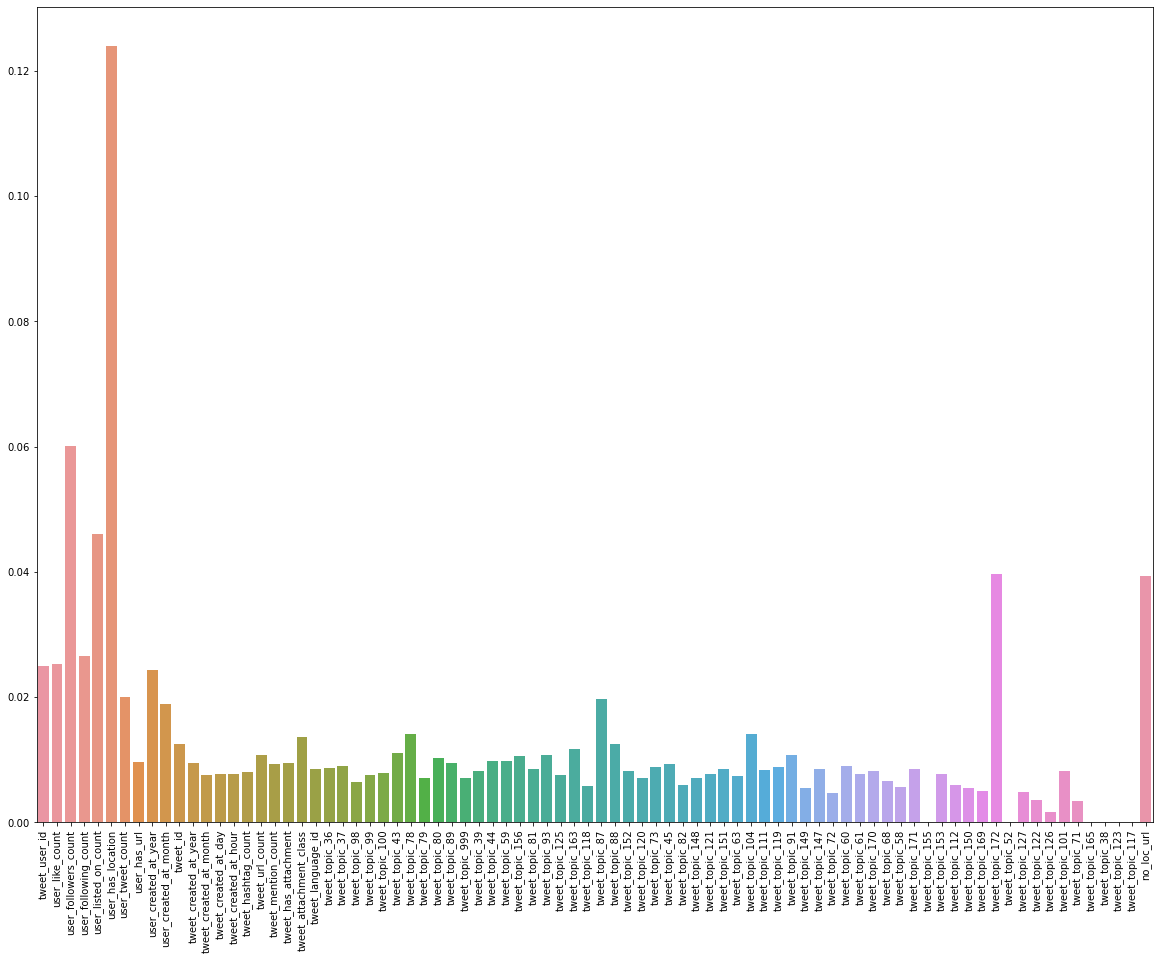

In [429]:
X = train_tweet_2.drop(['virality'], axis = 1)
y = train_tweet_2[target]

xgb.fit(X,y)
columns = []
values = []
for col, val in zip(xgb_features, xgb.feature_importances_):
    columns.append(col)
    values.append(val)
plt.figure(figsize = (20,15))
sns.barplot(x = columns, y = values)
plt.xticks(rotation = 90)

In [430]:
sel_model = SelectFromModel(LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear'))
sel_model.fit(X,y)

sel_index = sel_model.get_support()

counter = collections.Counter(sel_model.get_support())
counter

Counter({True: 74, False: 8})

In [431]:
# media_ind_df = pd.DataFrame(x[x.columns[(sel_index)]])

new_xgb = pd.DataFrame(X[X.columns[(sel_index)]])

In [432]:
xgb_features = new_xgb.columns

In [434]:
cols = ['user_like_count','user_following_count','user_listed_on_count','user_tweet_count','tweet_hashtag_count','tweet_url_count']

for i in cols:
    scaler = MinMaxScaler()
    scaler.fit(train_tweet_2[[i]])
    train_tweet_2[i] = scaler.transform(train_tweet_2[[i]])
    test_tweet_2[i] = scaler.transform(test_tweet_2[[i]])

In [506]:
xgb_params = {'max_depth': 14,'n_estimators': 173,'learning_rate': 0.10256761466737035, 'colsample_bytree': 0.49145221061609967,'random_state': 42}

In [542]:
xgb_oofs, xgb_preds = cross_val(train_tweet_2, test_tweet_2, xgb_features, XGBClassifier(**xgb_params))

# 0.677367088607595

# 0.6756455696202531
# 0.678210970464135 - 10-fold
# 0.6794261603375528 - 11-fold
# 0.6795274261603376 - 12-fold
# 0.6796962025316455 - 15-fold
# 0.6808438818565401 - 20-fold
# 0.6812489451476793 - same - random state = 21


*********************Fold 1*********************

[17:48:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------
Accuracy score :  0.6767881241565452

*********************Fold 2*********************

[17:48:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------
Accuracy score :  0.6727395411605938

*********************Fold 3*********************

[17:49:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed

---

# CATBOOST

In [511]:
def cross_val_cat(train, test, features, clf):
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    preds_df = pd.DataFrame()
    
    folds= StratifiedKFold(n_splits = 20, shuffle = True, random_state = 42)
    stratified_target = pd.qcut(train[target], 10, labels = False, duplicates = 'drop')
    
    for index, (trn_idx,val_idx) in enumerate(folds.split(train[features], stratified_target)):
        print()
        print(f'*********************Fold {str(index+1)}*********************')
        print()
        
        X_trn, X_val = train[features].iloc[trn_idx], train[features].iloc[val_idx]
        y_trn, y_val = train[target].iloc[trn_idx], train[target].iloc[val_idx]
        X_test = test[features]
        
        _ = clf.fit(X_trn, y_trn)
        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)
        
#         print(test_preds)
#         print('------------------------------------------------------')
        test_preds = test_preds[:,0]
#         print(test_preds)
        
#         print('------------------------------------------------------')
#         print(val_preds)
        val_preds = val_preds[:,0]
        
#         print('------------------------------------------------------')
#         print(val_preds)
        
        print('--------------------------------------------------------')
        oofs[val_idx] = val_preds
        preds_df[f'{index+1}'] = test_preds
        
        print('Accuracy score : ', accuracy_score(y_val, val_preds))
    
    print()
    print('Accuracy_score : ', accuracy_score(train[target], oofs))
    preds_df['Mode'] = preds_df.apply(lambda x : x.mode()[0], axis = 1)
    preds = preds_df['Mode']
    return oofs, preds

In [512]:
# cat_del = ['tweet_topic_125','tweet_topic_118','tweet_topic_73','tweet_topic_82','tweet_topic_151','tweet_topic_111','tweet_topic_149','tweet_topic_72','tweet_topic_170','tweet_topic_68', 'tweet_topic_58','tweet_topic_171','tweet_topic_155','tweet_topic_153','tweet_topic_112','tweet_topic_150','tweet_topic_169','tweet_topic_172','tweet_topic_52','tweet_topic_127','tweet_topic_122','tweet_topic_126','tweet_topic_101','tweet_topic_71','tweet_topic_165','tweet_topic_38','tweet_topic_123','tweet_topic_117']
# cat_train.drop(cat_del, axis = 1, inplace = True)
# cat_test.drop(cat_del, axis = 1, inplace = True)

cat_features = [col for col in cat_train.columns if col not in [target]]

Learning rate set to 0.094054
0:	learn: 1.4881766	total: 21.4ms	remaining: 21.3s
1:	learn: 1.4034626	total: 45.7ms	remaining: 22.8s
2:	learn: 1.3343410	total: 70.5ms	remaining: 23.4s
3:	learn: 1.2744220	total: 95.2ms	remaining: 23.7s
4:	learn: 1.2248236	total: 120ms	remaining: 23.8s
5:	learn: 1.1819956	total: 143ms	remaining: 23.8s
6:	learn: 1.1469553	total: 170ms	remaining: 24.2s
7:	learn: 1.1173975	total: 200ms	remaining: 24.8s
8:	learn: 1.0903371	total: 232ms	remaining: 25.5s
9:	learn: 1.0678809	total: 265ms	remaining: 26.3s
10:	learn: 1.0474664	total: 295ms	remaining: 26.5s
11:	learn: 1.0307669	total: 325ms	remaining: 26.8s
12:	learn: 1.0170572	total: 357ms	remaining: 27.1s
13:	learn: 1.0037710	total: 386ms	remaining: 27.2s
14:	learn: 0.9921117	total: 422ms	remaining: 27.7s
15:	learn: 0.9825096	total: 456ms	remaining: 28s
16:	learn: 0.9736526	total: 487ms	remaining: 28.2s
17:	learn: 0.9641704	total: 517ms	remaining: 28.2s
18:	learn: 0.9561839	total: 547ms	remaining: 28.2s
19:	learn

164:	learn: 0.7955533	total: 5.24s	remaining: 26.5s
165:	learn: 0.7952451	total: 5.27s	remaining: 26.5s
166:	learn: 0.7948832	total: 5.3s	remaining: 26.4s
167:	learn: 0.7943232	total: 5.33s	remaining: 26.4s
168:	learn: 0.7938899	total: 5.36s	remaining: 26.4s
169:	learn: 0.7933769	total: 5.39s	remaining: 26.3s
170:	learn: 0.7928172	total: 5.42s	remaining: 26.3s
171:	learn: 0.7925160	total: 5.46s	remaining: 26.3s
172:	learn: 0.7922184	total: 5.49s	remaining: 26.2s
173:	learn: 0.7918447	total: 5.52s	remaining: 26.2s
174:	learn: 0.7914269	total: 5.54s	remaining: 26.1s
175:	learn: 0.7911678	total: 5.58s	remaining: 26.1s
176:	learn: 0.7908168	total: 5.6s	remaining: 26.1s
177:	learn: 0.7904343	total: 5.63s	remaining: 26s
178:	learn: 0.7898733	total: 5.67s	remaining: 26s
179:	learn: 0.7894150	total: 5.7s	remaining: 26s
180:	learn: 0.7890713	total: 5.73s	remaining: 25.9s
181:	learn: 0.7887867	total: 5.76s	remaining: 25.9s
182:	learn: 0.7884630	total: 5.8s	remaining: 25.9s
183:	learn: 0.7882846	

325:	learn: 0.7471066	total: 10.2s	remaining: 21.1s
326:	learn: 0.7466557	total: 10.2s	remaining: 21.1s
327:	learn: 0.7465457	total: 10.3s	remaining: 21s
328:	learn: 0.7462838	total: 10.3s	remaining: 21s
329:	learn: 0.7461658	total: 10.3s	remaining: 20.9s
330:	learn: 0.7460017	total: 10.3s	remaining: 20.9s
331:	learn: 0.7458586	total: 10.4s	remaining: 20.9s
332:	learn: 0.7457102	total: 10.4s	remaining: 20.8s
333:	learn: 0.7454062	total: 10.4s	remaining: 20.8s
334:	learn: 0.7451944	total: 10.5s	remaining: 20.8s
335:	learn: 0.7450335	total: 10.5s	remaining: 20.8s
336:	learn: 0.7447597	total: 10.5s	remaining: 20.7s
337:	learn: 0.7446053	total: 10.6s	remaining: 20.7s
338:	learn: 0.7444113	total: 10.6s	remaining: 20.7s
339:	learn: 0.7441113	total: 10.6s	remaining: 20.6s
340:	learn: 0.7439866	total: 10.7s	remaining: 20.6s
341:	learn: 0.7438544	total: 10.7s	remaining: 20.6s
342:	learn: 0.7437695	total: 10.7s	remaining: 20.5s
343:	learn: 0.7435800	total: 10.8s	remaining: 20.5s
344:	learn: 0.74

484:	learn: 0.7118414	total: 15.2s	remaining: 16.1s
485:	learn: 0.7116668	total: 15.2s	remaining: 16.1s
486:	learn: 0.7115129	total: 15.2s	remaining: 16s
487:	learn: 0.7113192	total: 15.3s	remaining: 16s
488:	learn: 0.7111435	total: 15.3s	remaining: 16s
489:	learn: 0.7110987	total: 15.3s	remaining: 15.9s
490:	learn: 0.7109138	total: 15.3s	remaining: 15.9s
491:	learn: 0.7107325	total: 15.4s	remaining: 15.9s
492:	learn: 0.7104473	total: 15.4s	remaining: 15.8s
493:	learn: 0.7102850	total: 15.4s	remaining: 15.8s
494:	learn: 0.7100161	total: 15.5s	remaining: 15.8s
495:	learn: 0.7098619	total: 15.5s	remaining: 15.7s
496:	learn: 0.7097620	total: 15.5s	remaining: 15.7s
497:	learn: 0.7096102	total: 15.6s	remaining: 15.7s
498:	learn: 0.7094025	total: 15.6s	remaining: 15.7s
499:	learn: 0.7090451	total: 15.6s	remaining: 15.6s
500:	learn: 0.7087907	total: 15.7s	remaining: 15.6s
501:	learn: 0.7086440	total: 15.7s	remaining: 15.6s
502:	learn: 0.7084745	total: 15.7s	remaining: 15.5s
503:	learn: 0.7082

646:	learn: 0.6834577	total: 20.1s	remaining: 11s
647:	learn: 0.6832268	total: 20.2s	remaining: 10.9s
648:	learn: 0.6830236	total: 20.2s	remaining: 10.9s
649:	learn: 0.6827663	total: 20.2s	remaining: 10.9s
650:	learn: 0.6826849	total: 20.2s	remaining: 10.9s
651:	learn: 0.6825828	total: 20.3s	remaining: 10.8s
652:	learn: 0.6824332	total: 20.3s	remaining: 10.8s
653:	learn: 0.6823643	total: 20.3s	remaining: 10.8s
654:	learn: 0.6821878	total: 20.4s	remaining: 10.7s
655:	learn: 0.6819815	total: 20.4s	remaining: 10.7s
656:	learn: 0.6818183	total: 20.4s	remaining: 10.7s
657:	learn: 0.6817029	total: 20.4s	remaining: 10.6s
658:	learn: 0.6814022	total: 20.5s	remaining: 10.6s
659:	learn: 0.6810976	total: 20.5s	remaining: 10.6s
660:	learn: 0.6808711	total: 20.5s	remaining: 10.5s
661:	learn: 0.6806037	total: 20.6s	remaining: 10.5s
662:	learn: 0.6803975	total: 20.6s	remaining: 10.5s
663:	learn: 0.6801424	total: 20.6s	remaining: 10.4s
664:	learn: 0.6799225	total: 20.7s	remaining: 10.4s
665:	learn: 0.

808:	learn: 0.6584485	total: 25.1s	remaining: 5.93s
809:	learn: 0.6583411	total: 25.2s	remaining: 5.9s
810:	learn: 0.6581522	total: 25.2s	remaining: 5.87s
811:	learn: 0.6579355	total: 25.2s	remaining: 5.84s
812:	learn: 0.6577927	total: 25.3s	remaining: 5.81s
813:	learn: 0.6576388	total: 25.3s	remaining: 5.78s
814:	learn: 0.6574324	total: 25.3s	remaining: 5.75s
815:	learn: 0.6572773	total: 25.4s	remaining: 5.72s
816:	learn: 0.6572109	total: 25.4s	remaining: 5.68s
817:	learn: 0.6569618	total: 25.4s	remaining: 5.66s
818:	learn: 0.6569019	total: 25.4s	remaining: 5.62s
819:	learn: 0.6566881	total: 25.5s	remaining: 5.59s
820:	learn: 0.6564292	total: 25.5s	remaining: 5.56s
821:	learn: 0.6563058	total: 25.5s	remaining: 5.53s
822:	learn: 0.6561335	total: 25.6s	remaining: 5.5s
823:	learn: 0.6559877	total: 25.6s	remaining: 5.47s
824:	learn: 0.6557691	total: 25.6s	remaining: 5.44s
825:	learn: 0.6556482	total: 25.7s	remaining: 5.41s
826:	learn: 0.6554704	total: 25.7s	remaining: 5.38s
827:	learn: 0.

970:	learn: 0.6348721	total: 30.3s	remaining: 904ms
971:	learn: 0.6347311	total: 30.3s	remaining: 872ms
972:	learn: 0.6345148	total: 30.3s	remaining: 841ms
973:	learn: 0.6343398	total: 30.3s	remaining: 810ms
974:	learn: 0.6341875	total: 30.4s	remaining: 779ms
975:	learn: 0.6340732	total: 30.4s	remaining: 748ms
976:	learn: 0.6339679	total: 30.4s	remaining: 717ms
977:	learn: 0.6338689	total: 30.5s	remaining: 685ms
978:	learn: 0.6338035	total: 30.5s	remaining: 654ms
979:	learn: 0.6337153	total: 30.5s	remaining: 623ms
980:	learn: 0.6336231	total: 30.6s	remaining: 592ms
981:	learn: 0.6333887	total: 30.6s	remaining: 561ms
982:	learn: 0.6332697	total: 30.6s	remaining: 530ms
983:	learn: 0.6331464	total: 30.7s	remaining: 498ms
984:	learn: 0.6329530	total: 30.7s	remaining: 467ms
985:	learn: 0.6328165	total: 30.7s	remaining: 436ms
986:	learn: 0.6326645	total: 30.8s	remaining: 405ms
987:	learn: 0.6324906	total: 30.8s	remaining: 374ms
988:	learn: 0.6323870	total: 30.8s	remaining: 343ms
989:	learn: 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 [Text(0, 0, 'tweet_user_id'),
  Text(1, 0, 'user_like_count'),
  Text(2, 0, 'user_followers_count'),
  Text(3, 0, 'user_following_count'),
  Text(4, 0, 'user_listed_on_count'),
  Text(5, 0, 'user_has_location'),
  Text(6, 0, 'user_tweet_count'),
  Text(7, 0, 'user_has_url'),
  Text(8, 0, 'user_created_at_year'),
  Text(9, 0, 'user_created_at_month'),
  Text(10, 0, 'tweet_id'),
  Text(11, 0, 'tweet_created_at_year'),
  Text(12, 0, 'tweet_created_at_month'),
  Text(13, 0, 'tweet_created_at_day'),
  Text(14, 0, 'tweet_created_at_hour'),
  Text(15, 0, 'tweet_hashtag_count'),
  Text(16, 0, 'tweet_url_count'),
  Text(17, 0, 'tw

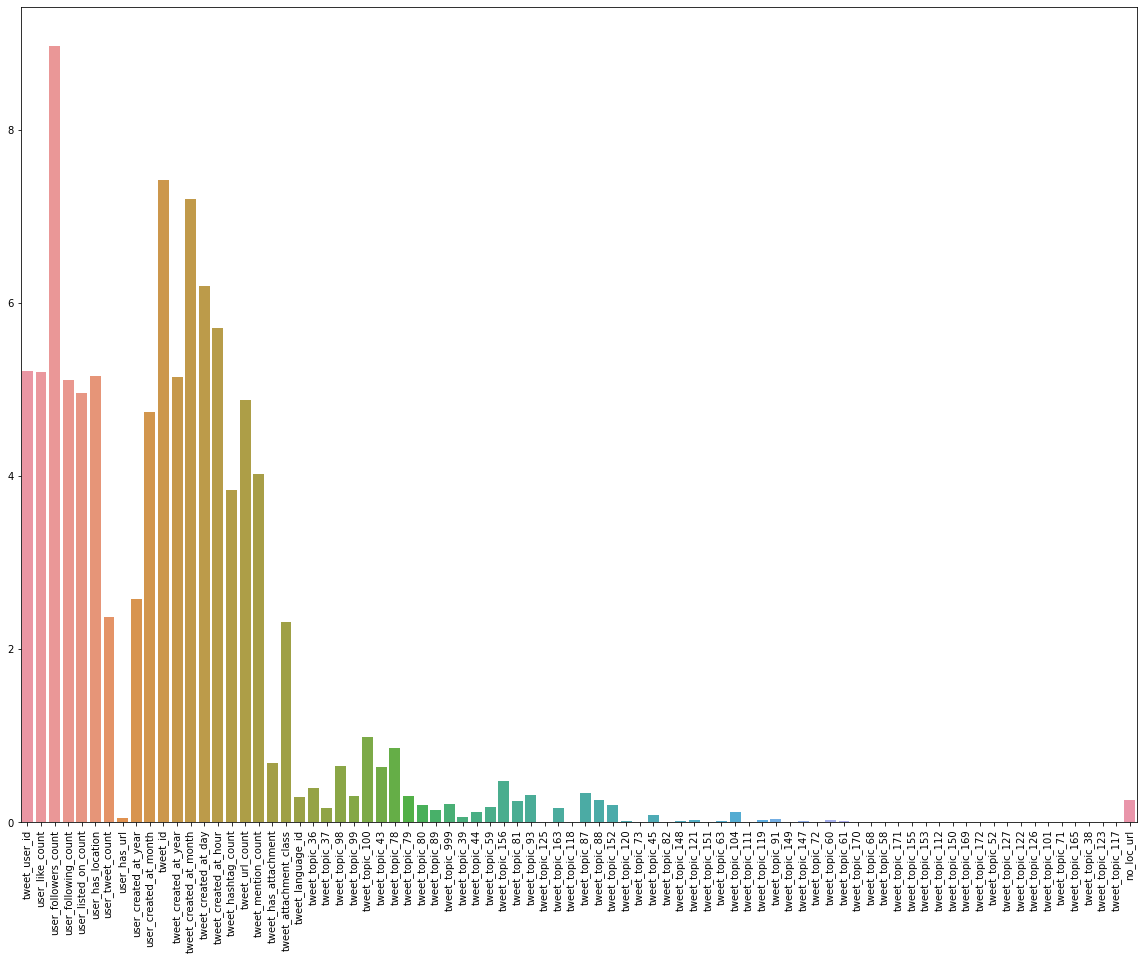

In [513]:
X = cat_train.drop(['virality'], axis = 1)
y = cat_train[target]

cat.fit(X,y)
columns = []
values = []
for col, val in zip(cat_features, cat.feature_importances_):
    columns.append(col)
    values.append(val)
plt.figure(figsize = (20,15))
sns.barplot(x = columns, y = values)
plt.xticks(rotation = 90)

In [515]:
new_cat = pd.DataFrame(X[X.columns[(sel_index)]])

In [516]:
cat_features = new_cat.columns

In [517]:
cols = ['user_like_count','user_following_count','user_listed_on_count','user_tweet_count','tweet_hashtag_count','tweet_url_count']

for i in cols:
    scaler = MinMaxScaler()
    scaler.fit(cat_train[[i]])
    cat_train[i] = scaler.transform(cat_train[[i]])
    cat_test[i] = scaler.transform(cat_test[[i]])

In [520]:
cat_params = {'max_depth': 9, 'n_estimators': 1215, 'learning_rate': 0.6424870384644795, 'rsm': 0.5849460328672382, 'reg_lambda': 424, 'random_state' : 42}

In [521]:
cat_oofs, cat_preds = cross_val_cat(cat_train, cat_test, cat_features, CatBoostClassifier(**cat_params))
                                    
# 0.6755443037974683
# 0.6761856540084388 - both random state = 42


*********************Fold 1*********************

0:	learn: 1.3487735	total: 76.7ms	remaining: 1m 33s
1:	learn: 1.2134741	total: 157ms	remaining: 1m 34s
2:	learn: 1.1161117	total: 228ms	remaining: 1m 32s
3:	learn: 1.0727774	total: 300ms	remaining: 1m 30s
4:	learn: 1.0454138	total: 386ms	remaining: 1m 33s
5:	learn: 1.0125474	total: 455ms	remaining: 1m 31s
6:	learn: 0.9998898	total: 532ms	remaining: 1m 31s
7:	learn: 0.9874141	total: 610ms	remaining: 1m 32s
8:	learn: 0.9595665	total: 684ms	remaining: 1m 31s
9:	learn: 0.9483429	total: 763ms	remaining: 1m 31s
10:	learn: 0.9364784	total: 843ms	remaining: 1m 32s
11:	learn: 0.9307659	total: 921ms	remaining: 1m 32s
12:	learn: 0.9260539	total: 1s	remaining: 1m 32s
13:	learn: 0.9196187	total: 1.09s	remaining: 1m 33s
14:	learn: 0.9158678	total: 1.16s	remaining: 1m 33s
15:	learn: 0.9112229	total: 1.25s	remaining: 1m 33s
16:	learn: 0.9073277	total: 1.32s	remaining: 1m 33s
17:	learn: 0.9029611	total: 1.4s	remaining: 1m 33s
18:	learn: 0.8998494	total

158:	learn: 0.7761410	total: 13.5s	remaining: 1m 29s
159:	learn: 0.7754568	total: 13.6s	remaining: 1m 29s
160:	learn: 0.7750098	total: 13.7s	remaining: 1m 29s
161:	learn: 0.7746013	total: 13.8s	remaining: 1m 29s
162:	learn: 0.7739907	total: 13.9s	remaining: 1m 29s
163:	learn: 0.7738574	total: 14s	remaining: 1m 29s
164:	learn: 0.7733130	total: 14.1s	remaining: 1m 29s
165:	learn: 0.7729590	total: 14.1s	remaining: 1m 29s
166:	learn: 0.7726937	total: 14.2s	remaining: 1m 29s
167:	learn: 0.7722612	total: 14.3s	remaining: 1m 29s
168:	learn: 0.7718725	total: 14.4s	remaining: 1m 29s
169:	learn: 0.7716343	total: 14.5s	remaining: 1m 29s
170:	learn: 0.7711265	total: 14.6s	remaining: 1m 29s
171:	learn: 0.7705717	total: 14.7s	remaining: 1m 29s
172:	learn: 0.7700198	total: 14.8s	remaining: 1m 29s
173:	learn: 0.7695543	total: 14.9s	remaining: 1m 29s
174:	learn: 0.7691317	total: 15s	remaining: 1m 29s
175:	learn: 0.7686130	total: 15.1s	remaining: 1m 29s
176:	learn: 0.7681567	total: 15.2s	remaining: 1m 2

314:	learn: 0.7203717	total: 28.8s	remaining: 1m 22s
315:	learn: 0.7199745	total: 28.9s	remaining: 1m 22s
316:	learn: 0.7196274	total: 29s	remaining: 1m 22s
317:	learn: 0.7192700	total: 29.1s	remaining: 1m 22s
318:	learn: 0.7188737	total: 29.2s	remaining: 1m 22s
319:	learn: 0.7185060	total: 29.3s	remaining: 1m 21s
320:	learn: 0.7181884	total: 29.4s	remaining: 1m 21s
321:	learn: 0.7178150	total: 29.5s	remaining: 1m 21s
322:	learn: 0.7174650	total: 29.6s	remaining: 1m 21s
323:	learn: 0.7171410	total: 29.7s	remaining: 1m 21s
324:	learn: 0.7169533	total: 29.8s	remaining: 1m 21s
325:	learn: 0.7165798	total: 29.9s	remaining: 1m 21s
326:	learn: 0.7162451	total: 30s	remaining: 1m 21s
327:	learn: 0.7158666	total: 30.1s	remaining: 1m 21s
328:	learn: 0.7154549	total: 30.2s	remaining: 1m 21s
329:	learn: 0.7151514	total: 30.3s	remaining: 1m 21s
330:	learn: 0.7147489	total: 30.4s	remaining: 1m 21s
331:	learn: 0.7145230	total: 30.5s	remaining: 1m 21s
332:	learn: 0.7142737	total: 30.6s	remaining: 1m 2

470:	learn: 0.6775198	total: 44.3s	remaining: 1m 9s
471:	learn: 0.6772141	total: 44.4s	remaining: 1m 9s
472:	learn: 0.6768294	total: 44.5s	remaining: 1m 9s
473:	learn: 0.6765466	total: 44.6s	remaining: 1m 9s
474:	learn: 0.6764402	total: 44.7s	remaining: 1m 9s
475:	learn: 0.6761344	total: 44.8s	remaining: 1m 9s
476:	learn: 0.6758263	total: 44.9s	remaining: 1m 9s
477:	learn: 0.6757934	total: 45s	remaining: 1m 9s
478:	learn: 0.6754888	total: 45.1s	remaining: 1m 9s
479:	learn: 0.6753738	total: 45.2s	remaining: 1m 9s
480:	learn: 0.6750513	total: 45.3s	remaining: 1m 9s
481:	learn: 0.6747475	total: 45.4s	remaining: 1m 9s
482:	learn: 0.6745008	total: 45.5s	remaining: 1m 8s
483:	learn: 0.6742968	total: 45.6s	remaining: 1m 8s
484:	learn: 0.6739901	total: 45.7s	remaining: 1m 8s
485:	learn: 0.6738788	total: 45.8s	remaining: 1m 8s
486:	learn: 0.6736628	total: 45.9s	remaining: 1m 8s
487:	learn: 0.6734921	total: 46s	remaining: 1m 8s
488:	learn: 0.6731737	total: 46.1s	remaining: 1m 8s
489:	learn: 0.67

632:	learn: 0.6405193	total: 1m	remaining: 55.6s
633:	learn: 0.6402685	total: 1m	remaining: 55.6s
634:	learn: 0.6402160	total: 1m	remaining: 55.5s
635:	learn: 0.6401134	total: 1m	remaining: 55.4s
636:	learn: 0.6399436	total: 1m	remaining: 55.3s
637:	learn: 0.6397965	total: 1m 1s	remaining: 55.2s
638:	learn: 0.6395381	total: 1m 1s	remaining: 55.1s
639:	learn: 0.6393889	total: 1m 1s	remaining: 55s
640:	learn: 0.6391685	total: 1m 1s	remaining: 54.9s
641:	learn: 0.6389865	total: 1m 1s	remaining: 54.8s
642:	learn: 0.6387854	total: 1m 1s	remaining: 54.7s
643:	learn: 0.6385520	total: 1m 1s	remaining: 54.6s
644:	learn: 0.6381654	total: 1m 1s	remaining: 54.6s
645:	learn: 0.6380308	total: 1m 1s	remaining: 54.5s
646:	learn: 0.6378839	total: 1m 1s	remaining: 54.4s
647:	learn: 0.6376465	total: 1m 2s	remaining: 54.3s
648:	learn: 0.6374826	total: 1m 2s	remaining: 54.2s
649:	learn: 0.6372995	total: 1m 2s	remaining: 54.1s
650:	learn: 0.6369932	total: 1m 2s	remaining: 54s
651:	learn: 0.6367702	total: 1m

790:	learn: 0.6085925	total: 1m 16s	remaining: 41.1s
791:	learn: 0.6084273	total: 1m 16s	remaining: 41s
792:	learn: 0.6082886	total: 1m 16s	remaining: 40.9s
793:	learn: 0.6081627	total: 1m 16s	remaining: 40.8s
794:	learn: 0.6080138	total: 1m 17s	remaining: 40.7s
795:	learn: 0.6079465	total: 1m 17s	remaining: 40.6s
796:	learn: 0.6078544	total: 1m 17s	remaining: 40.5s
797:	learn: 0.6076818	total: 1m 17s	remaining: 40.4s
798:	learn: 0.6075406	total: 1m 17s	remaining: 40.3s
799:	learn: 0.6072933	total: 1m 17s	remaining: 40.2s
800:	learn: 0.6072670	total: 1m 17s	remaining: 40.1s
801:	learn: 0.6070563	total: 1m 17s	remaining: 40s
802:	learn: 0.6068550	total: 1m 17s	remaining: 39.9s
803:	learn: 0.6068230	total: 1m 17s	remaining: 39.8s
804:	learn: 0.6065842	total: 1m 18s	remaining: 39.8s
805:	learn: 0.6065310	total: 1m 18s	remaining: 39.7s
806:	learn: 0.6063962	total: 1m 18s	remaining: 39.6s
807:	learn: 0.6062068	total: 1m 18s	remaining: 39.5s
808:	learn: 0.6060180	total: 1m 18s	remaining: 39.

946:	learn: 0.5813986	total: 1m 32s	remaining: 26.2s
947:	learn: 0.5812410	total: 1m 32s	remaining: 26.1s
948:	learn: 0.5810242	total: 1m 32s	remaining: 26s
949:	learn: 0.5808458	total: 1m 32s	remaining: 25.9s
950:	learn: 0.5806706	total: 1m 33s	remaining: 25.8s
951:	learn: 0.5804976	total: 1m 33s	remaining: 25.7s
952:	learn: 0.5803589	total: 1m 33s	remaining: 25.6s
953:	learn: 0.5801842	total: 1m 33s	remaining: 25.6s
954:	learn: 0.5800040	total: 1m 33s	remaining: 25.5s
955:	learn: 0.5798035	total: 1m 33s	remaining: 25.4s
956:	learn: 0.5797281	total: 1m 33s	remaining: 25.3s
957:	learn: 0.5795549	total: 1m 33s	remaining: 25.2s
958:	learn: 0.5794059	total: 1m 33s	remaining: 25.1s
959:	learn: 0.5792460	total: 1m 34s	remaining: 25s
960:	learn: 0.5790808	total: 1m 34s	remaining: 24.9s
961:	learn: 0.5790485	total: 1m 34s	remaining: 24.8s
962:	learn: 0.5788544	total: 1m 34s	remaining: 24.7s
963:	learn: 0.5785949	total: 1m 34s	remaining: 24.6s
964:	learn: 0.5785793	total: 1m 34s	remaining: 24.

1100:	learn: 0.5555119	total: 1m 49s	remaining: 11.3s
1101:	learn: 0.5553422	total: 1m 49s	remaining: 11.2s
1102:	learn: 0.5551911	total: 1m 49s	remaining: 11.1s
1103:	learn: 0.5550362	total: 1m 49s	remaining: 11s
1104:	learn: 0.5548556	total: 1m 49s	remaining: 10.9s
1105:	learn: 0.5547687	total: 1m 49s	remaining: 10.8s
1106:	learn: 0.5546124	total: 1m 50s	remaining: 10.7s
1107:	learn: 0.5544229	total: 1m 50s	remaining: 10.6s
1108:	learn: 0.5542585	total: 1m 50s	remaining: 10.5s
1109:	learn: 0.5541044	total: 1m 50s	remaining: 10.4s
1110:	learn: 0.5539340	total: 1m 50s	remaining: 10.3s
1111:	learn: 0.5538228	total: 1m 50s	remaining: 10.2s
1112:	learn: 0.5536676	total: 1m 50s	remaining: 10.1s
1113:	learn: 0.5534588	total: 1m 50s	remaining: 10s
1114:	learn: 0.5533018	total: 1m 50s	remaining: 9.94s
1115:	learn: 0.5531087	total: 1m 50s	remaining: 9.84s
1116:	learn: 0.5529297	total: 1m 51s	remaining: 9.74s
1117:	learn: 0.5528107	total: 1m 51s	remaining: 9.64s
1118:	learn: 0.5526865	total: 1m

39:	learn: 0.8573025	total: 3.86s	remaining: 1m 53s
40:	learn: 0.8566917	total: 3.96s	remaining: 1m 53s
41:	learn: 0.8556145	total: 4.06s	remaining: 1m 53s
42:	learn: 0.8548085	total: 4.17s	remaining: 1m 53s
43:	learn: 0.8533513	total: 4.27s	remaining: 1m 53s
44:	learn: 0.8520764	total: 4.36s	remaining: 1m 53s
45:	learn: 0.8508455	total: 4.46s	remaining: 1m 53s
46:	learn: 0.8493706	total: 4.57s	remaining: 1m 53s
47:	learn: 0.8482602	total: 4.67s	remaining: 1m 53s
48:	learn: 0.8473355	total: 4.76s	remaining: 1m 53s
49:	learn: 0.8459560	total: 4.87s	remaining: 1m 53s
50:	learn: 0.8444111	total: 4.98s	remaining: 1m 53s
51:	learn: 0.8432310	total: 5.08s	remaining: 1m 53s
52:	learn: 0.8423581	total: 5.18s	remaining: 1m 53s
53:	learn: 0.8411783	total: 5.29s	remaining: 1m 53s
54:	learn: 0.8403315	total: 5.39s	remaining: 1m 53s
55:	learn: 0.8394913	total: 5.49s	remaining: 1m 53s
56:	learn: 0.8385243	total: 5.58s	remaining: 1m 53s
57:	learn: 0.8380111	total: 5.69s	remaining: 1m 53s
58:	learn: 0

196:	learn: 0.7598738	total: 19.8s	remaining: 1m 42s
197:	learn: 0.7595992	total: 19.9s	remaining: 1m 42s
198:	learn: 0.7592413	total: 20s	remaining: 1m 42s
199:	learn: 0.7590719	total: 20.1s	remaining: 1m 42s
200:	learn: 0.7586080	total: 20.2s	remaining: 1m 42s
201:	learn: 0.7579702	total: 20.3s	remaining: 1m 42s
202:	learn: 0.7574542	total: 20.4s	remaining: 1m 41s
203:	learn: 0.7570029	total: 20.5s	remaining: 1m 41s
204:	learn: 0.7566547	total: 20.7s	remaining: 1m 41s
205:	learn: 0.7565636	total: 20.8s	remaining: 1m 41s
206:	learn: 0.7564287	total: 20.9s	remaining: 1m 41s
207:	learn: 0.7561263	total: 21s	remaining: 1m 41s
208:	learn: 0.7558572	total: 21.1s	remaining: 1m 41s
209:	learn: 0.7554350	total: 21.2s	remaining: 1m 41s
210:	learn: 0.7551157	total: 21.3s	remaining: 1m 41s
211:	learn: 0.7549011	total: 21.4s	remaining: 1m 41s
212:	learn: 0.7543970	total: 21.5s	remaining: 1m 41s
213:	learn: 0.7538823	total: 21.6s	remaining: 1m 40s
214:	learn: 0.7537025	total: 21.7s	remaining: 1m 4

353:	learn: 0.7066524	total: 36.3s	remaining: 1m 28s
354:	learn: 0.7064236	total: 36.4s	remaining: 1m 28s
355:	learn: 0.7060996	total: 36.5s	remaining: 1m 28s
356:	learn: 0.7057869	total: 36.6s	remaining: 1m 27s
357:	learn: 0.7054644	total: 36.7s	remaining: 1m 27s
358:	learn: 0.7052145	total: 36.8s	remaining: 1m 27s
359:	learn: 0.7048162	total: 36.9s	remaining: 1m 27s
360:	learn: 0.7044839	total: 37s	remaining: 1m 27s
361:	learn: 0.7041394	total: 37.1s	remaining: 1m 27s
362:	learn: 0.7038835	total: 37.2s	remaining: 1m 27s
363:	learn: 0.7036051	total: 37.3s	remaining: 1m 27s
364:	learn: 0.7032622	total: 37.4s	remaining: 1m 27s
365:	learn: 0.7029044	total: 37.5s	remaining: 1m 26s
366:	learn: 0.7024418	total: 37.6s	remaining: 1m 26s
367:	learn: 0.7024158	total: 37.7s	remaining: 1m 26s
368:	learn: 0.7020497	total: 37.8s	remaining: 1m 26s
369:	learn: 0.7016530	total: 37.9s	remaining: 1m 26s
370:	learn: 0.7013088	total: 38s	remaining: 1m 26s
371:	learn: 0.7011789	total: 38.1s	remaining: 1m 2

511:	learn: 0.6648445	total: 52.2s	remaining: 1m 11s
512:	learn: 0.6647672	total: 52.3s	remaining: 1m 11s
513:	learn: 0.6645066	total: 52.4s	remaining: 1m 11s
514:	learn: 0.6643772	total: 52.5s	remaining: 1m 11s
515:	learn: 0.6641767	total: 52.6s	remaining: 1m 11s
516:	learn: 0.6638984	total: 52.7s	remaining: 1m 11s
517:	learn: 0.6635816	total: 52.8s	remaining: 1m 11s
518:	learn: 0.6632472	total: 52.9s	remaining: 1m 10s
519:	learn: 0.6629085	total: 53s	remaining: 1m 10s
520:	learn: 0.6626487	total: 53.1s	remaining: 1m 10s
521:	learn: 0.6623800	total: 53.2s	remaining: 1m 10s
522:	learn: 0.6620132	total: 53.3s	remaining: 1m 10s
523:	learn: 0.6616868	total: 53.4s	remaining: 1m 10s
524:	learn: 0.6615011	total: 53.5s	remaining: 1m 10s
525:	learn: 0.6613467	total: 53.6s	remaining: 1m 10s
526:	learn: 0.6610958	total: 53.7s	remaining: 1m 10s
527:	learn: 0.6608676	total: 53.8s	remaining: 1m 10s
528:	learn: 0.6606770	total: 53.9s	remaining: 1m 9s
529:	learn: 0.6604289	total: 54s	remaining: 1m 9s

671:	learn: 0.6288894	total: 1m 9s	remaining: 55.8s
672:	learn: 0.6286053	total: 1m 9s	remaining: 55.7s
673:	learn: 0.6285537	total: 1m 9s	remaining: 55.6s
674:	learn: 0.6283393	total: 1m 9s	remaining: 55.5s
675:	learn: 0.6281417	total: 1m 9s	remaining: 55.4s
676:	learn: 0.6280040	total: 1m 9s	remaining: 55.3s
677:	learn: 0.6278692	total: 1m 9s	remaining: 55.2s
678:	learn: 0.6276627	total: 1m 9s	remaining: 55.1s
679:	learn: 0.6274964	total: 1m 9s	remaining: 55s
680:	learn: 0.6272295	total: 1m 10s	remaining: 54.9s
681:	learn: 0.6270280	total: 1m 10s	remaining: 54.8s
682:	learn: 0.6268552	total: 1m 10s	remaining: 54.7s
683:	learn: 0.6267845	total: 1m 10s	remaining: 54.6s
684:	learn: 0.6266313	total: 1m 10s	remaining: 54.5s
685:	learn: 0.6263426	total: 1m 10s	remaining: 54.4s
686:	learn: 0.6261706	total: 1m 10s	remaining: 54.3s
687:	learn: 0.6259552	total: 1m 10s	remaining: 54.2s
688:	learn: 0.6256802	total: 1m 10s	remaining: 54.1s
689:	learn: 0.6253739	total: 1m 11s	remaining: 54s
690:	l

827:	learn: 0.5983829	total: 1m 25s	remaining: 40.2s
828:	learn: 0.5982023	total: 1m 26s	remaining: 40.1s
829:	learn: 0.5980055	total: 1m 26s	remaining: 40s
830:	learn: 0.5977764	total: 1m 26s	remaining: 39.9s
831:	learn: 0.5975148	total: 1m 26s	remaining: 39.8s
832:	learn: 0.5973453	total: 1m 26s	remaining: 39.7s
833:	learn: 0.5970595	total: 1m 26s	remaining: 39.6s
834:	learn: 0.5968475	total: 1m 26s	remaining: 39.5s
835:	learn: 0.5966591	total: 1m 26s	remaining: 39.4s
836:	learn: 0.5964818	total: 1m 26s	remaining: 39.3s
837:	learn: 0.5962620	total: 1m 27s	remaining: 39.2s
838:	learn: 0.5961415	total: 1m 27s	remaining: 39.1s
839:	learn: 0.5959206	total: 1m 27s	remaining: 39s
840:	learn: 0.5957778	total: 1m 27s	remaining: 38.9s
841:	learn: 0.5955825	total: 1m 27s	remaining: 38.8s
842:	learn: 0.5953589	total: 1m 27s	remaining: 38.7s
843:	learn: 0.5951757	total: 1m 27s	remaining: 38.6s
844:	learn: 0.5951124	total: 1m 27s	remaining: 38.5s
845:	learn: 0.5949222	total: 1m 27s	remaining: 38.

983:	learn: 0.5717946	total: 1m 42s	remaining: 24s
984:	learn: 0.5716412	total: 1m 42s	remaining: 23.9s
985:	learn: 0.5715017	total: 1m 42s	remaining: 23.8s
986:	learn: 0.5713322	total: 1m 42s	remaining: 23.7s
987:	learn: 0.5711296	total: 1m 42s	remaining: 23.6s
988:	learn: 0.5710111	total: 1m 42s	remaining: 23.5s
989:	learn: 0.5708270	total: 1m 42s	remaining: 23.4s
990:	learn: 0.5706014	total: 1m 43s	remaining: 23.3s
991:	learn: 0.5704111	total: 1m 43s	remaining: 23.2s
992:	learn: 0.5702213	total: 1m 43s	remaining: 23.1s
993:	learn: 0.5700071	total: 1m 43s	remaining: 23s
994:	learn: 0.5698186	total: 1m 43s	remaining: 22.9s
995:	learn: 0.5696473	total: 1m 43s	remaining: 22.8s
996:	learn: 0.5694506	total: 1m 43s	remaining: 22.7s
997:	learn: 0.5692716	total: 1m 43s	remaining: 22.6s
998:	learn: 0.5691165	total: 1m 43s	remaining: 22.5s
999:	learn: 0.5689336	total: 1m 43s	remaining: 22.4s
1000:	learn: 0.5687544	total: 1m 44s	remaining: 22.3s
1001:	learn: 0.5685477	total: 1m 44s	remaining: 2

1137:	learn: 0.5466487	total: 1m 58s	remaining: 8.01s
1138:	learn: 0.5465217	total: 1m 58s	remaining: 7.91s
1139:	learn: 0.5463763	total: 1m 58s	remaining: 7.81s
1140:	learn: 0.5462432	total: 1m 58s	remaining: 7.7s
1141:	learn: 0.5461486	total: 1m 58s	remaining: 7.6s
1142:	learn: 0.5459596	total: 1m 58s	remaining: 7.49s
1143:	learn: 0.5458314	total: 1m 59s	remaining: 7.39s
1144:	learn: 0.5457219	total: 1m 59s	remaining: 7.29s
1145:	learn: 0.5455741	total: 1m 59s	remaining: 7.18s
1146:	learn: 0.5454987	total: 1m 59s	remaining: 7.08s
1147:	learn: 0.5453111	total: 1m 59s	remaining: 6.97s
1148:	learn: 0.5451469	total: 1m 59s	remaining: 6.87s
1149:	learn: 0.5449846	total: 1m 59s	remaining: 6.76s
1150:	learn: 0.5447818	total: 1m 59s	remaining: 6.66s
1151:	learn: 0.5446479	total: 1m 59s	remaining: 6.56s
1152:	learn: 0.5445181	total: 2m	remaining: 6.45s
1153:	learn: 0.5443374	total: 2m	remaining: 6.35s
1154:	learn: 0.5442171	total: 2m	remaining: 6.25s
1155:	learn: 0.5440076	total: 2m	remaining

78:	learn: 0.8244828	total: 7.53s	remaining: 1m 48s
79:	learn: 0.8238065	total: 7.62s	remaining: 1m 48s
80:	learn: 0.8233897	total: 7.72s	remaining: 1m 48s
81:	learn: 0.8222216	total: 7.82s	remaining: 1m 48s
82:	learn: 0.8213984	total: 7.92s	remaining: 1m 47s
83:	learn: 0.8206409	total: 8.01s	remaining: 1m 47s
84:	learn: 0.8199567	total: 8.11s	remaining: 1m 47s
85:	learn: 0.8191238	total: 8.22s	remaining: 1m 47s
86:	learn: 0.8185278	total: 8.3s	remaining: 1m 47s
87:	learn: 0.8177033	total: 8.41s	remaining: 1m 47s
88:	learn: 0.8171372	total: 8.53s	remaining: 1m 47s
89:	learn: 0.8165308	total: 8.64s	remaining: 1m 47s
90:	learn: 0.8158316	total: 8.74s	remaining: 1m 47s
91:	learn: 0.8152863	total: 8.83s	remaining: 1m 47s
92:	learn: 0.8144547	total: 8.94s	remaining: 1m 47s
93:	learn: 0.8136921	total: 9.04s	remaining: 1m 47s
94:	learn: 0.8129922	total: 9.13s	remaining: 1m 47s
95:	learn: 0.8121804	total: 9.23s	remaining: 1m 47s
96:	learn: 0.8118950	total: 9.32s	remaining: 1m 47s
97:	learn: 0.

235:	learn: 0.7484381	total: 22.9s	remaining: 1m 35s
236:	learn: 0.7483052	total: 23s	remaining: 1m 35s
237:	learn: 0.7478059	total: 23.1s	remaining: 1m 34s
238:	learn: 0.7473171	total: 23.2s	remaining: 1m 34s
239:	learn: 0.7471153	total: 23.3s	remaining: 1m 34s
240:	learn: 0.7465767	total: 23.4s	remaining: 1m 34s
241:	learn: 0.7462560	total: 23.5s	remaining: 1m 34s
242:	learn: 0.7460905	total: 23.6s	remaining: 1m 34s
243:	learn: 0.7460186	total: 23.7s	remaining: 1m 34s
244:	learn: 0.7458487	total: 23.8s	remaining: 1m 34s
245:	learn: 0.7454597	total: 23.9s	remaining: 1m 34s
246:	learn: 0.7451281	total: 24s	remaining: 1m 34s
247:	learn: 0.7448402	total: 24.1s	remaining: 1m 33s
248:	learn: 0.7443586	total: 24.2s	remaining: 1m 33s
249:	learn: 0.7438700	total: 24.3s	remaining: 1m 33s
250:	learn: 0.7435059	total: 24.4s	remaining: 1m 33s
251:	learn: 0.7431901	total: 24.5s	remaining: 1m 33s
252:	learn: 0.7427463	total: 24.6s	remaining: 1m 33s
253:	learn: 0.7424154	total: 24.7s	remaining: 1m 3

391:	learn: 0.6994736	total: 38.3s	remaining: 1m 20s
392:	learn: 0.6994295	total: 38.4s	remaining: 1m 20s
393:	learn: 0.6990869	total: 38.5s	remaining: 1m 20s
394:	learn: 0.6987808	total: 38.6s	remaining: 1m 20s
395:	learn: 0.6985451	total: 38.7s	remaining: 1m 20s
396:	learn: 0.6981703	total: 38.8s	remaining: 1m 19s
397:	learn: 0.6978864	total: 38.9s	remaining: 1m 19s
398:	learn: 0.6976035	total: 39s	remaining: 1m 19s
399:	learn: 0.6972579	total: 39.1s	remaining: 1m 19s
400:	learn: 0.6970958	total: 39.2s	remaining: 1m 19s
401:	learn: 0.6967589	total: 39.3s	remaining: 1m 19s
402:	learn: 0.6963707	total: 39.4s	remaining: 1m 19s
403:	learn: 0.6960786	total: 39.5s	remaining: 1m 19s
404:	learn: 0.6957095	total: 39.6s	remaining: 1m 19s
405:	learn: 0.6953393	total: 39.7s	remaining: 1m 19s
406:	learn: 0.6951589	total: 39.8s	remaining: 1m 19s
407:	learn: 0.6948656	total: 39.9s	remaining: 1m 18s
408:	learn: 0.6946374	total: 40s	remaining: 1m 18s
409:	learn: 0.6943217	total: 40.1s	remaining: 1m 1

549:	learn: 0.6593918	total: 53.9s	remaining: 1m 5s
550:	learn: 0.6591758	total: 54.1s	remaining: 1m 5s
551:	learn: 0.6589822	total: 54.2s	remaining: 1m 5s
552:	learn: 0.6588816	total: 54.3s	remaining: 1m 4s
553:	learn: 0.6586648	total: 54.4s	remaining: 1m 4s
554:	learn: 0.6583520	total: 54.5s	remaining: 1m 4s
555:	learn: 0.6580039	total: 54.6s	remaining: 1m 4s
556:	learn: 0.6578038	total: 54.7s	remaining: 1m 4s
557:	learn: 0.6575682	total: 54.8s	remaining: 1m 4s
558:	learn: 0.6572996	total: 54.9s	remaining: 1m 4s
559:	learn: 0.6570890	total: 55s	remaining: 1m 4s
560:	learn: 0.6568466	total: 55.1s	remaining: 1m 4s
561:	learn: 0.6566940	total: 55.2s	remaining: 1m 4s
562:	learn: 0.6563751	total: 55.3s	remaining: 1m 4s
563:	learn: 0.6560590	total: 55.4s	remaining: 1m 3s
564:	learn: 0.6557766	total: 55.5s	remaining: 1m 3s
565:	learn: 0.6555670	total: 55.6s	remaining: 1m 3s
566:	learn: 0.6552864	total: 55.7s	remaining: 1m 3s
567:	learn: 0.6549391	total: 55.8s	remaining: 1m 3s
568:	learn: 0.

710:	learn: 0.6242636	total: 1m 10s	remaining: 50.1s
711:	learn: 0.6241884	total: 1m 10s	remaining: 50s
712:	learn: 0.6239310	total: 1m 10s	remaining: 49.9s
713:	learn: 0.6236433	total: 1m 11s	remaining: 49.8s
714:	learn: 0.6234715	total: 1m 11s	remaining: 49.7s
715:	learn: 0.6232709	total: 1m 11s	remaining: 49.6s
716:	learn: 0.6231005	total: 1m 11s	remaining: 49.5s
717:	learn: 0.6230467	total: 1m 11s	remaining: 49.4s
718:	learn: 0.6230109	total: 1m 11s	remaining: 49.3s
719:	learn: 0.6228214	total: 1m 11s	remaining: 49.3s
720:	learn: 0.6226178	total: 1m 11s	remaining: 49.2s
721:	learn: 0.6223513	total: 1m 11s	remaining: 49.1s
722:	learn: 0.6220598	total: 1m 11s	remaining: 49s
723:	learn: 0.6218579	total: 1m 12s	remaining: 48.9s
724:	learn: 0.6216342	total: 1m 12s	remaining: 48.8s
725:	learn: 0.6213741	total: 1m 12s	remaining: 48.7s
726:	learn: 0.6211829	total: 1m 12s	remaining: 48.6s
727:	learn: 0.6209742	total: 1m 12s	remaining: 48.5s
728:	learn: 0.6207762	total: 1m 12s	remaining: 48.

867:	learn: 0.5947434	total: 1m 27s	remaining: 34.8s
868:	learn: 0.5944945	total: 1m 27s	remaining: 34.7s
869:	learn: 0.5942972	total: 1m 27s	remaining: 34.6s
870:	learn: 0.5940829	total: 1m 27s	remaining: 34.5s
871:	learn: 0.5939061	total: 1m 27s	remaining: 34.4s
872:	learn: 0.5937547	total: 1m 27s	remaining: 34.3s
873:	learn: 0.5935820	total: 1m 27s	remaining: 34.2s
874:	learn: 0.5934135	total: 1m 27s	remaining: 34.1s
875:	learn: 0.5931773	total: 1m 27s	remaining: 34s
876:	learn: 0.5929498	total: 1m 28s	remaining: 33.9s
877:	learn: 0.5927179	total: 1m 28s	remaining: 33.8s
878:	learn: 0.5925005	total: 1m 28s	remaining: 33.7s
879:	learn: 0.5922931	total: 1m 28s	remaining: 33.6s
880:	learn: 0.5921213	total: 1m 28s	remaining: 33.5s
881:	learn: 0.5918993	total: 1m 28s	remaining: 33.4s
882:	learn: 0.5917060	total: 1m 28s	remaining: 33.3s
883:	learn: 0.5914676	total: 1m 28s	remaining: 33.2s
884:	learn: 0.5912889	total: 1m 28s	remaining: 33.1s
885:	learn: 0.5911281	total: 1m 28s	remaining: 3

1022:	learn: 0.5682417	total: 1m 43s	remaining: 19.4s
1023:	learn: 0.5681234	total: 1m 43s	remaining: 19.3s
1024:	learn: 0.5679388	total: 1m 43s	remaining: 19.2s
1025:	learn: 0.5677399	total: 1m 43s	remaining: 19.1s
1026:	learn: 0.5675431	total: 1m 44s	remaining: 19s
1027:	learn: 0.5673363	total: 1m 44s	remaining: 18.9s
1028:	learn: 0.5671475	total: 1m 44s	remaining: 18.8s
1029:	learn: 0.5669717	total: 1m 44s	remaining: 18.7s
1030:	learn: 0.5668315	total: 1m 44s	remaining: 18.6s
1031:	learn: 0.5666439	total: 1m 44s	remaining: 18.6s
1032:	learn: 0.5665290	total: 1m 44s	remaining: 18.4s
1033:	learn: 0.5663485	total: 1m 44s	remaining: 18.3s
1034:	learn: 0.5662455	total: 1m 44s	remaining: 18.3s
1035:	learn: 0.5660546	total: 1m 45s	remaining: 18.1s
1036:	learn: 0.5658614	total: 1m 45s	remaining: 18s
1037:	learn: 0.5656876	total: 1m 45s	remaining: 17.9s
1038:	learn: 0.5655086	total: 1m 45s	remaining: 17.8s
1039:	learn: 0.5653222	total: 1m 45s	remaining: 17.7s
1040:	learn: 0.5651231	total: 1m

1175:	learn: 0.5441921	total: 2m	remaining: 3.98s
1176:	learn: 0.5440331	total: 2m	remaining: 3.88s
1177:	learn: 0.5438395	total: 2m	remaining: 3.78s
1178:	learn: 0.5436604	total: 2m	remaining: 3.67s
1179:	learn: 0.5435159	total: 2m	remaining: 3.57s
1180:	learn: 0.5433462	total: 2m	remaining: 3.47s
1181:	learn: 0.5431352	total: 2m	remaining: 3.37s
1182:	learn: 0.5429677	total: 2m	remaining: 3.27s
1183:	learn: 0.5428509	total: 2m	remaining: 3.16s
1184:	learn: 0.5427420	total: 2m	remaining: 3.06s
1185:	learn: 0.5425946	total: 2m 1s	remaining: 2.96s
1186:	learn: 0.5424397	total: 2m 1s	remaining: 2.86s
1187:	learn: 0.5422816	total: 2m 1s	remaining: 2.76s
1188:	learn: 0.5421296	total: 2m 1s	remaining: 2.65s
1189:	learn: 0.5419820	total: 2m 1s	remaining: 2.55s
1190:	learn: 0.5419058	total: 2m 1s	remaining: 2.45s
1191:	learn: 0.5418321	total: 2m 1s	remaining: 2.35s
1192:	learn: 0.5417385	total: 2m 1s	remaining: 2.25s
1193:	learn: 0.5416948	total: 2m 1s	remaining: 2.14s
1194:	learn: 0.5416784	

118:	learn: 0.7970333	total: 13.2s	remaining: 2m 1s
119:	learn: 0.7968800	total: 13.4s	remaining: 2m 2s
120:	learn: 0.7962092	total: 13.5s	remaining: 2m 2s
121:	learn: 0.7961173	total: 13.6s	remaining: 2m 1s
122:	learn: 0.7953935	total: 13.7s	remaining: 2m 1s
123:	learn: 0.7949013	total: 13.8s	remaining: 2m 1s
124:	learn: 0.7944577	total: 13.9s	remaining: 2m 1s
125:	learn: 0.7938068	total: 14s	remaining: 2m 1s
126:	learn: 0.7932039	total: 14.1s	remaining: 2m 1s
127:	learn: 0.7925493	total: 14.2s	remaining: 2m
128:	learn: 0.7918504	total: 14.3s	remaining: 2m
129:	learn: 0.7913428	total: 14.4s	remaining: 2m
130:	learn: 0.7911133	total: 14.6s	remaining: 2m
131:	learn: 0.7907996	total: 14.7s	remaining: 2m
132:	learn: 0.7901682	total: 14.8s	remaining: 2m
133:	learn: 0.7898428	total: 14.9s	remaining: 1m 59s
134:	learn: 0.7893874	total: 15s	remaining: 1m 59s
135:	learn: 0.7887114	total: 15.1s	remaining: 1m 59s
136:	learn: 0.7880556	total: 15.2s	remaining: 1m 59s
137:	learn: 0.7873962	total: 1

274:	learn: 0.7337524	total: 29.6s	remaining: 1m 41s
275:	learn: 0.7336048	total: 29.7s	remaining: 1m 41s
276:	learn: 0.7332522	total: 29.8s	remaining: 1m 40s
277:	learn: 0.7328538	total: 29.9s	remaining: 1m 40s
278:	learn: 0.7325942	total: 30s	remaining: 1m 40s
279:	learn: 0.7323243	total: 30.1s	remaining: 1m 40s
280:	learn: 0.7320218	total: 30.2s	remaining: 1m 40s
281:	learn: 0.7317668	total: 30.3s	remaining: 1m 40s
282:	learn: 0.7313700	total: 30.4s	remaining: 1m 40s
283:	learn: 0.7310475	total: 30.5s	remaining: 1m 40s
284:	learn: 0.7305762	total: 30.6s	remaining: 1m 39s
285:	learn: 0.7301451	total: 30.7s	remaining: 1m 39s
286:	learn: 0.7298156	total: 30.8s	remaining: 1m 39s
287:	learn: 0.7293785	total: 30.9s	remaining: 1m 39s
288:	learn: 0.7288728	total: 31s	remaining: 1m 39s
289:	learn: 0.7285293	total: 31.1s	remaining: 1m 39s
290:	learn: 0.7282835	total: 31.2s	remaining: 1m 39s
291:	learn: 0.7280384	total: 31.3s	remaining: 1m 38s
292:	learn: 0.7277154	total: 31.4s	remaining: 1m 3

431:	learn: 0.6872662	total: 45.3s	remaining: 1m 22s
432:	learn: 0.6872228	total: 45.4s	remaining: 1m 21s
433:	learn: 0.6868973	total: 45.5s	remaining: 1m 21s
434:	learn: 0.6865048	total: 45.6s	remaining: 1m 21s
435:	learn: 0.6863469	total: 45.7s	remaining: 1m 21s
436:	learn: 0.6861113	total: 45.8s	remaining: 1m 21s
437:	learn: 0.6859840	total: 45.9s	remaining: 1m 21s
438:	learn: 0.6859293	total: 46s	remaining: 1m 21s
439:	learn: 0.6856803	total: 46.1s	remaining: 1m 21s
440:	learn: 0.6856288	total: 46.2s	remaining: 1m 21s
441:	learn: 0.6853008	total: 46.3s	remaining: 1m 21s
442:	learn: 0.6849293	total: 46.4s	remaining: 1m 20s
443:	learn: 0.6848900	total: 46.5s	remaining: 1m 20s
444:	learn: 0.6847052	total: 46.6s	remaining: 1m 20s
445:	learn: 0.6845063	total: 46.7s	remaining: 1m 20s
446:	learn: 0.6843151	total: 46.8s	remaining: 1m 20s
447:	learn: 0.6839715	total: 46.9s	remaining: 1m 20s
448:	learn: 0.6836897	total: 47s	remaining: 1m 20s
449:	learn: 0.6833829	total: 47.1s	remaining: 1m 2

590:	learn: 0.6490660	total: 1m 1s	remaining: 1m 4s
591:	learn: 0.6488262	total: 1m 1s	remaining: 1m 4s
592:	learn: 0.6485517	total: 1m 1s	remaining: 1m 4s
593:	learn: 0.6482634	total: 1m 1s	remaining: 1m 4s
594:	learn: 0.6480546	total: 1m 1s	remaining: 1m 4s
595:	learn: 0.6477761	total: 1m 1s	remaining: 1m 4s
596:	learn: 0.6477063	total: 1m 1s	remaining: 1m 4s
597:	learn: 0.6476528	total: 1m 1s	remaining: 1m 3s
598:	learn: 0.6474393	total: 1m 2s	remaining: 1m 3s
599:	learn: 0.6471866	total: 1m 2s	remaining: 1m 3s
600:	learn: 0.6468516	total: 1m 2s	remaining: 1m 3s
601:	learn: 0.6465839	total: 1m 2s	remaining: 1m 3s
602:	learn: 0.6463443	total: 1m 2s	remaining: 1m 3s
603:	learn: 0.6461751	total: 1m 2s	remaining: 1m 3s
604:	learn: 0.6459154	total: 1m 2s	remaining: 1m 3s
605:	learn: 0.6456694	total: 1m 2s	remaining: 1m 3s
606:	learn: 0.6453770	total: 1m 2s	remaining: 1m 2s
607:	learn: 0.6452444	total: 1m 2s	remaining: 1m 2s
608:	learn: 0.6450664	total: 1m 3s	remaining: 1m 2s
609:	learn: 

749:	learn: 0.6138593	total: 1m 17s	remaining: 48s
750:	learn: 0.6136133	total: 1m 17s	remaining: 47.9s
751:	learn: 0.6133870	total: 1m 17s	remaining: 47.8s
752:	learn: 0.6133337	total: 1m 17s	remaining: 47.7s
753:	learn: 0.6131107	total: 1m 17s	remaining: 47.6s
754:	learn: 0.6128681	total: 1m 17s	remaining: 47.5s
755:	learn: 0.6125951	total: 1m 18s	remaining: 47.4s
756:	learn: 0.6124271	total: 1m 18s	remaining: 47.3s
757:	learn: 0.6121722	total: 1m 18s	remaining: 47.2s
758:	learn: 0.6120179	total: 1m 18s	remaining: 47.1s
759:	learn: 0.6119739	total: 1m 18s	remaining: 47s
760:	learn: 0.6117638	total: 1m 18s	remaining: 46.9s
761:	learn: 0.6116239	total: 1m 18s	remaining: 46.7s
762:	learn: 0.6114146	total: 1m 18s	remaining: 46.6s
763:	learn: 0.6113002	total: 1m 18s	remaining: 46.5s
764:	learn: 0.6110312	total: 1m 18s	remaining: 46.4s
765:	learn: 0.6108419	total: 1m 19s	remaining: 46.3s
766:	learn: 0.6106793	total: 1m 19s	remaining: 46.2s
767:	learn: 0.6104765	total: 1m 19s	remaining: 46.

906:	learn: 0.5859359	total: 1m 33s	remaining: 31.8s
907:	learn: 0.5858041	total: 1m 33s	remaining: 31.7s
908:	learn: 0.5856414	total: 1m 33s	remaining: 31.6s
909:	learn: 0.5854038	total: 1m 33s	remaining: 31.5s
910:	learn: 0.5852266	total: 1m 34s	remaining: 31.4s
911:	learn: 0.5850661	total: 1m 34s	remaining: 31.3s
912:	learn: 0.5849127	total: 1m 34s	remaining: 31.2s
913:	learn: 0.5847166	total: 1m 34s	remaining: 31.1s
914:	learn: 0.5846039	total: 1m 34s	remaining: 31s
915:	learn: 0.5843674	total: 1m 34s	remaining: 30.9s
916:	learn: 0.5841432	total: 1m 34s	remaining: 30.8s
917:	learn: 0.5839025	total: 1m 34s	remaining: 30.7s
918:	learn: 0.5837945	total: 1m 34s	remaining: 30.6s
919:	learn: 0.5836242	total: 1m 35s	remaining: 30.5s
920:	learn: 0.5834087	total: 1m 35s	remaining: 30.4s
921:	learn: 0.5832370	total: 1m 35s	remaining: 30.3s
922:	learn: 0.5830918	total: 1m 35s	remaining: 30.2s
923:	learn: 0.5829789	total: 1m 35s	remaining: 30.1s
924:	learn: 0.5828303	total: 1m 35s	remaining: 3

1061:	learn: 0.5603629	total: 1m 49s	remaining: 15.8s
1062:	learn: 0.5602563	total: 1m 49s	remaining: 15.7s
1063:	learn: 0.5601060	total: 1m 49s	remaining: 15.6s
1064:	learn: 0.5599136	total: 1m 49s	remaining: 15.5s
1065:	learn: 0.5597694	total: 1m 50s	remaining: 15.4s
1066:	learn: 0.5595870	total: 1m 50s	remaining: 15.3s
1067:	learn: 0.5594880	total: 1m 50s	remaining: 15.2s
1068:	learn: 0.5594204	total: 1m 50s	remaining: 15.1s
1069:	learn: 0.5592361	total: 1m 50s	remaining: 15s
1070:	learn: 0.5591321	total: 1m 50s	remaining: 14.9s
1071:	learn: 0.5589327	total: 1m 50s	remaining: 14.8s
1072:	learn: 0.5587768	total: 1m 50s	remaining: 14.7s
1073:	learn: 0.5585835	total: 1m 50s	remaining: 14.6s
1074:	learn: 0.5583841	total: 1m 50s	remaining: 14.5s
1075:	learn: 0.5581972	total: 1m 51s	remaining: 14.3s
1076:	learn: 0.5580033	total: 1m 51s	remaining: 14.2s
1077:	learn: 0.5578168	total: 1m 51s	remaining: 14.1s
1078:	learn: 0.5577077	total: 1m 51s	remaining: 14s
1079:	learn: 0.5575165	total: 1m

--------------------------------------------------------
Accuracy score :  0.6902834008097166

*********************Fold 5*********************

0:	learn: 1.4023635	total: 85.2ms	remaining: 1m 43s
1:	learn: 1.2388051	total: 177ms	remaining: 1m 47s
2:	learn: 1.1605973	total: 268ms	remaining: 1m 48s
3:	learn: 1.0797942	total: 368ms	remaining: 1m 51s
4:	learn: 1.0588209	total: 465ms	remaining: 1m 52s
5:	learn: 1.0168365	total: 562ms	remaining: 1m 53s
6:	learn: 0.9994198	total: 668ms	remaining: 1m 55s
7:	learn: 0.9840114	total: 767ms	remaining: 1m 55s
8:	learn: 0.9674809	total: 870ms	remaining: 1m 56s
9:	learn: 0.9516387	total: 977ms	remaining: 1m 57s
10:	learn: 0.9402651	total: 1.08s	remaining: 1m 58s
11:	learn: 0.9281719	total: 1.12s	remaining: 1m 52s
12:	learn: 0.9230545	total: 1.22s	remaining: 1m 52s
13:	learn: 0.9187836	total: 1.33s	remaining: 1m 54s
14:	learn: 0.9146133	total: 1.43s	remaining: 1m 54s
15:	learn: 0.9103349	total: 1.47s	remaining: 1m 50s
16:	learn: 0.9054570	total: 1.58

157:	learn: 0.7800004	total: 15.8s	remaining: 1m 45s
158:	learn: 0.7793956	total: 15.9s	remaining: 1m 45s
159:	learn: 0.7788619	total: 16s	remaining: 1m 45s
160:	learn: 0.7782720	total: 16.1s	remaining: 1m 45s
161:	learn: 0.7781379	total: 16.2s	remaining: 1m 45s
162:	learn: 0.7776154	total: 16.3s	remaining: 1m 45s
163:	learn: 0.7770414	total: 16.4s	remaining: 1m 45s
164:	learn: 0.7767503	total: 16.5s	remaining: 1m 44s
165:	learn: 0.7760887	total: 16.6s	remaining: 1m 44s
166:	learn: 0.7756246	total: 16.7s	remaining: 1m 44s
167:	learn: 0.7751844	total: 16.8s	remaining: 1m 44s
168:	learn: 0.7751041	total: 16.9s	remaining: 1m 44s
169:	learn: 0.7748295	total: 17s	remaining: 1m 44s
170:	learn: 0.7742476	total: 17.1s	remaining: 1m 44s
171:	learn: 0.7736822	total: 17.2s	remaining: 1m 44s
172:	learn: 0.7731115	total: 17.3s	remaining: 1m 44s
173:	learn: 0.7725330	total: 17.4s	remaining: 1m 43s
174:	learn: 0.7719990	total: 17.5s	remaining: 1m 43s
175:	learn: 0.7714449	total: 17.6s	remaining: 1m 4

315:	learn: 0.7199528	total: 31.9s	remaining: 1m 30s
316:	learn: 0.7196111	total: 32s	remaining: 1m 30s
317:	learn: 0.7192047	total: 32.1s	remaining: 1m 30s
318:	learn: 0.7188699	total: 32.2s	remaining: 1m 30s
319:	learn: 0.7184802	total: 32.3s	remaining: 1m 30s
320:	learn: 0.7182077	total: 32.4s	remaining: 1m 30s
321:	learn: 0.7178903	total: 32.5s	remaining: 1m 30s
322:	learn: 0.7174703	total: 32.6s	remaining: 1m 30s
323:	learn: 0.7174074	total: 32.7s	remaining: 1m 29s
324:	learn: 0.7170584	total: 32.8s	remaining: 1m 29s
325:	learn: 0.7169713	total: 32.9s	remaining: 1m 29s
326:	learn: 0.7166105	total: 33s	remaining: 1m 29s
327:	learn: 0.7162798	total: 33.1s	remaining: 1m 29s
328:	learn: 0.7159560	total: 33.2s	remaining: 1m 29s
329:	learn: 0.7156219	total: 33.3s	remaining: 1m 29s
330:	learn: 0.7152586	total: 33.4s	remaining: 1m 29s
331:	learn: 0.7150549	total: 33.5s	remaining: 1m 29s
332:	learn: 0.7147395	total: 33.6s	remaining: 1m 28s
333:	learn: 0.7146964	total: 33.7s	remaining: 1m 2

472:	learn: 0.6755717	total: 47.7s	remaining: 1m 14s
473:	learn: 0.6753869	total: 47.8s	remaining: 1m 14s
474:	learn: 0.6753675	total: 47.9s	remaining: 1m 14s
475:	learn: 0.6753369	total: 48s	remaining: 1m 14s
476:	learn: 0.6752045	total: 48.1s	remaining: 1m 14s
477:	learn: 0.6748793	total: 48.2s	remaining: 1m 14s
478:	learn: 0.6745862	total: 48.3s	remaining: 1m 14s
479:	learn: 0.6743870	total: 48.4s	remaining: 1m 14s
480:	learn: 0.6741988	total: 48.5s	remaining: 1m 14s
481:	learn: 0.6739333	total: 48.6s	remaining: 1m 13s
482:	learn: 0.6736348	total: 48.7s	remaining: 1m 13s
483:	learn: 0.6733538	total: 48.8s	remaining: 1m 13s
484:	learn: 0.6730913	total: 48.9s	remaining: 1m 13s
485:	learn: 0.6727855	total: 49s	remaining: 1m 13s
486:	learn: 0.6726430	total: 49.1s	remaining: 1m 13s
487:	learn: 0.6724148	total: 49.2s	remaining: 1m 13s
488:	learn: 0.6721588	total: 49.3s	remaining: 1m 13s
489:	learn: 0.6719437	total: 49.4s	remaining: 1m 13s
490:	learn: 0.6719365	total: 49.5s	remaining: 1m 1

632:	learn: 0.6379189	total: 1m 3s	remaining: 58.7s
633:	learn: 0.6377098	total: 1m 3s	remaining: 58.6s
634:	learn: 0.6374568	total: 1m 4s	remaining: 58.5s
635:	learn: 0.6374261	total: 1m 4s	remaining: 58.4s
636:	learn: 0.6371664	total: 1m 4s	remaining: 58.3s
637:	learn: 0.6369120	total: 1m 4s	remaining: 58.2s
638:	learn: 0.6366588	total: 1m 4s	remaining: 58.1s
639:	learn: 0.6364022	total: 1m 4s	remaining: 58s
640:	learn: 0.6361902	total: 1m 4s	remaining: 57.9s
641:	learn: 0.6359616	total: 1m 4s	remaining: 57.8s
642:	learn: 0.6356906	total: 1m 4s	remaining: 57.7s
643:	learn: 0.6355823	total: 1m 5s	remaining: 57.6s
644:	learn: 0.6354541	total: 1m 5s	remaining: 57.5s
645:	learn: 0.6352416	total: 1m 5s	remaining: 57.5s
646:	learn: 0.6350856	total: 1m 5s	remaining: 57.4s
647:	learn: 0.6349167	total: 1m 5s	remaining: 57.3s
648:	learn: 0.6346649	total: 1m 5s	remaining: 57.2s
649:	learn: 0.6345321	total: 1m 5s	remaining: 57.1s
650:	learn: 0.6343529	total: 1m 5s	remaining: 57s
651:	learn: 0.63

789:	learn: 0.6063621	total: 1m 19s	remaining: 43s
790:	learn: 0.6061792	total: 1m 19s	remaining: 42.9s
791:	learn: 0.6060001	total: 1m 20s	remaining: 42.8s
792:	learn: 0.6057816	total: 1m 20s	remaining: 42.7s
793:	learn: 0.6055404	total: 1m 20s	remaining: 42.6s
794:	learn: 0.6053837	total: 1m 20s	remaining: 42.5s
795:	learn: 0.6051404	total: 1m 20s	remaining: 42.4s
796:	learn: 0.6049254	total: 1m 20s	remaining: 42.3s
797:	learn: 0.6048651	total: 1m 20s	remaining: 42.2s
798:	learn: 0.6046454	total: 1m 20s	remaining: 42.1s
799:	learn: 0.6044699	total: 1m 20s	remaining: 42s
800:	learn: 0.6043758	total: 1m 20s	remaining: 41.9s
801:	learn: 0.6041699	total: 1m 21s	remaining: 41.8s
802:	learn: 0.6040259	total: 1m 21s	remaining: 41.7s
803:	learn: 0.6039420	total: 1m 21s	remaining: 41.6s
804:	learn: 0.6038122	total: 1m 21s	remaining: 41.5s
805:	learn: 0.6035620	total: 1m 21s	remaining: 41.3s
806:	learn: 0.6033621	total: 1m 21s	remaining: 41.2s
807:	learn: 0.6032042	total: 1m 21s	remaining: 41.

945:	learn: 0.5780496	total: 1m 35s	remaining: 27.3s
946:	learn: 0.5778690	total: 1m 36s	remaining: 27.2s
947:	learn: 0.5776673	total: 1m 36s	remaining: 27.1s
948:	learn: 0.5774453	total: 1m 36s	remaining: 27s
949:	learn: 0.5771934	total: 1m 36s	remaining: 26.9s
950:	learn: 0.5769407	total: 1m 36s	remaining: 26.8s
951:	learn: 0.5767108	total: 1m 36s	remaining: 26.7s
952:	learn: 0.5765609	total: 1m 36s	remaining: 26.6s
953:	learn: 0.5764034	total: 1m 36s	remaining: 26.5s
954:	learn: 0.5762421	total: 1m 36s	remaining: 26.4s
955:	learn: 0.5760797	total: 1m 37s	remaining: 26.3s
956:	learn: 0.5758595	total: 1m 37s	remaining: 26.2s
957:	learn: 0.5757105	total: 1m 37s	remaining: 26.1s
958:	learn: 0.5756780	total: 1m 37s	remaining: 26s
959:	learn: 0.5754782	total: 1m 37s	remaining: 25.9s
960:	learn: 0.5752878	total: 1m 37s	remaining: 25.8s
961:	learn: 0.5750652	total: 1m 37s	remaining: 25.7s
962:	learn: 0.5748961	total: 1m 37s	remaining: 25.6s
963:	learn: 0.5747153	total: 1m 37s	remaining: 25.

1099:	learn: 0.5528893	total: 1m 51s	remaining: 11.7s
1100:	learn: 0.5527303	total: 1m 51s	remaining: 11.6s
1101:	learn: 0.5525737	total: 1m 51s	remaining: 11.5s
1102:	learn: 0.5525115	total: 1m 51s	remaining: 11.4s
1103:	learn: 0.5523212	total: 1m 51s	remaining: 11.3s
1104:	learn: 0.5522546	total: 1m 52s	remaining: 11.2s
1105:	learn: 0.5520662	total: 1m 52s	remaining: 11.1s
1106:	learn: 0.5519057	total: 1m 52s	remaining: 11s
1107:	learn: 0.5517674	total: 1m 52s	remaining: 10.9s
1108:	learn: 0.5516203	total: 1m 52s	remaining: 10.8s
1109:	learn: 0.5514544	total: 1m 52s	remaining: 10.7s
1110:	learn: 0.5512929	total: 1m 52s	remaining: 10.5s
1111:	learn: 0.5510962	total: 1m 52s	remaining: 10.4s
1112:	learn: 0.5509323	total: 1m 52s	remaining: 10.3s
1113:	learn: 0.5507820	total: 1m 52s	remaining: 10.2s
1114:	learn: 0.5507339	total: 1m 53s	remaining: 10.1s
1115:	learn: 0.5506001	total: 1m 53s	remaining: 10s
1116:	learn: 0.5503882	total: 1m 53s	remaining: 9.94s
1117:	learn: 0.5502524	total: 1m

39:	learn: 0.8571480	total: 4.13s	remaining: 2m 1s
40:	learn: 0.8558292	total: 4.24s	remaining: 2m 1s
41:	learn: 0.8548568	total: 4.35s	remaining: 2m 1s
42:	learn: 0.8539533	total: 4.45s	remaining: 2m 1s
43:	learn: 0.8516751	total: 4.55s	remaining: 2m 1s
44:	learn: 0.8503546	total: 4.67s	remaining: 2m 1s
45:	learn: 0.8500000	total: 4.77s	remaining: 2m 1s
46:	learn: 0.8487153	total: 4.87s	remaining: 2m 1s
47:	learn: 0.8477477	total: 4.99s	remaining: 2m 1s
48:	learn: 0.8466526	total: 5.1s	remaining: 2m 1s
49:	learn: 0.8454183	total: 5.2s	remaining: 2m 1s
50:	learn: 0.8443500	total: 5.31s	remaining: 2m 1s
51:	learn: 0.8435885	total: 5.42s	remaining: 2m 1s
52:	learn: 0.8423406	total: 5.53s	remaining: 2m 1s
53:	learn: 0.8413648	total: 5.64s	remaining: 2m 1s
54:	learn: 0.8403332	total: 5.75s	remaining: 2m 1s
55:	learn: 0.8392835	total: 5.86s	remaining: 2m 1s
56:	learn: 0.8383011	total: 5.96s	remaining: 2m 1s
57:	learn: 0.8377580	total: 6.07s	remaining: 2m 1s
58:	learn: 0.8365295	total: 6.18s

199:	learn: 0.7612221	total: 21.7s	remaining: 1m 50s
200:	learn: 0.7606340	total: 21.8s	remaining: 1m 49s
201:	learn: 0.7600455	total: 21.9s	remaining: 1m 49s
202:	learn: 0.7595145	total: 22s	remaining: 1m 49s
203:	learn: 0.7591269	total: 22.1s	remaining: 1m 49s
204:	learn: 0.7587127	total: 22.2s	remaining: 1m 49s
205:	learn: 0.7583336	total: 22.3s	remaining: 1m 49s
206:	learn: 0.7578051	total: 22.4s	remaining: 1m 49s
207:	learn: 0.7573763	total: 22.5s	remaining: 1m 49s
208:	learn: 0.7570189	total: 22.6s	remaining: 1m 48s
209:	learn: 0.7567010	total: 22.7s	remaining: 1m 48s
210:	learn: 0.7565812	total: 22.8s	remaining: 1m 48s
211:	learn: 0.7561180	total: 22.9s	remaining: 1m 48s
212:	learn: 0.7557020	total: 23.1s	remaining: 1m 48s
213:	learn: 0.7552131	total: 23.2s	remaining: 1m 48s
214:	learn: 0.7548011	total: 23.3s	remaining: 1m 48s
215:	learn: 0.7544108	total: 23.4s	remaining: 1m 48s
216:	learn: 0.7538567	total: 23.5s	remaining: 1m 47s
217:	learn: 0.7535375	total: 23.6s	remaining: 1m

356:	learn: 0.7073414	total: 38.6s	remaining: 1m 32s
357:	learn: 0.7069960	total: 38.7s	remaining: 1m 32s
358:	learn: 0.7065874	total: 38.8s	remaining: 1m 32s
359:	learn: 0.7064552	total: 38.9s	remaining: 1m 32s
360:	learn: 0.7063778	total: 39s	remaining: 1m 32s
361:	learn: 0.7062061	total: 39.1s	remaining: 1m 32s
362:	learn: 0.7058928	total: 39.3s	remaining: 1m 32s
363:	learn: 0.7055762	total: 39.4s	remaining: 1m 32s
364:	learn: 0.7052156	total: 39.5s	remaining: 1m 31s
365:	learn: 0.7050740	total: 39.6s	remaining: 1m 31s
366:	learn: 0.7050395	total: 39.7s	remaining: 1m 31s
367:	learn: 0.7046993	total: 39.8s	remaining: 1m 31s
368:	learn: 0.7043200	total: 39.9s	remaining: 1m 31s
369:	learn: 0.7040854	total: 40s	remaining: 1m 31s
370:	learn: 0.7037886	total: 40.1s	remaining: 1m 31s
371:	learn: 0.7036211	total: 40.2s	remaining: 1m 31s
372:	learn: 0.7034055	total: 40.3s	remaining: 1m 30s
373:	learn: 0.7030476	total: 40.4s	remaining: 1m 30s
374:	learn: 0.7027832	total: 40.5s	remaining: 1m 3

513:	learn: 0.6647596	total: 55.5s	remaining: 1m 15s
514:	learn: 0.6644969	total: 55.6s	remaining: 1m 15s
515:	learn: 0.6642863	total: 55.7s	remaining: 1m 15s
516:	learn: 0.6640063	total: 55.8s	remaining: 1m 15s
517:	learn: 0.6637880	total: 55.9s	remaining: 1m 15s
518:	learn: 0.6635225	total: 56s	remaining: 1m 15s
519:	learn: 0.6633792	total: 56.2s	remaining: 1m 15s
520:	learn: 0.6631552	total: 56.3s	remaining: 1m 14s
521:	learn: 0.6629321	total: 56.4s	remaining: 1m 14s
522:	learn: 0.6626191	total: 56.5s	remaining: 1m 14s
523:	learn: 0.6625142	total: 56.6s	remaining: 1m 14s
524:	learn: 0.6621624	total: 56.7s	remaining: 1m 14s
525:	learn: 0.6618930	total: 56.8s	remaining: 1m 14s
526:	learn: 0.6616679	total: 56.9s	remaining: 1m 14s
527:	learn: 0.6613740	total: 57s	remaining: 1m 14s
528:	learn: 0.6611098	total: 57.1s	remaining: 1m 14s
529:	learn: 0.6608397	total: 57.2s	remaining: 1m 13s
530:	learn: 0.6605232	total: 57.3s	remaining: 1m 13s
531:	learn: 0.6603331	total: 57.4s	remaining: 1m 1

671:	learn: 0.6291269	total: 1m 12s	remaining: 58.6s
672:	learn: 0.6290856	total: 1m 12s	remaining: 58.5s
673:	learn: 0.6288116	total: 1m 12s	remaining: 58.4s
674:	learn: 0.6287490	total: 1m 12s	remaining: 58.3s
675:	learn: 0.6285250	total: 1m 12s	remaining: 58.2s
676:	learn: 0.6283289	total: 1m 13s	remaining: 58s
677:	learn: 0.6281072	total: 1m 13s	remaining: 57.9s
678:	learn: 0.6278519	total: 1m 13s	remaining: 57.8s
679:	learn: 0.6275525	total: 1m 13s	remaining: 57.7s
680:	learn: 0.6273318	total: 1m 13s	remaining: 57.6s
681:	learn: 0.6272870	total: 1m 13s	remaining: 57.5s
682:	learn: 0.6270596	total: 1m 13s	remaining: 57.4s
683:	learn: 0.6267986	total: 1m 13s	remaining: 57.3s
684:	learn: 0.6265744	total: 1m 13s	remaining: 57.2s
685:	learn: 0.6263490	total: 1m 14s	remaining: 57.1s
686:	learn: 0.6261227	total: 1m 14s	remaining: 57s
687:	learn: 0.6259481	total: 1m 14s	remaining: 56.8s
688:	learn: 0.6256805	total: 1m 14s	remaining: 56.7s
689:	learn: 0.6254503	total: 1m 14s	remaining: 56.

828:	learn: 0.5997910	total: 1m 29s	remaining: 41.6s
829:	learn: 0.5996352	total: 1m 29s	remaining: 41.5s
830:	learn: 0.5994749	total: 1m 29s	remaining: 41.4s
831:	learn: 0.5993384	total: 1m 29s	remaining: 41.3s
832:	learn: 0.5991359	total: 1m 29s	remaining: 41.2s
833:	learn: 0.5989526	total: 1m 29s	remaining: 41.1s
834:	learn: 0.5987550	total: 1m 30s	remaining: 41s
835:	learn: 0.5985579	total: 1m 30s	remaining: 40.9s
836:	learn: 0.5984161	total: 1m 30s	remaining: 40.8s
837:	learn: 0.5982246	total: 1m 30s	remaining: 40.6s
838:	learn: 0.5981970	total: 1m 30s	remaining: 40.5s
839:	learn: 0.5980220	total: 1m 30s	remaining: 40.4s
840:	learn: 0.5978395	total: 1m 30s	remaining: 40.3s
841:	learn: 0.5976457	total: 1m 30s	remaining: 40.2s
842:	learn: 0.5974687	total: 1m 30s	remaining: 40.1s
843:	learn: 0.5971946	total: 1m 30s	remaining: 40s
844:	learn: 0.5970820	total: 1m 31s	remaining: 39.9s
845:	learn: 0.5969131	total: 1m 31s	remaining: 39.8s
846:	learn: 0.5967578	total: 1m 31s	remaining: 39.

985:	learn: 0.5727386	total: 1m 46s	remaining: 24.7s
986:	learn: 0.5725567	total: 1m 46s	remaining: 24.6s
987:	learn: 0.5724057	total: 1m 46s	remaining: 24.5s
988:	learn: 0.5721619	total: 1m 46s	remaining: 24.4s
989:	learn: 0.5719476	total: 1m 46s	remaining: 24.3s
990:	learn: 0.5718930	total: 1m 46s	remaining: 24.2s
991:	learn: 0.5716703	total: 1m 47s	remaining: 24.1s
992:	learn: 0.5714595	total: 1m 47s	remaining: 23.9s
993:	learn: 0.5712868	total: 1m 47s	remaining: 23.8s
994:	learn: 0.5711210	total: 1m 47s	remaining: 23.7s
995:	learn: 0.5710062	total: 1m 47s	remaining: 23.6s
996:	learn: 0.5708194	total: 1m 47s	remaining: 23.5s
997:	learn: 0.5705965	total: 1m 47s	remaining: 23.4s
998:	learn: 0.5703740	total: 1m 47s	remaining: 23.3s
999:	learn: 0.5702129	total: 1m 47s	remaining: 23.2s
1000:	learn: 0.5699861	total: 1m 47s	remaining: 23.1s
1001:	learn: 0.5698344	total: 1m 48s	remaining: 23s
1002:	learn: 0.5696585	total: 1m 48s	remaining: 22.9s
1003:	learn: 0.5695865	total: 1m 48s	remainin

1139:	learn: 0.5482249	total: 2m 2s	remaining: 8.09s
1140:	learn: 0.5480813	total: 2m 3s	remaining: 7.98s
1141:	learn: 0.5479238	total: 2m 3s	remaining: 7.88s
1142:	learn: 0.5477934	total: 2m 3s	remaining: 7.77s
1143:	learn: 0.5476086	total: 2m 3s	remaining: 7.66s
1144:	learn: 0.5474833	total: 2m 3s	remaining: 7.55s
1145:	learn: 0.5472468	total: 2m 3s	remaining: 7.44s
1146:	learn: 0.5471084	total: 2m 3s	remaining: 7.33s
1147:	learn: 0.5469663	total: 2m 3s	remaining: 7.23s
1148:	learn: 0.5468192	total: 2m 3s	remaining: 7.12s
1149:	learn: 0.5466417	total: 2m 4s	remaining: 7.01s
1150:	learn: 0.5464639	total: 2m 4s	remaining: 6.91s
1151:	learn: 0.5463062	total: 2m 4s	remaining: 6.8s
1152:	learn: 0.5461570	total: 2m 4s	remaining: 6.69s
1153:	learn: 0.5459769	total: 2m 4s	remaining: 6.58s
1154:	learn: 0.5459543	total: 2m 4s	remaining: 6.47s
1155:	learn: 0.5457815	total: 2m 4s	remaining: 6.37s
1156:	learn: 0.5455878	total: 2m 4s	remaining: 6.26s
1157:	learn: 0.5454674	total: 2m 4s	remaining: 

81:	learn: 0.8165168	total: 8.63s	remaining: 1m 59s
82:	learn: 0.8157587	total: 8.74s	remaining: 1m 59s
83:	learn: 0.8156584	total: 8.86s	remaining: 1m 59s
84:	learn: 0.8148922	total: 8.96s	remaining: 1m 59s
85:	learn: 0.8144309	total: 9.07s	remaining: 1m 59s
86:	learn: 0.8137744	total: 9.18s	remaining: 1m 59s
87:	learn: 0.8129489	total: 9.28s	remaining: 1m 58s
88:	learn: 0.8123300	total: 9.39s	remaining: 1m 58s
89:	learn: 0.8118373	total: 9.49s	remaining: 1m 58s
90:	learn: 0.8110356	total: 9.6s	remaining: 1m 58s
91:	learn: 0.8105972	total: 9.71s	remaining: 1m 58s
92:	learn: 0.8102958	total: 9.81s	remaining: 1m 58s
93:	learn: 0.8094120	total: 9.91s	remaining: 1m 58s
94:	learn: 0.8086924	total: 10s	remaining: 1m 58s
95:	learn: 0.8078258	total: 10.1s	remaining: 1m 58s
96:	learn: 0.8070272	total: 10.2s	remaining: 1m 58s
97:	learn: 0.8066394	total: 10.3s	remaining: 1m 57s
98:	learn: 0.8061613	total: 10.4s	remaining: 1m 57s
99:	learn: 0.8057414	total: 10.6s	remaining: 1m 57s
100:	learn: 0.8

237:	learn: 0.7457806	total: 25.2s	remaining: 1m 43s
238:	learn: 0.7455465	total: 25.3s	remaining: 1m 43s
239:	learn: 0.7452218	total: 25.5s	remaining: 1m 43s
240:	learn: 0.7449005	total: 25.6s	remaining: 1m 43s
241:	learn: 0.7443980	total: 25.7s	remaining: 1m 43s
242:	learn: 0.7440856	total: 25.8s	remaining: 1m 43s
243:	learn: 0.7436619	total: 25.9s	remaining: 1m 43s
244:	learn: 0.7432794	total: 26s	remaining: 1m 42s
245:	learn: 0.7427662	total: 26.1s	remaining: 1m 42s
246:	learn: 0.7424012	total: 26.2s	remaining: 1m 42s
247:	learn: 0.7421774	total: 26.3s	remaining: 1m 42s
248:	learn: 0.7417316	total: 26.4s	remaining: 1m 42s
249:	learn: 0.7412695	total: 26.5s	remaining: 1m 42s
250:	learn: 0.7407359	total: 26.6s	remaining: 1m 42s
251:	learn: 0.7403840	total: 26.7s	remaining: 1m 42s
252:	learn: 0.7399527	total: 26.9s	remaining: 1m 42s
253:	learn: 0.7398246	total: 27s	remaining: 1m 41s
254:	learn: 0.7397055	total: 27.1s	remaining: 1m 41s
255:	learn: 0.7393834	total: 27.2s	remaining: 1m 4

393:	learn: 0.6977498	total: 42s	remaining: 1m 27s
394:	learn: 0.6975212	total: 42.1s	remaining: 1m 27s
395:	learn: 0.6972110	total: 42.2s	remaining: 1m 27s
396:	learn: 0.6969564	total: 42.3s	remaining: 1m 27s
397:	learn: 0.6966207	total: 42.4s	remaining: 1m 27s
398:	learn: 0.6963467	total: 42.5s	remaining: 1m 26s
399:	learn: 0.6962590	total: 42.6s	remaining: 1m 26s
400:	learn: 0.6959369	total: 42.7s	remaining: 1m 26s
401:	learn: 0.6957297	total: 42.8s	remaining: 1m 26s
402:	learn: 0.6953786	total: 43s	remaining: 1m 26s
403:	learn: 0.6950175	total: 43.1s	remaining: 1m 26s
404:	learn: 0.6950079	total: 43.2s	remaining: 1m 26s
405:	learn: 0.6946331	total: 43.3s	remaining: 1m 26s
406:	learn: 0.6943294	total: 43.4s	remaining: 1m 26s
407:	learn: 0.6939611	total: 43.5s	remaining: 1m 25s
408:	learn: 0.6936353	total: 43.6s	remaining: 1m 25s
409:	learn: 0.6934906	total: 43.7s	remaining: 1m 25s
410:	learn: 0.6931709	total: 43.8s	remaining: 1m 25s
411:	learn: 0.6927715	total: 43.9s	remaining: 1m 2

550:	learn: 0.6559926	total: 58.8s	remaining: 1m 10s
551:	learn: 0.6557600	total: 58.9s	remaining: 1m 10s
552:	learn: 0.6555436	total: 59s	remaining: 1m 10s
553:	learn: 0.6552866	total: 59.2s	remaining: 1m 10s
554:	learn: 0.6550076	total: 59.3s	remaining: 1m 10s
555:	learn: 0.6547638	total: 59.4s	remaining: 1m 10s
556:	learn: 0.6546252	total: 59.5s	remaining: 1m 10s
557:	learn: 0.6543731	total: 59.6s	remaining: 1m 10s
558:	learn: 0.6540488	total: 59.7s	remaining: 1m 10s
559:	learn: 0.6537647	total: 59.8s	remaining: 1m 9s
560:	learn: 0.6534404	total: 59.9s	remaining: 1m 9s
561:	learn: 0.6532550	total: 60s	remaining: 1m 9s
562:	learn: 0.6531416	total: 1m	remaining: 1m 9s
563:	learn: 0.6528491	total: 1m	remaining: 1m 9s
564:	learn: 0.6525782	total: 1m	remaining: 1m 9s
565:	learn: 0.6522571	total: 1m	remaining: 1m 9s
566:	learn: 0.6519431	total: 1m	remaining: 1m 9s
567:	learn: 0.6516545	total: 1m	remaining: 1m 9s
568:	learn: 0.6514357	total: 1m	remaining: 1m 8s
569:	learn: 0.6511127	total:

709:	learn: 0.6215122	total: 1m 15s	remaining: 53.8s
710:	learn: 0.6213504	total: 1m 15s	remaining: 53.7s
711:	learn: 0.6210864	total: 1m 15s	remaining: 53.6s
712:	learn: 0.6209966	total: 1m 15s	remaining: 53.5s
713:	learn: 0.6207464	total: 1m 16s	remaining: 53.4s
714:	learn: 0.6205499	total: 1m 16s	remaining: 53.3s
715:	learn: 0.6202870	total: 1m 16s	remaining: 53.2s
716:	learn: 0.6201471	total: 1m 16s	remaining: 53.1s
717:	learn: 0.6199323	total: 1m 16s	remaining: 53s
718:	learn: 0.6197226	total: 1m 16s	remaining: 52.9s
719:	learn: 0.6195773	total: 1m 16s	remaining: 52.8s
720:	learn: 0.6193936	total: 1m 16s	remaining: 52.6s
721:	learn: 0.6191718	total: 1m 16s	remaining: 52.5s
722:	learn: 0.6189087	total: 1m 17s	remaining: 52.4s
723:	learn: 0.6187121	total: 1m 17s	remaining: 52.3s
724:	learn: 0.6185092	total: 1m 17s	remaining: 52.2s
725:	learn: 0.6183400	total: 1m 17s	remaining: 52.1s
726:	learn: 0.6180528	total: 1m 17s	remaining: 52s
727:	learn: 0.6178646	total: 1m 17s	remaining: 51.

866:	learn: 0.5918421	total: 1m 32s	remaining: 37.1s
867:	learn: 0.5916373	total: 1m 32s	remaining: 37s
868:	learn: 0.5914931	total: 1m 32s	remaining: 36.9s
869:	learn: 0.5913458	total: 1m 32s	remaining: 36.8s
870:	learn: 0.5911226	total: 1m 32s	remaining: 36.7s
871:	learn: 0.5910755	total: 1m 32s	remaining: 36.6s
872:	learn: 0.5909536	total: 1m 33s	remaining: 36.5s
873:	learn: 0.5907634	total: 1m 33s	remaining: 36.4s
874:	learn: 0.5905490	total: 1m 33s	remaining: 36.3s
875:	learn: 0.5903530	total: 1m 33s	remaining: 36.2s
876:	learn: 0.5901526	total: 1m 33s	remaining: 36.1s
877:	learn: 0.5899764	total: 1m 33s	remaining: 36s
878:	learn: 0.5897474	total: 1m 33s	remaining: 35.9s
879:	learn: 0.5895282	total: 1m 33s	remaining: 35.8s
880:	learn: 0.5893598	total: 1m 34s	remaining: 35.7s
881:	learn: 0.5891617	total: 1m 34s	remaining: 35.6s
882:	learn: 0.5889365	total: 1m 34s	remaining: 35.4s
883:	learn: 0.5887625	total: 1m 34s	remaining: 35.3s
884:	learn: 0.5885383	total: 1m 34s	remaining: 35.

1021:	learn: 0.5660351	total: 1m 49s	remaining: 20.6s
1022:	learn: 0.5658856	total: 1m 49s	remaining: 20.5s
1023:	learn: 0.5657208	total: 1m 49s	remaining: 20.4s
1024:	learn: 0.5655209	total: 1m 49s	remaining: 20.3s
1025:	learn: 0.5653500	total: 1m 49s	remaining: 20.2s
1026:	learn: 0.5652115	total: 1m 49s	remaining: 20.1s
1027:	learn: 0.5650419	total: 1m 49s	remaining: 20s
1028:	learn: 0.5649848	total: 1m 49s	remaining: 19.9s
1029:	learn: 0.5648638	total: 1m 49s	remaining: 19.8s
1030:	learn: 0.5647149	total: 1m 50s	remaining: 19.6s
1031:	learn: 0.5645386	total: 1m 50s	remaining: 19.5s
1032:	learn: 0.5643213	total: 1m 50s	remaining: 19.4s
1033:	learn: 0.5641871	total: 1m 50s	remaining: 19.3s
1034:	learn: 0.5640030	total: 1m 50s	remaining: 19.2s
1035:	learn: 0.5638574	total: 1m 50s	remaining: 19.1s
1036:	learn: 0.5636660	total: 1m 50s	remaining: 19s
1037:	learn: 0.5635582	total: 1m 50s	remaining: 18.9s
1038:	learn: 0.5634052	total: 1m 50s	remaining: 18.8s
1039:	learn: 0.5632556	total: 1m

1175:	learn: 0.5430926	total: 2m 5s	remaining: 4.17s
1176:	learn: 0.5429215	total: 2m 5s	remaining: 4.06s
1177:	learn: 0.5427628	total: 2m 5s	remaining: 3.95s
1178:	learn: 0.5426437	total: 2m 5s	remaining: 3.85s
1179:	learn: 0.5424553	total: 2m 6s	remaining: 3.74s
1180:	learn: 0.5422516	total: 2m 6s	remaining: 3.63s
1181:	learn: 0.5421620	total: 2m 6s	remaining: 3.52s
1182:	learn: 0.5420309	total: 2m 6s	remaining: 3.42s
1183:	learn: 0.5418472	total: 2m 6s	remaining: 3.31s
1184:	learn: 0.5416949	total: 2m 6s	remaining: 3.2s
1185:	learn: 0.5415306	total: 2m 6s	remaining: 3.1s
1186:	learn: 0.5413838	total: 2m 6s	remaining: 2.99s
1187:	learn: 0.5412392	total: 2m 6s	remaining: 2.88s
1188:	learn: 0.5410990	total: 2m 7s	remaining: 2.78s
1189:	learn: 0.5408989	total: 2m 7s	remaining: 2.67s
1190:	learn: 0.5407418	total: 2m 7s	remaining: 2.56s
1191:	learn: 0.5406013	total: 2m 7s	remaining: 2.46s
1192:	learn: 0.5404309	total: 2m 7s	remaining: 2.35s
1193:	learn: 0.5404023	total: 2m 7s	remaining: 2

119:	learn: 0.7971404	total: 13s	remaining: 1m 58s
120:	learn: 0.7963687	total: 13.1s	remaining: 1m 58s
121:	learn: 0.7955201	total: 13.2s	remaining: 1m 58s
122:	learn: 0.7950170	total: 13.3s	remaining: 1m 58s
123:	learn: 0.7943633	total: 13.4s	remaining: 1m 58s
124:	learn: 0.7941184	total: 13.6s	remaining: 1m 58s
125:	learn: 0.7939179	total: 13.7s	remaining: 1m 58s
126:	learn: 0.7935433	total: 13.8s	remaining: 1m 58s
127:	learn: 0.7932077	total: 13.9s	remaining: 1m 57s
128:	learn: 0.7926134	total: 14s	remaining: 1m 57s
129:	learn: 0.7922431	total: 14.1s	remaining: 1m 57s
130:	learn: 0.7915820	total: 14.2s	remaining: 1m 57s
131:	learn: 0.7913912	total: 14.3s	remaining: 1m 57s
132:	learn: 0.7910720	total: 14.5s	remaining: 1m 57s
133:	learn: 0.7905000	total: 14.6s	remaining: 1m 57s
134:	learn: 0.7899852	total: 14.7s	remaining: 1m 57s
135:	learn: 0.7897173	total: 14.8s	remaining: 1m 57s
136:	learn: 0.7892664	total: 14.9s	remaining: 1m 57s
137:	learn: 0.7886451	total: 15s	remaining: 1m 57s

276:	learn: 0.7318253	total: 30.4s	remaining: 1m 42s
277:	learn: 0.7315709	total: 30.5s	remaining: 1m 42s
278:	learn: 0.7311088	total: 30.6s	remaining: 1m 42s
279:	learn: 0.7310007	total: 30.7s	remaining: 1m 42s
280:	learn: 0.7307940	total: 30.8s	remaining: 1m 42s
281:	learn: 0.7304843	total: 30.9s	remaining: 1m 42s
282:	learn: 0.7300683	total: 31.1s	remaining: 1m 42s
283:	learn: 0.7298479	total: 31.2s	remaining: 1m 42s
284:	learn: 0.7294834	total: 31.3s	remaining: 1m 42s
285:	learn: 0.7291589	total: 31.4s	remaining: 1m 41s
286:	learn: 0.7287612	total: 31.5s	remaining: 1m 41s
287:	learn: 0.7283012	total: 31.6s	remaining: 1m 41s
288:	learn: 0.7279148	total: 31.7s	remaining: 1m 41s
289:	learn: 0.7276460	total: 31.8s	remaining: 1m 41s
290:	learn: 0.7271345	total: 31.9s	remaining: 1m 41s
291:	learn: 0.7266817	total: 32s	remaining: 1m 41s
292:	learn: 0.7262816	total: 32.1s	remaining: 1m 41s
293:	learn: 0.7259416	total: 32.2s	remaining: 1m 41s
294:	learn: 0.7254928	total: 32.4s	remaining: 1m

433:	learn: 0.6833287	total: 47.5s	remaining: 1m 25s
434:	learn: 0.6829664	total: 47.6s	remaining: 1m 25s
435:	learn: 0.6828240	total: 47.7s	remaining: 1m 25s
436:	learn: 0.6825882	total: 47.8s	remaining: 1m 25s
437:	learn: 0.6822049	total: 47.9s	remaining: 1m 25s
438:	learn: 0.6819455	total: 48s	remaining: 1m 24s
439:	learn: 0.6816440	total: 48.1s	remaining: 1m 24s
440:	learn: 0.6814101	total: 48.2s	remaining: 1m 24s
441:	learn: 0.6810942	total: 48.3s	remaining: 1m 24s
442:	learn: 0.6808755	total: 48.4s	remaining: 1m 24s
443:	learn: 0.6806413	total: 48.5s	remaining: 1m 24s
444:	learn: 0.6804123	total: 48.6s	remaining: 1m 24s
445:	learn: 0.6801173	total: 48.8s	remaining: 1m 24s
446:	learn: 0.6798657	total: 48.9s	remaining: 1m 23s
447:	learn: 0.6797241	total: 49s	remaining: 1m 23s
448:	learn: 0.6793972	total: 49.1s	remaining: 1m 23s
449:	learn: 0.6790664	total: 49.2s	remaining: 1m 23s
450:	learn: 0.6787437	total: 49.3s	remaining: 1m 23s
451:	learn: 0.6785484	total: 49.4s	remaining: 1m 2

590:	learn: 0.6447268	total: 1m 4s	remaining: 1m 8s
591:	learn: 0.6444981	total: 1m 4s	remaining: 1m 7s
592:	learn: 0.6442258	total: 1m 4s	remaining: 1m 7s
593:	learn: 0.6440124	total: 1m 4s	remaining: 1m 7s
594:	learn: 0.6437991	total: 1m 4s	remaining: 1m 7s
595:	learn: 0.6435007	total: 1m 4s	remaining: 1m 7s
596:	learn: 0.6432511	total: 1m 5s	remaining: 1m 7s
597:	learn: 0.6430377	total: 1m 5s	remaining: 1m 7s
598:	learn: 0.6428058	total: 1m 5s	remaining: 1m 7s
599:	learn: 0.6425888	total: 1m 5s	remaining: 1m 7s
600:	learn: 0.6423282	total: 1m 5s	remaining: 1m 6s
601:	learn: 0.6421197	total: 1m 5s	remaining: 1m 6s
602:	learn: 0.6418684	total: 1m 5s	remaining: 1m 6s
603:	learn: 0.6416045	total: 1m 5s	remaining: 1m 6s
604:	learn: 0.6413478	total: 1m 5s	remaining: 1m 6s
605:	learn: 0.6410652	total: 1m 6s	remaining: 1m 6s
606:	learn: 0.6410400	total: 1m 6s	remaining: 1m 6s
607:	learn: 0.6407697	total: 1m 6s	remaining: 1m 6s
608:	learn: 0.6405614	total: 1m 6s	remaining: 1m 6s
609:	learn: 

747:	learn: 0.6136405	total: 1m 21s	remaining: 50.8s
748:	learn: 0.6133952	total: 1m 21s	remaining: 50.7s
749:	learn: 0.6131840	total: 1m 21s	remaining: 50.6s
750:	learn: 0.6129120	total: 1m 21s	remaining: 50.4s
751:	learn: 0.6126559	total: 1m 21s	remaining: 50.3s
752:	learn: 0.6124132	total: 1m 21s	remaining: 50.2s
753:	learn: 0.6122548	total: 1m 21s	remaining: 50.1s
754:	learn: 0.6120384	total: 1m 22s	remaining: 50s
755:	learn: 0.6118326	total: 1m 22s	remaining: 49.9s
756:	learn: 0.6116566	total: 1m 22s	remaining: 49.8s
757:	learn: 0.6113929	total: 1m 22s	remaining: 49.7s
758:	learn: 0.6112244	total: 1m 22s	remaining: 49.6s
759:	learn: 0.6110651	total: 1m 22s	remaining: 49.5s
760:	learn: 0.6108734	total: 1m 22s	remaining: 49.3s
761:	learn: 0.6107060	total: 1m 22s	remaining: 49.2s
762:	learn: 0.6106421	total: 1m 22s	remaining: 49.1s
763:	learn: 0.6104445	total: 1m 23s	remaining: 49s
764:	learn: 0.6102265	total: 1m 23s	remaining: 48.9s
765:	learn: 0.6100062	total: 1m 23s	remaining: 48.

904:	learn: 0.5843910	total: 1m 38s	remaining: 33.7s
905:	learn: 0.5842007	total: 1m 38s	remaining: 33.5s
906:	learn: 0.5839547	total: 1m 38s	remaining: 33.4s
907:	learn: 0.5837969	total: 1m 38s	remaining: 33.3s
908:	learn: 0.5836222	total: 1m 38s	remaining: 33.2s
909:	learn: 0.5834224	total: 1m 38s	remaining: 33.1s
910:	learn: 0.5833421	total: 1m 38s	remaining: 33s
911:	learn: 0.5831745	total: 1m 39s	remaining: 32.9s
912:	learn: 0.5829803	total: 1m 39s	remaining: 32.8s
913:	learn: 0.5829446	total: 1m 39s	remaining: 32.7s
914:	learn: 0.5827963	total: 1m 39s	remaining: 32.6s
915:	learn: 0.5825847	total: 1m 39s	remaining: 32.5s
916:	learn: 0.5823593	total: 1m 39s	remaining: 32.4s
917:	learn: 0.5821843	total: 1m 39s	remaining: 32.2s
918:	learn: 0.5820759	total: 1m 39s	remaining: 32.1s
919:	learn: 0.5818838	total: 1m 39s	remaining: 32s
920:	learn: 0.5816626	total: 1m 39s	remaining: 31.9s
921:	learn: 0.5815594	total: 1m 40s	remaining: 31.8s
922:	learn: 0.5814226	total: 1m 40s	remaining: 31.

1059:	learn: 0.5605515	total: 1m 54s	remaining: 16.8s
1060:	learn: 0.5603786	total: 1m 55s	remaining: 16.7s
1061:	learn: 0.5601688	total: 1m 55s	remaining: 16.6s
1062:	learn: 0.5599945	total: 1m 55s	remaining: 16.5s
1063:	learn: 0.5597914	total: 1m 55s	remaining: 16.4s
1064:	learn: 0.5595831	total: 1m 55s	remaining: 16.3s
1065:	learn: 0.5593930	total: 1m 55s	remaining: 16.2s
1066:	learn: 0.5592095	total: 1m 55s	remaining: 16s
1067:	learn: 0.5590333	total: 1m 55s	remaining: 15.9s
1068:	learn: 0.5590109	total: 1m 55s	remaining: 15.8s
1069:	learn: 0.5588429	total: 1m 55s	remaining: 15.7s
1070:	learn: 0.5586205	total: 1m 56s	remaining: 15.6s
1071:	learn: 0.5584357	total: 1m 56s	remaining: 15.5s
1072:	learn: 0.5582768	total: 1m 56s	remaining: 15.4s
1073:	learn: 0.5581030	total: 1m 56s	remaining: 15.3s
1074:	learn: 0.5579545	total: 1m 56s	remaining: 15.2s
1075:	learn: 0.5577509	total: 1m 56s	remaining: 15.1s
1076:	learn: 0.5576080	total: 1m 56s	remaining: 15s
1077:	learn: 0.5574184	total: 1m

--------------------------------------------------------
Accuracy score :  0.6576637407157326

*********************Fold 9*********************

0:	learn: 1.3982351	total: 90.1ms	remaining: 1m 49s
1:	learn: 1.2535472	total: 181ms	remaining: 1m 49s
2:	learn: 1.1616898	total: 277ms	remaining: 1m 51s
3:	learn: 1.1039619	total: 378ms	remaining: 1m 54s
4:	learn: 1.0642535	total: 482ms	remaining: 1m 56s
5:	learn: 1.0190215	total: 582ms	remaining: 1m 57s
6:	learn: 1.0040575	total: 689ms	remaining: 1m 58s
7:	learn: 0.9865735	total: 794ms	remaining: 1m 59s
8:	learn: 0.9641153	total: 898ms	remaining: 2m
9:	learn: 0.9497172	total: 1s	remaining: 2m
10:	learn: 0.9367778	total: 1.11s	remaining: 2m 1s
11:	learn: 0.9295977	total: 1.21s	remaining: 2m 1s
12:	learn: 0.9253870	total: 1.31s	remaining: 2m 1s
13:	learn: 0.9206423	total: 1.42s	remaining: 2m 1s
14:	learn: 0.9164497	total: 1.52s	remaining: 2m 1s
15:	learn: 0.9119437	total: 1.63s	remaining: 2m 2s
16:	learn: 0.9070420	total: 1.74s	remaining: 2m 2

157:	learn: 0.7771565	total: 17.3s	remaining: 1m 55s
158:	learn: 0.7766021	total: 17.4s	remaining: 1m 55s
159:	learn: 0.7760025	total: 17.5s	remaining: 1m 55s
160:	learn: 0.7755122	total: 17.6s	remaining: 1m 55s
161:	learn: 0.7752646	total: 17.7s	remaining: 1m 55s
162:	learn: 0.7747997	total: 17.8s	remaining: 1m 55s
163:	learn: 0.7745495	total: 18s	remaining: 1m 55s
164:	learn: 0.7740881	total: 18.1s	remaining: 1m 55s
165:	learn: 0.7736212	total: 18.2s	remaining: 1m 54s
166:	learn: 0.7732924	total: 18.3s	remaining: 1m 54s
167:	learn: 0.7727872	total: 18.4s	remaining: 1m 54s
168:	learn: 0.7724200	total: 18.5s	remaining: 1m 54s
169:	learn: 0.7718934	total: 18.7s	remaining: 1m 54s
170:	learn: 0.7716641	total: 18.8s	remaining: 1m 54s
171:	learn: 0.7713385	total: 18.9s	remaining: 1m 54s
172:	learn: 0.7708065	total: 19s	remaining: 1m 54s
173:	learn: 0.7702071	total: 19.1s	remaining: 1m 54s
174:	learn: 0.7698644	total: 19.2s	remaining: 1m 54s
175:	learn: 0.7694066	total: 19.4s	remaining: 1m 5

314:	learn: 0.7188678	total: 34.7s	remaining: 1m 39s
315:	learn: 0.7185294	total: 34.8s	remaining: 1m 38s
316:	learn: 0.7181578	total: 34.9s	remaining: 1m 38s
317:	learn: 0.7178476	total: 35s	remaining: 1m 38s
318:	learn: 0.7175433	total: 35.1s	remaining: 1m 38s
319:	learn: 0.7171394	total: 35.2s	remaining: 1m 38s
320:	learn: 0.7167732	total: 35.3s	remaining: 1m 38s
321:	learn: 0.7164504	total: 35.4s	remaining: 1m 38s
322:	learn: 0.7160339	total: 35.6s	remaining: 1m 38s
323:	learn: 0.7157488	total: 35.6s	remaining: 1m 38s
324:	learn: 0.7155086	total: 35.8s	remaining: 1m 37s
325:	learn: 0.7151350	total: 35.9s	remaining: 1m 37s
326:	learn: 0.7147273	total: 36s	remaining: 1m 37s
327:	learn: 0.7146243	total: 36.1s	remaining: 1m 37s
328:	learn: 0.7142174	total: 36.2s	remaining: 1m 37s
329:	learn: 0.7138609	total: 36.3s	remaining: 1m 37s
330:	learn: 0.7135810	total: 36.4s	remaining: 1m 37s
331:	learn: 0.7135127	total: 36.5s	remaining: 1m 37s
332:	learn: 0.7131847	total: 36.6s	remaining: 1m 3

470:	learn: 0.6767836	total: 51.5s	remaining: 1m 21s
471:	learn: 0.6765889	total: 51.6s	remaining: 1m 21s
472:	learn: 0.6765792	total: 51.7s	remaining: 1m 21s
473:	learn: 0.6762855	total: 51.8s	remaining: 1m 21s
474:	learn: 0.6759411	total: 51.9s	remaining: 1m 20s
475:	learn: 0.6757705	total: 52.1s	remaining: 1m 20s
476:	learn: 0.6755093	total: 52.2s	remaining: 1m 20s
477:	learn: 0.6752595	total: 52.3s	remaining: 1m 20s
478:	learn: 0.6749440	total: 52.4s	remaining: 1m 20s
479:	learn: 0.6746205	total: 52.5s	remaining: 1m 20s
480:	learn: 0.6743468	total: 52.6s	remaining: 1m 20s
481:	learn: 0.6740371	total: 52.7s	remaining: 1m 20s
482:	learn: 0.6739327	total: 52.8s	remaining: 1m 20s
483:	learn: 0.6735823	total: 52.9s	remaining: 1m 19s
484:	learn: 0.6733204	total: 53s	remaining: 1m 19s
485:	learn: 0.6730219	total: 53.1s	remaining: 1m 19s
486:	learn: 0.6726994	total: 53.2s	remaining: 1m 19s
487:	learn: 0.6724163	total: 53.3s	remaining: 1m 19s
488:	learn: 0.6720641	total: 53.4s	remaining: 1m

628:	learn: 0.6394953	total: 1m 8s	remaining: 1m 3s
629:	learn: 0.6392402	total: 1m 8s	remaining: 1m 3s
630:	learn: 0.6390467	total: 1m 8s	remaining: 1m 3s
631:	learn: 0.6387867	total: 1m 8s	remaining: 1m 3s
632:	learn: 0.6385917	total: 1m 8s	remaining: 1m 3s
633:	learn: 0.6385146	total: 1m 8s	remaining: 1m 3s
634:	learn: 0.6383607	total: 1m 9s	remaining: 1m 3s
635:	learn: 0.6380715	total: 1m 9s	remaining: 1m 3s
636:	learn: 0.6378499	total: 1m 9s	remaining: 1m 2s
637:	learn: 0.6376223	total: 1m 9s	remaining: 1m 2s
638:	learn: 0.6373759	total: 1m 9s	remaining: 1m 2s
639:	learn: 0.6371599	total: 1m 9s	remaining: 1m 2s
640:	learn: 0.6370849	total: 1m 9s	remaining: 1m 2s
641:	learn: 0.6368045	total: 1m 9s	remaining: 1m 2s
642:	learn: 0.6365322	total: 1m 9s	remaining: 1m 2s
643:	learn: 0.6364037	total: 1m 10s	remaining: 1m 2s
644:	learn: 0.6362050	total: 1m 10s	remaining: 1m 2s
645:	learn: 0.6359837	total: 1m 10s	remaining: 1m 1s
646:	learn: 0.6357375	total: 1m 10s	remaining: 1m 1s
647:	lea

784:	learn: 0.6076238	total: 1m 25s	remaining: 46.8s
785:	learn: 0.6075063	total: 1m 25s	remaining: 46.7s
786:	learn: 0.6073532	total: 1m 25s	remaining: 46.6s
787:	learn: 0.6072616	total: 1m 25s	remaining: 46.5s
788:	learn: 0.6070696	total: 1m 25s	remaining: 46.4s
789:	learn: 0.6069112	total: 1m 25s	remaining: 46.2s
790:	learn: 0.6066538	total: 1m 26s	remaining: 46.1s
791:	learn: 0.6065185	total: 1m 26s	remaining: 46s
792:	learn: 0.6063419	total: 1m 26s	remaining: 45.9s
793:	learn: 0.6061099	total: 1m 26s	remaining: 45.8s
794:	learn: 0.6059870	total: 1m 26s	remaining: 45.7s
795:	learn: 0.6057922	total: 1m 26s	remaining: 45.6s
796:	learn: 0.6056461	total: 1m 26s	remaining: 45.5s
797:	learn: 0.6054661	total: 1m 26s	remaining: 45.4s
798:	learn: 0.6052904	total: 1m 26s	remaining: 45.3s
799:	learn: 0.6050596	total: 1m 27s	remaining: 45.2s
800:	learn: 0.6048697	total: 1m 27s	remaining: 45s
801:	learn: 0.6046717	total: 1m 27s	remaining: 44.9s
802:	learn: 0.6044251	total: 1m 27s	remaining: 44.

940:	learn: 0.5798158	total: 1m 42s	remaining: 29.8s
941:	learn: 0.5796590	total: 1m 42s	remaining: 29.7s
942:	learn: 0.5794482	total: 1m 42s	remaining: 29.6s
943:	learn: 0.5792362	total: 1m 42s	remaining: 29.5s
944:	learn: 0.5790450	total: 1m 42s	remaining: 29.4s
945:	learn: 0.5789056	total: 1m 42s	remaining: 29.2s
946:	learn: 0.5788447	total: 1m 42s	remaining: 29.1s
947:	learn: 0.5788137	total: 1m 43s	remaining: 29s
948:	learn: 0.5786955	total: 1m 43s	remaining: 28.9s
949:	learn: 0.5785221	total: 1m 43s	remaining: 28.8s
950:	learn: 0.5783526	total: 1m 43s	remaining: 28.7s
951:	learn: 0.5781899	total: 1m 43s	remaining: 28.6s
952:	learn: 0.5780252	total: 1m 43s	remaining: 28.5s
953:	learn: 0.5778023	total: 1m 43s	remaining: 28.4s
954:	learn: 0.5776382	total: 1m 43s	remaining: 28.3s
955:	learn: 0.5774372	total: 1m 43s	remaining: 28.2s
956:	learn: 0.5771776	total: 1m 44s	remaining: 28.1s
957:	learn: 0.5769972	total: 1m 44s	remaining: 28s
958:	learn: 0.5767884	total: 1m 44s	remaining: 27.

1095:	learn: 0.5554578	total: 2m	remaining: 13s
1096:	learn: 0.5552781	total: 2m	remaining: 12.9s
1097:	learn: 0.5551160	total: 2m	remaining: 12.8s
1098:	learn: 0.5550331	total: 2m	remaining: 12.7s
1099:	learn: 0.5548060	total: 2m	remaining: 12.6s
1100:	learn: 0.5546112	total: 2m	remaining: 12.5s
1101:	learn: 0.5544494	total: 2m	remaining: 12.4s
1102:	learn: 0.5543617	total: 2m	remaining: 12.3s
1103:	learn: 0.5542293	total: 2m 1s	remaining: 12.2s
1104:	learn: 0.5540583	total: 2m 1s	remaining: 12.1s
1105:	learn: 0.5538756	total: 2m 1s	remaining: 12s
1106:	learn: 0.5537551	total: 2m 1s	remaining: 11.8s
1107:	learn: 0.5536177	total: 2m 1s	remaining: 11.7s
1108:	learn: 0.5535410	total: 2m 1s	remaining: 11.6s
1109:	learn: 0.5534026	total: 2m 1s	remaining: 11.5s
1110:	learn: 0.5532148	total: 2m 1s	remaining: 11.4s
1111:	learn: 0.5530668	total: 2m 1s	remaining: 11.3s
1112:	learn: 0.5529104	total: 2m 2s	remaining: 11.2s
1113:	learn: 0.5527680	total: 2m 2s	remaining: 11.1s
1114:	learn: 0.552579

35:	learn: 0.8622129	total: 3.85s	remaining: 2m 6s
36:	learn: 0.8605888	total: 3.95s	remaining: 2m 5s
37:	learn: 0.8598319	total: 4.06s	remaining: 2m 5s
38:	learn: 0.8586968	total: 4.17s	remaining: 2m 5s
39:	learn: 0.8579798	total: 4.28s	remaining: 2m 5s
40:	learn: 0.8572618	total: 4.38s	remaining: 2m 5s
41:	learn: 0.8555623	total: 4.48s	remaining: 2m 5s
42:	learn: 0.8542750	total: 4.58s	remaining: 2m 4s
43:	learn: 0.8526847	total: 4.69s	remaining: 2m 4s
44:	learn: 0.8516623	total: 4.8s	remaining: 2m 4s
45:	learn: 0.8504625	total: 4.91s	remaining: 2m 4s
46:	learn: 0.8493281	total: 5.02s	remaining: 2m 4s
47:	learn: 0.8481526	total: 5.13s	remaining: 2m 4s
48:	learn: 0.8469717	total: 5.24s	remaining: 2m 4s
49:	learn: 0.8462029	total: 5.34s	remaining: 2m 4s
50:	learn: 0.8454395	total: 5.45s	remaining: 2m 4s
51:	learn: 0.8441984	total: 5.56s	remaining: 2m 4s
52:	learn: 0.8430138	total: 5.66s	remaining: 2m 4s
53:	learn: 0.8424863	total: 5.78s	remaining: 2m 4s
54:	learn: 0.8422358	total: 5.88

194:	learn: 0.7649337	total: 21.4s	remaining: 1m 51s
195:	learn: 0.7643731	total: 21.5s	remaining: 1m 51s
196:	learn: 0.7639249	total: 21.6s	remaining: 1m 51s
197:	learn: 0.7636252	total: 21.7s	remaining: 1m 51s
198:	learn: 0.7631729	total: 21.8s	remaining: 1m 51s
199:	learn: 0.7629235	total: 22s	remaining: 1m 51s
200:	learn: 0.7624257	total: 22.1s	remaining: 1m 51s
201:	learn: 0.7618975	total: 22.2s	remaining: 1m 51s
202:	learn: 0.7615382	total: 22.3s	remaining: 1m 51s
203:	learn: 0.7612083	total: 22.4s	remaining: 1m 50s
204:	learn: 0.7606749	total: 22.5s	remaining: 1m 50s
205:	learn: 0.7604369	total: 22.6s	remaining: 1m 50s
206:	learn: 0.7599456	total: 22.7s	remaining: 1m 50s
207:	learn: 0.7596091	total: 22.8s	remaining: 1m 50s
208:	learn: 0.7590189	total: 23s	remaining: 1m 50s
209:	learn: 0.7585475	total: 23.1s	remaining: 1m 50s
210:	learn: 0.7583644	total: 23.2s	remaining: 1m 50s
211:	learn: 0.7581768	total: 23.3s	remaining: 1m 50s
212:	learn: 0.7578867	total: 23.4s	remaining: 1m 5

350:	learn: 0.7112384	total: 38.4s	remaining: 1m 34s
351:	learn: 0.7110580	total: 38.5s	remaining: 1m 34s
352:	learn: 0.7107417	total: 38.6s	remaining: 1m 34s
353:	learn: 0.7103885	total: 38.8s	remaining: 1m 34s
354:	learn: 0.7100039	total: 38.9s	remaining: 1m 34s
355:	learn: 0.7096697	total: 39s	remaining: 1m 34s
356:	learn: 0.7093250	total: 39.1s	remaining: 1m 33s
357:	learn: 0.7089934	total: 39.2s	remaining: 1m 33s
358:	learn: 0.7087040	total: 39.3s	remaining: 1m 33s
359:	learn: 0.7084017	total: 39.4s	remaining: 1m 33s
360:	learn: 0.7081318	total: 39.5s	remaining: 1m 33s
361:	learn: 0.7080809	total: 39.6s	remaining: 1m 33s
362:	learn: 0.7078249	total: 39.7s	remaining: 1m 33s
363:	learn: 0.7075754	total: 39.8s	remaining: 1m 33s
364:	learn: 0.7072920	total: 39.9s	remaining: 1m 33s
365:	learn: 0.7069344	total: 40s	remaining: 1m 32s
366:	learn: 0.7068554	total: 40.2s	remaining: 1m 32s
367:	learn: 0.7065047	total: 40.3s	remaining: 1m 32s
368:	learn: 0.7061834	total: 40.4s	remaining: 1m 3

507:	learn: 0.6690851	total: 55.5s	remaining: 1m 17s
508:	learn: 0.6688090	total: 55.6s	remaining: 1m 17s
509:	learn: 0.6684511	total: 55.7s	remaining: 1m 17s
510:	learn: 0.6681501	total: 55.8s	remaining: 1m 16s
511:	learn: 0.6679318	total: 55.9s	remaining: 1m 16s
512:	learn: 0.6676259	total: 56s	remaining: 1m 16s
513:	learn: 0.6673870	total: 56.1s	remaining: 1m 16s
514:	learn: 0.6671507	total: 56.2s	remaining: 1m 16s
515:	learn: 0.6668929	total: 56.4s	remaining: 1m 16s
516:	learn: 0.6666493	total: 56.5s	remaining: 1m 16s
517:	learn: 0.6663354	total: 56.6s	remaining: 1m 16s
518:	learn: 0.6660401	total: 56.7s	remaining: 1m 16s
519:	learn: 0.6658399	total: 56.8s	remaining: 1m 15s
520:	learn: 0.6655304	total: 56.9s	remaining: 1m 15s
521:	learn: 0.6652547	total: 57s	remaining: 1m 15s
522:	learn: 0.6649919	total: 57.1s	remaining: 1m 15s
523:	learn: 0.6647097	total: 57.2s	remaining: 1m 15s
524:	learn: 0.6644418	total: 57.3s	remaining: 1m 15s
525:	learn: 0.6641297	total: 57.4s	remaining: 1m 1

667:	learn: 0.6324719	total: 1m 12s	remaining: 59.5s
668:	learn: 0.6321819	total: 1m 12s	remaining: 59.4s
669:	learn: 0.6319677	total: 1m 12s	remaining: 59.3s
670:	learn: 0.6317232	total: 1m 13s	remaining: 59.2s
671:	learn: 0.6315066	total: 1m 13s	remaining: 59.1s
672:	learn: 0.6313098	total: 1m 13s	remaining: 59s
673:	learn: 0.6310475	total: 1m 13s	remaining: 58.9s
674:	learn: 0.6308337	total: 1m 13s	remaining: 58.8s
675:	learn: 0.6305517	total: 1m 13s	remaining: 58.7s
676:	learn: 0.6303025	total: 1m 13s	remaining: 58.5s
677:	learn: 0.6300586	total: 1m 13s	remaining: 58.4s
678:	learn: 0.6298257	total: 1m 13s	remaining: 58.3s
679:	learn: 0.6295692	total: 1m 14s	remaining: 58.2s
680:	learn: 0.6293419	total: 1m 14s	remaining: 58.1s
681:	learn: 0.6291686	total: 1m 14s	remaining: 58s
682:	learn: 0.6289823	total: 1m 14s	remaining: 57.9s
683:	learn: 0.6287769	total: 1m 14s	remaining: 57.8s
684:	learn: 0.6286782	total: 1m 14s	remaining: 57.7s
685:	learn: 0.6284733	total: 1m 14s	remaining: 57.

824:	learn: 0.6012543	total: 1m 29s	remaining: 42.3s
825:	learn: 0.6009919	total: 1m 29s	remaining: 42.2s
826:	learn: 0.6007285	total: 1m 29s	remaining: 42.1s
827:	learn: 0.6005235	total: 1m 29s	remaining: 42s
828:	learn: 0.6003267	total: 1m 29s	remaining: 41.9s
829:	learn: 0.6000951	total: 1m 30s	remaining: 41.8s
830:	learn: 0.5998859	total: 1m 30s	remaining: 41.7s
831:	learn: 0.5998572	total: 1m 30s	remaining: 41.6s
832:	learn: 0.5996677	total: 1m 30s	remaining: 41.4s
833:	learn: 0.5994190	total: 1m 30s	remaining: 41.3s
834:	learn: 0.5993329	total: 1m 30s	remaining: 41.2s
835:	learn: 0.5991705	total: 1m 30s	remaining: 41.1s
836:	learn: 0.5989796	total: 1m 30s	remaining: 41s
837:	learn: 0.5987888	total: 1m 30s	remaining: 40.9s
838:	learn: 0.5985877	total: 1m 31s	remaining: 40.8s
839:	learn: 0.5984011	total: 1m 31s	remaining: 40.7s
840:	learn: 0.5982113	total: 1m 31s	remaining: 40.6s
841:	learn: 0.5979825	total: 1m 31s	remaining: 40.5s
842:	learn: 0.5978482	total: 1m 31s	remaining: 40.

980:	learn: 0.5727948	total: 1m 46s	remaining: 25.4s
981:	learn: 0.5726698	total: 1m 46s	remaining: 25.3s
982:	learn: 0.5724678	total: 1m 46s	remaining: 25.2s
983:	learn: 0.5723258	total: 1m 46s	remaining: 25s
984:	learn: 0.5721543	total: 1m 46s	remaining: 24.9s
985:	learn: 0.5718952	total: 1m 46s	remaining: 24.8s
986:	learn: 0.5717121	total: 1m 47s	remaining: 24.7s
987:	learn: 0.5714825	total: 1m 47s	remaining: 24.6s
988:	learn: 0.5712914	total: 1m 47s	remaining: 24.5s
989:	learn: 0.5711415	total: 1m 47s	remaining: 24.4s
990:	learn: 0.5709544	total: 1m 47s	remaining: 24.3s
991:	learn: 0.5707523	total: 1m 47s	remaining: 24.2s
992:	learn: 0.5705499	total: 1m 47s	remaining: 24.1s
993:	learn: 0.5704277	total: 1m 47s	remaining: 24s
994:	learn: 0.5702390	total: 1m 47s	remaining: 23.9s
995:	learn: 0.5700461	total: 1m 47s	remaining: 23.7s
996:	learn: 0.5698652	total: 1m 48s	remaining: 23.6s
997:	learn: 0.5697331	total: 1m 48s	remaining: 23.5s
998:	learn: 0.5695571	total: 1m 48s	remaining: 23.

1134:	learn: 0.5484756	total: 2m 3s	remaining: 8.67s
1135:	learn: 0.5482611	total: 2m 3s	remaining: 8.56s
1136:	learn: 0.5481133	total: 2m 3s	remaining: 8.45s
1137:	learn: 0.5479546	total: 2m 3s	remaining: 8.35s
1138:	learn: 0.5478486	total: 2m 3s	remaining: 8.24s
1139:	learn: 0.5476459	total: 2m 3s	remaining: 8.13s
1140:	learn: 0.5474892	total: 2m 3s	remaining: 8.02s
1141:	learn: 0.5473131	total: 2m 3s	remaining: 7.91s
1142:	learn: 0.5471401	total: 2m 3s	remaining: 7.8s
1143:	learn: 0.5470201	total: 2m 3s	remaining: 7.69s
1144:	learn: 0.5468349	total: 2m 4s	remaining: 7.58s
1145:	learn: 0.5466796	total: 2m 4s	remaining: 7.48s
1146:	learn: 0.5465260	total: 2m 4s	remaining: 7.37s
1147:	learn: 0.5464170	total: 2m 4s	remaining: 7.26s
1148:	learn: 0.5463143	total: 2m 4s	remaining: 7.15s
1149:	learn: 0.5462159	total: 2m 4s	remaining: 7.04s
1150:	learn: 0.5460141	total: 2m 4s	remaining: 6.93s
1151:	learn: 0.5458130	total: 2m 4s	remaining: 6.83s
1152:	learn: 0.5456530	total: 2m 4s	remaining: 

75:	learn: 0.8246911	total: 8.55s	remaining: 2m 8s
76:	learn: 0.8243326	total: 8.66s	remaining: 2m 8s
77:	learn: 0.8235600	total: 8.77s	remaining: 2m 7s
78:	learn: 0.8226783	total: 8.88s	remaining: 2m 7s
79:	learn: 0.8220448	total: 8.99s	remaining: 2m 7s
80:	learn: 0.8217419	total: 9.11s	remaining: 2m 7s
81:	learn: 0.8213189	total: 9.23s	remaining: 2m 7s
82:	learn: 0.8211278	total: 9.34s	remaining: 2m 7s
83:	learn: 0.8202730	total: 9.47s	remaining: 2m 7s
84:	learn: 0.8200847	total: 9.58s	remaining: 2m 7s
85:	learn: 0.8191532	total: 9.7s	remaining: 2m 7s
86:	learn: 0.8184828	total: 9.81s	remaining: 2m 7s
87:	learn: 0.8178963	total: 9.91s	remaining: 2m 6s
88:	learn: 0.8173429	total: 10s	remaining: 2m 6s
89:	learn: 0.8166671	total: 10.1s	remaining: 2m 6s
90:	learn: 0.8161061	total: 10.2s	remaining: 2m 6s
91:	learn: 0.8157931	total: 10.4s	remaining: 2m 6s
92:	learn: 0.8149364	total: 10.5s	remaining: 2m 6s
93:	learn: 0.8140075	total: 10.6s	remaining: 2m 6s
94:	learn: 0.8138553	total: 10.7s	

234:	learn: 0.7514678	total: 26s	remaining: 1m 48s
235:	learn: 0.7509507	total: 26.1s	remaining: 1m 48s
236:	learn: 0.7504704	total: 26.2s	remaining: 1m 48s
237:	learn: 0.7500323	total: 26.3s	remaining: 1m 48s
238:	learn: 0.7498276	total: 26.5s	remaining: 1m 48s
239:	learn: 0.7494396	total: 26.6s	remaining: 1m 47s
240:	learn: 0.7489149	total: 26.7s	remaining: 1m 47s
241:	learn: 0.7487699	total: 26.8s	remaining: 1m 47s
242:	learn: 0.7485078	total: 26.9s	remaining: 1m 47s
243:	learn: 0.7479666	total: 27s	remaining: 1m 47s
244:	learn: 0.7475677	total: 27.1s	remaining: 1m 47s
245:	learn: 0.7472393	total: 27.2s	remaining: 1m 47s
246:	learn: 0.7468277	total: 27.3s	remaining: 1m 47s
247:	learn: 0.7467652	total: 27.4s	remaining: 1m 46s
248:	learn: 0.7464656	total: 27.5s	remaining: 1m 46s
249:	learn: 0.7459415	total: 27.6s	remaining: 1m 46s
250:	learn: 0.7456367	total: 27.7s	remaining: 1m 46s
251:	learn: 0.7451383	total: 27.8s	remaining: 1m 46s
252:	learn: 0.7447798	total: 27.9s	remaining: 1m 4

390:	learn: 0.7003749	total: 42.7s	remaining: 1m 30s
391:	learn: 0.7000279	total: 42.8s	remaining: 1m 29s
392:	learn: 0.6996842	total: 42.9s	remaining: 1m 29s
393:	learn: 0.6996134	total: 43s	remaining: 1m 29s
394:	learn: 0.6995917	total: 43.1s	remaining: 1m 29s
395:	learn: 0.6994659	total: 43.2s	remaining: 1m 29s
396:	learn: 0.6991078	total: 43.4s	remaining: 1m 29s
397:	learn: 0.6987108	total: 43.5s	remaining: 1m 29s
398:	learn: 0.6983047	total: 43.6s	remaining: 1m 29s
399:	learn: 0.6980763	total: 43.7s	remaining: 1m 29s
400:	learn: 0.6976840	total: 43.8s	remaining: 1m 28s
401:	learn: 0.6972984	total: 43.9s	remaining: 1m 28s
402:	learn: 0.6971199	total: 44s	remaining: 1m 28s
403:	learn: 0.6968843	total: 44.1s	remaining: 1m 28s
404:	learn: 0.6966107	total: 44.2s	remaining: 1m 28s
405:	learn: 0.6963567	total: 44.3s	remaining: 1m 28s
406:	learn: 0.6960960	total: 44.4s	remaining: 1m 28s
407:	learn: 0.6957677	total: 44.5s	remaining: 1m 28s
408:	learn: 0.6954717	total: 44.6s	remaining: 1m 2

547:	learn: 0.6597762	total: 59.7s	remaining: 1m 12s
548:	learn: 0.6594851	total: 59.8s	remaining: 1m 12s
549:	learn: 0.6592009	total: 59.9s	remaining: 1m 12s
550:	learn: 0.6588553	total: 60s	remaining: 1m 12s
551:	learn: 0.6585444	total: 1m	remaining: 1m 12s
552:	learn: 0.6582613	total: 1m	remaining: 1m 12s
553:	learn: 0.6581083	total: 1m	remaining: 1m 11s
554:	learn: 0.6578377	total: 1m	remaining: 1m 11s
555:	learn: 0.6576845	total: 1m	remaining: 1m 11s
556:	learn: 0.6573298	total: 1m	remaining: 1m 11s
557:	learn: 0.6570531	total: 1m	remaining: 1m 11s
558:	learn: 0.6569529	total: 1m	remaining: 1m 11s
559:	learn: 0.6567272	total: 1m	remaining: 1m 11s
560:	learn: 0.6564421	total: 1m 1s	remaining: 1m 11s
561:	learn: 0.6561521	total: 1m 1s	remaining: 1m 11s
562:	learn: 0.6559784	total: 1m 1s	remaining: 1m 10s
563:	learn: 0.6557908	total: 1m 1s	remaining: 1m 10s
564:	learn: 0.6556034	total: 1m 1s	remaining: 1m 10s
565:	learn: 0.6553637	total: 1m 1s	remaining: 1m 10s
566:	learn: 0.6550825	

706:	learn: 0.6258919	total: 1m 16s	remaining: 55.1s
707:	learn: 0.6256426	total: 1m 16s	remaining: 55s
708:	learn: 0.6254409	total: 1m 16s	remaining: 54.9s
709:	learn: 0.6252327	total: 1m 17s	remaining: 54.8s
710:	learn: 0.6250427	total: 1m 17s	remaining: 54.7s
711:	learn: 0.6248797	total: 1m 17s	remaining: 54.6s
712:	learn: 0.6246910	total: 1m 17s	remaining: 54.5s
713:	learn: 0.6244937	total: 1m 17s	remaining: 54.4s
714:	learn: 0.6242127	total: 1m 17s	remaining: 54.3s
715:	learn: 0.6239834	total: 1m 17s	remaining: 54.2s
716:	learn: 0.6237285	total: 1m 17s	remaining: 54.1s
717:	learn: 0.6236156	total: 1m 17s	remaining: 53.9s
718:	learn: 0.6233930	total: 1m 18s	remaining: 53.8s
719:	learn: 0.6232125	total: 1m 18s	remaining: 53.7s
720:	learn: 0.6228982	total: 1m 18s	remaining: 53.6s
721:	learn: 0.6227492	total: 1m 18s	remaining: 53.5s
722:	learn: 0.6224966	total: 1m 18s	remaining: 53.4s
723:	learn: 0.6223723	total: 1m 18s	remaining: 53.3s
724:	learn: 0.6221466	total: 1m 18s	remaining: 5

862:	learn: 0.5965316	total: 1m 33s	remaining: 38.2s
863:	learn: 0.5963072	total: 1m 33s	remaining: 38.1s
864:	learn: 0.5961268	total: 1m 33s	remaining: 38s
865:	learn: 0.5959221	total: 1m 33s	remaining: 37.8s
866:	learn: 0.5956880	total: 1m 34s	remaining: 37.7s
867:	learn: 0.5954800	total: 1m 34s	remaining: 37.6s
868:	learn: 0.5953133	total: 1m 34s	remaining: 37.5s
869:	learn: 0.5951964	total: 1m 34s	remaining: 37.4s
870:	learn: 0.5951610	total: 1m 34s	remaining: 37.3s
871:	learn: 0.5949967	total: 1m 34s	remaining: 37.2s
872:	learn: 0.5948600	total: 1m 34s	remaining: 37.1s
873:	learn: 0.5946561	total: 1m 34s	remaining: 37s
874:	learn: 0.5945446	total: 1m 34s	remaining: 36.9s
875:	learn: 0.5944333	total: 1m 34s	remaining: 36.8s
876:	learn: 0.5943042	total: 1m 35s	remaining: 36.6s
877:	learn: 0.5941090	total: 1m 35s	remaining: 36.5s
878:	learn: 0.5939326	total: 1m 35s	remaining: 36.4s
879:	learn: 0.5936689	total: 1m 35s	remaining: 36.3s
880:	learn: 0.5934828	total: 1m 35s	remaining: 36.

1017:	learn: 0.5693945	total: 1m 50s	remaining: 21.4s
1018:	learn: 0.5692100	total: 1m 50s	remaining: 21.3s
1019:	learn: 0.5690136	total: 1m 50s	remaining: 21.2s
1020:	learn: 0.5688013	total: 1m 50s	remaining: 21.1s
1021:	learn: 0.5685897	total: 1m 50s	remaining: 20.9s
1022:	learn: 0.5684439	total: 1m 51s	remaining: 20.8s
1023:	learn: 0.5682999	total: 1m 51s	remaining: 20.7s
1024:	learn: 0.5681637	total: 1m 51s	remaining: 20.6s
1025:	learn: 0.5680721	total: 1m 51s	remaining: 20.5s
1026:	learn: 0.5679479	total: 1m 51s	remaining: 20.4s
1027:	learn: 0.5677435	total: 1m 51s	remaining: 20.3s
1028:	learn: 0.5675803	total: 1m 51s	remaining: 20.2s
1029:	learn: 0.5674314	total: 1m 51s	remaining: 20.1s
1030:	learn: 0.5672732	total: 1m 51s	remaining: 20s
1031:	learn: 0.5670997	total: 1m 51s	remaining: 19.9s
1032:	learn: 0.5669340	total: 1m 52s	remaining: 19.7s
1033:	learn: 0.5668475	total: 1m 52s	remaining: 19.6s
1034:	learn: 0.5666464	total: 1m 52s	remaining: 19.5s
1035:	learn: 0.5664686	total: 

1171:	learn: 0.5456905	total: 2m 6s	remaining: 4.66s
1172:	learn: 0.5455462	total: 2m 7s	remaining: 4.55s
1173:	learn: 0.5453670	total: 2m 7s	remaining: 4.44s
1174:	learn: 0.5451966	total: 2m 7s	remaining: 4.33s
1175:	learn: 0.5450645	total: 2m 7s	remaining: 4.22s
1176:	learn: 0.5449680	total: 2m 7s	remaining: 4.12s
1177:	learn: 0.5448614	total: 2m 7s	remaining: 4.01s
1178:	learn: 0.5446856	total: 2m 7s	remaining: 3.9s
1179:	learn: 0.5445073	total: 2m 7s	remaining: 3.79s
1180:	learn: 0.5444416	total: 2m 7s	remaining: 3.68s
1181:	learn: 0.5444217	total: 2m 8s	remaining: 3.58s
1182:	learn: 0.5442224	total: 2m 8s	remaining: 3.47s
1183:	learn: 0.5440832	total: 2m 8s	remaining: 3.36s
1184:	learn: 0.5440280	total: 2m 8s	remaining: 3.25s
1185:	learn: 0.5438737	total: 2m 8s	remaining: 3.14s
1186:	learn: 0.5437267	total: 2m 8s	remaining: 3.03s
1187:	learn: 0.5436069	total: 2m 8s	remaining: 2.92s
1188:	learn: 0.5434888	total: 2m 8s	remaining: 2.82s
1189:	learn: 0.5433150	total: 2m 8s	remaining: 

111:	learn: 0.8015123	total: 11.8s	remaining: 1m 56s
112:	learn: 0.8008252	total: 11.9s	remaining: 1m 56s
113:	learn: 0.8001283	total: 12s	remaining: 1m 55s
114:	learn: 0.7995229	total: 12.1s	remaining: 1m 55s
115:	learn: 0.7989011	total: 12.2s	remaining: 1m 55s
116:	learn: 0.7983492	total: 12.3s	remaining: 1m 55s
117:	learn: 0.7977601	total: 12.4s	remaining: 1m 55s
118:	learn: 0.7970152	total: 12.5s	remaining: 1m 55s
119:	learn: 0.7964806	total: 12.6s	remaining: 1m 55s
120:	learn: 0.7959165	total: 12.8s	remaining: 1m 55s
121:	learn: 0.7958182	total: 12.9s	remaining: 1m 55s
122:	learn: 0.7955014	total: 13s	remaining: 1m 55s
123:	learn: 0.7947843	total: 13.1s	remaining: 1m 54s
124:	learn: 0.7945898	total: 13.2s	remaining: 1m 54s
125:	learn: 0.7942214	total: 13.3s	remaining: 1m 54s
126:	learn: 0.7939595	total: 13.4s	remaining: 1m 54s
127:	learn: 0.7935150	total: 13.5s	remaining: 1m 54s
128:	learn: 0.7928757	total: 13.6s	remaining: 1m 54s
129:	learn: 0.7921209	total: 13.7s	remaining: 1m 5

267:	learn: 0.7392085	total: 28.3s	remaining: 1m 40s
268:	learn: 0.7390688	total: 28.5s	remaining: 1m 40s
269:	learn: 0.7385921	total: 28.6s	remaining: 1m 39s
270:	learn: 0.7381914	total: 28.7s	remaining: 1m 39s
271:	learn: 0.7377086	total: 28.8s	remaining: 1m 39s
272:	learn: 0.7376032	total: 28.9s	remaining: 1m 39s
273:	learn: 0.7372769	total: 29s	remaining: 1m 39s
274:	learn: 0.7368177	total: 29.1s	remaining: 1m 39s
275:	learn: 0.7363685	total: 29.2s	remaining: 1m 39s
276:	learn: 0.7359401	total: 29.3s	remaining: 1m 39s
277:	learn: 0.7355371	total: 29.4s	remaining: 1m 39s
278:	learn: 0.7350517	total: 29.5s	remaining: 1m 39s
279:	learn: 0.7346948	total: 29.6s	remaining: 1m 38s
280:	learn: 0.7344317	total: 29.7s	remaining: 1m 38s
281:	learn: 0.7340950	total: 29.8s	remaining: 1m 38s
282:	learn: 0.7340057	total: 29.9s	remaining: 1m 38s
283:	learn: 0.7337372	total: 30s	remaining: 1m 38s
284:	learn: 0.7333070	total: 30.1s	remaining: 1m 38s
285:	learn: 0.7329335	total: 30.2s	remaining: 1m 3

423:	learn: 0.6910628	total: 44.9s	remaining: 1m 23s
424:	learn: 0.6907377	total: 45.1s	remaining: 1m 23s
425:	learn: 0.6904042	total: 45.2s	remaining: 1m 23s
426:	learn: 0.6901964	total: 45.3s	remaining: 1m 23s
427:	learn: 0.6899661	total: 45.4s	remaining: 1m 23s
428:	learn: 0.6896654	total: 45.5s	remaining: 1m 23s
429:	learn: 0.6894302	total: 45.6s	remaining: 1m 23s
430:	learn: 0.6890974	total: 45.7s	remaining: 1m 23s
431:	learn: 0.6889071	total: 45.8s	remaining: 1m 22s
432:	learn: 0.6885336	total: 45.9s	remaining: 1m 22s
433:	learn: 0.6882113	total: 46s	remaining: 1m 22s
434:	learn: 0.6878410	total: 46.1s	remaining: 1m 22s
435:	learn: 0.6878072	total: 46.2s	remaining: 1m 22s
436:	learn: 0.6875209	total: 46.3s	remaining: 1m 22s
437:	learn: 0.6872007	total: 46.4s	remaining: 1m 22s
438:	learn: 0.6869261	total: 46.5s	remaining: 1m 22s
439:	learn: 0.6866017	total: 46.6s	remaining: 1m 22s
440:	learn: 0.6862723	total: 46.8s	remaining: 1m 22s
441:	learn: 0.6859833	total: 46.9s	remaining: 1m

581:	learn: 0.6517786	total: 1m 1s	remaining: 1m 7s
582:	learn: 0.6515342	total: 1m 1s	remaining: 1m 7s
583:	learn: 0.6513815	total: 1m 2s	remaining: 1m 7s
584:	learn: 0.6511034	total: 1m 2s	remaining: 1m 6s
585:	learn: 0.6509933	total: 1m 2s	remaining: 1m 6s
586:	learn: 0.6508047	total: 1m 2s	remaining: 1m 6s
587:	learn: 0.6507570	total: 1m 2s	remaining: 1m 6s
588:	learn: 0.6504797	total: 1m 2s	remaining: 1m 6s
589:	learn: 0.6502071	total: 1m 2s	remaining: 1m 6s
590:	learn: 0.6501547	total: 1m 2s	remaining: 1m 6s
591:	learn: 0.6498485	total: 1m 2s	remaining: 1m 6s
592:	learn: 0.6496130	total: 1m 3s	remaining: 1m 6s
593:	learn: 0.6493595	total: 1m 3s	remaining: 1m 5s
594:	learn: 0.6491176	total: 1m 3s	remaining: 1m 5s
595:	learn: 0.6488729	total: 1m 3s	remaining: 1m 5s
596:	learn: 0.6486671	total: 1m 3s	remaining: 1m 5s
597:	learn: 0.6484591	total: 1m 3s	remaining: 1m 5s
598:	learn: 0.6482861	total: 1m 3s	remaining: 1m 5s
599:	learn: 0.6480763	total: 1m 3s	remaining: 1m 5s
600:	learn: 

738:	learn: 0.6189608	total: 1m 18s	remaining: 50.6s
739:	learn: 0.6188038	total: 1m 18s	remaining: 50.5s
740:	learn: 0.6186106	total: 1m 18s	remaining: 50.4s
741:	learn: 0.6183783	total: 1m 18s	remaining: 50.3s
742:	learn: 0.6182760	total: 1m 18s	remaining: 50.2s
743:	learn: 0.6180956	total: 1m 19s	remaining: 50.1s
744:	learn: 0.6179504	total: 1m 19s	remaining: 50s
745:	learn: 0.6177156	total: 1m 19s	remaining: 49.9s
746:	learn: 0.6174969	total: 1m 19s	remaining: 49.7s
747:	learn: 0.6173255	total: 1m 19s	remaining: 49.6s
748:	learn: 0.6172096	total: 1m 19s	remaining: 49.5s
749:	learn: 0.6169323	total: 1m 19s	remaining: 49.4s
750:	learn: 0.6167415	total: 1m 19s	remaining: 49.3s
751:	learn: 0.6165158	total: 1m 19s	remaining: 49.2s
752:	learn: 0.6163748	total: 1m 20s	remaining: 49.1s
753:	learn: 0.6162191	total: 1m 20s	remaining: 49s
754:	learn: 0.6160096	total: 1m 20s	remaining: 48.9s
755:	learn: 0.6157940	total: 1m 20s	remaining: 48.8s
756:	learn: 0.6156011	total: 1m 20s	remaining: 48.

894:	learn: 0.5898555	total: 1m 35s	remaining: 34s
895:	learn: 0.5896319	total: 1m 35s	remaining: 33.9s
896:	learn: 0.5895088	total: 1m 35s	remaining: 33.8s
897:	learn: 0.5894829	total: 1m 35s	remaining: 33.7s
898:	learn: 0.5893274	total: 1m 35s	remaining: 33.6s
899:	learn: 0.5891318	total: 1m 35s	remaining: 33.5s
900:	learn: 0.5889849	total: 1m 35s	remaining: 33.4s
901:	learn: 0.5888963	total: 1m 35s	remaining: 33.3s
902:	learn: 0.5886750	total: 1m 36s	remaining: 33.2s
903:	learn: 0.5886456	total: 1m 36s	remaining: 33.1s
904:	learn: 0.5884402	total: 1m 36s	remaining: 33s
905:	learn: 0.5882746	total: 1m 36s	remaining: 32.9s
906:	learn: 0.5880310	total: 1m 36s	remaining: 32.8s
907:	learn: 0.5877972	total: 1m 36s	remaining: 32.6s
908:	learn: 0.5875978	total: 1m 36s	remaining: 32.5s
909:	learn: 0.5874736	total: 1m 36s	remaining: 32.4s
910:	learn: 0.5872462	total: 1m 36s	remaining: 32.3s
911:	learn: 0.5870174	total: 1m 36s	remaining: 32.2s
912:	learn: 0.5869173	total: 1m 37s	remaining: 32.

1050:	learn: 0.5635076	total: 1m 51s	remaining: 17.4s
1051:	learn: 0.5633138	total: 1m 51s	remaining: 17.3s
1052:	learn: 0.5631112	total: 1m 51s	remaining: 17.2s
1053:	learn: 0.5629701	total: 1m 52s	remaining: 17.1s
1054:	learn: 0.5627673	total: 1m 52s	remaining: 17s
1055:	learn: 0.5625864	total: 1m 52s	remaining: 16.9s
1056:	learn: 0.5624069	total: 1m 52s	remaining: 16.8s
1057:	learn: 0.5622501	total: 1m 52s	remaining: 16.7s
1058:	learn: 0.5622247	total: 1m 52s	remaining: 16.6s
1059:	learn: 0.5620453	total: 1m 52s	remaining: 16.5s
1060:	learn: 0.5618810	total: 1m 52s	remaining: 16.4s
1061:	learn: 0.5617257	total: 1m 52s	remaining: 16.3s
1062:	learn: 0.5615733	total: 1m 53s	remaining: 16.2s
1063:	learn: 0.5613914	total: 1m 53s	remaining: 16.1s
1064:	learn: 0.5612078	total: 1m 53s	remaining: 15.9s
1065:	learn: 0.5610025	total: 1m 53s	remaining: 15.8s
1066:	learn: 0.5607923	total: 1m 53s	remaining: 15.7s
1067:	learn: 0.5606107	total: 1m 53s	remaining: 15.6s
1068:	learn: 0.5604374	total: 

1206:	learn: 0.5400971	total: 2m 8s	remaining: 851ms
1207:	learn: 0.5399523	total: 2m 8s	remaining: 745ms
1208:	learn: 0.5397766	total: 2m 8s	remaining: 639ms
1209:	learn: 0.5396168	total: 2m 8s	remaining: 532ms
1210:	learn: 0.5394674	total: 2m 8s	remaining: 426ms
1211:	learn: 0.5393464	total: 2m 8s	remaining: 319ms
1212:	learn: 0.5391808	total: 2m 9s	remaining: 213ms
1213:	learn: 0.5390585	total: 2m 9s	remaining: 106ms
1214:	learn: 0.5390388	total: 2m 9s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6887238352464551

*********************Fold 13*********************

0:	learn: 1.3322255	total: 89.9ms	remaining: 1m 49s
1:	learn: 1.2128022	total: 182ms	remaining: 1m 50s
2:	learn: 1.1451301	total: 272ms	remaining: 1m 49s
3:	learn: 1.0897955	total: 371ms	remaining: 1m 52s
4:	learn: 1.0573892	total: 473ms	remaining: 1m 54s
5:	learn: 1.0262975	total: 576ms	remaining: 1m 56s
6:	learn: 1.0054113	total: 680ms	remaining: 1m 57s
7:	learn: 0.9805415	t

147:	learn: 0.7834470	total: 15.3s	remaining: 1m 50s
148:	learn: 0.7830277	total: 15.4s	remaining: 1m 50s
149:	learn: 0.7825327	total: 15.5s	remaining: 1m 50s
150:	learn: 0.7823268	total: 15.6s	remaining: 1m 49s
151:	learn: 0.7817831	total: 15.7s	remaining: 1m 49s
152:	learn: 0.7816451	total: 15.8s	remaining: 1m 49s
153:	learn: 0.7811272	total: 15.9s	remaining: 1m 49s
154:	learn: 0.7803785	total: 16s	remaining: 1m 49s
155:	learn: 0.7798566	total: 16.1s	remaining: 1m 49s
156:	learn: 0.7792524	total: 16.2s	remaining: 1m 49s
157:	learn: 0.7790116	total: 16.3s	remaining: 1m 49s
158:	learn: 0.7785142	total: 16.4s	remaining: 1m 49s
159:	learn: 0.7780414	total: 16.5s	remaining: 1m 49s
160:	learn: 0.7776082	total: 16.6s	remaining: 1m 48s
161:	learn: 0.7773240	total: 16.7s	remaining: 1m 48s
162:	learn: 0.7768686	total: 16.9s	remaining: 1m 48s
163:	learn: 0.7762412	total: 17s	remaining: 1m 48s
164:	learn: 0.7757040	total: 17.1s	remaining: 1m 48s
165:	learn: 0.7752023	total: 17.2s	remaining: 1m 4

303:	learn: 0.7234613	total: 32s	remaining: 1m 35s
304:	learn: 0.7230628	total: 32.1s	remaining: 1m 35s
305:	learn: 0.7226725	total: 32.2s	remaining: 1m 35s
306:	learn: 0.7223164	total: 32.3s	remaining: 1m 35s
307:	learn: 0.7219076	total: 32.4s	remaining: 1m 35s
308:	learn: 0.7218570	total: 32.5s	remaining: 1m 35s
309:	learn: 0.7215386	total: 32.6s	remaining: 1m 35s
310:	learn: 0.7212013	total: 32.7s	remaining: 1m 35s
311:	learn: 0.7209124	total: 32.8s	remaining: 1m 34s
312:	learn: 0.7205892	total: 32.9s	remaining: 1m 34s
313:	learn: 0.7202135	total: 33s	remaining: 1m 34s
314:	learn: 0.7200374	total: 33.1s	remaining: 1m 34s
315:	learn: 0.7196441	total: 33.2s	remaining: 1m 34s
316:	learn: 0.7194745	total: 33.3s	remaining: 1m 34s
317:	learn: 0.7194609	total: 33.4s	remaining: 1m 34s
318:	learn: 0.7189929	total: 33.5s	remaining: 1m 34s
319:	learn: 0.7185151	total: 33.7s	remaining: 1m 34s
320:	learn: 0.7180927	total: 33.8s	remaining: 1m 34s
321:	learn: 0.7178981	total: 33.9s	remaining: 1m 3

459:	learn: 0.6782711	total: 48.6s	remaining: 1m 19s
460:	learn: 0.6780144	total: 48.7s	remaining: 1m 19s
461:	learn: 0.6780029	total: 48.8s	remaining: 1m 19s
462:	learn: 0.6776502	total: 48.9s	remaining: 1m 19s
463:	learn: 0.6773141	total: 49.1s	remaining: 1m 19s
464:	learn: 0.6770499	total: 49.2s	remaining: 1m 19s
465:	learn: 0.6767481	total: 49.3s	remaining: 1m 19s
466:	learn: 0.6765654	total: 49.4s	remaining: 1m 19s
467:	learn: 0.6763516	total: 49.5s	remaining: 1m 18s
468:	learn: 0.6760619	total: 49.6s	remaining: 1m 18s
469:	learn: 0.6756918	total: 49.7s	remaining: 1m 18s
470:	learn: 0.6753956	total: 49.8s	remaining: 1m 18s
471:	learn: 0.6751622	total: 49.9s	remaining: 1m 18s
472:	learn: 0.6748568	total: 50s	remaining: 1m 18s
473:	learn: 0.6746948	total: 50.1s	remaining: 1m 18s
474:	learn: 0.6744479	total: 50.2s	remaining: 1m 18s
475:	learn: 0.6743112	total: 50.3s	remaining: 1m 18s
476:	learn: 0.6739602	total: 50.4s	remaining: 1m 18s
477:	learn: 0.6736341	total: 50.5s	remaining: 1m

617:	learn: 0.6413286	total: 1m 5s	remaining: 1m 3s
618:	learn: 0.6411041	total: 1m 5s	remaining: 1m 3s
619:	learn: 0.6408744	total: 1m 5s	remaining: 1m 3s
620:	learn: 0.6406170	total: 1m 5s	remaining: 1m 3s
621:	learn: 0.6404077	total: 1m 5s	remaining: 1m 2s
622:	learn: 0.6401945	total: 1m 6s	remaining: 1m 2s
623:	learn: 0.6401082	total: 1m 6s	remaining: 1m 2s
624:	learn: 0.6399456	total: 1m 6s	remaining: 1m 2s
625:	learn: 0.6396453	total: 1m 6s	remaining: 1m 2s
626:	learn: 0.6394550	total: 1m 6s	remaining: 1m 2s
627:	learn: 0.6392559	total: 1m 6s	remaining: 1m 2s
628:	learn: 0.6390443	total: 1m 6s	remaining: 1m 2s
629:	learn: 0.6388486	total: 1m 6s	remaining: 1m 2s
630:	learn: 0.6386738	total: 1m 6s	remaining: 1m 1s
631:	learn: 0.6384934	total: 1m 7s	remaining: 1m 1s
632:	learn: 0.6383148	total: 1m 7s	remaining: 1m 1s
633:	learn: 0.6380737	total: 1m 7s	remaining: 1m 1s
634:	learn: 0.6378872	total: 1m 7s	remaining: 1m 1s
635:	learn: 0.6376350	total: 1m 7s	remaining: 1m 1s
636:	learn: 

775:	learn: 0.6091692	total: 1m 23s	remaining: 47s
776:	learn: 0.6089704	total: 1m 23s	remaining: 46.9s
777:	learn: 0.6087244	total: 1m 23s	remaining: 46.8s
778:	learn: 0.6084282	total: 1m 23s	remaining: 46.7s
779:	learn: 0.6081794	total: 1m 23s	remaining: 46.6s
780:	learn: 0.6080179	total: 1m 23s	remaining: 46.5s
781:	learn: 0.6078023	total: 1m 23s	remaining: 46.4s
782:	learn: 0.6077491	total: 1m 23s	remaining: 46.3s
783:	learn: 0.6075154	total: 1m 24s	remaining: 46.2s
784:	learn: 0.6073641	total: 1m 24s	remaining: 46.1s
785:	learn: 0.6070835	total: 1m 24s	remaining: 46s
786:	learn: 0.6069633	total: 1m 24s	remaining: 45.9s
787:	learn: 0.6068082	total: 1m 24s	remaining: 45.8s
788:	learn: 0.6066030	total: 1m 24s	remaining: 45.7s
789:	learn: 0.6063924	total: 1m 24s	remaining: 45.6s
790:	learn: 0.6061073	total: 1m 24s	remaining: 45.5s
791:	learn: 0.6059983	total: 1m 24s	remaining: 45.4s
792:	learn: 0.6057882	total: 1m 25s	remaining: 45.3s
793:	learn: 0.6055427	total: 1m 25s	remaining: 45.

932:	learn: 0.5805171	total: 1m 40s	remaining: 30.4s
933:	learn: 0.5803669	total: 1m 40s	remaining: 30.3s
934:	learn: 0.5803205	total: 1m 40s	remaining: 30.2s
935:	learn: 0.5801372	total: 1m 40s	remaining: 30.1s
936:	learn: 0.5798991	total: 1m 41s	remaining: 30s
937:	learn: 0.5796891	total: 1m 41s	remaining: 29.9s
938:	learn: 0.5796299	total: 1m 41s	remaining: 29.8s
939:	learn: 0.5794237	total: 1m 41s	remaining: 29.7s
940:	learn: 0.5792488	total: 1m 41s	remaining: 29.6s
941:	learn: 0.5791053	total: 1m 41s	remaining: 29.4s
942:	learn: 0.5788716	total: 1m 41s	remaining: 29.3s
943:	learn: 0.5786849	total: 1m 41s	remaining: 29.2s
944:	learn: 0.5785345	total: 1m 41s	remaining: 29.1s
945:	learn: 0.5783743	total: 1m 42s	remaining: 29s
946:	learn: 0.5781835	total: 1m 42s	remaining: 28.9s
947:	learn: 0.5781036	total: 1m 42s	remaining: 28.8s
948:	learn: 0.5780108	total: 1m 42s	remaining: 28.7s
949:	learn: 0.5777927	total: 1m 42s	remaining: 28.6s
950:	learn: 0.5775960	total: 1m 42s	remaining: 28.

1087:	learn: 0.5559968	total: 1m 57s	remaining: 13.7s
1088:	learn: 0.5558433	total: 1m 57s	remaining: 13.6s
1089:	learn: 0.5557349	total: 1m 57s	remaining: 13.5s
1090:	learn: 0.5555863	total: 1m 58s	remaining: 13.4s
1091:	learn: 0.5554887	total: 1m 58s	remaining: 13.3s
1092:	learn: 0.5553135	total: 1m 58s	remaining: 13.2s
1093:	learn: 0.5551404	total: 1m 58s	remaining: 13.1s
1094:	learn: 0.5549737	total: 1m 58s	remaining: 13s
1095:	learn: 0.5548040	total: 1m 58s	remaining: 12.9s
1096:	learn: 0.5546712	total: 1m 58s	remaining: 12.8s
1097:	learn: 0.5544944	total: 1m 58s	remaining: 12.7s
1098:	learn: 0.5544145	total: 1m 58s	remaining: 12.5s
1099:	learn: 0.5542263	total: 1m 58s	remaining: 12.4s
1100:	learn: 0.5540336	total: 1m 59s	remaining: 12.3s
1101:	learn: 0.5538287	total: 1m 59s	remaining: 12.2s
1102:	learn: 0.5536517	total: 1m 59s	remaining: 12.1s
1103:	learn: 0.5535133	total: 1m 59s	remaining: 12s
1104:	learn: 0.5533813	total: 1m 59s	remaining: 11.9s
1105:	learn: 0.5531908	total: 1m

26:	learn: 0.8729020	total: 2.8s	remaining: 2m 3s
27:	learn: 0.8705713	total: 2.91s	remaining: 2m 3s
28:	learn: 0.8686494	total: 3.02s	remaining: 2m 3s
29:	learn: 0.8671533	total: 3.13s	remaining: 2m 3s
30:	learn: 0.8658892	total: 3.24s	remaining: 2m 3s
31:	learn: 0.8648235	total: 3.35s	remaining: 2m 3s
32:	learn: 0.8631300	total: 3.46s	remaining: 2m 3s
33:	learn: 0.8622308	total: 3.57s	remaining: 2m 3s
34:	learn: 0.8605734	total: 3.67s	remaining: 2m 3s
35:	learn: 0.8596275	total: 3.78s	remaining: 2m 3s
36:	learn: 0.8590803	total: 3.88s	remaining: 2m 3s
37:	learn: 0.8576186	total: 3.99s	remaining: 2m 3s
38:	learn: 0.8564964	total: 4.09s	remaining: 2m 3s
39:	learn: 0.8559041	total: 4.2s	remaining: 2m 3s
40:	learn: 0.8546882	total: 4.3s	remaining: 2m 3s
41:	learn: 0.8535797	total: 4.41s	remaining: 2m 3s
42:	learn: 0.8527418	total: 4.52s	remaining: 2m 3s
43:	learn: 0.8513103	total: 4.62s	remaining: 2m 3s
44:	learn: 0.8494286	total: 4.72s	remaining: 2m 2s
45:	learn: 0.8482661	total: 4.83s	

187:	learn: 0.7666876	total: 20.1s	remaining: 1m 49s
188:	learn: 0.7662627	total: 20.2s	remaining: 1m 49s
189:	learn: 0.7658604	total: 20.3s	remaining: 1m 49s
190:	learn: 0.7653019	total: 20.4s	remaining: 1m 49s
191:	learn: 0.7647867	total: 20.5s	remaining: 1m 49s
192:	learn: 0.7644576	total: 20.6s	remaining: 1m 49s
193:	learn: 0.7640020	total: 20.7s	remaining: 1m 49s
194:	learn: 0.7636080	total: 20.8s	remaining: 1m 48s
195:	learn: 0.7635317	total: 20.9s	remaining: 1m 48s
196:	learn: 0.7630725	total: 21s	remaining: 1m 48s
197:	learn: 0.7626813	total: 21.1s	remaining: 1m 48s
198:	learn: 0.7622766	total: 21.2s	remaining: 1m 48s
199:	learn: 0.7617513	total: 21.3s	remaining: 1m 48s
200:	learn: 0.7612216	total: 21.4s	remaining: 1m 48s
201:	learn: 0.7607952	total: 21.6s	remaining: 1m 48s
202:	learn: 0.7602971	total: 21.7s	remaining: 1m 48s
203:	learn: 0.7598619	total: 21.8s	remaining: 1m 47s
204:	learn: 0.7593263	total: 21.9s	remaining: 1m 47s
205:	learn: 0.7589127	total: 22s	remaining: 1m 4

344:	learn: 0.7110653	total: 37s	remaining: 1m 33s
345:	learn: 0.7106232	total: 37.1s	remaining: 1m 33s
346:	learn: 0.7103400	total: 37.2s	remaining: 1m 33s
347:	learn: 0.7098923	total: 37.3s	remaining: 1m 32s
348:	learn: 0.7097599	total: 37.4s	remaining: 1m 32s
349:	learn: 0.7093885	total: 37.5s	remaining: 1m 32s
350:	learn: 0.7092778	total: 37.6s	remaining: 1m 32s
351:	learn: 0.7089856	total: 37.7s	remaining: 1m 32s
352:	learn: 0.7086568	total: 37.8s	remaining: 1m 32s
353:	learn: 0.7083137	total: 37.9s	remaining: 1m 32s
354:	learn: 0.7082299	total: 38s	remaining: 1m 32s
355:	learn: 0.7078501	total: 38.1s	remaining: 1m 32s
356:	learn: 0.7075551	total: 38.3s	remaining: 1m 31s
357:	learn: 0.7073684	total: 38.4s	remaining: 1m 31s
358:	learn: 0.7070254	total: 38.5s	remaining: 1m 31s
359:	learn: 0.7067395	total: 38.6s	remaining: 1m 31s
360:	learn: 0.7067112	total: 38.7s	remaining: 1m 31s
361:	learn: 0.7066953	total: 38.8s	remaining: 1m 31s
362:	learn: 0.7064659	total: 38.9s	remaining: 1m 3

500:	learn: 0.6689614	total: 53.8s	remaining: 1m 16s
501:	learn: 0.6686320	total: 53.9s	remaining: 1m 16s
502:	learn: 0.6683854	total: 54s	remaining: 1m 16s
503:	learn: 0.6681140	total: 54.1s	remaining: 1m 16s
504:	learn: 0.6679540	total: 54.2s	remaining: 1m 16s
505:	learn: 0.6675697	total: 54.3s	remaining: 1m 16s
506:	learn: 0.6674942	total: 54.4s	remaining: 1m 16s
507:	learn: 0.6672118	total: 54.5s	remaining: 1m 15s
508:	learn: 0.6671946	total: 54.6s	remaining: 1m 15s
509:	learn: 0.6669826	total: 54.8s	remaining: 1m 15s
510:	learn: 0.6668175	total: 54.9s	remaining: 1m 15s
511:	learn: 0.6666753	total: 55s	remaining: 1m 15s
512:	learn: 0.6663916	total: 55.1s	remaining: 1m 15s
513:	learn: 0.6660458	total: 55.2s	remaining: 1m 15s
514:	learn: 0.6658096	total: 55.3s	remaining: 1m 15s
515:	learn: 0.6657935	total: 55.4s	remaining: 1m 15s
516:	learn: 0.6655431	total: 55.5s	remaining: 1m 14s
517:	learn: 0.6653964	total: 55.6s	remaining: 1m 14s
518:	learn: 0.6650625	total: 55.7s	remaining: 1m 1

659:	learn: 0.6334681	total: 1m 10s	remaining: 59.6s
660:	learn: 0.6331605	total: 1m 10s	remaining: 59.5s
661:	learn: 0.6329247	total: 1m 11s	remaining: 59.4s
662:	learn: 0.6326877	total: 1m 11s	remaining: 59.3s
663:	learn: 0.6325269	total: 1m 11s	remaining: 59.2s
664:	learn: 0.6322830	total: 1m 11s	remaining: 59.1s
665:	learn: 0.6320352	total: 1m 11s	remaining: 59s
666:	learn: 0.6318914	total: 1m 11s	remaining: 58.9s
667:	learn: 0.6317051	total: 1m 11s	remaining: 58.7s
668:	learn: 0.6314310	total: 1m 11s	remaining: 58.6s
669:	learn: 0.6312905	total: 1m 11s	remaining: 58.5s
670:	learn: 0.6310607	total: 1m 12s	remaining: 58.4s
671:	learn: 0.6309209	total: 1m 12s	remaining: 58.3s
672:	learn: 0.6306467	total: 1m 12s	remaining: 58.2s
673:	learn: 0.6304285	total: 1m 12s	remaining: 58.1s
674:	learn: 0.6302669	total: 1m 12s	remaining: 58s
675:	learn: 0.6300315	total: 1m 12s	remaining: 57.9s
676:	learn: 0.6298570	total: 1m 12s	remaining: 57.8s
677:	learn: 0.6295969	total: 1m 12s	remaining: 57.

816:	learn: 0.6034198	total: 1m 27s	remaining: 42.7s
817:	learn: 0.6032100	total: 1m 27s	remaining: 42.6s
818:	learn: 0.6030174	total: 1m 27s	remaining: 42.5s
819:	learn: 0.6027941	total: 1m 28s	remaining: 42.4s
820:	learn: 0.6027185	total: 1m 28s	remaining: 42.3s
821:	learn: 0.6025924	total: 1m 28s	remaining: 42.2s
822:	learn: 0.6023263	total: 1m 28s	remaining: 42.1s
823:	learn: 0.6021467	total: 1m 28s	remaining: 42s
824:	learn: 0.6019306	total: 1m 28s	remaining: 41.9s
825:	learn: 0.6017431	total: 1m 28s	remaining: 41.8s
826:	learn: 0.6016293	total: 1m 28s	remaining: 41.7s
827:	learn: 0.6013971	total: 1m 28s	remaining: 41.6s
828:	learn: 0.6012127	total: 1m 29s	remaining: 41.5s
829:	learn: 0.6011436	total: 1m 29s	remaining: 41.3s
830:	learn: 0.6009421	total: 1m 29s	remaining: 41.2s
831:	learn: 0.6006933	total: 1m 29s	remaining: 41.1s
832:	learn: 0.6005182	total: 1m 29s	remaining: 41s
833:	learn: 0.6002985	total: 1m 29s	remaining: 40.9s
834:	learn: 0.6000938	total: 1m 29s	remaining: 40.

972:	learn: 0.5759832	total: 1m 44s	remaining: 26s
973:	learn: 0.5757780	total: 1m 44s	remaining: 25.9s
974:	learn: 0.5756786	total: 1m 44s	remaining: 25.8s
975:	learn: 0.5755639	total: 1m 44s	remaining: 25.7s
976:	learn: 0.5753837	total: 1m 44s	remaining: 25.6s
977:	learn: 0.5751969	total: 1m 45s	remaining: 25.5s
978:	learn: 0.5750459	total: 1m 45s	remaining: 25.4s
979:	learn: 0.5748850	total: 1m 45s	remaining: 25.3s
980:	learn: 0.5747013	total: 1m 45s	remaining: 25.1s
981:	learn: 0.5746757	total: 1m 45s	remaining: 25s
982:	learn: 0.5745073	total: 1m 45s	remaining: 24.9s
983:	learn: 0.5743158	total: 1m 45s	remaining: 24.8s
984:	learn: 0.5741384	total: 1m 45s	remaining: 24.7s
985:	learn: 0.5740793	total: 1m 45s	remaining: 24.6s
986:	learn: 0.5739244	total: 1m 46s	remaining: 24.5s
987:	learn: 0.5736678	total: 1m 46s	remaining: 24.4s
988:	learn: 0.5735470	total: 1m 46s	remaining: 24.3s
989:	learn: 0.5733072	total: 1m 46s	remaining: 24.2s
990:	learn: 0.5731295	total: 1m 46s	remaining: 24.

1126:	learn: 0.5520520	total: 2m 1s	remaining: 9.46s
1127:	learn: 0.5518764	total: 2m 1s	remaining: 9.35s
1128:	learn: 0.5517245	total: 2m 1s	remaining: 9.24s
1129:	learn: 0.5515046	total: 2m 1s	remaining: 9.14s
1130:	learn: 0.5513287	total: 2m 1s	remaining: 9.03s
1131:	learn: 0.5511810	total: 2m 1s	remaining: 8.92s
1132:	learn: 0.5511083	total: 2m 1s	remaining: 8.81s
1133:	learn: 0.5509448	total: 2m 1s	remaining: 8.71s
1134:	learn: 0.5507886	total: 2m 1s	remaining: 8.6s
1135:	learn: 0.5506426	total: 2m 2s	remaining: 8.49s
1136:	learn: 0.5504561	total: 2m 2s	remaining: 8.38s
1137:	learn: 0.5503421	total: 2m 2s	remaining: 8.27s
1138:	learn: 0.5501972	total: 2m 2s	remaining: 8.17s
1139:	learn: 0.5500059	total: 2m 2s	remaining: 8.06s
1140:	learn: 0.5498529	total: 2m 2s	remaining: 7.95s
1141:	learn: 0.5498338	total: 2m 2s	remaining: 7.84s
1142:	learn: 0.5497059	total: 2m 2s	remaining: 7.74s
1143:	learn: 0.5495947	total: 2m 2s	remaining: 7.63s
1144:	learn: 0.5494949	total: 2m 3s	remaining: 

67:	learn: 0.8265316	total: 7.18s	remaining: 2m 1s
68:	learn: 0.8258176	total: 7.29s	remaining: 2m 1s
69:	learn: 0.8251359	total: 7.4s	remaining: 2m 1s
70:	learn: 0.8245495	total: 7.5s	remaining: 2m
71:	learn: 0.8234871	total: 7.61s	remaining: 2m
72:	learn: 0.8226076	total: 7.72s	remaining: 2m
73:	learn: 0.8216907	total: 7.83s	remaining: 2m
74:	learn: 0.8207461	total: 7.94s	remaining: 2m
75:	learn: 0.8202809	total: 8.05s	remaining: 2m
76:	learn: 0.8196266	total: 8.16s	remaining: 2m
77:	learn: 0.8191914	total: 8.27s	remaining: 2m
78:	learn: 0.8187381	total: 8.37s	remaining: 2m
79:	learn: 0.8179169	total: 8.48s	remaining: 2m
80:	learn: 0.8171398	total: 8.59s	remaining: 2m
81:	learn: 0.8165968	total: 8.69s	remaining: 2m
82:	learn: 0.8157911	total: 8.8s	remaining: 2m
83:	learn: 0.8148078	total: 8.9s	remaining: 1m 59s
84:	learn: 0.8138864	total: 9.01s	remaining: 1m 59s
85:	learn: 0.8134975	total: 9.1s	remaining: 1m 59s
86:	learn: 0.8132784	total: 9.21s	remaining: 1m 59s
87:	learn: 0.8126532

226:	learn: 0.7495326	total: 24.7s	remaining: 1m 47s
227:	learn: 0.7490293	total: 24.8s	remaining: 1m 47s
228:	learn: 0.7486936	total: 24.9s	remaining: 1m 47s
229:	learn: 0.7483703	total: 25.1s	remaining: 1m 47s
230:	learn: 0.7478988	total: 25.2s	remaining: 1m 47s
231:	learn: 0.7477206	total: 25.3s	remaining: 1m 47s
232:	learn: 0.7472228	total: 25.4s	remaining: 1m 46s
233:	learn: 0.7469191	total: 25.5s	remaining: 1m 46s
234:	learn: 0.7465384	total: 25.6s	remaining: 1m 46s
235:	learn: 0.7462041	total: 25.7s	remaining: 1m 46s
236:	learn: 0.7457474	total: 25.8s	remaining: 1m 46s
237:	learn: 0.7452120	total: 25.9s	remaining: 1m 46s
238:	learn: 0.7448932	total: 26s	remaining: 1m 46s
239:	learn: 0.7443941	total: 26.1s	remaining: 1m 46s
240:	learn: 0.7439656	total: 26.2s	remaining: 1m 46s
241:	learn: 0.7436757	total: 26.3s	remaining: 1m 45s
242:	learn: 0.7431684	total: 26.5s	remaining: 1m 45s
243:	learn: 0.7427102	total: 26.6s	remaining: 1m 45s
244:	learn: 0.7423838	total: 26.7s	remaining: 1m

383:	learn: 0.6977195	total: 41.7s	remaining: 1m 30s
384:	learn: 0.6975578	total: 41.8s	remaining: 1m 30s
385:	learn: 0.6972201	total: 41.9s	remaining: 1m 29s
386:	learn: 0.6969102	total: 42s	remaining: 1m 29s
387:	learn: 0.6965300	total: 42.1s	remaining: 1m 29s
388:	learn: 0.6960968	total: 42.2s	remaining: 1m 29s
389:	learn: 0.6958758	total: 42.3s	remaining: 1m 29s
390:	learn: 0.6956002	total: 42.4s	remaining: 1m 29s
391:	learn: 0.6953566	total: 42.5s	remaining: 1m 29s
392:	learn: 0.6950393	total: 42.6s	remaining: 1m 29s
393:	learn: 0.6947782	total: 42.8s	remaining: 1m 29s
394:	learn: 0.6944996	total: 42.9s	remaining: 1m 28s
395:	learn: 0.6944363	total: 43s	remaining: 1m 28s
396:	learn: 0.6940949	total: 43.1s	remaining: 1m 28s
397:	learn: 0.6937903	total: 43.2s	remaining: 1m 28s
398:	learn: 0.6935026	total: 43.3s	remaining: 1m 28s
399:	learn: 0.6931953	total: 43.4s	remaining: 1m 28s
400:	learn: 0.6929252	total: 43.5s	remaining: 1m 28s
401:	learn: 0.6925835	total: 43.6s	remaining: 1m 2

539:	learn: 0.6594767	total: 58.4s	remaining: 1m 12s
540:	learn: 0.6593024	total: 58.5s	remaining: 1m 12s
541:	learn: 0.6590381	total: 58.6s	remaining: 1m 12s
542:	learn: 0.6587982	total: 58.7s	remaining: 1m 12s
543:	learn: 0.6585195	total: 58.8s	remaining: 1m 12s
544:	learn: 0.6582453	total: 58.9s	remaining: 1m 12s
545:	learn: 0.6579787	total: 59s	remaining: 1m 12s
546:	learn: 0.6576783	total: 59.2s	remaining: 1m 12s
547:	learn: 0.6574293	total: 59.3s	remaining: 1m 12s
548:	learn: 0.6571333	total: 59.4s	remaining: 1m 12s
549:	learn: 0.6568976	total: 59.5s	remaining: 1m 11s
550:	learn: 0.6565963	total: 59.6s	remaining: 1m 11s
551:	learn: 0.6562782	total: 59.7s	remaining: 1m 11s
552:	learn: 0.6560662	total: 59.8s	remaining: 1m 11s
553:	learn: 0.6558203	total: 59.9s	remaining: 1m 11s
554:	learn: 0.6555044	total: 1m	remaining: 1m 11s
555:	learn: 0.6553115	total: 1m	remaining: 1m 11s
556:	learn: 0.6550356	total: 1m	remaining: 1m 11s
557:	learn: 0.6548351	total: 1m	remaining: 1m 11s
558:	le

697:	learn: 0.6247764	total: 1m 15s	remaining: 56.2s
698:	learn: 0.6245262	total: 1m 15s	remaining: 56.1s
699:	learn: 0.6243842	total: 1m 16s	remaining: 55.9s
700:	learn: 0.6242180	total: 1m 16s	remaining: 55.8s
701:	learn: 0.6240219	total: 1m 16s	remaining: 55.7s
702:	learn: 0.6238717	total: 1m 16s	remaining: 55.6s
703:	learn: 0.6236122	total: 1m 16s	remaining: 55.5s
704:	learn: 0.6235230	total: 1m 16s	remaining: 55.4s
705:	learn: 0.6232312	total: 1m 16s	remaining: 55.3s
706:	learn: 0.6230303	total: 1m 16s	remaining: 55.2s
707:	learn: 0.6227814	total: 1m 16s	remaining: 55.1s
708:	learn: 0.6225898	total: 1m 17s	remaining: 55s
709:	learn: 0.6223546	total: 1m 17s	remaining: 54.9s
710:	learn: 0.6221178	total: 1m 17s	remaining: 54.8s
711:	learn: 0.6218765	total: 1m 17s	remaining: 54.7s
712:	learn: 0.6216603	total: 1m 17s	remaining: 54.6s
713:	learn: 0.6214284	total: 1m 17s	remaining: 54.5s
714:	learn: 0.6212329	total: 1m 17s	remaining: 54.4s
715:	learn: 0.6210559	total: 1m 17s	remaining: 5

853:	learn: 0.5959922	total: 1m 32s	remaining: 39.2s
854:	learn: 0.5958918	total: 1m 32s	remaining: 39.1s
855:	learn: 0.5956895	total: 1m 33s	remaining: 39s
856:	learn: 0.5954503	total: 1m 33s	remaining: 38.9s
857:	learn: 0.5952526	total: 1m 33s	remaining: 38.8s
858:	learn: 0.5951664	total: 1m 33s	remaining: 38.7s
859:	learn: 0.5951166	total: 1m 33s	remaining: 38.6s
860:	learn: 0.5948840	total: 1m 33s	remaining: 38.5s
861:	learn: 0.5946277	total: 1m 33s	remaining: 38.3s
862:	learn: 0.5944551	total: 1m 33s	remaining: 38.2s
863:	learn: 0.5942795	total: 1m 33s	remaining: 38.1s
864:	learn: 0.5940287	total: 1m 33s	remaining: 38s
865:	learn: 0.5938229	total: 1m 34s	remaining: 37.9s
866:	learn: 0.5937029	total: 1m 34s	remaining: 37.8s
867:	learn: 0.5936891	total: 1m 34s	remaining: 37.7s
868:	learn: 0.5935183	total: 1m 34s	remaining: 37.6s
869:	learn: 0.5933221	total: 1m 34s	remaining: 37.5s
870:	learn: 0.5932185	total: 1m 34s	remaining: 37.4s
871:	learn: 0.5929644	total: 1m 34s	remaining: 37.

1009:	learn: 0.5695659	total: 1m 49s	remaining: 22.3s
1010:	learn: 0.5694202	total: 1m 49s	remaining: 22.1s
1011:	learn: 0.5692083	total: 1m 49s	remaining: 22s
1012:	learn: 0.5689941	total: 1m 49s	remaining: 21.9s
1013:	learn: 0.5688137	total: 1m 50s	remaining: 21.8s
1014:	learn: 0.5686923	total: 1m 50s	remaining: 21.7s
1015:	learn: 0.5685580	total: 1m 50s	remaining: 21.6s
1016:	learn: 0.5683967	total: 1m 50s	remaining: 21.5s
1017:	learn: 0.5682465	total: 1m 50s	remaining: 21.4s
1018:	learn: 0.5681508	total: 1m 50s	remaining: 21.3s
1019:	learn: 0.5679495	total: 1m 50s	remaining: 21.2s
1020:	learn: 0.5677492	total: 1m 50s	remaining: 21.1s
1021:	learn: 0.5675564	total: 1m 50s	remaining: 21s
1022:	learn: 0.5673792	total: 1m 51s	remaining: 20.8s
1023:	learn: 0.5671750	total: 1m 51s	remaining: 20.7s
1024:	learn: 0.5670294	total: 1m 51s	remaining: 20.6s
1025:	learn: 0.5668064	total: 1m 51s	remaining: 20.5s
1026:	learn: 0.5666860	total: 1m 51s	remaining: 20.4s
1027:	learn: 0.5664716	total: 1m

1163:	learn: 0.5456882	total: 2m 6s	remaining: 5.53s
1164:	learn: 0.5455216	total: 2m 6s	remaining: 5.42s
1165:	learn: 0.5453496	total: 2m 6s	remaining: 5.31s
1166:	learn: 0.5451633	total: 2m 6s	remaining: 5.21s
1167:	learn: 0.5450022	total: 2m 6s	remaining: 5.1s
1168:	learn: 0.5448137	total: 2m 6s	remaining: 4.99s
1169:	learn: 0.5446571	total: 2m 6s	remaining: 4.88s
1170:	learn: 0.5444939	total: 2m 7s	remaining: 4.77s
1171:	learn: 0.5443522	total: 2m 7s	remaining: 4.66s
1172:	learn: 0.5442104	total: 2m 7s	remaining: 4.55s
1173:	learn: 0.5441672	total: 2m 7s	remaining: 4.45s
1174:	learn: 0.5440109	total: 2m 7s	remaining: 4.34s
1175:	learn: 0.5438516	total: 2m 7s	remaining: 4.23s
1176:	learn: 0.5436790	total: 2m 7s	remaining: 4.12s
1177:	learn: 0.5434891	total: 2m 7s	remaining: 4.01s
1178:	learn: 0.5433508	total: 2m 7s	remaining: 3.9s
1179:	learn: 0.5431898	total: 2m 7s	remaining: 3.79s
1180:	learn: 0.5430090	total: 2m 8s	remaining: 3.69s
1181:	learn: 0.5429696	total: 2m 8s	remaining: 3

105:	learn: 0.8032230	total: 11.2s	remaining: 1m 57s
106:	learn: 0.8030661	total: 11.3s	remaining: 1m 56s
107:	learn: 0.8024706	total: 11.4s	remaining: 1m 56s
108:	learn: 0.8020804	total: 11.5s	remaining: 1m 56s
109:	learn: 0.8015175	total: 11.6s	remaining: 1m 56s
110:	learn: 0.8011281	total: 11.7s	remaining: 1m 56s
111:	learn: 0.8003286	total: 11.8s	remaining: 1m 56s
112:	learn: 0.7998734	total: 11.9s	remaining: 1m 56s
113:	learn: 0.7992170	total: 12s	remaining: 1m 56s
114:	learn: 0.7985376	total: 12.2s	remaining: 1m 56s
115:	learn: 0.7981207	total: 12.3s	remaining: 1m 56s
116:	learn: 0.7974013	total: 12.4s	remaining: 1m 56s
117:	learn: 0.7966854	total: 12.5s	remaining: 1m 56s
118:	learn: 0.7959282	total: 12.6s	remaining: 1m 55s
119:	learn: 0.7953794	total: 12.7s	remaining: 1m 55s
120:	learn: 0.7946438	total: 12.8s	remaining: 1m 55s
121:	learn: 0.7944483	total: 12.9s	remaining: 1m 55s
122:	learn: 0.7939333	total: 13s	remaining: 1m 55s
123:	learn: 0.7937990	total: 13.1s	remaining: 1m 5

262:	learn: 0.7368438	total: 27.9s	remaining: 1m 41s
263:	learn: 0.7365331	total: 28.1s	remaining: 1m 41s
264:	learn: 0.7360787	total: 28.2s	remaining: 1m 40s
265:	learn: 0.7357710	total: 28.3s	remaining: 1m 40s
266:	learn: 0.7353057	total: 28.4s	remaining: 1m 40s
267:	learn: 0.7350434	total: 28.5s	remaining: 1m 40s
268:	learn: 0.7348895	total: 28.6s	remaining: 1m 40s
269:	learn: 0.7344547	total: 28.7s	remaining: 1m 40s
270:	learn: 0.7340910	total: 28.8s	remaining: 1m 40s
271:	learn: 0.7338022	total: 28.9s	remaining: 1m 40s
272:	learn: 0.7335360	total: 29s	remaining: 1m 40s
273:	learn: 0.7332437	total: 29.1s	remaining: 1m 40s
274:	learn: 0.7330218	total: 29.2s	remaining: 1m 39s
275:	learn: 0.7325032	total: 29.3s	remaining: 1m 39s
276:	learn: 0.7324127	total: 29.4s	remaining: 1m 39s
277:	learn: 0.7322887	total: 29.5s	remaining: 1m 39s
278:	learn: 0.7320311	total: 29.7s	remaining: 1m 39s
279:	learn: 0.7316503	total: 29.8s	remaining: 1m 39s
280:	learn: 0.7311849	total: 29.9s	remaining: 1m

418:	learn: 0.6896783	total: 44.8s	remaining: 1m 25s
419:	learn: 0.6894391	total: 44.9s	remaining: 1m 24s
420:	learn: 0.6891819	total: 45s	remaining: 1m 24s
421:	learn: 0.6889056	total: 45.1s	remaining: 1m 24s
422:	learn: 0.6885473	total: 45.2s	remaining: 1m 24s
423:	learn: 0.6882134	total: 45.3s	remaining: 1m 24s
424:	learn: 0.6878543	total: 45.4s	remaining: 1m 24s
425:	learn: 0.6874602	total: 45.5s	remaining: 1m 24s
426:	learn: 0.6871288	total: 45.6s	remaining: 1m 24s
427:	learn: 0.6867547	total: 45.7s	remaining: 1m 24s
428:	learn: 0.6865004	total: 45.8s	remaining: 1m 23s
429:	learn: 0.6863178	total: 45.9s	remaining: 1m 23s
430:	learn: 0.6861999	total: 46s	remaining: 1m 23s
431:	learn: 0.6859538	total: 46.1s	remaining: 1m 23s
432:	learn: 0.6855979	total: 46.2s	remaining: 1m 23s
433:	learn: 0.6855049	total: 46.3s	remaining: 1m 23s
434:	learn: 0.6851795	total: 46.4s	remaining: 1m 23s
435:	learn: 0.6849102	total: 46.5s	remaining: 1m 23s
436:	learn: 0.6848506	total: 46.7s	remaining: 1m 2

575:	learn: 0.6511666	total: 1m 1s	remaining: 1m 8s
576:	learn: 0.6510314	total: 1m 1s	remaining: 1m 8s
577:	learn: 0.6506708	total: 1m 1s	remaining: 1m 8s
578:	learn: 0.6504352	total: 1m 1s	remaining: 1m 7s
579:	learn: 0.6502125	total: 1m 1s	remaining: 1m 7s
580:	learn: 0.6499803	total: 1m 2s	remaining: 1m 7s
581:	learn: 0.6497062	total: 1m 2s	remaining: 1m 7s
582:	learn: 0.6494757	total: 1m 2s	remaining: 1m 7s
583:	learn: 0.6492171	total: 1m 2s	remaining: 1m 7s
584:	learn: 0.6489084	total: 1m 2s	remaining: 1m 7s
585:	learn: 0.6486409	total: 1m 2s	remaining: 1m 7s
586:	learn: 0.6483412	total: 1m 2s	remaining: 1m 7s
587:	learn: 0.6481117	total: 1m 2s	remaining: 1m 7s
588:	learn: 0.6479347	total: 1m 2s	remaining: 1m 6s
589:	learn: 0.6477046	total: 1m 3s	remaining: 1m 6s
590:	learn: 0.6474100	total: 1m 3s	remaining: 1m 6s
591:	learn: 0.6472173	total: 1m 3s	remaining: 1m 6s
592:	learn: 0.6471348	total: 1m 3s	remaining: 1m 6s
593:	learn: 0.6468815	total: 1m 3s	remaining: 1m 6s
594:	learn: 

732:	learn: 0.6171796	total: 1m 18s	remaining: 51.6s
733:	learn: 0.6169716	total: 1m 18s	remaining: 51.5s
734:	learn: 0.6167583	total: 1m 18s	remaining: 51.4s
735:	learn: 0.6165405	total: 1m 18s	remaining: 51.3s
736:	learn: 0.6164983	total: 1m 18s	remaining: 51.2s
737:	learn: 0.6162505	total: 1m 19s	remaining: 51.1s
738:	learn: 0.6160250	total: 1m 19s	remaining: 51s
739:	learn: 0.6158208	total: 1m 19s	remaining: 50.9s
740:	learn: 0.6156445	total: 1m 19s	remaining: 50.7s
741:	learn: 0.6154722	total: 1m 19s	remaining: 50.6s
742:	learn: 0.6152633	total: 1m 19s	remaining: 50.5s
743:	learn: 0.6150134	total: 1m 19s	remaining: 50.4s
744:	learn: 0.6148060	total: 1m 19s	remaining: 50.3s
745:	learn: 0.6145391	total: 1m 19s	remaining: 50.2s
746:	learn: 0.6143274	total: 1m 19s	remaining: 50.1s
747:	learn: 0.6142220	total: 1m 20s	remaining: 50s
748:	learn: 0.6140293	total: 1m 20s	remaining: 49.9s
749:	learn: 0.6137976	total: 1m 20s	remaining: 49.8s
750:	learn: 0.6135882	total: 1m 20s	remaining: 49.

889:	learn: 0.5880272	total: 1m 35s	remaining: 34.8s
890:	learn: 0.5878122	total: 1m 35s	remaining: 34.7s
891:	learn: 0.5875954	total: 1m 35s	remaining: 34.6s
892:	learn: 0.5873771	total: 1m 35s	remaining: 34.5s
893:	learn: 0.5872255	total: 1m 35s	remaining: 34.4s
894:	learn: 0.5870662	total: 1m 35s	remaining: 34.3s
895:	learn: 0.5869172	total: 1m 35s	remaining: 34.2s
896:	learn: 0.5867802	total: 1m 36s	remaining: 34s
897:	learn: 0.5866772	total: 1m 36s	remaining: 33.9s
898:	learn: 0.5864862	total: 1m 36s	remaining: 33.8s
899:	learn: 0.5863224	total: 1m 36s	remaining: 33.7s
900:	learn: 0.5862164	total: 1m 36s	remaining: 33.6s
901:	learn: 0.5860481	total: 1m 36s	remaining: 33.5s
902:	learn: 0.5859083	total: 1m 36s	remaining: 33.4s
903:	learn: 0.5857368	total: 1m 36s	remaining: 33.3s
904:	learn: 0.5855132	total: 1m 36s	remaining: 33.2s
905:	learn: 0.5853019	total: 1m 36s	remaining: 33.1s
906:	learn: 0.5850419	total: 1m 37s	remaining: 33s
907:	learn: 0.5849349	total: 1m 37s	remaining: 32.

1045:	learn: 0.5620837	total: 1m 51s	remaining: 18.1s
1046:	learn: 0.5619096	total: 1m 52s	remaining: 18s
1047:	learn: 0.5617326	total: 1m 52s	remaining: 17.9s
1048:	learn: 0.5615025	total: 1m 52s	remaining: 17.8s
1049:	learn: 0.5613350	total: 1m 52s	remaining: 17.7s
1050:	learn: 0.5611374	total: 1m 52s	remaining: 17.6s
1051:	learn: 0.5611249	total: 1m 52s	remaining: 17.5s
1052:	learn: 0.5609594	total: 1m 52s	remaining: 17.3s
1053:	learn: 0.5608703	total: 1m 52s	remaining: 17.2s
1054:	learn: 0.5606877	total: 1m 52s	remaining: 17.1s
1055:	learn: 0.5605056	total: 1m 53s	remaining: 17s
1056:	learn: 0.5603148	total: 1m 53s	remaining: 16.9s
1057:	learn: 0.5601947	total: 1m 53s	remaining: 16.8s
1058:	learn: 0.5600295	total: 1m 53s	remaining: 16.7s
1059:	learn: 0.5598310	total: 1m 53s	remaining: 16.6s
1060:	learn: 0.5596209	total: 1m 53s	remaining: 16.5s
1061:	learn: 0.5594710	total: 1m 53s	remaining: 16.4s
1062:	learn: 0.5592716	total: 1m 53s	remaining: 16.3s
1063:	learn: 0.5591667	total: 1m

1200:	learn: 0.5388549	total: 2m 9s	remaining: 1.5s
1201:	learn: 0.5387182	total: 2m 9s	remaining: 1.4s
1202:	learn: 0.5386286	total: 2m 9s	remaining: 1.29s
1203:	learn: 0.5384122	total: 2m 9s	remaining: 1.18s
1204:	learn: 0.5382332	total: 2m 9s	remaining: 1.07s
1205:	learn: 0.5381269	total: 2m 9s	remaining: 968ms
1206:	learn: 0.5379649	total: 2m 9s	remaining: 860ms
1207:	learn: 0.5377548	total: 2m 9s	remaining: 753ms
1208:	learn: 0.5376238	total: 2m 10s	remaining: 645ms
1209:	learn: 0.5374381	total: 2m 10s	remaining: 538ms
1210:	learn: 0.5372598	total: 2m 10s	remaining: 430ms
1211:	learn: 0.5370792	total: 2m 10s	remaining: 323ms
1212:	learn: 0.5369390	total: 2m 10s	remaining: 215ms
1213:	learn: 0.5367592	total: 2m 10s	remaining: 108ms
1214:	learn: 0.5365669	total: 2m 10s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6576637407157326

*********************Fold 17*********************

0:	learn: 1.3865334	total: 78.8ms	remaining: 1m 35s
1:	l

143:	learn: 0.7850611	total: 15.3s	remaining: 1m 54s
144:	learn: 0.7845265	total: 15.4s	remaining: 1m 54s
145:	learn: 0.7843440	total: 15.6s	remaining: 1m 53s
146:	learn: 0.7835828	total: 15.7s	remaining: 1m 53s
147:	learn: 0.7829525	total: 15.8s	remaining: 1m 53s
148:	learn: 0.7822877	total: 15.9s	remaining: 1m 53s
149:	learn: 0.7820987	total: 16s	remaining: 1m 53s
150:	learn: 0.7815999	total: 16.1s	remaining: 1m 53s
151:	learn: 0.7812213	total: 16.2s	remaining: 1m 53s
152:	learn: 0.7806743	total: 16.3s	remaining: 1m 53s
153:	learn: 0.7801638	total: 16.4s	remaining: 1m 53s
154:	learn: 0.7795450	total: 16.5s	remaining: 1m 52s
155:	learn: 0.7792235	total: 16.6s	remaining: 1m 52s
156:	learn: 0.7786869	total: 16.7s	remaining: 1m 52s
157:	learn: 0.7783089	total: 16.8s	remaining: 1m 52s
158:	learn: 0.7779055	total: 16.9s	remaining: 1m 52s
159:	learn: 0.7773935	total: 17.1s	remaining: 1m 52s
160:	learn: 0.7768834	total: 17.2s	remaining: 1m 52s
161:	learn: 0.7763321	total: 17.3s	remaining: 1m

300:	learn: 0.7262206	total: 32.2s	remaining: 1m 37s
301:	learn: 0.7258730	total: 32.4s	remaining: 1m 37s
302:	learn: 0.7256399	total: 32.5s	remaining: 1m 37s
303:	learn: 0.7253497	total: 32.6s	remaining: 1m 37s
304:	learn: 0.7251561	total: 32.7s	remaining: 1m 37s
305:	learn: 0.7248672	total: 32.8s	remaining: 1m 37s
306:	learn: 0.7245835	total: 32.9s	remaining: 1m 37s
307:	learn: 0.7243085	total: 33s	remaining: 1m 37s
308:	learn: 0.7242376	total: 33.1s	remaining: 1m 37s
309:	learn: 0.7237820	total: 33.2s	remaining: 1m 36s
310:	learn: 0.7233042	total: 33.3s	remaining: 1m 36s
311:	learn: 0.7229361	total: 33.4s	remaining: 1m 36s
312:	learn: 0.7226526	total: 33.5s	remaining: 1m 36s
313:	learn: 0.7225472	total: 33.6s	remaining: 1m 36s
314:	learn: 0.7224578	total: 33.7s	remaining: 1m 36s
315:	learn: 0.7222565	total: 33.8s	remaining: 1m 36s
316:	learn: 0.7218302	total: 33.9s	remaining: 1m 36s
317:	learn: 0.7216026	total: 34s	remaining: 1m 36s
318:	learn: 0.7212553	total: 34.1s	remaining: 1m 3

457:	learn: 0.6803139	total: 49.2s	remaining: 1m 21s
458:	learn: 0.6801863	total: 49.4s	remaining: 1m 21s
459:	learn: 0.6799582	total: 49.5s	remaining: 1m 21s
460:	learn: 0.6796919	total: 49.6s	remaining: 1m 21s
461:	learn: 0.6793522	total: 49.7s	remaining: 1m 20s
462:	learn: 0.6790591	total: 49.8s	remaining: 1m 20s
463:	learn: 0.6787260	total: 49.9s	remaining: 1m 20s
464:	learn: 0.6783475	total: 50s	remaining: 1m 20s
465:	learn: 0.6782012	total: 50.1s	remaining: 1m 20s
466:	learn: 0.6778798	total: 50.2s	remaining: 1m 20s
467:	learn: 0.6776006	total: 50.3s	remaining: 1m 20s
468:	learn: 0.6774146	total: 50.4s	remaining: 1m 20s
469:	learn: 0.6771738	total: 50.6s	remaining: 1m 20s
470:	learn: 0.6768698	total: 50.7s	remaining: 1m 20s
471:	learn: 0.6765257	total: 50.8s	remaining: 1m 19s
472:	learn: 0.6762464	total: 50.9s	remaining: 1m 19s
473:	learn: 0.6759948	total: 51s	remaining: 1m 19s
474:	learn: 0.6757645	total: 51.1s	remaining: 1m 19s
475:	learn: 0.6754887	total: 51.2s	remaining: 1m 1

614:	learn: 0.6449237	total: 1m 6s	remaining: 1m 4s
615:	learn: 0.6446732	total: 1m 6s	remaining: 1m 4s
616:	learn: 0.6443781	total: 1m 6s	remaining: 1m 4s
617:	learn: 0.6440660	total: 1m 6s	remaining: 1m 4s
618:	learn: 0.6437842	total: 1m 6s	remaining: 1m 4s
619:	learn: 0.6435954	total: 1m 6s	remaining: 1m 4s
620:	learn: 0.6433130	total: 1m 6s	remaining: 1m 3s
621:	learn: 0.6430611	total: 1m 6s	remaining: 1m 3s
622:	learn: 0.6429695	total: 1m 7s	remaining: 1m 3s
623:	learn: 0.6427632	total: 1m 7s	remaining: 1m 3s
624:	learn: 0.6424735	total: 1m 7s	remaining: 1m 3s
625:	learn: 0.6422489	total: 1m 7s	remaining: 1m 3s
626:	learn: 0.6419687	total: 1m 7s	remaining: 1m 3s
627:	learn: 0.6416528	total: 1m 7s	remaining: 1m 3s
628:	learn: 0.6414078	total: 1m 7s	remaining: 1m 3s
629:	learn: 0.6411868	total: 1m 7s	remaining: 1m 2s
630:	learn: 0.6409499	total: 1m 7s	remaining: 1m 2s
631:	learn: 0.6407290	total: 1m 8s	remaining: 1m 2s
632:	learn: 0.6404785	total: 1m 8s	remaining: 1m 2s
633:	learn: 

771:	learn: 0.6126020	total: 1m 23s	remaining: 47.7s
772:	learn: 0.6123958	total: 1m 23s	remaining: 47.6s
773:	learn: 0.6122580	total: 1m 23s	remaining: 47.5s
774:	learn: 0.6120156	total: 1m 23s	remaining: 47.4s
775:	learn: 0.6117783	total: 1m 23s	remaining: 47.3s
776:	learn: 0.6114712	total: 1m 23s	remaining: 47.2s
777:	learn: 0.6114059	total: 1m 23s	remaining: 47.1s
778:	learn: 0.6111391	total: 1m 23s	remaining: 47s
779:	learn: 0.6109604	total: 1m 23s	remaining: 46.8s
780:	learn: 0.6107204	total: 1m 24s	remaining: 46.7s
781:	learn: 0.6104620	total: 1m 24s	remaining: 46.6s
782:	learn: 0.6103038	total: 1m 24s	remaining: 46.5s
783:	learn: 0.6100972	total: 1m 24s	remaining: 46.4s
784:	learn: 0.6099066	total: 1m 24s	remaining: 46.3s
785:	learn: 0.6097553	total: 1m 24s	remaining: 46.2s
786:	learn: 0.6095440	total: 1m 24s	remaining: 46.1s
787:	learn: 0.6094521	total: 1m 24s	remaining: 46s
788:	learn: 0.6092457	total: 1m 25s	remaining: 45.9s
789:	learn: 0.6091522	total: 1m 25s	remaining: 45.

927:	learn: 0.5842116	total: 1m 40s	remaining: 31s
928:	learn: 0.5840509	total: 1m 40s	remaining: 30.9s
929:	learn: 0.5838665	total: 1m 40s	remaining: 30.8s
930:	learn: 0.5836740	total: 1m 40s	remaining: 30.7s
931:	learn: 0.5834802	total: 1m 40s	remaining: 30.6s
932:	learn: 0.5833530	total: 1m 40s	remaining: 30.5s
933:	learn: 0.5831688	total: 1m 40s	remaining: 30.4s
934:	learn: 0.5830294	total: 1m 41s	remaining: 30.3s
935:	learn: 0.5828749	total: 1m 41s	remaining: 30.1s
936:	learn: 0.5826981	total: 1m 41s	remaining: 30s
937:	learn: 0.5825322	total: 1m 41s	remaining: 29.9s
938:	learn: 0.5823968	total: 1m 41s	remaining: 29.8s
939:	learn: 0.5822464	total: 1m 41s	remaining: 29.7s
940:	learn: 0.5820637	total: 1m 41s	remaining: 29.6s
941:	learn: 0.5818370	total: 1m 41s	remaining: 29.5s
942:	learn: 0.5816246	total: 1m 41s	remaining: 29.4s
943:	learn: 0.5815112	total: 1m 42s	remaining: 29.3s
944:	learn: 0.5813426	total: 1m 42s	remaining: 29.2s
945:	learn: 0.5811387	total: 1m 42s	remaining: 29.

1081:	learn: 0.5587996	total: 1m 56s	remaining: 14.4s
1082:	learn: 0.5586201	total: 1m 56s	remaining: 14.3s
1083:	learn: 0.5584668	total: 1m 57s	remaining: 14.1s
1084:	learn: 0.5582766	total: 1m 57s	remaining: 14s
1085:	learn: 0.5582010	total: 1m 57s	remaining: 13.9s
1086:	learn: 0.5579958	total: 1m 57s	remaining: 13.8s
1087:	learn: 0.5579821	total: 1m 57s	remaining: 13.7s
1088:	learn: 0.5578680	total: 1m 57s	remaining: 13.6s
1089:	learn: 0.5576925	total: 1m 57s	remaining: 13.5s
1090:	learn: 0.5576141	total: 1m 57s	remaining: 13.4s
1091:	learn: 0.5574549	total: 1m 57s	remaining: 13.3s
1092:	learn: 0.5572878	total: 1m 58s	remaining: 13.2s
1093:	learn: 0.5571342	total: 1m 58s	remaining: 13.1s
1094:	learn: 0.5570416	total: 1m 58s	remaining: 13s
1095:	learn: 0.5569448	total: 1m 58s	remaining: 12.9s
1096:	learn: 0.5567788	total: 1m 58s	remaining: 12.7s
1097:	learn: 0.5566189	total: 1m 58s	remaining: 12.6s
1098:	learn: 0.5564529	total: 1m 58s	remaining: 12.5s
1099:	learn: 0.5562848	total: 1m

19:	learn: 0.8927223	total: 2.06s	remaining: 2m 3s
20:	learn: 0.8901906	total: 2.17s	remaining: 2m 3s
21:	learn: 0.8853778	total: 2.23s	remaining: 2m
22:	learn: 0.8827615	total: 2.34s	remaining: 2m 1s
23:	learn: 0.8808133	total: 2.45s	remaining: 2m 1s
24:	learn: 0.8790976	total: 2.54s	remaining: 2m
25:	learn: 0.8782294	total: 2.65s	remaining: 2m
26:	learn: 0.8756216	total: 2.69s	remaining: 1m 58s
27:	learn: 0.8738596	total: 2.79s	remaining: 1m 58s
28:	learn: 0.8731630	total: 2.9s	remaining: 1m 58s
29:	learn: 0.8712707	total: 3s	remaining: 1m 58s
30:	learn: 0.8697146	total: 3.11s	remaining: 1m 58s
31:	learn: 0.8678560	total: 3.22s	remaining: 1m 58s
32:	learn: 0.8671019	total: 3.27s	remaining: 1m 56s
33:	learn: 0.8667698	total: 3.36s	remaining: 1m 56s
34:	learn: 0.8660192	total: 3.46s	remaining: 1m 56s
35:	learn: 0.8646739	total: 3.56s	remaining: 1m 56s
36:	learn: 0.8632188	total: 3.67s	remaining: 1m 56s
37:	learn: 0.8614483	total: 3.78s	remaining: 1m 57s
38:	learn: 0.8595950	total: 3.88

177:	learn: 0.7691462	total: 19.1s	remaining: 1m 51s
178:	learn: 0.7686321	total: 19.3s	remaining: 1m 51s
179:	learn: 0.7682447	total: 19.4s	remaining: 1m 51s
180:	learn: 0.7678421	total: 19.5s	remaining: 1m 51s
181:	learn: 0.7673225	total: 19.6s	remaining: 1m 51s
182:	learn: 0.7666708	total: 19.7s	remaining: 1m 51s
183:	learn: 0.7660796	total: 19.8s	remaining: 1m 51s
184:	learn: 0.7658193	total: 19.9s	remaining: 1m 50s
185:	learn: 0.7654099	total: 20s	remaining: 1m 50s
186:	learn: 0.7652975	total: 20.1s	remaining: 1m 50s
187:	learn: 0.7648063	total: 20.3s	remaining: 1m 50s
188:	learn: 0.7646695	total: 20.4s	remaining: 1m 50s
189:	learn: 0.7642655	total: 20.5s	remaining: 1m 50s
190:	learn: 0.7636887	total: 20.6s	remaining: 1m 50s
191:	learn: 0.7634746	total: 20.7s	remaining: 1m 50s
192:	learn: 0.7630329	total: 20.8s	remaining: 1m 50s
193:	learn: 0.7628895	total: 20.9s	remaining: 1m 50s
194:	learn: 0.7623840	total: 21s	remaining: 1m 49s
195:	learn: 0.7622512	total: 21.1s	remaining: 1m 4

333:	learn: 0.7140148	total: 36.3s	remaining: 1m 35s
334:	learn: 0.7135858	total: 36.4s	remaining: 1m 35s
335:	learn: 0.7132961	total: 36.5s	remaining: 1m 35s
336:	learn: 0.7129994	total: 36.6s	remaining: 1m 35s
337:	learn: 0.7126202	total: 36.7s	remaining: 1m 35s
338:	learn: 0.7122526	total: 36.8s	remaining: 1m 35s
339:	learn: 0.7118648	total: 36.9s	remaining: 1m 35s
340:	learn: 0.7114305	total: 37s	remaining: 1m 34s
341:	learn: 0.7110591	total: 37.1s	remaining: 1m 34s
342:	learn: 0.7106775	total: 37.3s	remaining: 1m 34s
343:	learn: 0.7102799	total: 37.4s	remaining: 1m 34s
344:	learn: 0.7099198	total: 37.5s	remaining: 1m 34s
345:	learn: 0.7097756	total: 37.6s	remaining: 1m 34s
346:	learn: 0.7094257	total: 37.7s	remaining: 1m 34s
347:	learn: 0.7090984	total: 37.8s	remaining: 1m 34s
348:	learn: 0.7088873	total: 37.9s	remaining: 1m 34s
349:	learn: 0.7087213	total: 38s	remaining: 1m 33s
350:	learn: 0.7084491	total: 38.1s	remaining: 1m 33s
351:	learn: 0.7080690	total: 38.2s	remaining: 1m 3

489:	learn: 0.6702028	total: 53s	remaining: 1m 18s
490:	learn: 0.6700635	total: 53.1s	remaining: 1m 18s
491:	learn: 0.6697756	total: 53.2s	remaining: 1m 18s
492:	learn: 0.6695704	total: 53.3s	remaining: 1m 18s
493:	learn: 0.6692464	total: 53.4s	remaining: 1m 17s
494:	learn: 0.6691986	total: 53.5s	remaining: 1m 17s
495:	learn: 0.6687938	total: 53.6s	remaining: 1m 17s
496:	learn: 0.6684850	total: 53.7s	remaining: 1m 17s
497:	learn: 0.6681560	total: 53.8s	remaining: 1m 17s
498:	learn: 0.6678749	total: 54s	remaining: 1m 17s
499:	learn: 0.6678067	total: 54.1s	remaining: 1m 17s
500:	learn: 0.6675020	total: 54.2s	remaining: 1m 17s
501:	learn: 0.6672325	total: 54.3s	remaining: 1m 17s
502:	learn: 0.6671947	total: 54.4s	remaining: 1m 16s
503:	learn: 0.6669016	total: 54.5s	remaining: 1m 16s
504:	learn: 0.6666667	total: 54.6s	remaining: 1m 16s
505:	learn: 0.6663513	total: 54.7s	remaining: 1m 16s
506:	learn: 0.6660772	total: 54.8s	remaining: 1m 16s
507:	learn: 0.6657937	total: 54.9s	remaining: 1m 1

646:	learn: 0.6332709	total: 1m 9s	remaining: 1m 1s
647:	learn: 0.6331881	total: 1m 9s	remaining: 1m 1s
648:	learn: 0.6330291	total: 1m 10s	remaining: 1m 1s
649:	learn: 0.6328507	total: 1m 10s	remaining: 1m
650:	learn: 0.6325325	total: 1m 10s	remaining: 1m
651:	learn: 0.6323080	total: 1m 10s	remaining: 1m
652:	learn: 0.6321088	total: 1m 10s	remaining: 1m
653:	learn: 0.6318414	total: 1m 10s	remaining: 1m
654:	learn: 0.6317758	total: 1m 10s	remaining: 1m
655:	learn: 0.6315564	total: 1m 10s	remaining: 1m
656:	learn: 0.6312706	total: 1m 10s	remaining: 1m
657:	learn: 0.6309962	total: 1m 10s	remaining: 1m
658:	learn: 0.6307360	total: 1m 11s	remaining: 60s
659:	learn: 0.6305291	total: 1m 11s	remaining: 59.9s
660:	learn: 0.6302662	total: 1m 11s	remaining: 59.8s
661:	learn: 0.6300090	total: 1m 11s	remaining: 59.7s
662:	learn: 0.6297905	total: 1m 11s	remaining: 59.5s
663:	learn: 0.6295405	total: 1m 11s	remaining: 59.4s
664:	learn: 0.6293233	total: 1m 11s	remaining: 59.3s
665:	learn: 0.6290858	to

803:	learn: 0.6020622	total: 1m 27s	remaining: 44.6s
804:	learn: 0.6018834	total: 1m 27s	remaining: 44.5s
805:	learn: 0.6017033	total: 1m 27s	remaining: 44.4s
806:	learn: 0.6014773	total: 1m 27s	remaining: 44.3s
807:	learn: 0.6012334	total: 1m 27s	remaining: 44.1s
808:	learn: 0.6010396	total: 1m 27s	remaining: 44s
809:	learn: 0.6007979	total: 1m 27s	remaining: 43.9s
810:	learn: 0.6005547	total: 1m 27s	remaining: 43.8s
811:	learn: 0.6003596	total: 1m 28s	remaining: 43.7s
812:	learn: 0.6002627	total: 1m 28s	remaining: 43.6s
813:	learn: 0.6000859	total: 1m 28s	remaining: 43.5s
814:	learn: 0.5998528	total: 1m 28s	remaining: 43.4s
815:	learn: 0.5996953	total: 1m 28s	remaining: 43.3s
816:	learn: 0.5995295	total: 1m 28s	remaining: 43.2s
817:	learn: 0.5993114	total: 1m 28s	remaining: 43.1s
818:	learn: 0.5990737	total: 1m 28s	remaining: 43s
819:	learn: 0.5988781	total: 1m 28s	remaining: 42.9s
820:	learn: 0.5986739	total: 1m 29s	remaining: 42.8s
821:	learn: 0.5984228	total: 1m 29s	remaining: 42.

959:	learn: 0.5751650	total: 1m 44s	remaining: 27.8s
960:	learn: 0.5750213	total: 1m 44s	remaining: 27.6s
961:	learn: 0.5748628	total: 1m 44s	remaining: 27.5s
962:	learn: 0.5747565	total: 1m 44s	remaining: 27.4s
963:	learn: 0.5745367	total: 1m 44s	remaining: 27.3s
964:	learn: 0.5743875	total: 1m 45s	remaining: 27.2s
965:	learn: 0.5742508	total: 1m 45s	remaining: 27.1s
966:	learn: 0.5740446	total: 1m 45s	remaining: 27s
967:	learn: 0.5738404	total: 1m 45s	remaining: 26.9s
968:	learn: 0.5736236	total: 1m 45s	remaining: 26.8s
969:	learn: 0.5734792	total: 1m 45s	remaining: 26.7s
970:	learn: 0.5733306	total: 1m 45s	remaining: 26.6s
971:	learn: 0.5731059	total: 1m 45s	remaining: 26.5s
972:	learn: 0.5729779	total: 1m 45s	remaining: 26.4s
973:	learn: 0.5728249	total: 1m 46s	remaining: 26.3s
974:	learn: 0.5726265	total: 1m 46s	remaining: 26.1s
975:	learn: 0.5724381	total: 1m 46s	remaining: 26s
976:	learn: 0.5722518	total: 1m 46s	remaining: 25.9s
977:	learn: 0.5721404	total: 1m 46s	remaining: 25.

1114:	learn: 0.5506626	total: 2m 1s	remaining: 10.9s
1115:	learn: 0.5505426	total: 2m 1s	remaining: 10.8s
1116:	learn: 0.5503550	total: 2m 1s	remaining: 10.7s
1117:	learn: 0.5502133	total: 2m 2s	remaining: 10.6s
1118:	learn: 0.5500626	total: 2m 2s	remaining: 10.5s
1119:	learn: 0.5498973	total: 2m 2s	remaining: 10.4s
1120:	learn: 0.5497303	total: 2m 2s	remaining: 10.3s
1121:	learn: 0.5496372	total: 2m 2s	remaining: 10.2s
1122:	learn: 0.5495184	total: 2m 2s	remaining: 10s
1123:	learn: 0.5493908	total: 2m 2s	remaining: 9.93s
1124:	learn: 0.5492400	total: 2m 2s	remaining: 9.82s
1125:	learn: 0.5490521	total: 2m 2s	remaining: 9.71s
1126:	learn: 0.5488535	total: 2m 3s	remaining: 9.61s
1127:	learn: 0.5487335	total: 2m 3s	remaining: 9.5s
1128:	learn: 0.5486002	total: 2m 3s	remaining: 9.39s
1129:	learn: 0.5484885	total: 2m 3s	remaining: 9.28s
1130:	learn: 0.5483188	total: 2m 3s	remaining: 9.17s
1131:	learn: 0.5482049	total: 2m 3s	remaining: 9.06s
1132:	learn: 0.5480576	total: 2m 3s	remaining: 8.

54:	learn: 0.8386986	total: 6.15s	remaining: 2m 9s
55:	learn: 0.8376626	total: 6.28s	remaining: 2m 10s
56:	learn: 0.8366444	total: 6.41s	remaining: 2m 10s
57:	learn: 0.8360359	total: 6.53s	remaining: 2m 10s
58:	learn: 0.8351976	total: 6.65s	remaining: 2m 10s
59:	learn: 0.8343635	total: 6.76s	remaining: 2m 10s
60:	learn: 0.8339351	total: 6.87s	remaining: 2m 10s
61:	learn: 0.8327360	total: 6.98s	remaining: 2m 9s
62:	learn: 0.8318322	total: 7.1s	remaining: 2m 9s
63:	learn: 0.8316308	total: 7.23s	remaining: 2m 10s
64:	learn: 0.8308074	total: 7.37s	remaining: 2m 10s
65:	learn: 0.8306253	total: 7.51s	remaining: 2m 10s
66:	learn: 0.8296697	total: 7.64s	remaining: 2m 10s
67:	learn: 0.8287764	total: 7.76s	remaining: 2m 10s
68:	learn: 0.8280603	total: 7.86s	remaining: 2m 10s
69:	learn: 0.8270516	total: 7.99s	remaining: 2m 10s
70:	learn: 0.8261521	total: 8.1s	remaining: 2m 10s
71:	learn: 0.8251771	total: 8.21s	remaining: 2m 10s
72:	learn: 0.8243161	total: 8.33s	remaining: 2m 10s
73:	learn: 0.8239

212:	learn: 0.7564904	total: 23.7s	remaining: 1m 51s
213:	learn: 0.7558521	total: 23.8s	remaining: 1m 51s
214:	learn: 0.7553561	total: 24s	remaining: 1m 51s
215:	learn: 0.7547901	total: 24.1s	remaining: 1m 51s
216:	learn: 0.7543536	total: 24.2s	remaining: 1m 51s
217:	learn: 0.7538050	total: 24.4s	remaining: 1m 51s
218:	learn: 0.7532736	total: 24.5s	remaining: 1m 51s
219:	learn: 0.7527994	total: 24.6s	remaining: 1m 51s
220:	learn: 0.7524370	total: 24.7s	remaining: 1m 51s
221:	learn: 0.7518882	total: 24.8s	remaining: 1m 50s
222:	learn: 0.7516878	total: 24.9s	remaining: 1m 50s
223:	learn: 0.7512398	total: 25s	remaining: 1m 50s
224:	learn: 0.7508818	total: 25.1s	remaining: 1m 50s
225:	learn: 0.7505600	total: 25.2s	remaining: 1m 50s
226:	learn: 0.7501044	total: 25.3s	remaining: 1m 50s
227:	learn: 0.7497054	total: 25.5s	remaining: 1m 50s
228:	learn: 0.7491514	total: 25.6s	remaining: 1m 50s
229:	learn: 0.7486666	total: 25.7s	remaining: 1m 50s
230:	learn: 0.7483734	total: 25.8s	remaining: 1m 4

368:	learn: 0.7057371	total: 41.1s	remaining: 1m 34s
369:	learn: 0.7053714	total: 41.2s	remaining: 1m 34s
370:	learn: 0.7050829	total: 41.3s	remaining: 1m 34s
371:	learn: 0.7046850	total: 41.4s	remaining: 1m 33s
372:	learn: 0.7045007	total: 41.5s	remaining: 1m 33s
373:	learn: 0.7041825	total: 41.7s	remaining: 1m 33s
374:	learn: 0.7038616	total: 41.8s	remaining: 1m 33s
375:	learn: 0.7035176	total: 41.9s	remaining: 1m 33s
376:	learn: 0.7032412	total: 42s	remaining: 1m 33s
377:	learn: 0.7029704	total: 42.1s	remaining: 1m 33s
378:	learn: 0.7027245	total: 42.2s	remaining: 1m 33s
379:	learn: 0.7024152	total: 42.3s	remaining: 1m 32s
380:	learn: 0.7021876	total: 42.4s	remaining: 1m 32s
381:	learn: 0.7018103	total: 42.5s	remaining: 1m 32s
382:	learn: 0.7014819	total: 42.6s	remaining: 1m 32s
383:	learn: 0.7010918	total: 42.7s	remaining: 1m 32s
384:	learn: 0.7006797	total: 42.8s	remaining: 1m 32s
385:	learn: 0.7004653	total: 43s	remaining: 1m 32s
386:	learn: 0.7001655	total: 43.1s	remaining: 1m 3

525:	learn: 0.6629936	total: 57.9s	remaining: 1m 15s
526:	learn: 0.6626342	total: 58.1s	remaining: 1m 15s
527:	learn: 0.6624346	total: 58.2s	remaining: 1m 15s
528:	learn: 0.6621778	total: 58.3s	remaining: 1m 15s
529:	learn: 0.6619785	total: 58.4s	remaining: 1m 15s
530:	learn: 0.6617475	total: 58.5s	remaining: 1m 15s
531:	learn: 0.6615848	total: 58.6s	remaining: 1m 15s
532:	learn: 0.6612941	total: 58.7s	remaining: 1m 15s
533:	learn: 0.6611946	total: 58.8s	remaining: 1m 14s
534:	learn: 0.6611250	total: 58.9s	remaining: 1m 14s
535:	learn: 0.6608901	total: 59s	remaining: 1m 14s
536:	learn: 0.6606077	total: 59.1s	remaining: 1m 14s
537:	learn: 0.6603278	total: 59.2s	remaining: 1m 14s
538:	learn: 0.6600490	total: 59.3s	remaining: 1m 14s
539:	learn: 0.6598117	total: 59.4s	remaining: 1m 14s
540:	learn: 0.6595010	total: 59.5s	remaining: 1m 14s
541:	learn: 0.6592535	total: 59.7s	remaining: 1m 14s
542:	learn: 0.6590105	total: 59.8s	remaining: 1m 13s
543:	learn: 0.6587868	total: 59.9s	remaining: 1m

683:	learn: 0.6277685	total: 1m 14s	remaining: 58.2s
684:	learn: 0.6276867	total: 1m 15s	remaining: 58.1s
685:	learn: 0.6273895	total: 1m 15s	remaining: 57.9s
686:	learn: 0.6271254	total: 1m 15s	remaining: 57.8s
687:	learn: 0.6268538	total: 1m 15s	remaining: 57.7s
688:	learn: 0.6267291	total: 1m 15s	remaining: 57.6s
689:	learn: 0.6264609	total: 1m 15s	remaining: 57.5s
690:	learn: 0.6263158	total: 1m 15s	remaining: 57.4s
691:	learn: 0.6260483	total: 1m 15s	remaining: 57.3s
692:	learn: 0.6258496	total: 1m 15s	remaining: 57.2s
693:	learn: 0.6256636	total: 1m 15s	remaining: 57s
694:	learn: 0.6254146	total: 1m 16s	remaining: 56.9s
695:	learn: 0.6252119	total: 1m 16s	remaining: 56.8s
696:	learn: 0.6250466	total: 1m 16s	remaining: 56.7s
697:	learn: 0.6247919	total: 1m 16s	remaining: 56.6s
698:	learn: 0.6245826	total: 1m 16s	remaining: 56.5s
699:	learn: 0.6243775	total: 1m 16s	remaining: 56.4s
700:	learn: 0.6241494	total: 1m 16s	remaining: 56.3s
701:	learn: 0.6239095	total: 1m 16s	remaining: 5

840:	learn: 0.5963526	total: 1m 31s	remaining: 40.8s
841:	learn: 0.5961322	total: 1m 31s	remaining: 40.7s
842:	learn: 0.5959027	total: 1m 32s	remaining: 40.6s
843:	learn: 0.5957553	total: 1m 32s	remaining: 40.5s
844:	learn: 0.5955202	total: 1m 32s	remaining: 40.4s
845:	learn: 0.5953821	total: 1m 32s	remaining: 40.3s
846:	learn: 0.5951653	total: 1m 32s	remaining: 40.2s
847:	learn: 0.5949711	total: 1m 32s	remaining: 40.1s
848:	learn: 0.5947507	total: 1m 32s	remaining: 40s
849:	learn: 0.5945789	total: 1m 32s	remaining: 39.8s
850:	learn: 0.5943759	total: 1m 32s	remaining: 39.7s
851:	learn: 0.5942334	total: 1m 32s	remaining: 39.6s
852:	learn: 0.5939883	total: 1m 33s	remaining: 39.5s
853:	learn: 0.5937859	total: 1m 33s	remaining: 39.4s
854:	learn: 0.5936214	total: 1m 33s	remaining: 39.3s
855:	learn: 0.5935112	total: 1m 33s	remaining: 39.2s
856:	learn: 0.5934494	total: 1m 33s	remaining: 39.1s
857:	learn: 0.5932350	total: 1m 33s	remaining: 39s
858:	learn: 0.5932250	total: 1m 33s	remaining: 38.

997:	learn: 0.5699575	total: 1m 48s	remaining: 23.6s
998:	learn: 0.5697771	total: 1m 48s	remaining: 23.5s
999:	learn: 0.5696424	total: 1m 48s	remaining: 23.4s
1000:	learn: 0.5695478	total: 1m 49s	remaining: 23.3s
1001:	learn: 0.5693421	total: 1m 49s	remaining: 23.2s
1002:	learn: 0.5691897	total: 1m 49s	remaining: 23.1s
1003:	learn: 0.5690581	total: 1m 49s	remaining: 23s
1004:	learn: 0.5688260	total: 1m 49s	remaining: 22.9s
1005:	learn: 0.5686782	total: 1m 49s	remaining: 22.8s
1006:	learn: 0.5686160	total: 1m 49s	remaining: 22.7s
1007:	learn: 0.5684381	total: 1m 49s	remaining: 22.6s
1008:	learn: 0.5682590	total: 1m 49s	remaining: 22.5s
1009:	learn: 0.5681619	total: 1m 50s	remaining: 22.3s
1010:	learn: 0.5681144	total: 1m 50s	remaining: 22.2s
1011:	learn: 0.5680509	total: 1m 50s	remaining: 22.1s
1012:	learn: 0.5678917	total: 1m 50s	remaining: 22s
1013:	learn: 0.5677417	total: 1m 50s	remaining: 21.9s
1014:	learn: 0.5676124	total: 1m 50s	remaining: 21.8s
1015:	learn: 0.5674490	total: 1m 50

1151:	learn: 0.5465367	total: 2m 5s	remaining: 6.86s
1152:	learn: 0.5463595	total: 2m 5s	remaining: 6.75s
1153:	learn: 0.5461697	total: 2m 5s	remaining: 6.64s
1154:	learn: 0.5459973	total: 2m 5s	remaining: 6.53s
1155:	learn: 0.5458312	total: 2m 5s	remaining: 6.42s
1156:	learn: 0.5456458	total: 2m 5s	remaining: 6.31s
1157:	learn: 0.5454930	total: 2m 6s	remaining: 6.2s
1158:	learn: 0.5453178	total: 2m 6s	remaining: 6.09s
1159:	learn: 0.5452144	total: 2m 6s	remaining: 5.98s
1160:	learn: 0.5450203	total: 2m 6s	remaining: 5.88s
1161:	learn: 0.5448907	total: 2m 6s	remaining: 5.77s
1162:	learn: 0.5447017	total: 2m 6s	remaining: 5.66s
1163:	learn: 0.5445035	total: 2m 6s	remaining: 5.55s
1164:	learn: 0.5443320	total: 2m 6s	remaining: 5.44s
1165:	learn: 0.5441394	total: 2m 6s	remaining: 5.33s
1166:	learn: 0.5440320	total: 2m 6s	remaining: 5.22s
1167:	learn: 0.5438610	total: 2m 7s	remaining: 5.11s
1168:	learn: 0.5436997	total: 2m 7s	remaining: 5s
1169:	learn: 0.5436784	total: 2m 7s	remaining: 4.9

92:	learn: 0.8106337	total: 10s	remaining: 2m 1s
93:	learn: 0.8101153	total: 10.1s	remaining: 2m
94:	learn: 0.8095003	total: 10.2s	remaining: 2m
95:	learn: 0.8089166	total: 10.3s	remaining: 2m
96:	learn: 0.8081070	total: 10.5s	remaining: 2m
97:	learn: 0.8072412	total: 10.6s	remaining: 2m
98:	learn: 0.8065834	total: 10.7s	remaining: 2m
99:	learn: 0.8056534	total: 10.8s	remaining: 2m
100:	learn: 0.8049613	total: 10.9s	remaining: 2m
101:	learn: 0.8046534	total: 11s	remaining: 1m 59s
102:	learn: 0.8039164	total: 11.1s	remaining: 1m 59s
103:	learn: 0.8034179	total: 11.2s	remaining: 1m 59s
104:	learn: 0.8027712	total: 11.3s	remaining: 1m 59s
105:	learn: 0.8021563	total: 11.4s	remaining: 1m 59s
106:	learn: 0.8014973	total: 11.5s	remaining: 1m 59s
107:	learn: 0.8007932	total: 11.6s	remaining: 1m 59s
108:	learn: 0.8001915	total: 11.7s	remaining: 1m 59s
109:	learn: 0.7998674	total: 11.8s	remaining: 1m 58s
110:	learn: 0.7993709	total: 11.9s	remaining: 1m 58s
111:	learn: 0.7986230	total: 12.1s	rem

248:	learn: 0.7426317	total: 26.7s	remaining: 1m 43s
249:	learn: 0.7422560	total: 26.8s	remaining: 1m 43s
250:	learn: 0.7420615	total: 26.9s	remaining: 1m 43s
251:	learn: 0.7416644	total: 27s	remaining: 1m 43s
252:	learn: 0.7413002	total: 27.1s	remaining: 1m 43s
253:	learn: 0.7408875	total: 27.2s	remaining: 1m 42s
254:	learn: 0.7404125	total: 27.3s	remaining: 1m 42s
255:	learn: 0.7400250	total: 27.4s	remaining: 1m 42s
256:	learn: 0.7396686	total: 27.5s	remaining: 1m 42s
257:	learn: 0.7394133	total: 27.6s	remaining: 1m 42s
258:	learn: 0.7390303	total: 27.7s	remaining: 1m 42s
259:	learn: 0.7389345	total: 27.8s	remaining: 1m 42s
260:	learn: 0.7385946	total: 27.9s	remaining: 1m 42s
261:	learn: 0.7383813	total: 28.1s	remaining: 1m 42s
262:	learn: 0.7380853	total: 28.2s	remaining: 1m 41s
263:	learn: 0.7377871	total: 28.3s	remaining: 1m 41s
264:	learn: 0.7374534	total: 28.4s	remaining: 1m 41s
265:	learn: 0.7369580	total: 28.5s	remaining: 1m 41s
266:	learn: 0.7365542	total: 28.6s	remaining: 1m

404:	learn: 0.6951427	total: 43.3s	remaining: 1m 26s
405:	learn: 0.6948608	total: 43.4s	remaining: 1m 26s
406:	learn: 0.6945307	total: 43.5s	remaining: 1m 26s
407:	learn: 0.6942113	total: 43.6s	remaining: 1m 26s
408:	learn: 0.6939455	total: 43.8s	remaining: 1m 26s
409:	learn: 0.6938320	total: 43.9s	remaining: 1m 26s
410:	learn: 0.6935377	total: 44s	remaining: 1m 26s
411:	learn: 0.6932575	total: 44.1s	remaining: 1m 25s
412:	learn: 0.6931243	total: 44.2s	remaining: 1m 25s
413:	learn: 0.6927961	total: 44.3s	remaining: 1m 25s
414:	learn: 0.6925619	total: 44.4s	remaining: 1m 25s
415:	learn: 0.6921777	total: 44.5s	remaining: 1m 25s
416:	learn: 0.6918239	total: 44.6s	remaining: 1m 25s
417:	learn: 0.6916018	total: 44.7s	remaining: 1m 25s
418:	learn: 0.6914004	total: 44.8s	remaining: 1m 25s
419:	learn: 0.6912624	total: 44.9s	remaining: 1m 25s
420:	learn: 0.6912323	total: 45s	remaining: 1m 24s
421:	learn: 0.6908612	total: 45.1s	remaining: 1m 24s
422:	learn: 0.6905128	total: 45.3s	remaining: 1m 2

561:	learn: 0.6545554	total: 1m	remaining: 1m 9s
562:	learn: 0.6542903	total: 1m	remaining: 1m 9s
563:	learn: 0.6540529	total: 1m	remaining: 1m 9s
564:	learn: 0.6538619	total: 1m	remaining: 1m 9s
565:	learn: 0.6535132	total: 1m	remaining: 1m 9s
566:	learn: 0.6532702	total: 1m	remaining: 1m 9s
567:	learn: 0.6530799	total: 1m	remaining: 1m 9s
568:	learn: 0.6528224	total: 1m	remaining: 1m 9s
569:	learn: 0.6525447	total: 1m	remaining: 1m 9s
570:	learn: 0.6524671	total: 1m 1s	remaining: 1m 8s
571:	learn: 0.6521897	total: 1m 1s	remaining: 1m 8s
572:	learn: 0.6519355	total: 1m 1s	remaining: 1m 8s
573:	learn: 0.6516716	total: 1m 1s	remaining: 1m 8s
574:	learn: 0.6513776	total: 1m 1s	remaining: 1m 8s
575:	learn: 0.6512156	total: 1m 1s	remaining: 1m 8s
576:	learn: 0.6509969	total: 1m 1s	remaining: 1m 8s
577:	learn: 0.6508214	total: 1m 1s	remaining: 1m 8s
578:	learn: 0.6505580	total: 1m 1s	remaining: 1m 8s
579:	learn: 0.6503310	total: 1m 2s	remaining: 1m 7s
580:	learn: 0.6501900	total: 1m 2s	rema

719:	learn: 0.6203616	total: 1m 17s	remaining: 52.9s
720:	learn: 0.6201831	total: 1m 17s	remaining: 52.8s
721:	learn: 0.6199299	total: 1m 17s	remaining: 52.7s
722:	learn: 0.6197469	total: 1m 17s	remaining: 52.6s
723:	learn: 0.6195530	total: 1m 17s	remaining: 52.5s
724:	learn: 0.6193670	total: 1m 17s	remaining: 52.4s
725:	learn: 0.6191467	total: 1m 17s	remaining: 52.3s
726:	learn: 0.6189179	total: 1m 17s	remaining: 52.2s
727:	learn: 0.6186871	total: 1m 17s	remaining: 52.1s
728:	learn: 0.6184699	total: 1m 17s	remaining: 52s
729:	learn: 0.6182893	total: 1m 18s	remaining: 51.9s
730:	learn: 0.6179850	total: 1m 18s	remaining: 51.8s
731:	learn: 0.6177356	total: 1m 18s	remaining: 51.7s
732:	learn: 0.6175168	total: 1m 18s	remaining: 51.5s
733:	learn: 0.6172610	total: 1m 18s	remaining: 51.4s
734:	learn: 0.6170452	total: 1m 18s	remaining: 51.3s
735:	learn: 0.6169493	total: 1m 18s	remaining: 51.2s
736:	learn: 0.6167858	total: 1m 18s	remaining: 51.1s
737:	learn: 0.6165584	total: 1m 18s	remaining: 5

876:	learn: 0.5909909	total: 1m 33s	remaining: 36.2s
877:	learn: 0.5908031	total: 1m 33s	remaining: 36.1s
878:	learn: 0.5907896	total: 1m 34s	remaining: 36s
879:	learn: 0.5905722	total: 1m 34s	remaining: 35.8s
880:	learn: 0.5905237	total: 1m 34s	remaining: 35.7s
881:	learn: 0.5903321	total: 1m 34s	remaining: 35.6s
882:	learn: 0.5900948	total: 1m 34s	remaining: 35.5s
883:	learn: 0.5898985	total: 1m 34s	remaining: 35.4s
884:	learn: 0.5897240	total: 1m 34s	remaining: 35.3s
885:	learn: 0.5896577	total: 1m 34s	remaining: 35.2s
886:	learn: 0.5894283	total: 1m 34s	remaining: 35.1s
887:	learn: 0.5892577	total: 1m 35s	remaining: 35s
888:	learn: 0.5890849	total: 1m 35s	remaining: 34.9s
889:	learn: 0.5889232	total: 1m 35s	remaining: 34.8s
890:	learn: 0.5886968	total: 1m 35s	remaining: 34.7s
891:	learn: 0.5884868	total: 1m 35s	remaining: 34.6s
892:	learn: 0.5883587	total: 1m 35s	remaining: 34.5s
893:	learn: 0.5881579	total: 1m 35s	remaining: 34.3s
894:	learn: 0.5879662	total: 1m 35s	remaining: 34.

1031:	learn: 0.5650716	total: 1m 50s	remaining: 19.6s
1032:	learn: 0.5648374	total: 1m 50s	remaining: 19.5s
1033:	learn: 0.5646521	total: 1m 50s	remaining: 19.4s
1034:	learn: 0.5644726	total: 1m 50s	remaining: 19.3s
1035:	learn: 0.5643181	total: 1m 50s	remaining: 19.2s
1036:	learn: 0.5641831	total: 1m 51s	remaining: 19.1s
1037:	learn: 0.5639611	total: 1m 51s	remaining: 19s
1038:	learn: 0.5637703	total: 1m 51s	remaining: 18.9s
1039:	learn: 0.5635770	total: 1m 51s	remaining: 18.7s
1040:	learn: 0.5633803	total: 1m 51s	remaining: 18.6s
1041:	learn: 0.5632693	total: 1m 51s	remaining: 18.5s
1042:	learn: 0.5632187	total: 1m 51s	remaining: 18.4s
1043:	learn: 0.5630941	total: 1m 51s	remaining: 18.3s
1044:	learn: 0.5628790	total: 1m 51s	remaining: 18.2s
1045:	learn: 0.5627377	total: 1m 52s	remaining: 18.1s
1046:	learn: 0.5626660	total: 1m 52s	remaining: 18s
1047:	learn: 0.5625203	total: 1m 52s	remaining: 17.9s
1048:	learn: 0.5623239	total: 1m 52s	remaining: 17.8s
1049:	learn: 0.5621832	total: 1m

1186:	learn: 0.5414843	total: 2m 7s	remaining: 3s
1187:	learn: 0.5413022	total: 2m 7s	remaining: 2.9s
1188:	learn: 0.5411681	total: 2m 7s	remaining: 2.79s
1189:	learn: 0.5410350	total: 2m 7s	remaining: 2.68s
1190:	learn: 0.5408568	total: 2m 7s	remaining: 2.57s
1191:	learn: 0.5406985	total: 2m 7s	remaining: 2.47s
1192:	learn: 0.5405604	total: 2m 7s	remaining: 2.36s
1193:	learn: 0.5404380	total: 2m 8s	remaining: 2.25s
1194:	learn: 0.5402509	total: 2m 8s	remaining: 2.14s
1195:	learn: 0.5400455	total: 2m 8s	remaining: 2.04s
1196:	learn: 0.5399608	total: 2m 8s	remaining: 1.93s
1197:	learn: 0.5397954	total: 2m 8s	remaining: 1.82s
1198:	learn: 0.5396816	total: 2m 8s	remaining: 1.72s
1199:	learn: 0.5394769	total: 2m 8s	remaining: 1.61s
1200:	learn: 0.5393234	total: 2m 8s	remaining: 1.5s
1201:	learn: 0.5392439	total: 2m 8s	remaining: 1.39s
1202:	learn: 0.5390658	total: 2m 9s	remaining: 1.29s
1203:	learn: 0.5389680	total: 2m 9s	remaining: 1.18s
1204:	learn: 0.5387808	total: 2m 9s	remaining: 1.07

---

# LGB

In [437]:
# lgbm = ['tweet_topic_149','tweet_topic_170','tweet_topic_155','tweet_topic_172','tweet_topic_52','tweet_topic_127','tweet_topic_122','tweet_topic_126','tweet_topic_101','tweet_topic_71','tweet_topic_165','tweet_topic_38','tweet_topic_123','tweet_topic_117']
# lgb_train.drop(lgbm, axis = 1, inplace = True)
# lgb_test.drop(lgbm, axis = 1, inplace = True)

In [440]:
new_lgb = pd.DataFrame(X[X.columns[(sel_index)]])

In [441]:
lgb_features = new_lgb.columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, 'tweet_user_id'),
  Text(1, 0, 'user_like_count'),
  Text(2, 0, 'user_following_count'),
  Text(3, 0, 'user_listed_on_count'),
  Text(4, 0, 'user_has_location'),
  Text(5, 0, 'user_tweet_count'),
  Text(6, 0, 'user_has_url'),
  Text(7, 0, 'user_created_at_year'),
  Text(8, 0, 'user_created_at_month'),
  Text(9, 0, 'tweet_id'),
  Text(10, 0, 'tweet_created_at_year'),
  Text(11, 0, 'tweet_created_at_month'),
  Text(12, 0, 'tweet_created_at_day'),
  Text(13, 0, 'tweet_created_at_hour'),
  Text(14, 0, 'tweet_hashtag_count'),
  Text(15, 0, 'tweet_url_count'),
  Text(16, 0, 'tweet_mention_count'),
  Text(17, 0, 'tweet_has_attachment'),
  Text(18, 

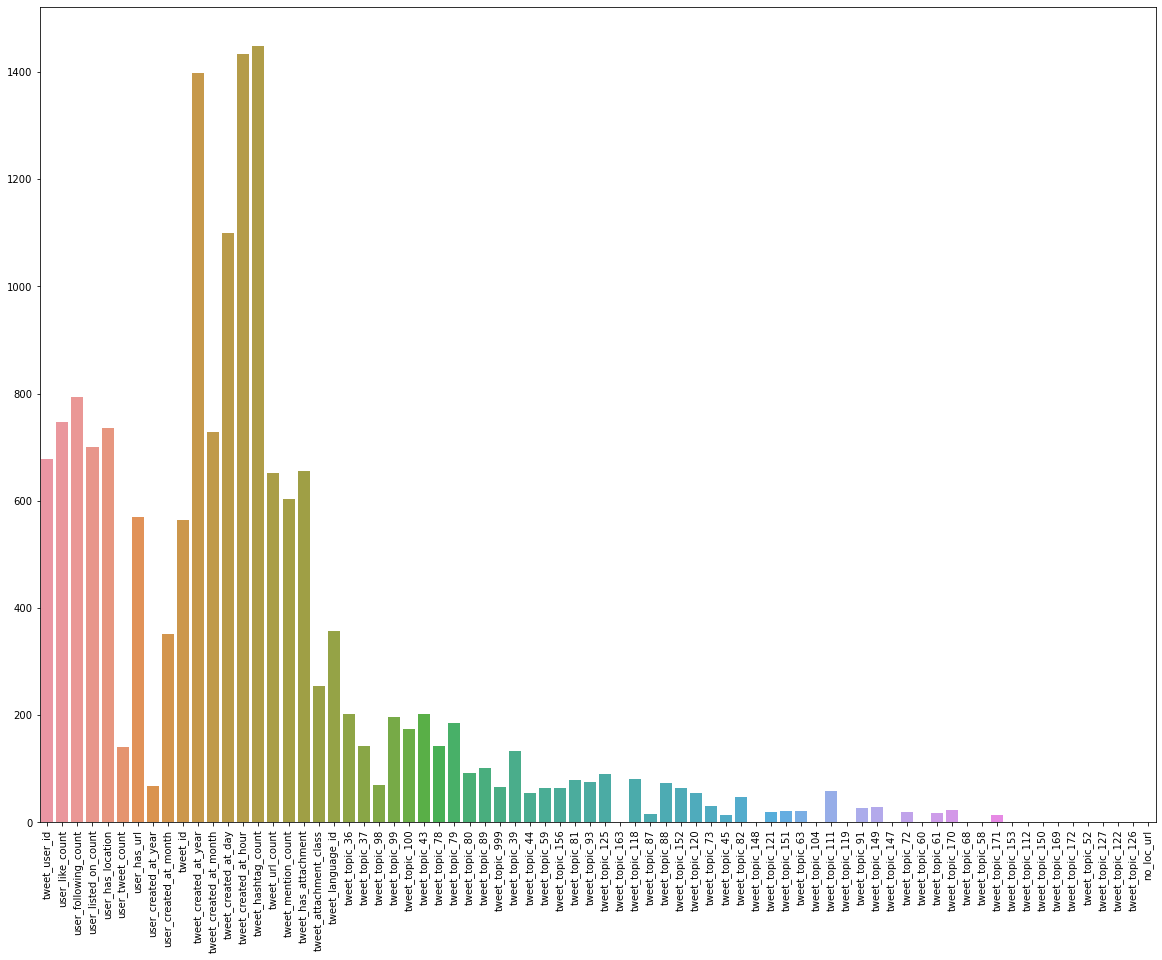

In [442]:
X = lgb_train.drop(['virality'], axis = 1)
y = lgb_train[target]

lgb.fit(X,y)
columns = []
values = []
for col, val in zip(lgb_features, lgb.feature_importances_):
    columns.append(col)
    values.append(val)
plt.figure(figsize = (20,15))
sns.barplot(x = columns, y = values)
plt.xticks(rotation = 90)

In [444]:
cols = ['user_like_count','user_following_count','user_listed_on_count','user_tweet_count','tweet_hashtag_count','tweet_url_count']

for i in cols:
    scaler = MinMaxScaler()
    scaler.fit(lgb_train[[i]])
    lgb_train[i] = scaler.transform(lgb_train[[i]])
    lgb_test[i] = scaler.transform(lgb_test[[i]])

In [522]:
def cross_val(train, test, features, clf):
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    preds_df = pd.DataFrame()
    
    folds= StratifiedKFold(n_splits = 20, shuffle = True, random_state = 2000)
    stratified_target = pd.qcut(train[target], 10, labels = False, duplicates = 'drop')
    
    for index, (trn_idx,val_idx) in enumerate(folds.split(train[features], stratified_target)):
        print()
        print(f'*********************Fold {str(index+1)}*********************')
        print()
        
        X_trn, X_val = train[features].iloc[trn_idx], train[features].iloc[val_idx]
        y_trn, y_val = train[target].iloc[trn_idx], train[target].iloc[val_idx]
        X_test = test[features]
        
        _ = clf.fit(X_trn, y_trn)
        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)
        
#         print(test_preds)
#         print('------------------------------------------------------')
#        test_preds = test_preds[:,0]
#         print(test_preds)
        
#         print('------------------------------------------------------')
#         print(val_preds)
#       val_preds = val_preds[:,0]
        
#         print('------------------------------------------------------')
#         print(val_preds)
        
        print('--------------------------------------------------------')
        oofs[val_idx] = val_preds
        preds_df[f'{index+1}'] = test_preds
        
        print('Accuracy score : ', accuracy_score(y_val, val_preds))
    
    print()
    print('Accuracy_score : ', accuracy_score(train[target], oofs))
    preds_df['Mode'] = preds_df.apply(lambda x : x.mode()[0], axis = 1)
    preds = preds_df['Mode']
    return oofs, preds

In [523]:
lgb_params = {'max_depth': 6,'n_estimators': 103,'learning_rate': 0.2475283314735865,'num_leaves': 894,'colsample_bytree': 0.27829448758775854,'min_child_samples': 58,'min_child_weight': 0.5424881306472833,'random_state': 42}


In [524]:
lgb_oofs, lgb_preds = cross_val(lgb_train, lgb_test, lgb_features, LGBMClassifier(**lgb_params))

# 0.676084388185654
# 0.6749029535864979 - 10-fold
# 0.6754092827004219 - 11-fold
# 0.6765232067510548 - 12-fold
# 0.6754430379746835 - 20-fold
# 0.6784810126582278 - 20-fold randomstate = 2000


*********************Fold 1*********************

--------------------------------------------------------
Accuracy score :  0.6862348178137652

*********************Fold 2*********************

--------------------------------------------------------
Accuracy score :  0.6808367071524967

*********************Fold 3*********************

--------------------------------------------------------
Accuracy score :  0.6619433198380567

*********************Fold 4*********************

--------------------------------------------------------
Accuracy score :  0.684885290148448

*********************Fold 5*********************

--------------------------------------------------------
Accuracy score :  0.694331983805668

*********************Fold 6*********************

--------------------------------------------------------
Accuracy score :  0.6799459824442944

*********************Fold 7*********************

--------------------------------------------------------
Accuracy score :  0.6772

---

In [508]:
def cross_val(train, test, features, clf):
    oofs = np.zeros(len(train))
    preds = np.zeros(len(test))
    preds_df = pd.DataFrame()
    
    folds= StratifiedKFold(n_splits = 20, shuffle = True, random_state = 42)
    stratified_target = pd.qcut(train[target], 10, labels = False, duplicates = 'drop')
    
    for index, (trn_idx,val_idx) in enumerate(folds.split(train[features], stratified_target)):
        print()
        print(f'*********************Fold {str(index+1)}*********************')
        print()
        
        X_trn, X_val = train[features].iloc[trn_idx], train[features].iloc[val_idx]
        y_trn, y_val = train[target].iloc[trn_idx], train[target].iloc[val_idx]
        X_test = test[features]
        
        _ = clf.fit(X_trn, y_trn)
        val_preds = clf.predict(X_val)
        test_preds = clf.predict(X_test)
        
#         print(test_preds)
#         print('------------------------------------------------------')
#        test_preds = test_preds[:,0]
#         print(test_preds)
        
#         print('------------------------------------------------------')
#         print(val_preds)
#       val_preds = val_preds[:,0]
        
#         print('------------------------------------------------------')
#         print(val_preds)
        
        print('--------------------------------------------------------')
        oofs[val_idx] = val_preds
        preds_df[f'{index+1}'] = test_preds
        
        print('Accuracy score : ', accuracy_score(y_val, val_preds))
    
    print()
    print('Accuracy_score : ', accuracy_score(train[target], oofs))
    preds_df['Mode'] = preds_df.apply(lambda x : x.mode()[0], axis = 1)
    preds = preds_df['Mode']
    return oofs, preds

In [509]:
rf_params = {'max_depth': 16,'n_estimators': 279, 'min_samples_split': 4,'min_samples_leaf': 3,'random_state': 42}


In [510]:
rf_oofs, rf_preds = cross_val(lgb_train, lgb_test, lgb_features, RandomForestClassifier(**rf_params))

# 0.6730464135021097
# 0.6738902953586497 - 10-fold
# 0.6758818565400844 - 11-fold
# 0.6756118143459916 - 12-fold
# 0.6747004219409283 - 20-fold
# 0.675915611814346 - same - random_state = 42


*********************Fold 1*********************

--------------------------------------------------------
Accuracy score :  0.6902834008097166

*********************Fold 2*********************

--------------------------------------------------------
Accuracy score :  0.6707152496626181

*********************Fold 3*********************

--------------------------------------------------------
Accuracy score :  0.6909581646423751

*********************Fold 4*********************

--------------------------------------------------------
Accuracy score :  0.6727395411605938

*********************Fold 5*********************

--------------------------------------------------------
Accuracy score :  0.6774628879892037

*********************Fold 6*********************

--------------------------------------------------------
Accuracy score :  0.6846725185685347

*********************Fold 7*********************

--------------------------------------------------------
Accuracy score :  0.66

---

# Hyperparameter Optimization

In [461]:
# X = train_tweet_2.drop(target, axis = 1)
# y = train_tweet_2[target]

### LGB

In [462]:
# X_trn, X_val, y_trn, y_val = train_test_split(X[lgb_features], y, test_size = 0.2, random_state = 5)

In [463]:
# %%time
# def create_model_3(trial):
#     max_depth = trial.suggest_int("max_depth", 1, 20)
#     n_estimators = trial.suggest_int("n_estimators", 100, 2000)
#     learning_rate = trial.suggest_uniform('learning_rate', 0.1, 1)
#     num_leaves = trial.suggest_int("num_leaves", 2, 1500)
#     colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 0.9)
#     min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
#     #reg_alpha = trial.suggest_uniform("reg_alpha", 0.1, 10)
#     #reg_lambda = trial.suggest_uniform("reg_lambda", 0.1,10)
#     min_child_weight=trial.suggest_uniform('min_child_weight', 0.001,1)
    
#     model = LGBMClassifier(
#         learning_rate = learning_rate, 
#         n_estimators = n_estimators, 
#         max_depth = max_depth,
#         num_leaves = num_leaves,
#         colsample_bytree = colsample_bytree,
#         min_child_samples = min_child_samples,
#         #reg_alpha = reg_alpha,
#         #reg_lambda = reg_lambda,
#         min_child_weight= min_child_weight,
#         n_jobs = -1,
#         random_state = 5
#     )
#     return model

# sampler = TPESampler(seed=0)
# def objective(trial):
#     model = create_model_3(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict(X_val)
#     score = accuracy_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = "maximize", sampler = sampler)
# study.optimize(objective, n_trials = 30)

# lgb_params = study.best_params
# lgb_params['random_state'] = 5
# lgb = LGBMClassifier(**lgb_params)
# lgb.fit(X_trn, y_trn)
# preds = lgb.predict(X_val)
# print('Optimized LightGBM accuracy score is: ', accuracy_score(y_val, preds))

### XGB

In [464]:
# X_trn, X_val, y_trn, y_val = train_test_split(X[xgb_features], y, test_size = 0.2, random_state = 5)

In [465]:
# %%time
# def create_model_1(trial):
#     max_depth = trial.suggest_int('max_depth',2,30)
#     n_estimators = trial.suggest_int('n_estimators',1,2000)
#     learning_rate = trial.suggest_uniform('learning_rate',0.1,1)
#     colsample_bytree = trial.suggest_uniform('colsample_bytree',0.1,0.9)
#     #reg_alpha = trial.suggest_int('reg_alpha',1,10)
#     #reg_lambda = trial.suggest_int('reg_lambda',1,10)
    
#     model = XGBClassifier(learning_rate=learning_rate,
#                         n_estimators = n_estimators,
#                         max_depth = max_depth,
#                         colsample_bytree = colsample_bytree,
#                         random_state = 5,
#                         n_jobs = -1)
#     return model

# sampler = TPESampler(seed = 0)

# def objective(trial):
#     model = create_model_1(trial)
#     model.fit(X_trn,y_trn)
#     preds = model.predict(X_val)
#     score = accuracy_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = 'maximize', sampler = sampler)
# study.optimize(objective, n_trials = 30)

# xgb_params = study.best_params
# xgb_params['random_state'] = 5
# xgb = XGBClassifier(**xgb_params)
# xgb.fit(X_trn, y_trn)
# preds = xgb.predict(X_val)
# print('Optimized XGB accuracy score is: ', accuracy_score(y_val,preds))

### CatBoost

In [466]:
# X_trn, X_val, y_trn, y_val = train_test_split(X[cat_features], y, test_size = 0.2, random_state = 5)

In [467]:
# %%time
# def create_model_2(trial):
#     max_depth = trial.suggest_int("max_depth", 1, 16)
#     n_estimators = trial.suggest_int("n_estimators", 500, 1500)
#     learning_rate = trial.suggest_uniform('learning_rate', 0.1, 1)
#     rsm = trial.suggest_uniform('rsm', 0.1, 0.99)
#     #num_leaves = trial.suggest_int("num_leaves", 2, 5000)
#     #min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
#     reg_lambda = trial.suggest_int("reg_lambda", 1, 1000)
    
#     model = CatBoostClassifier(
#         learning_rate = learning_rate, 
#         n_estimators = n_estimators, 
#         max_depth = max_depth,
#         rsm = rsm,
#         reg_lambda = reg_lambda,
#         #num_leaves=num_leaves, 
#         #min_child_samples=min_child_samples,
#         random_state = 5,
#         verbose = False
#     )
#     return model

# sampler = TPESampler(seed=0)

# def objective(trial):
#     model = create_model_2(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict(X_val)
#     score = accuracy_score(y_val,preds)
#     return score

# study = optuna.create_study(direction="maximize", sampler=sampler)
# study.optimize(objective, n_trials=30)

# cat_params = study.best_params
# cat_params['random_state'] = 5
# cat = CatBoostClassifier(**cat_params, verbose = False)
# cat.fit(X_trn, y_trn)
# preds = cat.predict(X_val)
# print('Optimized Catboost accuracy score is: ', accuracy_score(y_val, preds))

### RandomForest

In [468]:
# X_trn, X_val, y_trn, y_val = train_test_split(X[lgb_features], y, test_size = 0.2, random_state = 5)

In [469]:
# %%time
# def create_model_4(trial):
#     max_depth = trial.suggest_int('max_depth',2, 20)       
#     n_estimators = trial.suggest_int('n_estimators',2, 2000)
#     min_samples_split = trial.suggest_int('min_samples_split',2, 200)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf',2, 100)
    
    
#     model = RandomForestClassifier(
#         max_depth = max_depth,
#         n_estimators = n_estimators,
#         min_samples_split = min_samples_split,
#         min_samples_leaf = min_samples_leaf,
#         n_jobs = -1,
#         random_state = 5
#     )
#     return model

# sampler = TPESampler(seed = 0)
# def objective(trial):
#     model = create_model_4(trial)
#     model.fit(X_trn, y_trn)
#     preds = model.predict(X_val)
#     score = accuracy_score(y_val,preds)
#     return score

# study = optuna.create_study(direction = "maximize", sampler = sampler)
# study.optimize(objective, n_trials=30)

# rf_params = study.best_params
# rf_params['random_state'] = 5
# rf = RandomForestClassifier(**rf_params)
# rf.fit(X_trn, y_trn)
# preds = rf.predict(X_val)
# print('Optimized RandomForest accuracy_score is: ', accuracy_score(y_val, preds))

---

## Stacking

In [553]:
train_1 = pd.DataFrame()
test_1 = pd.DataFrame()

In [554]:

train_1[target] = lgb_train[target]

train_1['lgb'] = lgb_oofs
train_1['cat'] = cat_oofs
train_1['xgb'] = xgb_oofs
train_1['rf'] = rf_oofs

test_1['lgb'] = lgb_preds
test_1['cat'] = cat_preds
test_1['xgb'] = xgb_preds
test_1['rf'] = rf_preds

stack_features = [col for col in train_1.columns if col not in ['tweet_id', target]]

In [556]:
xgb_oofs_1, xgb_preds_1 = cross_val(train_1, test_1, stack_features, XGBClassifier())

# 0.6812489451476793

# 0.6845569620253165

#  - with parameters


*********************Fold 1*********************

[18:07:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------
Accuracy score :  0.6882591093117408

*********************Fold 2*********************

[18:07:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
--------------------------------------------------------
Accuracy score :  0.6808367071524967

*********************Fold 3*********************

[18:07:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed

In [566]:
lgb_oofs_1, lgb_preds_1 = cross_val(train_1, test_1, stack_features, LGBMClassifier(**lgb_params))

# 0.6784810126582278

# 0.6842531645569621

# 0.685367088607595


*********************Fold 1*********************

--------------------------------------------------------
Accuracy score :  0.6916329284750338

*********************Fold 2*********************

--------------------------------------------------------
Accuracy score :  0.6815114709851552

*********************Fold 3*********************

--------------------------------------------------------
Accuracy score :  0.6727395411605938

*********************Fold 4*********************

--------------------------------------------------------
Accuracy score :  0.6970310391363023

*********************Fold 5*********************

--------------------------------------------------------
Accuracy score :  0.6950067476383266

*********************Fold 6*********************

--------------------------------------------------------
Accuracy score :  0.6975016880486158

*********************Fold 7*********************

--------------------------------------------------------
Accuracy score :  0.67

In [560]:
cat_oofs_1, cat_preds_1 = cross_val_cat(train_1, test_1, stack_features, CatBoostClassifier())

# 0.6761856540084388

# 0.6846582278481013

# 0.6833417721518987


*********************Fold 1*********************

Learning rate set to 0.093808
0:	learn: 1.4569412	total: 12.2ms	remaining: 12.2s
1:	learn: 1.3503714	total: 21.4ms	remaining: 10.7s
2:	learn: 1.2693808	total: 30.7ms	remaining: 10.2s
3:	learn: 1.2047400	total: 40.2ms	remaining: 10s
4:	learn: 1.1526666	total: 49.1ms	remaining: 9.76s
5:	learn: 1.1090195	total: 57.7ms	remaining: 9.56s
6:	learn: 1.0730098	total: 66.9ms	remaining: 9.49s
7:	learn: 1.0421558	total: 76ms	remaining: 9.43s
8:	learn: 1.0162303	total: 85.1ms	remaining: 9.37s
9:	learn: 0.9938816	total: 95.9ms	remaining: 9.49s
10:	learn: 0.9741989	total: 106ms	remaining: 9.56s
11:	learn: 0.9573644	total: 117ms	remaining: 9.64s
12:	learn: 0.9432104	total: 127ms	remaining: 9.65s
13:	learn: 0.9306048	total: 136ms	remaining: 9.6s
14:	learn: 0.9192540	total: 147ms	remaining: 9.63s
15:	learn: 0.9092913	total: 155ms	remaining: 9.53s
16:	learn: 0.9004097	total: 164ms	remaining: 9.51s
17:	learn: 0.8933446	total: 172ms	remaining: 9.38s
18:	le

175:	learn: 0.8292480	total: 1.65s	remaining: 7.74s
176:	learn: 0.8292234	total: 1.66s	remaining: 7.74s
177:	learn: 0.8291972	total: 1.67s	remaining: 7.72s
178:	learn: 0.8291838	total: 1.68s	remaining: 7.72s
179:	learn: 0.8291549	total: 1.7s	remaining: 7.73s
180:	learn: 0.8291351	total: 1.7s	remaining: 7.71s
181:	learn: 0.8291001	total: 1.71s	remaining: 7.71s
182:	learn: 0.8290777	total: 1.72s	remaining: 7.69s
183:	learn: 0.8290597	total: 1.73s	remaining: 7.68s
184:	learn: 0.8290374	total: 1.74s	remaining: 7.67s
185:	learn: 0.8289977	total: 1.75s	remaining: 7.66s
186:	learn: 0.8289713	total: 1.76s	remaining: 7.65s
187:	learn: 0.8289478	total: 1.77s	remaining: 7.65s
188:	learn: 0.8289249	total: 1.78s	remaining: 7.63s
189:	learn: 0.8288975	total: 1.79s	remaining: 7.62s
190:	learn: 0.8288687	total: 1.8s	remaining: 7.61s
191:	learn: 0.8288446	total: 1.81s	remaining: 7.61s
192:	learn: 0.8288165	total: 1.82s	remaining: 7.59s
193:	learn: 0.8287907	total: 1.83s	remaining: 7.59s
194:	learn: 0.8

341:	learn: 0.8265251	total: 3.16s	remaining: 6.07s
342:	learn: 0.8265166	total: 3.17s	remaining: 6.06s
343:	learn: 0.8265062	total: 3.17s	remaining: 6.06s
344:	learn: 0.8264945	total: 3.19s	remaining: 6.05s
345:	learn: 0.8264842	total: 3.2s	remaining: 6.04s
346:	learn: 0.8264772	total: 3.21s	remaining: 6.04s
347:	learn: 0.8264685	total: 3.22s	remaining: 6.03s
348:	learn: 0.8264605	total: 3.23s	remaining: 6.02s
349:	learn: 0.8264478	total: 3.23s	remaining: 6s
350:	learn: 0.8264346	total: 3.24s	remaining: 6s
351:	learn: 0.8264243	total: 3.25s	remaining: 5.99s
352:	learn: 0.8264145	total: 3.26s	remaining: 5.98s
353:	learn: 0.8264015	total: 3.27s	remaining: 5.97s
354:	learn: 0.8263905	total: 3.28s	remaining: 5.96s
355:	learn: 0.8263801	total: 3.29s	remaining: 5.95s
356:	learn: 0.8263717	total: 3.3s	remaining: 5.94s
357:	learn: 0.8263578	total: 3.31s	remaining: 5.93s
358:	learn: 0.8263493	total: 3.31s	remaining: 5.92s
359:	learn: 0.8263359	total: 3.32s	remaining: 5.91s
360:	learn: 0.826326

511:	learn: 0.8252565	total: 4.86s	remaining: 4.63s
512:	learn: 0.8252507	total: 4.87s	remaining: 4.63s
513:	learn: 0.8252392	total: 4.89s	remaining: 4.62s
514:	learn: 0.8252342	total: 4.9s	remaining: 4.61s
515:	learn: 0.8252279	total: 4.91s	remaining: 4.6s
516:	learn: 0.8252235	total: 4.92s	remaining: 4.59s
517:	learn: 0.8252197	total: 4.93s	remaining: 4.58s
518:	learn: 0.8252155	total: 4.93s	remaining: 4.57s
519:	learn: 0.8252097	total: 4.95s	remaining: 4.56s
520:	learn: 0.8252043	total: 4.96s	remaining: 4.55s
521:	learn: 0.8251984	total: 4.96s	remaining: 4.54s
522:	learn: 0.8251921	total: 4.97s	remaining: 4.54s
523:	learn: 0.8251853	total: 4.98s	remaining: 4.53s
524:	learn: 0.8251809	total: 4.99s	remaining: 4.51s
525:	learn: 0.8251728	total: 5s	remaining: 4.5s
526:	learn: 0.8251662	total: 5.01s	remaining: 4.49s
527:	learn: 0.8251602	total: 5.02s	remaining: 4.48s
528:	learn: 0.8251553	total: 5.03s	remaining: 4.47s
529:	learn: 0.8251505	total: 5.03s	remaining: 4.46s
530:	learn: 0.8251

676:	learn: 0.8244894	total: 6.43s	remaining: 3.07s
677:	learn: 0.8244855	total: 6.44s	remaining: 3.06s
678:	learn: 0.8244801	total: 6.46s	remaining: 3.05s
679:	learn: 0.8244772	total: 6.47s	remaining: 3.04s
680:	learn: 0.8244727	total: 6.48s	remaining: 3.04s
681:	learn: 0.8244685	total: 6.49s	remaining: 3.02s
682:	learn: 0.8244630	total: 6.5s	remaining: 3.02s
683:	learn: 0.8244606	total: 6.51s	remaining: 3.01s
684:	learn: 0.8244562	total: 6.52s	remaining: 3s
685:	learn: 0.8244522	total: 6.53s	remaining: 2.99s
686:	learn: 0.8244497	total: 6.54s	remaining: 2.98s
687:	learn: 0.8244453	total: 6.54s	remaining: 2.97s
688:	learn: 0.8244430	total: 6.55s	remaining: 2.96s
689:	learn: 0.8244393	total: 6.56s	remaining: 2.95s
690:	learn: 0.8244351	total: 6.57s	remaining: 2.94s
691:	learn: 0.8244321	total: 6.58s	remaining: 2.93s
692:	learn: 0.8244272	total: 6.59s	remaining: 2.92s
693:	learn: 0.8244233	total: 6.6s	remaining: 2.91s
694:	learn: 0.8244206	total: 6.61s	remaining: 2.9s
695:	learn: 0.8244

836:	learn: 0.8240032	total: 8.17s	remaining: 1.59s
837:	learn: 0.8240012	total: 8.18s	remaining: 1.58s
838:	learn: 0.8239982	total: 8.2s	remaining: 1.57s
839:	learn: 0.8239941	total: 8.21s	remaining: 1.56s
840:	learn: 0.8239927	total: 8.22s	remaining: 1.55s
841:	learn: 0.8239892	total: 8.23s	remaining: 1.54s
842:	learn: 0.8239873	total: 8.24s	remaining: 1.53s
843:	learn: 0.8239848	total: 8.25s	remaining: 1.52s
844:	learn: 0.8239816	total: 8.26s	remaining: 1.51s
845:	learn: 0.8239796	total: 8.27s	remaining: 1.5s
846:	learn: 0.8239766	total: 8.28s	remaining: 1.5s
847:	learn: 0.8239738	total: 8.29s	remaining: 1.49s
848:	learn: 0.8239725	total: 8.3s	remaining: 1.48s
849:	learn: 0.8239704	total: 8.31s	remaining: 1.47s
850:	learn: 0.8239679	total: 8.32s	remaining: 1.46s
851:	learn: 0.8239659	total: 8.33s	remaining: 1.45s
852:	learn: 0.8239629	total: 8.34s	remaining: 1.44s
853:	learn: 0.8239604	total: 8.35s	remaining: 1.43s
854:	learn: 0.8239569	total: 8.36s	remaining: 1.42s
855:	learn: 0.82

996:	learn: 0.8236488	total: 10.2s	remaining: 30.5ms
997:	learn: 0.8236472	total: 10.2s	remaining: 20.4ms
998:	learn: 0.8236437	total: 10.2s	remaining: 10.2ms
999:	learn: 0.8236421	total: 10.2s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6963562753036437

*********************Fold 2*********************

Learning rate set to 0.093808
0:	learn: 1.4567655	total: 15.8ms	remaining: 15.8s
1:	learn: 1.3540295	total: 23.6ms	remaining: 11.8s
2:	learn: 1.2717701	total: 34ms	remaining: 11.3s
3:	learn: 1.2107986	total: 41.8ms	remaining: 10.4s
4:	learn: 1.1568297	total: 52.6ms	remaining: 10.5s
5:	learn: 1.1129925	total: 63.5ms	remaining: 10.5s
6:	learn: 1.0757572	total: 73.9ms	remaining: 10.5s
7:	learn: 1.0445379	total: 86.2ms	remaining: 10.7s
8:	learn: 1.0180450	total: 96.5ms	remaining: 10.6s
9:	learn: 0.9953804	total: 106ms	remaining: 10.5s
10:	learn: 0.9756915	total: 119ms	remaining: 10.7s
11:	learn: 0.9584144	total: 134ms	remaining: 11s
12:	learn

154:	learn: 0.8287677	total: 1.7s	remaining: 9.29s
155:	learn: 0.8287366	total: 1.72s	remaining: 9.29s
156:	learn: 0.8287077	total: 1.73s	remaining: 9.29s
157:	learn: 0.8286729	total: 1.74s	remaining: 9.28s
158:	learn: 0.8286357	total: 1.75s	remaining: 9.28s
159:	learn: 0.8286082	total: 1.77s	remaining: 9.27s
160:	learn: 0.8285803	total: 1.78s	remaining: 9.28s
161:	learn: 0.8285554	total: 1.79s	remaining: 9.28s
162:	learn: 0.8285306	total: 1.81s	remaining: 9.28s
163:	learn: 0.8285066	total: 1.82s	remaining: 9.29s
164:	learn: 0.8284789	total: 1.84s	remaining: 9.3s
165:	learn: 0.8284514	total: 1.85s	remaining: 9.31s
166:	learn: 0.8284159	total: 1.87s	remaining: 9.31s
167:	learn: 0.8283866	total: 1.88s	remaining: 9.31s
168:	learn: 0.8283647	total: 1.89s	remaining: 9.31s
169:	learn: 0.8283406	total: 1.91s	remaining: 9.32s
170:	learn: 0.8283111	total: 1.93s	remaining: 9.34s
171:	learn: 0.8282853	total: 1.94s	remaining: 9.34s
172:	learn: 0.8282634	total: 1.95s	remaining: 9.34s
173:	learn: 0.

318:	learn: 0.8258037	total: 3.66s	remaining: 7.81s
319:	learn: 0.8257916	total: 3.67s	remaining: 7.8s
320:	learn: 0.8257826	total: 3.69s	remaining: 7.79s
321:	learn: 0.8257723	total: 3.7s	remaining: 7.79s
322:	learn: 0.8257580	total: 3.71s	remaining: 7.78s
323:	learn: 0.8257478	total: 3.72s	remaining: 7.77s
324:	learn: 0.8257318	total: 3.73s	remaining: 7.76s
325:	learn: 0.8257229	total: 3.75s	remaining: 7.75s
326:	learn: 0.8257111	total: 3.76s	remaining: 7.73s
327:	learn: 0.8257026	total: 3.77s	remaining: 7.72s
328:	learn: 0.8256941	total: 3.78s	remaining: 7.71s
329:	learn: 0.8256833	total: 3.79s	remaining: 7.69s
330:	learn: 0.8256751	total: 3.8s	remaining: 7.68s
331:	learn: 0.8256654	total: 3.81s	remaining: 7.67s
332:	learn: 0.8256539	total: 3.82s	remaining: 7.65s
333:	learn: 0.8256405	total: 3.83s	remaining: 7.64s
334:	learn: 0.8256307	total: 3.84s	remaining: 7.63s
335:	learn: 0.8256183	total: 3.86s	remaining: 7.62s
336:	learn: 0.8256054	total: 3.87s	remaining: 7.62s
337:	learn: 0.8

486:	learn: 0.8244839	total: 5.62s	remaining: 5.92s
487:	learn: 0.8244728	total: 5.63s	remaining: 5.91s
488:	learn: 0.8244690	total: 5.65s	remaining: 5.9s
489:	learn: 0.8244641	total: 5.66s	remaining: 5.89s
490:	learn: 0.8244579	total: 5.67s	remaining: 5.88s
491:	learn: 0.8244500	total: 5.69s	remaining: 5.87s
492:	learn: 0.8244442	total: 5.7s	remaining: 5.86s
493:	learn: 0.8244385	total: 5.71s	remaining: 5.85s
494:	learn: 0.8244322	total: 5.72s	remaining: 5.84s
495:	learn: 0.8244285	total: 5.73s	remaining: 5.82s
496:	learn: 0.8244219	total: 5.74s	remaining: 5.81s
497:	learn: 0.8244156	total: 5.75s	remaining: 5.8s
498:	learn: 0.8244098	total: 5.76s	remaining: 5.79s
499:	learn: 0.8244027	total: 5.78s	remaining: 5.78s
500:	learn: 0.8243957	total: 5.79s	remaining: 5.76s
501:	learn: 0.8243893	total: 5.8s	remaining: 5.75s
502:	learn: 0.8243810	total: 5.81s	remaining: 5.74s
503:	learn: 0.8243768	total: 5.82s	remaining: 5.73s
504:	learn: 0.8243710	total: 5.84s	remaining: 5.72s
505:	learn: 0.82

650:	learn: 0.8237287	total: 7.59s	remaining: 4.07s
651:	learn: 0.8237245	total: 7.61s	remaining: 4.06s
652:	learn: 0.8237213	total: 7.62s	remaining: 4.05s
653:	learn: 0.8237181	total: 7.63s	remaining: 4.04s
654:	learn: 0.8237136	total: 7.64s	remaining: 4.03s
655:	learn: 0.8237110	total: 7.66s	remaining: 4.01s
656:	learn: 0.8237072	total: 7.67s	remaining: 4s
657:	learn: 0.8237028	total: 7.68s	remaining: 3.99s
658:	learn: 0.8236992	total: 7.69s	remaining: 3.98s
659:	learn: 0.8236956	total: 7.7s	remaining: 3.97s
660:	learn: 0.8236920	total: 7.71s	remaining: 3.96s
661:	learn: 0.8236884	total: 7.72s	remaining: 3.94s
662:	learn: 0.8236859	total: 7.74s	remaining: 3.93s
663:	learn: 0.8236818	total: 7.75s	remaining: 3.92s
664:	learn: 0.8236759	total: 7.76s	remaining: 3.91s
665:	learn: 0.8236714	total: 7.77s	remaining: 3.9s
666:	learn: 0.8236667	total: 7.78s	remaining: 3.88s
667:	learn: 0.8236629	total: 7.79s	remaining: 3.87s
668:	learn: 0.8236581	total: 7.81s	remaining: 3.86s
669:	learn: 0.823

817:	learn: 0.8232174	total: 9.52s	remaining: 2.12s
818:	learn: 0.8232141	total: 9.53s	remaining: 2.11s
819:	learn: 0.8232127	total: 9.54s	remaining: 2.1s
820:	learn: 0.8232108	total: 9.55s	remaining: 2.08s
821:	learn: 0.8232087	total: 9.56s	remaining: 2.07s
822:	learn: 0.8232062	total: 9.57s	remaining: 2.06s
823:	learn: 0.8232038	total: 9.59s	remaining: 2.05s
824:	learn: 0.8232022	total: 9.6s	remaining: 2.04s
825:	learn: 0.8231998	total: 9.61s	remaining: 2.02s
826:	learn: 0.8231971	total: 9.62s	remaining: 2.01s
827:	learn: 0.8231949	total: 9.63s	remaining: 2s
828:	learn: 0.8231922	total: 9.64s	remaining: 1.99s
829:	learn: 0.8231901	total: 9.65s	remaining: 1.98s
830:	learn: 0.8231874	total: 9.67s	remaining: 1.97s
831:	learn: 0.8231858	total: 9.68s	remaining: 1.95s
832:	learn: 0.8231827	total: 9.69s	remaining: 1.94s
833:	learn: 0.8231798	total: 9.7s	remaining: 1.93s
834:	learn: 0.8231772	total: 9.71s	remaining: 1.92s
835:	learn: 0.8231743	total: 9.72s	remaining: 1.91s
836:	learn: 0.8231

987:	learn: 0.8228355	total: 11.5s	remaining: 139ms
988:	learn: 0.8228337	total: 11.5s	remaining: 128ms
989:	learn: 0.8228318	total: 11.5s	remaining: 116ms
990:	learn: 0.8228297	total: 11.5s	remaining: 104ms
991:	learn: 0.8228277	total: 11.5s	remaining: 92.8ms
992:	learn: 0.8228249	total: 11.5s	remaining: 81.2ms
993:	learn: 0.8228218	total: 11.5s	remaining: 69.6ms
994:	learn: 0.8228191	total: 11.5s	remaining: 58ms
995:	learn: 0.8228178	total: 11.5s	remaining: 46.4ms
996:	learn: 0.8228164	total: 11.6s	remaining: 34.8ms
997:	learn: 0.8228139	total: 11.6s	remaining: 23.2ms
998:	learn: 0.8228108	total: 11.6s	remaining: 11.6ms
999:	learn: 0.8228085	total: 11.6s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6794871794871795

*********************Fold 3*********************

Learning rate set to 0.093808
0:	learn: 1.4573014	total: 12.6ms	remaining: 12.6s
1:	learn: 1.3547262	total: 22.2ms	remaining: 11.1s
2:	learn: 1.2727536	total: 33.3ms	remaining

158:	learn: 0.8306369	total: 1.86s	remaining: 9.82s
159:	learn: 0.8306108	total: 1.87s	remaining: 9.81s
160:	learn: 0.8305845	total: 1.88s	remaining: 9.79s
161:	learn: 0.8305442	total: 1.89s	remaining: 9.78s
162:	learn: 0.8305110	total: 1.9s	remaining: 9.77s
163:	learn: 0.8304683	total: 1.92s	remaining: 9.76s
164:	learn: 0.8304395	total: 1.93s	remaining: 9.76s
165:	learn: 0.8304033	total: 1.94s	remaining: 9.75s
166:	learn: 0.8303801	total: 1.96s	remaining: 9.75s
167:	learn: 0.8303432	total: 1.97s	remaining: 9.76s
168:	learn: 0.8303221	total: 1.98s	remaining: 9.76s
169:	learn: 0.8302836	total: 2s	remaining: 9.76s
170:	learn: 0.8302601	total: 2.01s	remaining: 9.75s
171:	learn: 0.8302283	total: 2.02s	remaining: 9.73s
172:	learn: 0.8302044	total: 2.03s	remaining: 9.72s
173:	learn: 0.8301782	total: 2.05s	remaining: 9.71s
174:	learn: 0.8301569	total: 2.06s	remaining: 9.71s
175:	learn: 0.8301331	total: 2.07s	remaining: 9.7s
176:	learn: 0.8301054	total: 2.08s	remaining: 9.68s
177:	learn: 0.830

321:	learn: 0.8276234	total: 3.78s	remaining: 7.96s
322:	learn: 0.8276114	total: 3.79s	remaining: 7.95s
323:	learn: 0.8276022	total: 3.8s	remaining: 7.93s
324:	learn: 0.8275927	total: 3.81s	remaining: 7.92s
325:	learn: 0.8275816	total: 3.82s	remaining: 7.9s
326:	learn: 0.8275720	total: 3.83s	remaining: 7.89s
327:	learn: 0.8275585	total: 3.84s	remaining: 7.87s
328:	learn: 0.8275474	total: 3.85s	remaining: 7.86s
329:	learn: 0.8275387	total: 3.87s	remaining: 7.85s
330:	learn: 0.8275282	total: 3.88s	remaining: 7.84s
331:	learn: 0.8275129	total: 3.89s	remaining: 7.82s
332:	learn: 0.8275020	total: 3.9s	remaining: 7.81s
333:	learn: 0.8274901	total: 3.91s	remaining: 7.8s
334:	learn: 0.8274822	total: 3.92s	remaining: 7.79s
335:	learn: 0.8274718	total: 3.94s	remaining: 7.78s
336:	learn: 0.8274632	total: 3.95s	remaining: 7.77s
337:	learn: 0.8274532	total: 3.96s	remaining: 7.75s
338:	learn: 0.8274445	total: 3.97s	remaining: 7.75s
339:	learn: 0.8274351	total: 3.98s	remaining: 7.73s
340:	learn: 0.82

490:	learn: 0.8263129	total: 5.75s	remaining: 5.96s
491:	learn: 0.8263069	total: 5.76s	remaining: 5.94s
492:	learn: 0.8263033	total: 5.77s	remaining: 5.93s
493:	learn: 0.8262987	total: 5.78s	remaining: 5.92s
494:	learn: 0.8262941	total: 5.79s	remaining: 5.91s
495:	learn: 0.8262866	total: 5.8s	remaining: 5.9s
496:	learn: 0.8262820	total: 5.81s	remaining: 5.88s
497:	learn: 0.8262770	total: 5.83s	remaining: 5.87s
498:	learn: 0.8262713	total: 5.84s	remaining: 5.86s
499:	learn: 0.8262647	total: 5.85s	remaining: 5.85s
500:	learn: 0.8262604	total: 5.86s	remaining: 5.84s
501:	learn: 0.8262543	total: 5.87s	remaining: 5.82s
502:	learn: 0.8262493	total: 5.88s	remaining: 5.81s
503:	learn: 0.8262448	total: 5.89s	remaining: 5.8s
504:	learn: 0.8262394	total: 5.91s	remaining: 5.79s
505:	learn: 0.8262308	total: 5.92s	remaining: 5.78s
506:	learn: 0.8262258	total: 5.93s	remaining: 5.76s
507:	learn: 0.8262213	total: 5.94s	remaining: 5.75s
508:	learn: 0.8262161	total: 5.95s	remaining: 5.74s
509:	learn: 0.8

658:	learn: 0.8255264	total: 7.68s	remaining: 3.98s
659:	learn: 0.8255225	total: 7.7s	remaining: 3.96s
660:	learn: 0.8255201	total: 7.71s	remaining: 3.95s
661:	learn: 0.8255175	total: 7.72s	remaining: 3.94s
662:	learn: 0.8255140	total: 7.73s	remaining: 3.93s
663:	learn: 0.8255115	total: 7.75s	remaining: 3.92s
664:	learn: 0.8255076	total: 7.76s	remaining: 3.91s
665:	learn: 0.8255043	total: 7.77s	remaining: 3.9s
666:	learn: 0.8254991	total: 7.78s	remaining: 3.88s
667:	learn: 0.8254952	total: 7.79s	remaining: 3.87s
668:	learn: 0.8254925	total: 7.8s	remaining: 3.86s
669:	learn: 0.8254898	total: 7.81s	remaining: 3.85s
670:	learn: 0.8254863	total: 7.83s	remaining: 3.84s
671:	learn: 0.8254845	total: 7.84s	remaining: 3.83s
672:	learn: 0.8254813	total: 7.85s	remaining: 3.81s
673:	learn: 0.8254785	total: 7.86s	remaining: 3.8s
674:	learn: 0.8254749	total: 7.87s	remaining: 3.79s
675:	learn: 0.8254719	total: 7.88s	remaining: 3.78s
676:	learn: 0.8254683	total: 7.89s	remaining: 3.77s
677:	learn: 0.82

822:	learn: 0.8250219	total: 9.56s	remaining: 2.06s
823:	learn: 0.8250196	total: 9.57s	remaining: 2.04s
824:	learn: 0.8250169	total: 9.58s	remaining: 2.03s
825:	learn: 0.8250134	total: 9.59s	remaining: 2.02s
826:	learn: 0.8250112	total: 9.6s	remaining: 2.01s
827:	learn: 0.8250091	total: 9.61s	remaining: 2s
828:	learn: 0.8250075	total: 9.62s	remaining: 1.99s
829:	learn: 0.8250053	total: 9.63s	remaining: 1.97s
830:	learn: 0.8250039	total: 9.65s	remaining: 1.96s
831:	learn: 0.8250010	total: 9.66s	remaining: 1.95s
832:	learn: 0.8249994	total: 9.67s	remaining: 1.94s
833:	learn: 0.8249973	total: 9.68s	remaining: 1.93s
834:	learn: 0.8249954	total: 9.69s	remaining: 1.92s
835:	learn: 0.8249919	total: 9.71s	remaining: 1.9s
836:	learn: 0.8249897	total: 9.72s	remaining: 1.89s
837:	learn: 0.8249873	total: 9.73s	remaining: 1.88s
838:	learn: 0.8249845	total: 9.74s	remaining: 1.87s
839:	learn: 0.8249819	total: 9.75s	remaining: 1.86s
840:	learn: 0.8249806	total: 9.76s	remaining: 1.84s
841:	learn: 0.824

995:	learn: 0.8246403	total: 11.5s	remaining: 46.3ms
996:	learn: 0.8246389	total: 11.5s	remaining: 34.7ms
997:	learn: 0.8246366	total: 11.5s	remaining: 23.1ms
998:	learn: 0.8246348	total: 11.6s	remaining: 11.6ms
999:	learn: 0.8246324	total: 11.6s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.703778677462888

*********************Fold 4*********************

Learning rate set to 0.093808
0:	learn: 1.4568988	total: 11.3ms	remaining: 11.3s
1:	learn: 1.3541182	total: 19.6ms	remaining: 9.78s
2:	learn: 1.2719617	total: 29.9ms	remaining: 9.93s
3:	learn: 1.2120262	total: 38.4ms	remaining: 9.56s
4:	learn: 1.1580261	total: 48.9ms	remaining: 9.74s
5:	learn: 1.1143063	total: 59.6ms	remaining: 9.87s
6:	learn: 1.0768675	total: 70.6ms	remaining: 10s
7:	learn: 1.0455019	total: 81.7ms	remaining: 10.1s
8:	learn: 1.0190923	total: 92.8ms	remaining: 10.2s
9:	learn: 0.9964578	total: 104ms	remaining: 10.3s
10:	learn: 0.9766411	total: 116ms	remaining: 10.4s
11:	le

165:	learn: 0.8293256	total: 1.87s	remaining: 9.38s
166:	learn: 0.8293024	total: 1.88s	remaining: 9.37s
167:	learn: 0.8292814	total: 1.89s	remaining: 9.36s
168:	learn: 0.8292590	total: 1.9s	remaining: 9.35s
169:	learn: 0.8292302	total: 1.91s	remaining: 9.34s
170:	learn: 0.8291946	total: 1.92s	remaining: 9.32s
171:	learn: 0.8291643	total: 1.94s	remaining: 9.32s
172:	learn: 0.8291392	total: 1.95s	remaining: 9.31s
173:	learn: 0.8291031	total: 1.96s	remaining: 9.3s
174:	learn: 0.8290808	total: 1.97s	remaining: 9.29s
175:	learn: 0.8290524	total: 1.98s	remaining: 9.27s
176:	learn: 0.8290353	total: 1.99s	remaining: 9.26s
177:	learn: 0.8290066	total: 2s	remaining: 9.25s
178:	learn: 0.8289824	total: 2.01s	remaining: 9.23s
179:	learn: 0.8289582	total: 2.02s	remaining: 9.23s
180:	learn: 0.8289269	total: 2.04s	remaining: 9.21s
181:	learn: 0.8288988	total: 2.05s	remaining: 9.21s
182:	learn: 0.8288769	total: 2.06s	remaining: 9.2s
183:	learn: 0.8288428	total: 2.07s	remaining: 9.19s
184:	learn: 0.8288

334:	learn: 0.8264868	total: 3.85s	remaining: 7.64s
335:	learn: 0.8264732	total: 3.86s	remaining: 7.63s
336:	learn: 0.8264642	total: 3.87s	remaining: 7.62s
337:	learn: 0.8264505	total: 3.89s	remaining: 7.63s
338:	learn: 0.8264423	total: 3.91s	remaining: 7.62s
339:	learn: 0.8264333	total: 3.92s	remaining: 7.62s
340:	learn: 0.8264234	total: 3.94s	remaining: 7.61s
341:	learn: 0.8264149	total: 3.95s	remaining: 7.6s
342:	learn: 0.8264040	total: 3.96s	remaining: 7.59s
343:	learn: 0.8263927	total: 3.98s	remaining: 7.58s
344:	learn: 0.8263805	total: 3.99s	remaining: 7.57s
345:	learn: 0.8263709	total: 4s	remaining: 7.56s
346:	learn: 0.8263630	total: 4.01s	remaining: 7.55s
347:	learn: 0.8263563	total: 4.02s	remaining: 7.54s
348:	learn: 0.8263456	total: 4.04s	remaining: 7.53s
349:	learn: 0.8263357	total: 4.05s	remaining: 7.52s
350:	learn: 0.8263278	total: 4.06s	remaining: 7.51s
351:	learn: 0.8263224	total: 4.08s	remaining: 7.5s
352:	learn: 0.8263107	total: 4.09s	remaining: 7.49s
353:	learn: 0.826

504:	learn: 0.8252047	total: 5.99s	remaining: 5.87s
505:	learn: 0.8251984	total: 6s	remaining: 5.86s
506:	learn: 0.8251919	total: 6.01s	remaining: 5.85s
507:	learn: 0.8251869	total: 6.03s	remaining: 5.84s
508:	learn: 0.8251805	total: 6.04s	remaining: 5.83s
509:	learn: 0.8251755	total: 6.05s	remaining: 5.82s
510:	learn: 0.8251715	total: 6.06s	remaining: 5.8s
511:	learn: 0.8251656	total: 6.08s	remaining: 5.79s
512:	learn: 0.8251594	total: 6.09s	remaining: 5.78s
513:	learn: 0.8251558	total: 6.1s	remaining: 5.77s
514:	learn: 0.8251503	total: 6.11s	remaining: 5.75s
515:	learn: 0.8251459	total: 6.12s	remaining: 5.74s
516:	learn: 0.8251381	total: 6.13s	remaining: 5.73s
517:	learn: 0.8251326	total: 6.14s	remaining: 5.72s
518:	learn: 0.8251277	total: 6.16s	remaining: 5.7s
519:	learn: 0.8251222	total: 6.17s	remaining: 5.69s
520:	learn: 0.8251160	total: 6.18s	remaining: 5.68s
521:	learn: 0.8251112	total: 6.19s	remaining: 5.67s
522:	learn: 0.8251065	total: 6.21s	remaining: 5.66s
523:	learn: 0.8251

675:	learn: 0.8244174	total: 8.15s	remaining: 3.91s
676:	learn: 0.8244127	total: 8.16s	remaining: 3.9s
677:	learn: 0.8244097	total: 8.18s	remaining: 3.88s
678:	learn: 0.8244063	total: 8.19s	remaining: 3.87s
679:	learn: 0.8244014	total: 8.21s	remaining: 3.86s
680:	learn: 0.8243973	total: 8.22s	remaining: 3.85s
681:	learn: 0.8243946	total: 8.23s	remaining: 3.84s
682:	learn: 0.8243892	total: 8.24s	remaining: 3.83s
683:	learn: 0.8243866	total: 8.25s	remaining: 3.81s
684:	learn: 0.8243825	total: 8.26s	remaining: 3.8s
685:	learn: 0.8243805	total: 8.28s	remaining: 3.79s
686:	learn: 0.8243772	total: 8.29s	remaining: 3.78s
687:	learn: 0.8243737	total: 8.3s	remaining: 3.76s
688:	learn: 0.8243719	total: 8.31s	remaining: 3.75s
689:	learn: 0.8243672	total: 8.32s	remaining: 3.74s
690:	learn: 0.8243626	total: 8.33s	remaining: 3.73s
691:	learn: 0.8243587	total: 8.35s	remaining: 3.71s
692:	learn: 0.8243550	total: 8.36s	remaining: 3.7s
693:	learn: 0.8243513	total: 8.38s	remaining: 3.69s
694:	learn: 0.82

836:	learn: 0.8239232	total: 10.1s	remaining: 1.97s
837:	learn: 0.8239208	total: 10.1s	remaining: 1.96s
838:	learn: 0.8239182	total: 10.1s	remaining: 1.95s
839:	learn: 0.8239159	total: 10.2s	remaining: 1.93s
840:	learn: 0.8239133	total: 10.2s	remaining: 1.92s
841:	learn: 0.8239116	total: 10.2s	remaining: 1.91s
842:	learn: 0.8239084	total: 10.2s	remaining: 1.9s
843:	learn: 0.8239053	total: 10.2s	remaining: 1.89s
844:	learn: 0.8239032	total: 10.2s	remaining: 1.87s
845:	learn: 0.8239010	total: 10.2s	remaining: 1.86s
846:	learn: 0.8238986	total: 10.2s	remaining: 1.85s
847:	learn: 0.8238957	total: 10.3s	remaining: 1.84s
848:	learn: 0.8238928	total: 10.3s	remaining: 1.82s
849:	learn: 0.8238886	total: 10.3s	remaining: 1.81s
850:	learn: 0.8238861	total: 10.3s	remaining: 1.8s
851:	learn: 0.8238839	total: 10.3s	remaining: 1.79s
852:	learn: 0.8238812	total: 10.3s	remaining: 1.78s
853:	learn: 0.8238785	total: 10.3s	remaining: 1.76s
854:	learn: 0.8238749	total: 10.3s	remaining: 1.75s
855:	learn: 0.

995:	learn: 0.8235708	total: 12.1s	remaining: 48.4ms
996:	learn: 0.8235683	total: 12.1s	remaining: 36.3ms
997:	learn: 0.8235653	total: 12.1s	remaining: 24.2ms
998:	learn: 0.8235633	total: 12.1s	remaining: 12.1ms
999:	learn: 0.8235617	total: 12.1s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6875843454790823

*********************Fold 5*********************

Learning rate set to 0.093808
0:	learn: 1.4566592	total: 11.6ms	remaining: 11.6s
1:	learn: 1.3539358	total: 19.9ms	remaining: 9.93s
2:	learn: 1.2716574	total: 30.9ms	remaining: 10.3s
3:	learn: 1.2107754	total: 38.8ms	remaining: 9.66s
4:	learn: 1.1566907	total: 50ms	remaining: 9.95s
5:	learn: 1.1129840	total: 61.3ms	remaining: 10.2s
6:	learn: 1.0757784	total: 73.4ms	remaining: 10.4s
7:	learn: 1.0445927	total: 84.6ms	remaining: 10.5s
8:	learn: 1.0181639	total: 95.7ms	remaining: 10.5s
9:	learn: 0.9954954	total: 109ms	remaining: 10.8s
10:	learn: 0.9759668	total: 125ms	remaining: 11.2s
11:	l

168:	learn: 0.8289395	total: 2.11s	remaining: 10.4s
169:	learn: 0.8289067	total: 2.12s	remaining: 10.4s
170:	learn: 0.8288878	total: 2.14s	remaining: 10.4s
171:	learn: 0.8288569	total: 2.15s	remaining: 10.4s
172:	learn: 0.8288348	total: 2.16s	remaining: 10.3s
173:	learn: 0.8288144	total: 2.18s	remaining: 10.3s
174:	learn: 0.8287958	total: 2.19s	remaining: 10.3s
175:	learn: 0.8287716	total: 2.2s	remaining: 10.3s
176:	learn: 0.8287459	total: 2.21s	remaining: 10.3s
177:	learn: 0.8287121	total: 2.22s	remaining: 10.3s
178:	learn: 0.8286941	total: 2.23s	remaining: 10.2s
179:	learn: 0.8286763	total: 2.25s	remaining: 10.2s
180:	learn: 0.8286462	total: 2.26s	remaining: 10.2s
181:	learn: 0.8286202	total: 2.27s	remaining: 10.2s
182:	learn: 0.8285926	total: 2.28s	remaining: 10.2s
183:	learn: 0.8285671	total: 2.29s	remaining: 10.2s
184:	learn: 0.8285495	total: 2.3s	remaining: 10.2s
185:	learn: 0.8285291	total: 2.32s	remaining: 10.1s
186:	learn: 0.8285088	total: 2.33s	remaining: 10.1s
187:	learn: 0.

330:	learn: 0.8262403	total: 4.08s	remaining: 8.25s
331:	learn: 0.8262295	total: 4.1s	remaining: 8.24s
332:	learn: 0.8262213	total: 4.11s	remaining: 8.23s
333:	learn: 0.8262070	total: 4.12s	remaining: 8.22s
334:	learn: 0.8261993	total: 4.13s	remaining: 8.2s
335:	learn: 0.8261862	total: 4.14s	remaining: 8.19s
336:	learn: 0.8261779	total: 4.15s	remaining: 8.17s
337:	learn: 0.8261678	total: 4.17s	remaining: 8.16s
338:	learn: 0.8261598	total: 4.18s	remaining: 8.15s
339:	learn: 0.8261524	total: 4.19s	remaining: 8.13s
340:	learn: 0.8261380	total: 4.2s	remaining: 8.12s
341:	learn: 0.8261269	total: 4.21s	remaining: 8.11s
342:	learn: 0.8261157	total: 4.23s	remaining: 8.1s
343:	learn: 0.8261051	total: 4.24s	remaining: 8.08s
344:	learn: 0.8260916	total: 4.25s	remaining: 8.07s
345:	learn: 0.8260846	total: 4.26s	remaining: 8.05s
346:	learn: 0.8260721	total: 4.27s	remaining: 8.04s
347:	learn: 0.8260648	total: 4.29s	remaining: 8.03s
348:	learn: 0.8260562	total: 4.3s	remaining: 8.02s
349:	learn: 0.826

501:	learn: 0.8249250	total: 6.25s	remaining: 6.2s
502:	learn: 0.8249211	total: 6.26s	remaining: 6.19s
503:	learn: 0.8249172	total: 6.28s	remaining: 6.18s
504:	learn: 0.8249136	total: 6.29s	remaining: 6.17s
505:	learn: 0.8249090	total: 6.3s	remaining: 6.15s
506:	learn: 0.8249034	total: 6.32s	remaining: 6.14s
507:	learn: 0.8248958	total: 6.33s	remaining: 6.13s
508:	learn: 0.8248916	total: 6.34s	remaining: 6.12s
509:	learn: 0.8248862	total: 6.35s	remaining: 6.1s
510:	learn: 0.8248814	total: 6.37s	remaining: 6.09s
511:	learn: 0.8248763	total: 6.38s	remaining: 6.08s
512:	learn: 0.8248717	total: 6.39s	remaining: 6.07s
513:	learn: 0.8248676	total: 6.4s	remaining: 6.05s
514:	learn: 0.8248640	total: 6.42s	remaining: 6.04s
515:	learn: 0.8248565	total: 6.43s	remaining: 6.03s
516:	learn: 0.8248514	total: 6.44s	remaining: 6.01s
517:	learn: 0.8248458	total: 6.45s	remaining: 6s
518:	learn: 0.8248422	total: 6.46s	remaining: 5.99s
519:	learn: 0.8248382	total: 6.48s	remaining: 5.98s
520:	learn: 0.82483

674:	learn: 0.8241845	total: 8.4s	remaining: 4.04s
675:	learn: 0.8241802	total: 8.41s	remaining: 4.03s
676:	learn: 0.8241770	total: 8.43s	remaining: 4.02s
677:	learn: 0.8241738	total: 8.44s	remaining: 4.01s
678:	learn: 0.8241688	total: 8.46s	remaining: 4s
679:	learn: 0.8241641	total: 8.47s	remaining: 3.98s
680:	learn: 0.8241604	total: 8.48s	remaining: 3.97s
681:	learn: 0.8241570	total: 8.49s	remaining: 3.96s
682:	learn: 0.8241539	total: 8.5s	remaining: 3.95s
683:	learn: 0.8241509	total: 8.52s	remaining: 3.93s
684:	learn: 0.8241470	total: 8.53s	remaining: 3.92s
685:	learn: 0.8241436	total: 8.54s	remaining: 3.91s
686:	learn: 0.8241395	total: 8.55s	remaining: 3.89s
687:	learn: 0.8241366	total: 8.56s	remaining: 3.88s
688:	learn: 0.8241317	total: 8.57s	remaining: 3.87s
689:	learn: 0.8241282	total: 8.58s	remaining: 3.86s
690:	learn: 0.8241245	total: 8.6s	remaining: 3.85s
691:	learn: 0.8241208	total: 8.61s	remaining: 3.83s
692:	learn: 0.8241186	total: 8.63s	remaining: 3.82s
693:	learn: 0.8241

848:	learn: 0.8236547	total: 10.5s	remaining: 1.88s
849:	learn: 0.8236518	total: 10.6s	remaining: 1.86s
850:	learn: 0.8236486	total: 10.6s	remaining: 1.85s
851:	learn: 0.8236460	total: 10.6s	remaining: 1.84s
852:	learn: 0.8236436	total: 10.6s	remaining: 1.83s
853:	learn: 0.8236410	total: 10.6s	remaining: 1.81s
854:	learn: 0.8236393	total: 10.6s	remaining: 1.8s
855:	learn: 0.8236350	total: 10.6s	remaining: 1.79s
856:	learn: 0.8236319	total: 10.6s	remaining: 1.77s
857:	learn: 0.8236286	total: 10.7s	remaining: 1.76s
858:	learn: 0.8236258	total: 10.7s	remaining: 1.75s
859:	learn: 0.8236235	total: 10.7s	remaining: 1.74s
860:	learn: 0.8236210	total: 10.7s	remaining: 1.73s
861:	learn: 0.8236188	total: 10.7s	remaining: 1.71s
862:	learn: 0.8236173	total: 10.7s	remaining: 1.7s
863:	learn: 0.8236156	total: 10.7s	remaining: 1.69s
864:	learn: 0.8236139	total: 10.7s	remaining: 1.68s
865:	learn: 0.8236106	total: 10.7s	remaining: 1.66s
866:	learn: 0.8236088	total: 10.8s	remaining: 1.65s
867:	learn: 0.

9:	learn: 0.9963304	total: 118ms	remaining: 11.7s
10:	learn: 0.9764946	total: 131ms	remaining: 11.8s
11:	learn: 0.9590481	total: 145ms	remaining: 11.9s
12:	learn: 0.9441423	total: 158ms	remaining: 12s
13:	learn: 0.9314272	total: 170ms	remaining: 12s
14:	learn: 0.9202789	total: 182ms	remaining: 11.9s
15:	learn: 0.9103386	total: 194ms	remaining: 11.9s
16:	learn: 0.9013904	total: 206ms	remaining: 11.9s
17:	learn: 0.8935818	total: 217ms	remaining: 11.9s
18:	learn: 0.8872832	total: 227ms	remaining: 11.7s
19:	learn: 0.8812739	total: 239ms	remaining: 11.7s
20:	learn: 0.8764379	total: 248ms	remaining: 11.6s
21:	learn: 0.8719651	total: 260ms	remaining: 11.5s
22:	learn: 0.8677584	total: 270ms	remaining: 11.5s
23:	learn: 0.8640490	total: 283ms	remaining: 11.5s
24:	learn: 0.8606754	total: 294ms	remaining: 11.5s
25:	learn: 0.8578287	total: 305ms	remaining: 11.4s
26:	learn: 0.8552141	total: 319ms	remaining: 11.5s
27:	learn: 0.8529226	total: 331ms	remaining: 11.5s
28:	learn: 0.8508392	total: 344ms	re

173:	learn: 0.8288695	total: 2.05s	remaining: 9.74s
174:	learn: 0.8288396	total: 2.06s	remaining: 9.73s
175:	learn: 0.8288062	total: 2.08s	remaining: 9.73s
176:	learn: 0.8287804	total: 2.09s	remaining: 9.72s
177:	learn: 0.8287585	total: 2.1s	remaining: 9.71s
178:	learn: 0.8287375	total: 2.12s	remaining: 9.7s
179:	learn: 0.8287130	total: 2.13s	remaining: 9.69s
180:	learn: 0.8286909	total: 2.14s	remaining: 9.68s
181:	learn: 0.8286673	total: 2.15s	remaining: 9.66s
182:	learn: 0.8286418	total: 2.16s	remaining: 9.66s
183:	learn: 0.8286215	total: 2.17s	remaining: 9.64s
184:	learn: 0.8285923	total: 2.19s	remaining: 9.63s
185:	learn: 0.8285652	total: 2.2s	remaining: 9.61s
186:	learn: 0.8285294	total: 2.21s	remaining: 9.6s
187:	learn: 0.8285013	total: 2.22s	remaining: 9.58s
188:	learn: 0.8284818	total: 2.23s	remaining: 9.56s
189:	learn: 0.8284559	total: 2.24s	remaining: 9.55s
190:	learn: 0.8284379	total: 2.25s	remaining: 9.55s
191:	learn: 0.8284166	total: 2.27s	remaining: 9.54s
192:	learn: 0.82

342:	learn: 0.8261970	total: 4.03s	remaining: 7.71s
343:	learn: 0.8261880	total: 4.04s	remaining: 7.7s
344:	learn: 0.8261819	total: 4.05s	remaining: 7.69s
345:	learn: 0.8261738	total: 4.06s	remaining: 7.68s
346:	learn: 0.8261605	total: 4.07s	remaining: 7.67s
347:	learn: 0.8261489	total: 4.08s	remaining: 7.65s
348:	learn: 0.8261393	total: 4.1s	remaining: 7.64s
349:	learn: 0.8261305	total: 4.11s	remaining: 7.63s
350:	learn: 0.8261213	total: 4.12s	remaining: 7.62s
351:	learn: 0.8261125	total: 4.13s	remaining: 7.61s
352:	learn: 0.8261003	total: 4.14s	remaining: 7.59s
353:	learn: 0.8260904	total: 4.15s	remaining: 7.58s
354:	learn: 0.8260803	total: 4.17s	remaining: 7.57s
355:	learn: 0.8260733	total: 4.18s	remaining: 7.56s
356:	learn: 0.8260659	total: 4.19s	remaining: 7.55s
357:	learn: 0.8260566	total: 4.2s	remaining: 7.53s
358:	learn: 0.8260495	total: 4.21s	remaining: 7.52s
359:	learn: 0.8260381	total: 4.22s	remaining: 7.51s
360:	learn: 0.8260297	total: 4.24s	remaining: 7.5s
361:	learn: 0.82

511:	learn: 0.8249856	total: 6s	remaining: 5.72s
512:	learn: 0.8249822	total: 6.02s	remaining: 5.71s
513:	learn: 0.8249775	total: 6.03s	remaining: 5.7s
514:	learn: 0.8249730	total: 6.05s	remaining: 5.7s
515:	learn: 0.8249667	total: 6.06s	remaining: 5.69s
516:	learn: 0.8249613	total: 6.07s	remaining: 5.67s
517:	learn: 0.8249519	total: 6.09s	remaining: 5.66s
518:	learn: 0.8249465	total: 6.1s	remaining: 5.65s
519:	learn: 0.8249428	total: 6.11s	remaining: 5.64s
520:	learn: 0.8249366	total: 6.12s	remaining: 5.63s
521:	learn: 0.8249322	total: 6.13s	remaining: 5.62s
522:	learn: 0.8249265	total: 6.14s	remaining: 5.6s
523:	learn: 0.8249209	total: 6.16s	remaining: 5.59s
524:	learn: 0.8249168	total: 6.17s	remaining: 5.58s
525:	learn: 0.8249131	total: 6.18s	remaining: 5.57s
526:	learn: 0.8249094	total: 6.19s	remaining: 5.56s
527:	learn: 0.8249038	total: 6.2s	remaining: 5.54s
528:	learn: 0.8249000	total: 6.22s	remaining: 5.54s
529:	learn: 0.8248958	total: 6.23s	remaining: 5.53s
530:	learn: 0.824889

671:	learn: 0.8242802	total: 7.99s	remaining: 3.9s
672:	learn: 0.8242749	total: 8s	remaining: 3.89s
673:	learn: 0.8242725	total: 8.02s	remaining: 3.88s
674:	learn: 0.8242674	total: 8.03s	remaining: 3.87s
675:	learn: 0.8242646	total: 8.04s	remaining: 3.85s
676:	learn: 0.8242603	total: 8.05s	remaining: 3.84s
677:	learn: 0.8242556	total: 8.06s	remaining: 3.83s
678:	learn: 0.8242533	total: 8.08s	remaining: 3.82s
679:	learn: 0.8242502	total: 8.09s	remaining: 3.81s
680:	learn: 0.8242471	total: 8.1s	remaining: 3.79s
681:	learn: 0.8242444	total: 8.11s	remaining: 3.78s
682:	learn: 0.8242416	total: 8.12s	remaining: 3.77s
683:	learn: 0.8242391	total: 8.13s	remaining: 3.76s
684:	learn: 0.8242360	total: 8.14s	remaining: 3.74s
685:	learn: 0.8242334	total: 8.15s	remaining: 3.73s
686:	learn: 0.8242296	total: 8.16s	remaining: 3.72s
687:	learn: 0.8242259	total: 8.18s	remaining: 3.71s
688:	learn: 0.8242233	total: 8.19s	remaining: 3.7s
689:	learn: 0.8242197	total: 8.21s	remaining: 3.69s
690:	learn: 0.8242

839:	learn: 0.8238041	total: 10.1s	remaining: 1.93s
840:	learn: 0.8238019	total: 10.2s	remaining: 1.92s
841:	learn: 0.8237994	total: 10.2s	remaining: 1.91s
842:	learn: 0.8237969	total: 10.2s	remaining: 1.9s
843:	learn: 0.8237946	total: 10.2s	remaining: 1.88s
844:	learn: 0.8237926	total: 10.2s	remaining: 1.87s
845:	learn: 0.8237899	total: 10.2s	remaining: 1.86s
846:	learn: 0.8237870	total: 10.2s	remaining: 1.85s
847:	learn: 0.8237848	total: 10.2s	remaining: 1.83s
848:	learn: 0.8237818	total: 10.3s	remaining: 1.82s
849:	learn: 0.8237800	total: 10.3s	remaining: 1.81s
850:	learn: 0.8237778	total: 10.3s	remaining: 1.8s
851:	learn: 0.8237753	total: 10.3s	remaining: 1.79s
852:	learn: 0.8237727	total: 10.3s	remaining: 1.77s
853:	learn: 0.8237712	total: 10.3s	remaining: 1.76s
854:	learn: 0.8237692	total: 10.3s	remaining: 1.75s
855:	learn: 0.8237666	total: 10.3s	remaining: 1.74s
856:	learn: 0.8237649	total: 10.3s	remaining: 1.73s
857:	learn: 0.8237600	total: 10.4s	remaining: 1.72s
858:	learn: 0.

--------------------------------------------------------
Accuracy score :  0.6819716407832546

*********************Fold 7*********************

Learning rate set to 0.093808
0:	learn: 1.4565271	total: 11.9ms	remaining: 11.9s
1:	learn: 1.3536924	total: 20.6ms	remaining: 10.3s
2:	learn: 1.2713148	total: 31.4ms	remaining: 10.4s
3:	learn: 1.2109650	total: 40.4ms	remaining: 10.1s
4:	learn: 1.1567164	total: 51.4ms	remaining: 10.2s
5:	learn: 1.1129670	total: 63ms	remaining: 10.4s
6:	learn: 1.0754832	total: 75.4ms	remaining: 10.7s
7:	learn: 1.0439340	total: 87.8ms	remaining: 10.9s
8:	learn: 1.0174959	total: 101ms	remaining: 11.1s
9:	learn: 0.9948561	total: 115ms	remaining: 11.4s
10:	learn: 0.9751096	total: 130ms	remaining: 11.7s
11:	learn: 0.9581570	total: 142ms	remaining: 11.7s
12:	learn: 0.9434966	total: 153ms	remaining: 11.6s
13:	learn: 0.9308376	total: 164ms	remaining: 11.6s
14:	learn: 0.9197626	total: 176ms	remaining: 11.5s
15:	learn: 0.9095212	total: 188ms	remaining: 11.6s
16:	learn: 0.

165:	learn: 0.8276375	total: 2.08s	remaining: 10.5s
166:	learn: 0.8275915	total: 2.1s	remaining: 10.5s
167:	learn: 0.8275679	total: 2.11s	remaining: 10.5s
168:	learn: 0.8275470	total: 2.12s	remaining: 10.4s
169:	learn: 0.8275281	total: 2.14s	remaining: 10.4s
170:	learn: 0.8275007	total: 2.15s	remaining: 10.4s
171:	learn: 0.8274751	total: 2.16s	remaining: 10.4s
172:	learn: 0.8274553	total: 2.17s	remaining: 10.4s
173:	learn: 0.8274286	total: 2.19s	remaining: 10.4s
174:	learn: 0.8273966	total: 2.2s	remaining: 10.4s
175:	learn: 0.8273738	total: 2.21s	remaining: 10.4s
176:	learn: 0.8273457	total: 2.22s	remaining: 10.3s
177:	learn: 0.8273184	total: 2.23s	remaining: 10.3s
178:	learn: 0.8272882	total: 2.25s	remaining: 10.3s
179:	learn: 0.8272638	total: 2.26s	remaining: 10.3s
180:	learn: 0.8272313	total: 2.27s	remaining: 10.3s
181:	learn: 0.8272064	total: 2.29s	remaining: 10.3s
182:	learn: 0.8271720	total: 2.3s	remaining: 10.3s
183:	learn: 0.8271538	total: 2.31s	remaining: 10.3s
184:	learn: 0.8

332:	learn: 0.8247792	total: 4.23s	remaining: 8.47s
333:	learn: 0.8247713	total: 4.24s	remaining: 8.46s
334:	learn: 0.8247602	total: 4.26s	remaining: 8.45s
335:	learn: 0.8247525	total: 4.27s	remaining: 8.44s
336:	learn: 0.8247415	total: 4.28s	remaining: 8.42s
337:	learn: 0.8247329	total: 4.29s	remaining: 8.41s
338:	learn: 0.8247238	total: 4.31s	remaining: 8.4s
339:	learn: 0.8247108	total: 4.32s	remaining: 8.38s
340:	learn: 0.8247020	total: 4.33s	remaining: 8.37s
341:	learn: 0.8246908	total: 4.34s	remaining: 8.36s
342:	learn: 0.8246782	total: 4.36s	remaining: 8.35s
343:	learn: 0.8246682	total: 4.37s	remaining: 8.34s
344:	learn: 0.8246580	total: 4.39s	remaining: 8.33s
345:	learn: 0.8246499	total: 4.4s	remaining: 8.32s
346:	learn: 0.8246422	total: 4.41s	remaining: 8.3s
347:	learn: 0.8246349	total: 4.43s	remaining: 8.3s
348:	learn: 0.8246267	total: 4.44s	remaining: 8.29s
349:	learn: 0.8246154	total: 4.46s	remaining: 8.28s
350:	learn: 0.8246061	total: 4.47s	remaining: 8.26s
351:	learn: 0.82

499:	learn: 0.8234923	total: 6.42s	remaining: 6.42s
500:	learn: 0.8234871	total: 6.44s	remaining: 6.41s
501:	learn: 0.8234825	total: 6.45s	remaining: 6.4s
502:	learn: 0.8234766	total: 6.46s	remaining: 6.39s
503:	learn: 0.8234704	total: 6.48s	remaining: 6.37s
504:	learn: 0.8234657	total: 6.49s	remaining: 6.36s
505:	learn: 0.8234565	total: 6.5s	remaining: 6.35s
506:	learn: 0.8234506	total: 6.51s	remaining: 6.33s
507:	learn: 0.8234438	total: 6.53s	remaining: 6.32s
508:	learn: 0.8234380	total: 6.54s	remaining: 6.31s
509:	learn: 0.8234313	total: 6.55s	remaining: 6.3s
510:	learn: 0.8234265	total: 6.57s	remaining: 6.29s
511:	learn: 0.8234190	total: 6.58s	remaining: 6.27s
512:	learn: 0.8234149	total: 6.59s	remaining: 6.26s
513:	learn: 0.8234088	total: 6.61s	remaining: 6.25s
514:	learn: 0.8234035	total: 6.62s	remaining: 6.24s
515:	learn: 0.8233965	total: 6.64s	remaining: 6.22s
516:	learn: 0.8233905	total: 6.65s	remaining: 6.21s
517:	learn: 0.8233857	total: 6.66s	remaining: 6.2s
518:	learn: 0.82

664:	learn: 0.8227200	total: 8.6s	remaining: 4.33s
665:	learn: 0.8227172	total: 8.62s	remaining: 4.32s
666:	learn: 0.8227146	total: 8.63s	remaining: 4.31s
667:	learn: 0.8227121	total: 8.64s	remaining: 4.29s
668:	learn: 0.8227084	total: 8.65s	remaining: 4.28s
669:	learn: 0.8227052	total: 8.67s	remaining: 4.27s
670:	learn: 0.8227023	total: 8.68s	remaining: 4.26s
671:	learn: 0.8226995	total: 8.7s	remaining: 4.25s
672:	learn: 0.8226954	total: 8.71s	remaining: 4.23s
673:	learn: 0.8226930	total: 8.72s	remaining: 4.22s
674:	learn: 0.8226880	total: 8.74s	remaining: 4.21s
675:	learn: 0.8226841	total: 8.75s	remaining: 4.19s
676:	learn: 0.8226795	total: 8.77s	remaining: 4.18s
677:	learn: 0.8226729	total: 8.78s	remaining: 4.17s
678:	learn: 0.8226698	total: 8.79s	remaining: 4.16s
679:	learn: 0.8226669	total: 8.8s	remaining: 4.14s
680:	learn: 0.8226638	total: 8.82s	remaining: 4.13s
681:	learn: 0.8226605	total: 8.83s	remaining: 4.12s
682:	learn: 0.8226571	total: 8.84s	remaining: 4.1s
683:	learn: 0.82

836:	learn: 0.8221885	total: 10.8s	remaining: 2.1s
837:	learn: 0.8221864	total: 10.8s	remaining: 2.09s
838:	learn: 0.8221844	total: 10.8s	remaining: 2.07s
839:	learn: 0.8221818	total: 10.8s	remaining: 2.06s
840:	learn: 0.8221796	total: 10.8s	remaining: 2.05s
841:	learn: 0.8221760	total: 10.8s	remaining: 2.03s
842:	learn: 0.8221721	total: 10.8s	remaining: 2.02s
843:	learn: 0.8221696	total: 10.9s	remaining: 2.01s
844:	learn: 0.8221671	total: 10.9s	remaining: 1.99s
845:	learn: 0.8221645	total: 10.9s	remaining: 1.98s
846:	learn: 0.8221625	total: 10.9s	remaining: 1.97s
847:	learn: 0.8221577	total: 10.9s	remaining: 1.96s
848:	learn: 0.8221559	total: 10.9s	remaining: 1.94s
849:	learn: 0.8221531	total: 10.9s	remaining: 1.93s
850:	learn: 0.8221502	total: 10.9s	remaining: 1.92s
851:	learn: 0.8221478	total: 11s	remaining: 1.9s
852:	learn: 0.8221459	total: 11s	remaining: 1.89s
853:	learn: 0.8221430	total: 11s	remaining: 1.88s
854:	learn: 0.8221412	total: 11s	remaining: 1.86s
855:	learn: 0.8221389	

--------------------------------------------------------
Accuracy score :  0.675894665766374

*********************Fold 8*********************

Learning rate set to 0.093808
0:	learn: 1.4563671	total: 12.1ms	remaining: 12.1s
1:	learn: 1.3532555	total: 20.7ms	remaining: 10.3s
2:	learn: 1.2708550	total: 32.3ms	remaining: 10.7s
3:	learn: 1.2107661	total: 41.3ms	remaining: 10.3s
4:	learn: 1.1562590	total: 52.6ms	remaining: 10.5s
5:	learn: 1.1124557	total: 64.9ms	remaining: 10.7s
6:	learn: 1.0748781	total: 77.2ms	remaining: 11s
7:	learn: 1.0444050	total: 88.4ms	remaining: 11s
8:	learn: 1.0171001	total: 101ms	remaining: 11.1s
9:	learn: 0.9941071	total: 116ms	remaining: 11.5s
10:	learn: 0.9741059	total: 133ms	remaining: 11.9s
11:	learn: 0.9567740	total: 152ms	remaining: 12.5s
12:	learn: 0.9418367	total: 167ms	remaining: 12.7s
13:	learn: 0.9292226	total: 179ms	remaining: 12.6s
14:	learn: 0.9182176	total: 191ms	remaining: 12.5s
15:	learn: 0.9081716	total: 206ms	remaining: 12.7s
16:	learn: 0.899

161:	learn: 0.8273105	total: 2.06s	remaining: 10.7s
162:	learn: 0.8272589	total: 2.08s	remaining: 10.7s
163:	learn: 0.8272311	total: 2.1s	remaining: 10.7s
164:	learn: 0.8272077	total: 2.11s	remaining: 10.7s
165:	learn: 0.8271823	total: 2.12s	remaining: 10.7s
166:	learn: 0.8271522	total: 2.13s	remaining: 10.6s
167:	learn: 0.8271033	total: 2.15s	remaining: 10.6s
168:	learn: 0.8270812	total: 2.16s	remaining: 10.6s
169:	learn: 0.8270581	total: 2.17s	remaining: 10.6s
170:	learn: 0.8270391	total: 2.19s	remaining: 10.6s
171:	learn: 0.8270114	total: 2.2s	remaining: 10.6s
172:	learn: 0.8269644	total: 2.21s	remaining: 10.6s
173:	learn: 0.8269358	total: 2.22s	remaining: 10.6s
174:	learn: 0.8269139	total: 2.23s	remaining: 10.5s
175:	learn: 0.8268724	total: 2.25s	remaining: 10.5s
176:	learn: 0.8268450	total: 2.26s	remaining: 10.5s
177:	learn: 0.8268242	total: 2.27s	remaining: 10.5s
178:	learn: 0.8268006	total: 2.29s	remaining: 10.5s
179:	learn: 0.8267794	total: 2.3s	remaining: 10.5s
180:	learn: 0.8

329:	learn: 0.8242265	total: 4.22s	remaining: 8.57s
330:	learn: 0.8242178	total: 4.23s	remaining: 8.55s
331:	learn: 0.8242066	total: 4.25s	remaining: 8.55s
332:	learn: 0.8241929	total: 4.26s	remaining: 8.53s
333:	learn: 0.8241828	total: 4.27s	remaining: 8.52s
334:	learn: 0.8241729	total: 4.28s	remaining: 8.51s
335:	learn: 0.8241649	total: 4.29s	remaining: 8.49s
336:	learn: 0.8241579	total: 4.31s	remaining: 8.47s
337:	learn: 0.8241498	total: 4.32s	remaining: 8.46s
338:	learn: 0.8241400	total: 4.33s	remaining: 8.44s
339:	learn: 0.8241254	total: 4.34s	remaining: 8.43s
340:	learn: 0.8241146	total: 4.35s	remaining: 8.41s
341:	learn: 0.8241077	total: 4.36s	remaining: 8.4s
342:	learn: 0.8240994	total: 4.37s	remaining: 8.38s
343:	learn: 0.8240886	total: 4.39s	remaining: 8.36s
344:	learn: 0.8240782	total: 4.4s	remaining: 8.35s
345:	learn: 0.8240696	total: 4.41s	remaining: 8.34s
346:	learn: 0.8240580	total: 4.42s	remaining: 8.32s
347:	learn: 0.8240450	total: 4.44s	remaining: 8.31s
348:	learn: 0.

499:	learn: 0.8229141	total: 6.38s	remaining: 6.38s
500:	learn: 0.8229094	total: 6.39s	remaining: 6.37s
501:	learn: 0.8229022	total: 6.41s	remaining: 6.35s
502:	learn: 0.8228976	total: 6.42s	remaining: 6.34s
503:	learn: 0.8228920	total: 6.43s	remaining: 6.33s
504:	learn: 0.8228852	total: 6.44s	remaining: 6.32s
505:	learn: 0.8228779	total: 6.46s	remaining: 6.3s
506:	learn: 0.8228713	total: 6.47s	remaining: 6.29s
507:	learn: 0.8228650	total: 6.48s	remaining: 6.28s
508:	learn: 0.8228609	total: 6.49s	remaining: 6.26s
509:	learn: 0.8228548	total: 6.5s	remaining: 6.25s
510:	learn: 0.8228499	total: 6.52s	remaining: 6.24s
511:	learn: 0.8228439	total: 6.53s	remaining: 6.22s
512:	learn: 0.8228365	total: 6.54s	remaining: 6.21s
513:	learn: 0.8228334	total: 6.55s	remaining: 6.2s
514:	learn: 0.8228283	total: 6.56s	remaining: 6.18s
515:	learn: 0.8228235	total: 6.58s	remaining: 6.17s
516:	learn: 0.8228195	total: 6.59s	remaining: 6.16s
517:	learn: 0.8228135	total: 6.61s	remaining: 6.15s
518:	learn: 0.8

660:	learn: 0.8221900	total: 8.37s	remaining: 4.29s
661:	learn: 0.8221875	total: 8.38s	remaining: 4.28s
662:	learn: 0.8221849	total: 8.4s	remaining: 4.27s
663:	learn: 0.8221821	total: 8.41s	remaining: 4.26s
664:	learn: 0.8221781	total: 8.42s	remaining: 4.24s
665:	learn: 0.8221737	total: 8.44s	remaining: 4.23s
666:	learn: 0.8221713	total: 8.45s	remaining: 4.22s
667:	learn: 0.8221667	total: 8.46s	remaining: 4.2s
668:	learn: 0.8221623	total: 8.47s	remaining: 4.19s
669:	learn: 0.8221591	total: 8.48s	remaining: 4.18s
670:	learn: 0.8221545	total: 8.49s	remaining: 4.16s
671:	learn: 0.8221515	total: 8.51s	remaining: 4.15s
672:	learn: 0.8221471	total: 8.52s	remaining: 4.14s
673:	learn: 0.8221421	total: 8.53s	remaining: 4.13s
674:	learn: 0.8221398	total: 8.55s	remaining: 4.12s
675:	learn: 0.8221370	total: 8.56s	remaining: 4.1s
676:	learn: 0.8221333	total: 8.57s	remaining: 4.09s
677:	learn: 0.8221302	total: 8.59s	remaining: 4.08s
678:	learn: 0.8221281	total: 8.6s	remaining: 4.07s
679:	learn: 0.82

831:	learn: 0.8216904	total: 10.7s	remaining: 2.17s
832:	learn: 0.8216886	total: 10.8s	remaining: 2.16s
833:	learn: 0.8216869	total: 10.8s	remaining: 2.14s
834:	learn: 0.8216839	total: 10.8s	remaining: 2.13s
835:	learn: 0.8216824	total: 10.8s	remaining: 2.12s
836:	learn: 0.8216792	total: 10.8s	remaining: 2.1s
837:	learn: 0.8216767	total: 10.8s	remaining: 2.09s
838:	learn: 0.8216746	total: 10.8s	remaining: 2.08s
839:	learn: 0.8216731	total: 10.8s	remaining: 2.06s
840:	learn: 0.8216704	total: 10.9s	remaining: 2.05s
841:	learn: 0.8216673	total: 10.9s	remaining: 2.04s
842:	learn: 0.8216653	total: 10.9s	remaining: 2.03s
843:	learn: 0.8216635	total: 10.9s	remaining: 2.01s
844:	learn: 0.8216604	total: 10.9s	remaining: 2s
845:	learn: 0.8216567	total: 10.9s	remaining: 1.99s
846:	learn: 0.8216535	total: 10.9s	remaining: 1.97s
847:	learn: 0.8216515	total: 10.9s	remaining: 1.96s
848:	learn: 0.8216488	total: 11s	remaining: 1.95s
849:	learn: 0.8216473	total: 11s	remaining: 1.94s
850:	learn: 0.821644

991:	learn: 0.8213499	total: 12.7s	remaining: 103ms
992:	learn: 0.8213488	total: 12.8s	remaining: 89.9ms
993:	learn: 0.8213467	total: 12.8s	remaining: 77.1ms
994:	learn: 0.8213452	total: 12.8s	remaining: 64.2ms
995:	learn: 0.8213443	total: 12.8s	remaining: 51.4ms
996:	learn: 0.8213421	total: 12.8s	remaining: 38.5ms
997:	learn: 0.8213397	total: 12.8s	remaining: 25.7ms
998:	learn: 0.8213381	total: 12.8s	remaining: 12.8ms
999:	learn: 0.8213360	total: 12.8s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6596893990546928

*********************Fold 9*********************

Learning rate set to 0.093808
0:	learn: 1.4566905	total: 14.4ms	remaining: 14.4s
1:	learn: 1.3538576	total: 23ms	remaining: 11.5s
2:	learn: 1.2716727	total: 34.2ms	remaining: 11.4s
3:	learn: 1.2113907	total: 43ms	remaining: 10.7s
4:	learn: 1.1572756	total: 55.9ms	remaining: 11.1s
5:	learn: 1.1136495	total: 70.3ms	remaining: 11.6s
6:	learn: 1.0762642	total: 84.7ms	remaining: 12s
7

149:	learn: 0.8297398	total: 1.9s	remaining: 10.7s
150:	learn: 0.8297168	total: 1.91s	remaining: 10.7s
151:	learn: 0.8296856	total: 1.92s	remaining: 10.7s
152:	learn: 0.8296574	total: 1.94s	remaining: 10.7s
153:	learn: 0.8296144	total: 1.95s	remaining: 10.7s
154:	learn: 0.8295727	total: 1.96s	remaining: 10.7s
155:	learn: 0.8295431	total: 1.97s	remaining: 10.7s
156:	learn: 0.8295030	total: 1.98s	remaining: 10.6s
157:	learn: 0.8294795	total: 1.99s	remaining: 10.6s
158:	learn: 0.8294580	total: 2s	remaining: 10.6s
159:	learn: 0.8294171	total: 2.02s	remaining: 10.6s
160:	learn: 0.8293784	total: 2.03s	remaining: 10.6s
161:	learn: 0.8293517	total: 2.04s	remaining: 10.6s
162:	learn: 0.8293185	total: 2.05s	remaining: 10.5s
163:	learn: 0.8292932	total: 2.06s	remaining: 10.5s
164:	learn: 0.8292588	total: 2.08s	remaining: 10.5s
165:	learn: 0.8292392	total: 2.09s	remaining: 10.5s
166:	learn: 0.8291920	total: 2.1s	remaining: 10.5s
167:	learn: 0.8291624	total: 2.12s	remaining: 10.5s
168:	learn: 0.829

320:	learn: 0.8265173	total: 4.05s	remaining: 8.58s
321:	learn: 0.8265092	total: 4.07s	remaining: 8.57s
322:	learn: 0.8264984	total: 4.08s	remaining: 8.56s
323:	learn: 0.8264859	total: 4.09s	remaining: 8.54s
324:	learn: 0.8264742	total: 4.11s	remaining: 8.53s
325:	learn: 0.8264655	total: 4.12s	remaining: 8.52s
326:	learn: 0.8264556	total: 4.13s	remaining: 8.51s
327:	learn: 0.8264477	total: 4.15s	remaining: 8.5s
328:	learn: 0.8264351	total: 4.16s	remaining: 8.49s
329:	learn: 0.8264173	total: 4.17s	remaining: 8.47s
330:	learn: 0.8264036	total: 4.18s	remaining: 8.46s
331:	learn: 0.8263932	total: 4.2s	remaining: 8.44s
332:	learn: 0.8263844	total: 4.21s	remaining: 8.43s
333:	learn: 0.8263746	total: 4.22s	remaining: 8.42s
334:	learn: 0.8263631	total: 4.24s	remaining: 8.41s
335:	learn: 0.8263542	total: 4.25s	remaining: 8.4s
336:	learn: 0.8263403	total: 4.26s	remaining: 8.38s
337:	learn: 0.8263305	total: 4.28s	remaining: 8.38s
338:	learn: 0.8263213	total: 4.29s	remaining: 8.36s
339:	learn: 0.8

492:	learn: 0.8251159	total: 6.21s	remaining: 6.38s
493:	learn: 0.8251100	total: 6.22s	remaining: 6.37s
494:	learn: 0.8251048	total: 6.23s	remaining: 6.36s
495:	learn: 0.8250998	total: 6.25s	remaining: 6.35s
496:	learn: 0.8250946	total: 6.26s	remaining: 6.33s
497:	learn: 0.8250860	total: 6.27s	remaining: 6.32s
498:	learn: 0.8250807	total: 6.29s	remaining: 6.31s
499:	learn: 0.8250755	total: 6.3s	remaining: 6.3s
500:	learn: 0.8250704	total: 6.31s	remaining: 6.28s
501:	learn: 0.8250660	total: 6.32s	remaining: 6.27s
502:	learn: 0.8250624	total: 6.33s	remaining: 6.26s
503:	learn: 0.8250563	total: 6.34s	remaining: 6.25s
504:	learn: 0.8250520	total: 6.36s	remaining: 6.23s
505:	learn: 0.8250483	total: 6.37s	remaining: 6.22s
506:	learn: 0.8250395	total: 6.38s	remaining: 6.21s
507:	learn: 0.8250340	total: 6.39s	remaining: 6.19s
508:	learn: 0.8250278	total: 6.41s	remaining: 6.18s
509:	learn: 0.8250220	total: 6.42s	remaining: 6.17s
510:	learn: 0.8250158	total: 6.44s	remaining: 6.16s
511:	learn: 0.

665:	learn: 0.8243275	total: 8.37s	remaining: 4.2s
666:	learn: 0.8243242	total: 8.38s	remaining: 4.18s
667:	learn: 0.8243206	total: 8.39s	remaining: 4.17s
668:	learn: 0.8243163	total: 8.41s	remaining: 4.16s
669:	learn: 0.8243136	total: 8.42s	remaining: 4.15s
670:	learn: 0.8243094	total: 8.43s	remaining: 4.13s
671:	learn: 0.8243066	total: 8.44s	remaining: 4.12s
672:	learn: 0.8243035	total: 8.46s	remaining: 4.11s
673:	learn: 0.8243007	total: 8.47s	remaining: 4.1s
674:	learn: 0.8242956	total: 8.48s	remaining: 4.08s
675:	learn: 0.8242928	total: 8.49s	remaining: 4.07s
676:	learn: 0.8242901	total: 8.5s	remaining: 4.06s
677:	learn: 0.8242875	total: 8.51s	remaining: 4.04s
678:	learn: 0.8242823	total: 8.53s	remaining: 4.03s
679:	learn: 0.8242799	total: 8.54s	remaining: 4.02s
680:	learn: 0.8242759	total: 8.55s	remaining: 4s
681:	learn: 0.8242726	total: 8.56s	remaining: 3.99s
682:	learn: 0.8242691	total: 8.58s	remaining: 3.98s
683:	learn: 0.8242664	total: 8.59s	remaining: 3.97s
684:	learn: 0.8242

832:	learn: 0.8238265	total: 10.5s	remaining: 2.11s
833:	learn: 0.8238238	total: 10.5s	remaining: 2.1s
834:	learn: 0.8238207	total: 10.6s	remaining: 2.08s
835:	learn: 0.8238181	total: 10.6s	remaining: 2.07s
836:	learn: 0.8238165	total: 10.6s	remaining: 2.06s
837:	learn: 0.8238141	total: 10.6s	remaining: 2.05s
838:	learn: 0.8238123	total: 10.6s	remaining: 2.04s
839:	learn: 0.8238098	total: 10.6s	remaining: 2.02s
840:	learn: 0.8238055	total: 10.6s	remaining: 2.01s
841:	learn: 0.8238027	total: 10.7s	remaining: 2s
842:	learn: 0.8237999	total: 10.7s	remaining: 1.99s
843:	learn: 0.8237975	total: 10.7s	remaining: 1.98s
844:	learn: 0.8237948	total: 10.7s	remaining: 1.96s
845:	learn: 0.8237920	total: 10.7s	remaining: 1.95s
846:	learn: 0.8237881	total: 10.7s	remaining: 1.94s
847:	learn: 0.8237861	total: 10.7s	remaining: 1.93s
848:	learn: 0.8237837	total: 10.8s	remaining: 1.91s
849:	learn: 0.8237800	total: 10.8s	remaining: 1.9s
850:	learn: 0.8237781	total: 10.8s	remaining: 1.89s
851:	learn: 0.823

996:	learn: 0.8234576	total: 12.7s	remaining: 38.3ms
997:	learn: 0.8234559	total: 12.7s	remaining: 25.5ms
998:	learn: 0.8234541	total: 12.7s	remaining: 12.8ms
999:	learn: 0.8234521	total: 12.8s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.675219446320054

*********************Fold 10*********************

Learning rate set to 0.093808
0:	learn: 1.4568808	total: 10.7ms	remaining: 10.7s
1:	learn: 1.3498327	total: 20.8ms	remaining: 10.4s
2:	learn: 1.2687466	total: 31.3ms	remaining: 10.4s
3:	learn: 1.2041881	total: 42.8ms	remaining: 10.7s
4:	learn: 1.1517232	total: 54.1ms	remaining: 10.8s
5:	learn: 1.1082100	total: 65.9ms	remaining: 10.9s
6:	learn: 1.0722489	total: 77.7ms	remaining: 11s
7:	learn: 1.0415046	total: 89.8ms	remaining: 11.1s
8:	learn: 1.0156450	total: 104ms	remaining: 11.4s
9:	learn: 0.9931150	total: 118ms	remaining: 11.7s
10:	learn: 0.9734609	total: 131ms	remaining: 11.8s
11:	learn: 0.9568546	total: 143ms	remaining: 11.8s
12:	lear

167:	learn: 0.8292925	total: 2.08s	remaining: 10.3s
168:	learn: 0.8292712	total: 2.09s	remaining: 10.3s
169:	learn: 0.8292468	total: 2.11s	remaining: 10.3s
170:	learn: 0.8292245	total: 2.12s	remaining: 10.3s
171:	learn: 0.8291962	total: 2.13s	remaining: 10.3s
172:	learn: 0.8291729	total: 2.14s	remaining: 10.2s
173:	learn: 0.8291459	total: 2.15s	remaining: 10.2s
174:	learn: 0.8291166	total: 2.17s	remaining: 10.2s
175:	learn: 0.8291018	total: 2.18s	remaining: 10.2s
176:	learn: 0.8290758	total: 2.19s	remaining: 10.2s
177:	learn: 0.8290439	total: 2.2s	remaining: 10.2s
178:	learn: 0.8290218	total: 2.21s	remaining: 10.2s
179:	learn: 0.8290029	total: 2.23s	remaining: 10.1s
180:	learn: 0.8289731	total: 2.24s	remaining: 10.1s
181:	learn: 0.8289498	total: 2.25s	remaining: 10.1s
182:	learn: 0.8289229	total: 2.26s	remaining: 10.1s
183:	learn: 0.8288998	total: 2.27s	remaining: 10.1s
184:	learn: 0.8288707	total: 2.29s	remaining: 10.1s
185:	learn: 0.8288396	total: 2.3s	remaining: 10.1s
186:	learn: 0.

328:	learn: 0.8266030	total: 4.05s	remaining: 8.25s
329:	learn: 0.8265918	total: 4.06s	remaining: 8.24s
330:	learn: 0.8265825	total: 4.07s	remaining: 8.23s
331:	learn: 0.8265738	total: 4.09s	remaining: 8.22s
332:	learn: 0.8265636	total: 4.1s	remaining: 8.21s
333:	learn: 0.8265503	total: 4.11s	remaining: 8.2s
334:	learn: 0.8265401	total: 4.12s	remaining: 8.18s
335:	learn: 0.8265275	total: 4.13s	remaining: 8.17s
336:	learn: 0.8265171	total: 4.14s	remaining: 8.15s
337:	learn: 0.8265055	total: 4.16s	remaining: 8.14s
338:	learn: 0.8264976	total: 4.17s	remaining: 8.13s
339:	learn: 0.8264878	total: 4.18s	remaining: 8.12s
340:	learn: 0.8264786	total: 4.2s	remaining: 8.11s
341:	learn: 0.8264704	total: 4.21s	remaining: 8.1s
342:	learn: 0.8264603	total: 4.22s	remaining: 8.08s
343:	learn: 0.8264520	total: 4.23s	remaining: 8.07s
344:	learn: 0.8264446	total: 4.25s	remaining: 8.06s
345:	learn: 0.8264325	total: 4.26s	remaining: 8.05s
346:	learn: 0.8264228	total: 4.27s	remaining: 8.04s
347:	learn: 0.82

488:	learn: 0.8253357	total: 6.03s	remaining: 6.3s
489:	learn: 0.8253284	total: 6.04s	remaining: 6.29s
490:	learn: 0.8253242	total: 6.06s	remaining: 6.28s
491:	learn: 0.8253186	total: 6.07s	remaining: 6.27s
492:	learn: 0.8253123	total: 6.08s	remaining: 6.26s
493:	learn: 0.8253092	total: 6.09s	remaining: 6.24s
494:	learn: 0.8253019	total: 6.11s	remaining: 6.23s
495:	learn: 0.8252969	total: 6.12s	remaining: 6.22s
496:	learn: 0.8252928	total: 6.13s	remaining: 6.21s
497:	learn: 0.8252850	total: 6.14s	remaining: 6.2s
498:	learn: 0.8252807	total: 6.16s	remaining: 6.18s
499:	learn: 0.8252734	total: 6.17s	remaining: 6.17s
500:	learn: 0.8252682	total: 6.18s	remaining: 6.16s
501:	learn: 0.8252620	total: 6.19s	remaining: 6.14s
502:	learn: 0.8252573	total: 6.21s	remaining: 6.13s
503:	learn: 0.8252524	total: 6.22s	remaining: 6.12s
504:	learn: 0.8252392	total: 6.23s	remaining: 6.11s
505:	learn: 0.8252314	total: 6.24s	remaining: 6.1s
506:	learn: 0.8252258	total: 6.26s	remaining: 6.08s
507:	learn: 0.8

649:	learn: 0.8245400	total: 7.99s	remaining: 4.3s
650:	learn: 0.8245363	total: 8s	remaining: 4.29s
651:	learn: 0.8245327	total: 8.01s	remaining: 4.28s
652:	learn: 0.8245295	total: 8.02s	remaining: 4.26s
653:	learn: 0.8245260	total: 8.04s	remaining: 4.25s
654:	learn: 0.8245230	total: 8.05s	remaining: 4.24s
655:	learn: 0.8245195	total: 8.06s	remaining: 4.23s
656:	learn: 0.8245151	total: 8.07s	remaining: 4.21s
657:	learn: 0.8245118	total: 8.09s	remaining: 4.2s
658:	learn: 0.8245074	total: 8.1s	remaining: 4.19s
659:	learn: 0.8245043	total: 8.11s	remaining: 4.18s
660:	learn: 0.8245010	total: 8.12s	remaining: 4.17s
661:	learn: 0.8244959	total: 8.14s	remaining: 4.15s
662:	learn: 0.8244930	total: 8.15s	remaining: 4.14s
663:	learn: 0.8244898	total: 8.16s	remaining: 4.13s
664:	learn: 0.8244868	total: 8.17s	remaining: 4.12s
665:	learn: 0.8244825	total: 8.19s	remaining: 4.11s
666:	learn: 0.8244792	total: 8.2s	remaining: 4.09s
667:	learn: 0.8244754	total: 8.22s	remaining: 4.08s
668:	learn: 0.82447

809:	learn: 0.8240280	total: 9.95s	remaining: 2.33s
810:	learn: 0.8240250	total: 9.96s	remaining: 2.32s
811:	learn: 0.8240233	total: 9.98s	remaining: 2.31s
812:	learn: 0.8240206	total: 9.99s	remaining: 2.3s
813:	learn: 0.8240185	total: 10s	remaining: 2.29s
814:	learn: 0.8240157	total: 10s	remaining: 2.27s
815:	learn: 0.8240134	total: 10s	remaining: 2.26s
816:	learn: 0.8240112	total: 10s	remaining: 2.25s
817:	learn: 0.8240055	total: 10.1s	remaining: 2.24s
818:	learn: 0.8240036	total: 10.1s	remaining: 2.22s
819:	learn: 0.8240000	total: 10.1s	remaining: 2.21s
820:	learn: 0.8239969	total: 10.1s	remaining: 2.2s
821:	learn: 0.8239931	total: 10.1s	remaining: 2.19s
822:	learn: 0.8239902	total: 10.1s	remaining: 2.17s
823:	learn: 0.8239870	total: 10.1s	remaining: 2.16s
824:	learn: 0.8239841	total: 10.1s	remaining: 2.15s
825:	learn: 0.8239811	total: 10.1s	remaining: 2.14s
826:	learn: 0.8239780	total: 10.2s	remaining: 2.13s
827:	learn: 0.8239745	total: 10.2s	remaining: 2.11s
828:	learn: 0.8239725	

977:	learn: 0.8236444	total: 12.1s	remaining: 273ms
978:	learn: 0.8236410	total: 12.1s	remaining: 261ms
979:	learn: 0.8236392	total: 12.2s	remaining: 248ms
980:	learn: 0.8236375	total: 12.2s	remaining: 236ms
981:	learn: 0.8236362	total: 12.2s	remaining: 223ms
982:	learn: 0.8236341	total: 12.2s	remaining: 211ms
983:	learn: 0.8236318	total: 12.2s	remaining: 199ms
984:	learn: 0.8236304	total: 12.2s	remaining: 186ms
985:	learn: 0.8236279	total: 12.2s	remaining: 174ms
986:	learn: 0.8236264	total: 12.3s	remaining: 161ms
987:	learn: 0.8236250	total: 12.3s	remaining: 149ms
988:	learn: 0.8236224	total: 12.3s	remaining: 137ms
989:	learn: 0.8236204	total: 12.3s	remaining: 124ms
990:	learn: 0.8236176	total: 12.3s	remaining: 112ms
991:	learn: 0.8236146	total: 12.3s	remaining: 99.4ms
992:	learn: 0.8236128	total: 12.3s	remaining: 87ms
993:	learn: 0.8236112	total: 12.3s	remaining: 74.5ms
994:	learn: 0.8236098	total: 12.4s	remaining: 62.1ms
995:	learn: 0.8236069	total: 12.4s	remaining: 49.7ms
996:	lear

144:	learn: 0.8282506	total: 1.93s	remaining: 11.4s
145:	learn: 0.8282067	total: 1.94s	remaining: 11.4s
146:	learn: 0.8281811	total: 1.96s	remaining: 11.3s
147:	learn: 0.8281477	total: 1.97s	remaining: 11.4s
148:	learn: 0.8281151	total: 1.98s	remaining: 11.3s
149:	learn: 0.8280767	total: 2s	remaining: 11.3s
150:	learn: 0.8280492	total: 2.01s	remaining: 11.3s
151:	learn: 0.8280042	total: 2.02s	remaining: 11.3s
152:	learn: 0.8279792	total: 2.03s	remaining: 11.3s
153:	learn: 0.8279446	total: 2.05s	remaining: 11.2s
154:	learn: 0.8279267	total: 2.06s	remaining: 11.2s
155:	learn: 0.8278895	total: 2.07s	remaining: 11.2s
156:	learn: 0.8278692	total: 2.08s	remaining: 11.2s
157:	learn: 0.8278358	total: 2.1s	remaining: 11.2s
158:	learn: 0.8277870	total: 2.11s	remaining: 11.2s
159:	learn: 0.8277611	total: 2.12s	remaining: 11.1s
160:	learn: 0.8277322	total: 2.14s	remaining: 11.1s
161:	learn: 0.8276883	total: 2.15s	remaining: 11.1s
162:	learn: 0.8276427	total: 2.17s	remaining: 11.1s
163:	learn: 0.82

308:	learn: 0.8250067	total: 4.12s	remaining: 9.22s
309:	learn: 0.8249955	total: 4.14s	remaining: 9.21s
310:	learn: 0.8249828	total: 4.15s	remaining: 9.19s
311:	learn: 0.8249708	total: 4.17s	remaining: 9.19s
312:	learn: 0.8249599	total: 4.18s	remaining: 9.17s
313:	learn: 0.8249445	total: 4.19s	remaining: 9.16s
314:	learn: 0.8249360	total: 4.2s	remaining: 9.14s
315:	learn: 0.8249273	total: 4.22s	remaining: 9.13s
316:	learn: 0.8249167	total: 4.23s	remaining: 9.11s
317:	learn: 0.8249046	total: 4.24s	remaining: 9.1s
318:	learn: 0.8248960	total: 4.25s	remaining: 9.08s
319:	learn: 0.8248855	total: 4.27s	remaining: 9.07s
320:	learn: 0.8248760	total: 4.28s	remaining: 9.05s
321:	learn: 0.8248652	total: 4.29s	remaining: 9.04s
322:	learn: 0.8248529	total: 4.3s	remaining: 9.02s
323:	learn: 0.8248454	total: 4.32s	remaining: 9.01s
324:	learn: 0.8248377	total: 4.33s	remaining: 9s
325:	learn: 0.8248263	total: 4.34s	remaining: 8.98s
326:	learn: 0.8248163	total: 4.36s	remaining: 8.98s
327:	learn: 0.8248

476:	learn: 0.8235623	total: 6.31s	remaining: 6.92s
477:	learn: 0.8235560	total: 6.32s	remaining: 6.91s
478:	learn: 0.8235516	total: 6.34s	remaining: 6.89s
479:	learn: 0.8235462	total: 6.35s	remaining: 6.88s
480:	learn: 0.8235411	total: 6.37s	remaining: 6.87s
481:	learn: 0.8235340	total: 6.38s	remaining: 6.86s
482:	learn: 0.8235277	total: 6.39s	remaining: 6.84s
483:	learn: 0.8235211	total: 6.4s	remaining: 6.83s
484:	learn: 0.8235168	total: 6.42s	remaining: 6.81s
485:	learn: 0.8235099	total: 6.43s	remaining: 6.8s
486:	learn: 0.8235058	total: 6.44s	remaining: 6.78s
487:	learn: 0.8234994	total: 6.45s	remaining: 6.77s
488:	learn: 0.8234938	total: 6.46s	remaining: 6.75s
489:	learn: 0.8234870	total: 6.47s	remaining: 6.74s
490:	learn: 0.8234816	total: 6.49s	remaining: 6.72s
491:	learn: 0.8234763	total: 6.5s	remaining: 6.71s
492:	learn: 0.8234704	total: 6.51s	remaining: 6.7s
493:	learn: 0.8234646	total: 6.53s	remaining: 6.69s
494:	learn: 0.8234605	total: 6.54s	remaining: 6.67s
495:	learn: 0.82

646:	learn: 0.8227502	total: 8.48s	remaining: 4.63s
647:	learn: 0.8227468	total: 8.5s	remaining: 4.62s
648:	learn: 0.8227429	total: 8.52s	remaining: 4.61s
649:	learn: 0.8227396	total: 8.53s	remaining: 4.59s
650:	learn: 0.8227355	total: 8.55s	remaining: 4.58s
651:	learn: 0.8227320	total: 8.56s	remaining: 4.57s
652:	learn: 0.8227291	total: 8.57s	remaining: 4.55s
653:	learn: 0.8227253	total: 8.58s	remaining: 4.54s
654:	learn: 0.8227213	total: 8.6s	remaining: 4.53s
655:	learn: 0.8227181	total: 8.61s	remaining: 4.51s
656:	learn: 0.8227114	total: 8.62s	remaining: 4.5s
657:	learn: 0.8227068	total: 8.63s	remaining: 4.49s
658:	learn: 0.8227028	total: 8.65s	remaining: 4.47s
659:	learn: 0.8226983	total: 8.66s	remaining: 4.46s
660:	learn: 0.8226952	total: 8.67s	remaining: 4.45s
661:	learn: 0.8226919	total: 8.68s	remaining: 4.43s
662:	learn: 0.8226864	total: 8.7s	remaining: 4.42s
663:	learn: 0.8226831	total: 8.72s	remaining: 4.41s
664:	learn: 0.8226793	total: 8.73s	remaining: 4.4s
665:	learn: 0.822

812:	learn: 0.8222141	total: 10.6s	remaining: 2.45s
813:	learn: 0.8222108	total: 10.7s	remaining: 2.43s
814:	learn: 0.8222092	total: 10.7s	remaining: 2.42s
815:	learn: 0.8222071	total: 10.7s	remaining: 2.41s
816:	learn: 0.8222037	total: 10.7s	remaining: 2.4s
817:	learn: 0.8222000	total: 10.7s	remaining: 2.38s
818:	learn: 0.8221975	total: 10.7s	remaining: 2.37s
819:	learn: 0.8221947	total: 10.7s	remaining: 2.36s
820:	learn: 0.8221926	total: 10.7s	remaining: 2.34s
821:	learn: 0.8221894	total: 10.8s	remaining: 2.33s
822:	learn: 0.8221868	total: 10.8s	remaining: 2.32s
823:	learn: 0.8221849	total: 10.8s	remaining: 2.3s
824:	learn: 0.8221829	total: 10.8s	remaining: 2.29s
825:	learn: 0.8221815	total: 10.8s	remaining: 2.28s
826:	learn: 0.8221797	total: 10.8s	remaining: 2.26s
827:	learn: 0.8221780	total: 10.8s	remaining: 2.25s
828:	learn: 0.8221752	total: 10.8s	remaining: 2.24s
829:	learn: 0.8221708	total: 10.9s	remaining: 2.22s
830:	learn: 0.8221677	total: 10.9s	remaining: 2.21s
831:	learn: 0.

981:	learn: 0.8218248	total: 12.8s	remaining: 235ms
982:	learn: 0.8218235	total: 12.8s	remaining: 222ms
983:	learn: 0.8218220	total: 12.9s	remaining: 209ms
984:	learn: 0.8218206	total: 12.9s	remaining: 196ms
985:	learn: 0.8218185	total: 12.9s	remaining: 183ms
986:	learn: 0.8218164	total: 12.9s	remaining: 170ms
987:	learn: 0.8218140	total: 12.9s	remaining: 157ms
988:	learn: 0.8218116	total: 12.9s	remaining: 144ms
989:	learn: 0.8218098	total: 12.9s	remaining: 131ms
990:	learn: 0.8218082	total: 13s	remaining: 118ms
991:	learn: 0.8218064	total: 13s	remaining: 105ms
992:	learn: 0.8218046	total: 13s	remaining: 91.5ms
993:	learn: 0.8218027	total: 13s	remaining: 78.4ms
994:	learn: 0.8218002	total: 13s	remaining: 65.3ms
995:	learn: 0.8217973	total: 13s	remaining: 52.3ms
996:	learn: 0.8217949	total: 13s	remaining: 39.2ms
997:	learn: 0.8217932	total: 13s	remaining: 26.1ms
998:	learn: 0.8217908	total: 13.1s	remaining: 13.1ms
999:	learn: 0.8217885	total: 13.1s	remaining: 0us
-----------------------

148:	learn: 0.8301401	total: 1.9s	remaining: 10.8s
149:	learn: 0.8301076	total: 1.91s	remaining: 10.8s
150:	learn: 0.8300637	total: 1.92s	remaining: 10.8s
151:	learn: 0.8300297	total: 1.94s	remaining: 10.8s
152:	learn: 0.8299963	total: 1.96s	remaining: 10.8s
153:	learn: 0.8299531	total: 1.97s	remaining: 10.8s
154:	learn: 0.8299382	total: 1.98s	remaining: 10.8s
155:	learn: 0.8299073	total: 1.99s	remaining: 10.8s
156:	learn: 0.8298845	total: 2s	remaining: 10.8s
157:	learn: 0.8298462	total: 2.02s	remaining: 10.8s
158:	learn: 0.8298124	total: 2.03s	remaining: 10.7s
159:	learn: 0.8297896	total: 2.04s	remaining: 10.7s
160:	learn: 0.8297549	total: 2.06s	remaining: 10.7s
161:	learn: 0.8297322	total: 2.07s	remaining: 10.7s
162:	learn: 0.8297066	total: 2.08s	remaining: 10.7s
163:	learn: 0.8296662	total: 2.09s	remaining: 10.6s
164:	learn: 0.8296413	total: 2.1s	remaining: 10.6s
165:	learn: 0.8296040	total: 2.12s	remaining: 10.6s
166:	learn: 0.8295722	total: 2.13s	remaining: 10.6s
167:	learn: 0.829

318:	learn: 0.8269050	total: 4.07s	remaining: 8.69s
319:	learn: 0.8268902	total: 4.08s	remaining: 8.68s
320:	learn: 0.8268787	total: 4.1s	remaining: 8.67s
321:	learn: 0.8268662	total: 4.11s	remaining: 8.66s
322:	learn: 0.8268600	total: 4.13s	remaining: 8.65s
323:	learn: 0.8268448	total: 4.14s	remaining: 8.63s
324:	learn: 0.8268361	total: 4.15s	remaining: 8.62s
325:	learn: 0.8268241	total: 4.16s	remaining: 8.61s
326:	learn: 0.8268106	total: 4.18s	remaining: 8.6s
327:	learn: 0.8268037	total: 4.19s	remaining: 8.58s
328:	learn: 0.8267924	total: 4.2s	remaining: 8.56s
329:	learn: 0.8267763	total: 4.21s	remaining: 8.55s
330:	learn: 0.8267648	total: 4.22s	remaining: 8.54s
331:	learn: 0.8267517	total: 4.24s	remaining: 8.52s
332:	learn: 0.8267444	total: 4.25s	remaining: 8.51s
333:	learn: 0.8267348	total: 4.26s	remaining: 8.5s
334:	learn: 0.8267272	total: 4.28s	remaining: 8.49s
335:	learn: 0.8267163	total: 4.29s	remaining: 8.48s
336:	learn: 0.8267042	total: 4.31s	remaining: 8.47s
337:	learn: 0.82

487:	learn: 0.8255015	total: 6.24s	remaining: 6.55s
488:	learn: 0.8254952	total: 6.25s	remaining: 6.54s
489:	learn: 0.8254884	total: 6.27s	remaining: 6.52s
490:	learn: 0.8254794	total: 6.29s	remaining: 6.52s
491:	learn: 0.8254727	total: 6.3s	remaining: 6.51s
492:	learn: 0.8254655	total: 6.31s	remaining: 6.49s
493:	learn: 0.8254589	total: 6.33s	remaining: 6.48s
494:	learn: 0.8254514	total: 6.34s	remaining: 6.47s
495:	learn: 0.8254459	total: 6.35s	remaining: 6.45s
496:	learn: 0.8254389	total: 6.37s	remaining: 6.44s
497:	learn: 0.8254327	total: 6.38s	remaining: 6.43s
498:	learn: 0.8254297	total: 6.39s	remaining: 6.42s
499:	learn: 0.8254228	total: 6.4s	remaining: 6.4s
500:	learn: 0.8254161	total: 6.42s	remaining: 6.39s
501:	learn: 0.8254114	total: 6.43s	remaining: 6.38s
502:	learn: 0.8254038	total: 6.44s	remaining: 6.37s
503:	learn: 0.8253983	total: 6.46s	remaining: 6.36s
504:	learn: 0.8253922	total: 6.47s	remaining: 6.34s
505:	learn: 0.8253864	total: 6.49s	remaining: 6.33s
506:	learn: 0.8

656:	learn: 0.8246725	total: 8.43s	remaining: 4.4s
657:	learn: 0.8246673	total: 8.45s	remaining: 4.39s
658:	learn: 0.8246628	total: 8.46s	remaining: 4.38s
659:	learn: 0.8246588	total: 8.47s	remaining: 4.37s
660:	learn: 0.8246551	total: 8.49s	remaining: 4.35s
661:	learn: 0.8246518	total: 8.5s	remaining: 4.34s
662:	learn: 0.8246476	total: 8.51s	remaining: 4.33s
663:	learn: 0.8246436	total: 8.53s	remaining: 4.32s
664:	learn: 0.8246381	total: 8.54s	remaining: 4.3s
665:	learn: 0.8246331	total: 8.55s	remaining: 4.29s
666:	learn: 0.8246307	total: 8.56s	remaining: 4.28s
667:	learn: 0.8246272	total: 8.58s	remaining: 4.26s
668:	learn: 0.8246234	total: 8.59s	remaining: 4.25s
669:	learn: 0.8246187	total: 8.6s	remaining: 4.24s
670:	learn: 0.8246159	total: 8.61s	remaining: 4.22s
671:	learn: 0.8246130	total: 8.63s	remaining: 4.21s
672:	learn: 0.8246086	total: 8.64s	remaining: 4.2s
673:	learn: 0.8246046	total: 8.66s	remaining: 4.19s
674:	learn: 0.8245994	total: 8.67s	remaining: 4.17s
675:	learn: 0.824

822:	learn: 0.8241510	total: 10.6s	remaining: 2.28s
823:	learn: 0.8241488	total: 10.6s	remaining: 2.27s
824:	learn: 0.8241466	total: 10.6s	remaining: 2.25s
825:	learn: 0.8241443	total: 10.6s	remaining: 2.24s
826:	learn: 0.8241426	total: 10.7s	remaining: 2.23s
827:	learn: 0.8241398	total: 10.7s	remaining: 2.22s
828:	learn: 0.8241366	total: 10.7s	remaining: 2.2s
829:	learn: 0.8241351	total: 10.7s	remaining: 2.19s
830:	learn: 0.8241328	total: 10.7s	remaining: 2.18s
831:	learn: 0.8241310	total: 10.7s	remaining: 2.16s
832:	learn: 0.8241280	total: 10.7s	remaining: 2.15s
833:	learn: 0.8241265	total: 10.7s	remaining: 2.14s
834:	learn: 0.8241250	total: 10.8s	remaining: 2.13s
835:	learn: 0.8241219	total: 10.8s	remaining: 2.11s
836:	learn: 0.8241204	total: 10.8s	remaining: 2.1s
837:	learn: 0.8241188	total: 10.8s	remaining: 2.09s
838:	learn: 0.8241160	total: 10.8s	remaining: 2.07s
839:	learn: 0.8241111	total: 10.8s	remaining: 2.06s
840:	learn: 0.8241086	total: 10.8s	remaining: 2.05s
841:	learn: 0.

986:	learn: 0.8237773	total: 12.8s	remaining: 168ms
987:	learn: 0.8237740	total: 12.8s	remaining: 155ms
988:	learn: 0.8237719	total: 12.8s	remaining: 142ms
989:	learn: 0.8237701	total: 12.8s	remaining: 129ms
990:	learn: 0.8237681	total: 12.8s	remaining: 116ms
991:	learn: 0.8237651	total: 12.8s	remaining: 103ms
992:	learn: 0.8237628	total: 12.8s	remaining: 90.5ms
993:	learn: 0.8237615	total: 12.9s	remaining: 77.6ms
994:	learn: 0.8237596	total: 12.9s	remaining: 64.7ms
995:	learn: 0.8237582	total: 12.9s	remaining: 51.7ms
996:	learn: 0.8237560	total: 12.9s	remaining: 38.8ms
997:	learn: 0.8237542	total: 12.9s	remaining: 25.9ms
998:	learn: 0.8237528	total: 12.9s	remaining: 12.9ms
999:	learn: 0.8237518	total: 12.9s	remaining: 0us
--------------------------------------------------------
Accuracy score :  0.6799459824442944

*********************Fold 13*********************

Learning rate set to 0.093808
0:	learn: 1.4563507	total: 14.7ms	remaining: 14.7s
1:	learn: 1.3533787	total: 23.3ms	remain

148:	learn: 0.8287039	total: 1.88s	remaining: 10.8s
149:	learn: 0.8286653	total: 1.9s	remaining: 10.7s
150:	learn: 0.8286258	total: 1.91s	remaining: 10.7s
151:	learn: 0.8285937	total: 1.92s	remaining: 10.7s
152:	learn: 0.8285652	total: 1.94s	remaining: 10.7s
153:	learn: 0.8285337	total: 1.95s	remaining: 10.7s
154:	learn: 0.8284985	total: 1.96s	remaining: 10.7s
155:	learn: 0.8284681	total: 1.97s	remaining: 10.7s
156:	learn: 0.8284378	total: 1.98s	remaining: 10.6s
157:	learn: 0.8283983	total: 1.99s	remaining: 10.6s
158:	learn: 0.8283659	total: 2.01s	remaining: 10.6s
159:	learn: 0.8283320	total: 2.02s	remaining: 10.6s
160:	learn: 0.8282990	total: 2.03s	remaining: 10.6s
161:	learn: 0.8282739	total: 2.04s	remaining: 10.6s
162:	learn: 0.8282376	total: 2.05s	remaining: 10.5s
163:	learn: 0.8282063	total: 2.06s	remaining: 10.5s
164:	learn: 0.8281802	total: 2.08s	remaining: 10.5s
165:	learn: 0.8281500	total: 2.1s	remaining: 10.5s
166:	learn: 0.8281256	total: 2.11s	remaining: 10.5s
167:	learn: 0.

310:	learn: 0.8255836	total: 4.05s	remaining: 8.98s
311:	learn: 0.8255734	total: 4.07s	remaining: 8.97s
312:	learn: 0.8255646	total: 4.08s	remaining: 8.96s
313:	learn: 0.8255504	total: 4.1s	remaining: 8.95s
314:	learn: 0.8255347	total: 4.11s	remaining: 8.94s
315:	learn: 0.8255258	total: 4.12s	remaining: 8.93s
316:	learn: 0.8255185	total: 4.14s	remaining: 8.91s
317:	learn: 0.8255103	total: 4.15s	remaining: 8.9s
318:	learn: 0.8254977	total: 4.16s	remaining: 8.88s
319:	learn: 0.8254845	total: 4.17s	remaining: 8.87s
320:	learn: 0.8254771	total: 4.19s	remaining: 8.85s
321:	learn: 0.8254681	total: 4.2s	remaining: 8.84s
322:	learn: 0.8254559	total: 4.21s	remaining: 8.83s
323:	learn: 0.8254443	total: 4.22s	remaining: 8.82s
324:	learn: 0.8254333	total: 4.24s	remaining: 8.8s
325:	learn: 0.8254228	total: 4.25s	remaining: 8.79s
326:	learn: 0.8254154	total: 4.26s	remaining: 8.77s
327:	learn: 0.8254055	total: 4.28s	remaining: 8.77s
328:	learn: 0.8253942	total: 4.29s	remaining: 8.76s
329:	learn: 0.82

474:	learn: 0.8242080	total: 6.26s	remaining: 6.92s
475:	learn: 0.8242008	total: 6.28s	remaining: 6.91s
476:	learn: 0.8241950	total: 6.29s	remaining: 6.9s
477:	learn: 0.8241888	total: 6.31s	remaining: 6.89s
478:	learn: 0.8241813	total: 6.32s	remaining: 6.87s
479:	learn: 0.8241758	total: 6.33s	remaining: 6.86s
480:	learn: 0.8241715	total: 6.34s	remaining: 6.85s
481:	learn: 0.8241660	total: 6.36s	remaining: 6.83s
482:	learn: 0.8241602	total: 6.37s	remaining: 6.82s
483:	learn: 0.8241534	total: 6.38s	remaining: 6.8s
484:	learn: 0.8241474	total: 6.39s	remaining: 6.79s
485:	learn: 0.8241409	total: 6.41s	remaining: 6.78s
486:	learn: 0.8241373	total: 6.42s	remaining: 6.76s
487:	learn: 0.8241317	total: 6.43s	remaining: 6.75s
488:	learn: 0.8241243	total: 6.44s	remaining: 6.73s
489:	learn: 0.8241188	total: 6.46s	remaining: 6.72s
490:	learn: 0.8241113	total: 6.47s	remaining: 6.71s
491:	learn: 0.8241055	total: 6.49s	remaining: 6.7s
492:	learn: 0.8240995	total: 6.51s	remaining: 6.7s
493:	learn: 0.82

634:	learn: 0.8234313	total: 8.44s	remaining: 4.85s
635:	learn: 0.8234273	total: 8.45s	remaining: 4.83s
636:	learn: 0.8234230	total: 8.46s	remaining: 4.82s
637:	learn: 0.8234189	total: 8.48s	remaining: 4.81s
638:	learn: 0.8234150	total: 8.49s	remaining: 4.8s
639:	learn: 0.8234104	total: 8.51s	remaining: 4.78s
640:	learn: 0.8234066	total: 8.52s	remaining: 4.77s
641:	learn: 0.8234032	total: 8.53s	remaining: 4.76s
642:	learn: 0.8233982	total: 8.54s	remaining: 4.74s
643:	learn: 0.8233949	total: 8.55s	remaining: 4.73s
644:	learn: 0.8233919	total: 8.57s	remaining: 4.71s
645:	learn: 0.8233888	total: 8.58s	remaining: 4.7s
646:	learn: 0.8233852	total: 8.59s	remaining: 4.69s
647:	learn: 0.8233825	total: 8.6s	remaining: 4.67s
648:	learn: 0.8233777	total: 8.62s	remaining: 4.66s
649:	learn: 0.8233755	total: 8.63s	remaining: 4.65s
650:	learn: 0.8233690	total: 8.64s	remaining: 4.63s
651:	learn: 0.8233665	total: 8.66s	remaining: 4.62s
652:	learn: 0.8233632	total: 8.67s	remaining: 4.61s
653:	learn: 0.8

800:	learn: 0.8229011	total: 10.6s	remaining: 2.64s
801:	learn: 0.8228981	total: 10.6s	remaining: 2.62s
802:	learn: 0.8228945	total: 10.6s	remaining: 2.61s
803:	learn: 0.8228915	total: 10.7s	remaining: 2.6s
804:	learn: 0.8228876	total: 10.7s	remaining: 2.58s
805:	learn: 0.8228845	total: 10.7s	remaining: 2.57s
806:	learn: 0.8228821	total: 10.7s	remaining: 2.56s
807:	learn: 0.8228791	total: 10.7s	remaining: 2.54s
808:	learn: 0.8228757	total: 10.7s	remaining: 2.53s
809:	learn: 0.8228734	total: 10.7s	remaining: 2.52s
810:	learn: 0.8228708	total: 10.7s	remaining: 2.5s
811:	learn: 0.8228661	total: 10.8s	remaining: 2.49s
812:	learn: 0.8228643	total: 10.8s	remaining: 2.48s
813:	learn: 0.8228626	total: 10.8s	remaining: 2.46s
814:	learn: 0.8228583	total: 10.8s	remaining: 2.45s
815:	learn: 0.8228563	total: 10.8s	remaining: 2.44s
816:	learn: 0.8228540	total: 10.8s	remaining: 2.42s
817:	learn: 0.8228514	total: 10.8s	remaining: 2.41s
818:	learn: 0.8228492	total: 10.9s	remaining: 2.4s
819:	learn: 0.8

965:	learn: 0.8225112	total: 12.8s	remaining: 450ms
966:	learn: 0.8225086	total: 12.8s	remaining: 437ms
967:	learn: 0.8225066	total: 12.8s	remaining: 424ms
968:	learn: 0.8225047	total: 12.8s	remaining: 411ms
969:	learn: 0.8225028	total: 12.9s	remaining: 398ms
970:	learn: 0.8225013	total: 12.9s	remaining: 384ms
971:	learn: 0.8224988	total: 12.9s	remaining: 371ms
972:	learn: 0.8224968	total: 12.9s	remaining: 358ms
973:	learn: 0.8224954	total: 12.9s	remaining: 344ms
974:	learn: 0.8224934	total: 12.9s	remaining: 331ms
975:	learn: 0.8224921	total: 12.9s	remaining: 318ms
976:	learn: 0.8224912	total: 12.9s	remaining: 305ms
977:	learn: 0.8224885	total: 13s	remaining: 291ms
978:	learn: 0.8224864	total: 13s	remaining: 278ms
979:	learn: 0.8224848	total: 13s	remaining: 265ms
980:	learn: 0.8224833	total: 13s	remaining: 252ms
981:	learn: 0.8224801	total: 13s	remaining: 238ms
982:	learn: 0.8224777	total: 13s	remaining: 225ms
983:	learn: 0.8224763	total: 13s	remaining: 212ms
984:	learn: 0.8224749	tota

132:	learn: 0.8301332	total: 1.7s	remaining: 11.1s
133:	learn: 0.8300995	total: 1.71s	remaining: 11.1s
134:	learn: 0.8300567	total: 1.72s	remaining: 11.1s
135:	learn: 0.8300249	total: 1.74s	remaining: 11.1s
136:	learn: 0.8299712	total: 1.76s	remaining: 11.1s
137:	learn: 0.8299403	total: 1.77s	remaining: 11.1s
138:	learn: 0.8299080	total: 1.78s	remaining: 11s
139:	learn: 0.8298759	total: 1.79s	remaining: 11s
140:	learn: 0.8298581	total: 1.81s	remaining: 11s
141:	learn: 0.8298164	total: 1.82s	remaining: 11s
142:	learn: 0.8297757	total: 1.83s	remaining: 11s
143:	learn: 0.8297515	total: 1.84s	remaining: 11s
144:	learn: 0.8297154	total: 1.86s	remaining: 11s
145:	learn: 0.8296880	total: 1.87s	remaining: 10.9s
146:	learn: 0.8296635	total: 1.88s	remaining: 10.9s
147:	learn: 0.8296324	total: 1.9s	remaining: 10.9s
148:	learn: 0.8296036	total: 1.91s	remaining: 10.9s
149:	learn: 0.8295845	total: 1.92s	remaining: 10.9s
150:	learn: 0.8295510	total: 1.94s	remaining: 10.9s
151:	learn: 0.8295077	total:

300:	learn: 0.8265440	total: 3.88s	remaining: 9.01s
301:	learn: 0.8265321	total: 3.89s	remaining: 9s
302:	learn: 0.8265190	total: 3.91s	remaining: 8.99s
303:	learn: 0.8265040	total: 3.92s	remaining: 8.98s
304:	learn: 0.8264917	total: 3.94s	remaining: 8.97s
305:	learn: 0.8264800	total: 3.95s	remaining: 8.96s
306:	learn: 0.8264691	total: 3.96s	remaining: 8.95s
307:	learn: 0.8264553	total: 3.98s	remaining: 8.94s
308:	learn: 0.8264430	total: 3.99s	remaining: 8.92s
309:	learn: 0.8264325	total: 4s	remaining: 8.91s
310:	learn: 0.8264177	total: 4.02s	remaining: 8.9s
311:	learn: 0.8264089	total: 4.03s	remaining: 8.88s
312:	learn: 0.8264003	total: 4.04s	remaining: 8.87s
313:	learn: 0.8263888	total: 4.05s	remaining: 8.85s
314:	learn: 0.8263775	total: 4.06s	remaining: 8.84s
315:	learn: 0.8263634	total: 4.08s	remaining: 8.83s
316:	learn: 0.8263513	total: 4.09s	remaining: 8.81s
317:	learn: 0.8263416	total: 4.11s	remaining: 8.8s
318:	learn: 0.8263336	total: 4.12s	remaining: 8.79s
319:	learn: 0.826317

465:	learn: 0.8250196	total: 6.04s	remaining: 6.92s
466:	learn: 0.8250124	total: 6.05s	remaining: 6.91s
467:	learn: 0.8250072	total: 6.07s	remaining: 6.9s
468:	learn: 0.8250012	total: 6.08s	remaining: 6.89s
469:	learn: 0.8249973	total: 6.1s	remaining: 6.87s
470:	learn: 0.8249901	total: 6.11s	remaining: 6.86s
471:	learn: 0.8249838	total: 6.12s	remaining: 6.85s
472:	learn: 0.8249754	total: 6.13s	remaining: 6.83s
473:	learn: 0.8249701	total: 6.14s	remaining: 6.82s
474:	learn: 0.8249627	total: 6.16s	remaining: 6.81s
475:	learn: 0.8249551	total: 6.18s	remaining: 6.8s
476:	learn: 0.8249494	total: 6.19s	remaining: 6.79s
477:	learn: 0.8249449	total: 6.2s	remaining: 6.77s
478:	learn: 0.8249403	total: 6.21s	remaining: 6.76s
479:	learn: 0.8249351	total: 6.23s	remaining: 6.75s
480:	learn: 0.8249273	total: 6.24s	remaining: 6.73s
481:	learn: 0.8249222	total: 6.25s	remaining: 6.72s
482:	learn: 0.8249166	total: 6.27s	remaining: 6.71s
483:	learn: 0.8249109	total: 6.28s	remaining: 6.7s
484:	learn: 0.824

629:	learn: 0.8241956	total: 8.23s	remaining: 4.83s
630:	learn: 0.8241922	total: 8.24s	remaining: 4.82s
631:	learn: 0.8241890	total: 8.26s	remaining: 4.81s
632:	learn: 0.8241840	total: 8.27s	remaining: 4.79s
633:	learn: 0.8241799	total: 8.28s	remaining: 4.78s
634:	learn: 0.8241749	total: 8.29s	remaining: 4.77s
635:	learn: 0.8241695	total: 8.31s	remaining: 4.76s
636:	learn: 0.8241648	total: 8.33s	remaining: 4.74s
637:	learn: 0.8241623	total: 8.34s	remaining: 4.73s
638:	learn: 0.8241594	total: 8.36s	remaining: 4.72s
639:	learn: 0.8241544	total: 8.37s	remaining: 4.71s
640:	learn: 0.8241498	total: 8.39s	remaining: 4.7s
641:	learn: 0.8241443	total: 8.41s	remaining: 4.69s
642:	learn: 0.8241412	total: 8.44s	remaining: 4.68s
643:	learn: 0.8241375	total: 8.46s	remaining: 4.68s
644:	learn: 0.8241334	total: 8.48s	remaining: 4.67s
645:	learn: 0.8241304	total: 8.5s	remaining: 4.66s
646:	learn: 0.8241252	total: 8.51s	remaining: 4.64s
647:	learn: 0.8241219	total: 8.53s	remaining: 4.63s
648:	learn: 0.

802:	learn: 0.8235980	total: 10.6s	remaining: 2.6s
803:	learn: 0.8235961	total: 10.6s	remaining: 2.59s
804:	learn: 0.8235930	total: 10.6s	remaining: 2.58s
805:	learn: 0.8235896	total: 10.7s	remaining: 2.56s
806:	learn: 0.8235863	total: 10.7s	remaining: 2.55s
807:	learn: 0.8235848	total: 10.7s	remaining: 2.54s
808:	learn: 0.8235830	total: 10.7s	remaining: 2.52s
809:	learn: 0.8235800	total: 10.7s	remaining: 2.51s
810:	learn: 0.8235772	total: 10.7s	remaining: 2.5s
811:	learn: 0.8235746	total: 10.7s	remaining: 2.48s
812:	learn: 0.8235723	total: 10.7s	remaining: 2.47s
813:	learn: 0.8235701	total: 10.8s	remaining: 2.46s
814:	learn: 0.8235682	total: 10.8s	remaining: 2.44s
815:	learn: 0.8235649	total: 10.8s	remaining: 2.43s
816:	learn: 0.8235626	total: 10.8s	remaining: 2.42s
817:	learn: 0.8235601	total: 10.8s	remaining: 2.4s
818:	learn: 0.8235584	total: 10.8s	remaining: 2.39s
819:	learn: 0.8235559	total: 10.8s	remaining: 2.38s
820:	learn: 0.8235523	total: 10.8s	remaining: 2.37s
821:	learn: 0.8

974:	learn: 0.8231791	total: 13s	remaining: 334ms
975:	learn: 0.8231776	total: 13s	remaining: 320ms
976:	learn: 0.8231753	total: 13s	remaining: 307ms
977:	learn: 0.8231739	total: 13.1s	remaining: 294ms
978:	learn: 0.8231724	total: 13.1s	remaining: 280ms
979:	learn: 0.8231711	total: 13.1s	remaining: 267ms
980:	learn: 0.8231690	total: 13.1s	remaining: 254ms
981:	learn: 0.8231670	total: 13.1s	remaining: 240ms
982:	learn: 0.8231654	total: 13.1s	remaining: 227ms
983:	learn: 0.8231642	total: 13.1s	remaining: 214ms
984:	learn: 0.8231624	total: 13.1s	remaining: 200ms
985:	learn: 0.8231613	total: 13.2s	remaining: 187ms
986:	learn: 0.8231593	total: 13.2s	remaining: 174ms
987:	learn: 0.8231576	total: 13.2s	remaining: 160ms
988:	learn: 0.8231558	total: 13.2s	remaining: 147ms
989:	learn: 0.8231517	total: 13.2s	remaining: 133ms
990:	learn: 0.8231498	total: 13.2s	remaining: 120ms
991:	learn: 0.8231477	total: 13.2s	remaining: 107ms
992:	learn: 0.8231452	total: 13.3s	remaining: 93.5ms
993:	learn: 0.823

141:	learn: 0.8305450	total: 1.9s	remaining: 11.5s
142:	learn: 0.8305069	total: 1.92s	remaining: 11.5s
143:	learn: 0.8304798	total: 1.93s	remaining: 11.5s
144:	learn: 0.8304453	total: 1.95s	remaining: 11.5s
145:	learn: 0.8304134	total: 1.96s	remaining: 11.5s
146:	learn: 0.8303730	total: 1.97s	remaining: 11.4s
147:	learn: 0.8303415	total: 1.98s	remaining: 11.4s
148:	learn: 0.8303053	total: 1.99s	remaining: 11.4s
149:	learn: 0.8302658	total: 2.01s	remaining: 11.4s
150:	learn: 0.8302303	total: 2.02s	remaining: 11.4s
151:	learn: 0.8301895	total: 2.03s	remaining: 11.3s
152:	learn: 0.8301548	total: 2.04s	remaining: 11.3s
153:	learn: 0.8301269	total: 2.06s	remaining: 11.3s
154:	learn: 0.8300848	total: 2.07s	remaining: 11.3s
155:	learn: 0.8300565	total: 2.08s	remaining: 11.3s
156:	learn: 0.8300273	total: 2.1s	remaining: 11.3s
157:	learn: 0.8299973	total: 2.11s	remaining: 11.3s
158:	learn: 0.8299679	total: 2.13s	remaining: 11.2s
159:	learn: 0.8299200	total: 2.14s	remaining: 11.2s
160:	learn: 0.

312:	learn: 0.8270966	total: 4.29s	remaining: 9.41s
313:	learn: 0.8270856	total: 4.3s	remaining: 9.4s
314:	learn: 0.8270754	total: 4.32s	remaining: 9.38s
315:	learn: 0.8270672	total: 4.33s	remaining: 9.37s
316:	learn: 0.8270574	total: 4.34s	remaining: 9.36s
317:	learn: 0.8270448	total: 4.35s	remaining: 9.34s
318:	learn: 0.8270317	total: 4.37s	remaining: 9.32s
319:	learn: 0.8270174	total: 4.38s	remaining: 9.3s
320:	learn: 0.8270068	total: 4.39s	remaining: 9.29s
321:	learn: 0.8270000	total: 4.4s	remaining: 9.27s
322:	learn: 0.8269898	total: 4.42s	remaining: 9.26s
323:	learn: 0.8269799	total: 4.43s	remaining: 9.24s
324:	learn: 0.8269692	total: 4.44s	remaining: 9.23s
325:	learn: 0.8269576	total: 4.46s	remaining: 9.22s
326:	learn: 0.8269498	total: 4.47s	remaining: 9.2s
327:	learn: 0.8269411	total: 4.49s	remaining: 9.19s
328:	learn: 0.8269339	total: 4.5s	remaining: 9.18s
329:	learn: 0.8269224	total: 4.52s	remaining: 9.17s
330:	learn: 0.8269104	total: 4.53s	remaining: 9.16s
331:	learn: 0.8268

476:	learn: 0.8257333	total: 6.44s	remaining: 7.07s
477:	learn: 0.8257253	total: 6.46s	remaining: 7.05s
478:	learn: 0.8257180	total: 6.47s	remaining: 7.04s
479:	learn: 0.8257123	total: 6.49s	remaining: 7.03s
480:	learn: 0.8257017	total: 6.5s	remaining: 7.02s
481:	learn: 0.8256936	total: 6.52s	remaining: 7s
482:	learn: 0.8256872	total: 6.53s	remaining: 6.99s
483:	learn: 0.8256841	total: 6.54s	remaining: 6.97s
484:	learn: 0.8256773	total: 6.56s	remaining: 6.96s
485:	learn: 0.8256717	total: 6.57s	remaining: 6.95s
486:	learn: 0.8256657	total: 6.58s	remaining: 6.93s
487:	learn: 0.8256586	total: 6.59s	remaining: 6.92s
488:	learn: 0.8256505	total: 6.6s	remaining: 6.9s
489:	learn: 0.8256454	total: 6.62s	remaining: 6.89s
490:	learn: 0.8256408	total: 6.63s	remaining: 6.87s
491:	learn: 0.8256343	total: 6.65s	remaining: 6.86s
492:	learn: 0.8256293	total: 6.66s	remaining: 6.85s
493:	learn: 0.8256228	total: 6.68s	remaining: 6.84s
494:	learn: 0.8256179	total: 6.69s	remaining: 6.83s
495:	learn: 0.8256

639:	learn: 0.8249280	total: 8.6s	remaining: 4.83s
640:	learn: 0.8249249	total: 8.61s	remaining: 4.82s
641:	learn: 0.8249214	total: 8.62s	remaining: 4.81s
642:	learn: 0.8249171	total: 8.64s	remaining: 4.79s
643:	learn: 0.8249114	total: 8.65s	remaining: 4.78s
644:	learn: 0.8249087	total: 8.66s	remaining: 4.77s
645:	learn: 0.8249060	total: 8.68s	remaining: 4.75s
646:	learn: 0.8249023	total: 8.69s	remaining: 4.74s
647:	learn: 0.8248989	total: 8.7s	remaining: 4.73s
648:	learn: 0.8248947	total: 8.71s	remaining: 4.71s
649:	learn: 0.8248906	total: 8.72s	remaining: 4.7s
650:	learn: 0.8248862	total: 8.74s	remaining: 4.68s
651:	learn: 0.8248833	total: 8.75s	remaining: 4.67s
652:	learn: 0.8248788	total: 8.76s	remaining: 4.66s
653:	learn: 0.8248751	total: 8.77s	remaining: 4.64s
654:	learn: 0.8248723	total: 8.79s	remaining: 4.63s
655:	learn: 0.8248685	total: 8.8s	remaining: 4.61s
656:	learn: 0.8248654	total: 8.82s	remaining: 4.6s
657:	learn: 0.8248629	total: 8.83s	remaining: 4.59s
658:	learn: 0.824

804:	learn: 0.8244061	total: 10.7s	remaining: 2.6s
805:	learn: 0.8244030	total: 10.8s	remaining: 2.59s
806:	learn: 0.8243998	total: 10.8s	remaining: 2.58s
807:	learn: 0.8243978	total: 10.8s	remaining: 2.56s
808:	learn: 0.8243951	total: 10.8s	remaining: 2.55s
809:	learn: 0.8243927	total: 10.8s	remaining: 2.54s
810:	learn: 0.8243893	total: 10.8s	remaining: 2.53s
811:	learn: 0.8243874	total: 10.9s	remaining: 2.51s
812:	learn: 0.8243853	total: 10.9s	remaining: 2.5s
813:	learn: 0.8243832	total: 10.9s	remaining: 2.48s
814:	learn: 0.8243802	total: 10.9s	remaining: 2.47s
815:	learn: 0.8243767	total: 10.9s	remaining: 2.46s
816:	learn: 0.8243738	total: 10.9s	remaining: 2.44s
817:	learn: 0.8243722	total: 10.9s	remaining: 2.43s
818:	learn: 0.8243702	total: 10.9s	remaining: 2.42s
819:	learn: 0.8243685	total: 11s	remaining: 2.4s
820:	learn: 0.8243669	total: 11s	remaining: 2.39s
821:	learn: 0.8243640	total: 11s	remaining: 2.38s
822:	learn: 0.8243622	total: 11s	remaining: 2.36s
823:	learn: 0.8243604	t

971:	learn: 0.8240191	total: 12.9s	remaining: 373ms
972:	learn: 0.8240169	total: 13s	remaining: 359ms
973:	learn: 0.8240148	total: 13s	remaining: 346ms
974:	learn: 0.8240127	total: 13s	remaining: 333ms
975:	learn: 0.8240104	total: 13s	remaining: 320ms
976:	learn: 0.8240084	total: 13s	remaining: 306ms
977:	learn: 0.8240067	total: 13s	remaining: 293ms
978:	learn: 0.8240052	total: 13s	remaining: 280ms
979:	learn: 0.8240033	total: 13s	remaining: 266ms
980:	learn: 0.8240017	total: 13.1s	remaining: 253ms
981:	learn: 0.8240002	total: 13.1s	remaining: 240ms
982:	learn: 0.8239974	total: 13.1s	remaining: 226ms
983:	learn: 0.8239956	total: 13.1s	remaining: 213ms
984:	learn: 0.8239931	total: 13.1s	remaining: 200ms
985:	learn: 0.8239915	total: 13.1s	remaining: 186ms
986:	learn: 0.8239895	total: 13.1s	remaining: 173ms
987:	learn: 0.8239870	total: 13.2s	remaining: 160ms
988:	learn: 0.8239845	total: 13.2s	remaining: 146ms
989:	learn: 0.8239814	total: 13.2s	remaining: 133ms
990:	learn: 0.8239797	total:

130:	learn: 0.8282313	total: 1.72s	remaining: 11.4s
131:	learn: 0.8281913	total: 1.73s	remaining: 11.4s
132:	learn: 0.8281482	total: 1.75s	remaining: 11.4s
133:	learn: 0.8281152	total: 1.76s	remaining: 11.4s
134:	learn: 0.8280731	total: 1.77s	remaining: 11.4s
135:	learn: 0.8280458	total: 1.79s	remaining: 11.3s
136:	learn: 0.8280057	total: 1.8s	remaining: 11.3s
137:	learn: 0.8279687	total: 1.81s	remaining: 11.3s
138:	learn: 0.8279509	total: 1.82s	remaining: 11.3s
139:	learn: 0.8279050	total: 1.84s	remaining: 11.3s
140:	learn: 0.8278698	total: 1.85s	remaining: 11.3s
141:	learn: 0.8278338	total: 1.86s	remaining: 11.2s
142:	learn: 0.8278025	total: 1.87s	remaining: 11.2s
143:	learn: 0.8277694	total: 1.88s	remaining: 11.2s
144:	learn: 0.8277310	total: 1.9s	remaining: 11.2s
145:	learn: 0.8276955	total: 1.91s	remaining: 11.2s
146:	learn: 0.8276608	total: 1.93s	remaining: 11.2s
147:	learn: 0.8276235	total: 1.94s	remaining: 11.2s
148:	learn: 0.8275952	total: 1.96s	remaining: 11.2s
149:	learn: 0.

298:	learn: 0.8246489	total: 3.9s	remaining: 9.15s
299:	learn: 0.8246365	total: 3.92s	remaining: 9.14s
300:	learn: 0.8246262	total: 3.93s	remaining: 9.13s
301:	learn: 0.8246077	total: 3.95s	remaining: 9.13s
302:	learn: 0.8245980	total: 3.96s	remaining: 9.12s
303:	learn: 0.8245844	total: 3.98s	remaining: 9.12s
304:	learn: 0.8245735	total: 3.99s	remaining: 9.1s
305:	learn: 0.8245615	total: 4.01s	remaining: 9.09s
306:	learn: 0.8245486	total: 4.02s	remaining: 9.07s
307:	learn: 0.8245347	total: 4.04s	remaining: 9.07s
308:	learn: 0.8245236	total: 4.05s	remaining: 9.05s
309:	learn: 0.8245128	total: 4.06s	remaining: 9.04s
310:	learn: 0.8245004	total: 4.07s	remaining: 9.02s
311:	learn: 0.8244837	total: 4.08s	remaining: 9.01s
312:	learn: 0.8244735	total: 4.1s	remaining: 9s
313:	learn: 0.8244638	total: 4.12s	remaining: 8.99s
314:	learn: 0.8244542	total: 4.13s	remaining: 8.98s
315:	learn: 0.8244411	total: 4.14s	remaining: 8.97s
316:	learn: 0.8244310	total: 4.16s	remaining: 8.95s
317:	learn: 0.8244

464:	learn: 0.8231354	total: 6.08s	remaining: 7s
465:	learn: 0.8231283	total: 6.09s	remaining: 6.99s
466:	learn: 0.8231209	total: 6.11s	remaining: 6.97s
467:	learn: 0.8231147	total: 6.13s	remaining: 6.96s
468:	learn: 0.8231086	total: 6.14s	remaining: 6.95s
469:	learn: 0.8231007	total: 6.16s	remaining: 6.94s
470:	learn: 0.8230959	total: 6.17s	remaining: 6.93s
471:	learn: 0.8230909	total: 6.18s	remaining: 6.92s
472:	learn: 0.8230844	total: 6.19s	remaining: 6.9s
473:	learn: 0.8230800	total: 6.21s	remaining: 6.89s
474:	learn: 0.8230750	total: 6.22s	remaining: 6.87s
475:	learn: 0.8230669	total: 6.23s	remaining: 6.86s
476:	learn: 0.8230617	total: 6.24s	remaining: 6.84s
477:	learn: 0.8230575	total: 6.26s	remaining: 6.83s
478:	learn: 0.8230514	total: 6.27s	remaining: 6.82s
479:	learn: 0.8230451	total: 6.28s	remaining: 6.81s
480:	learn: 0.8230401	total: 6.3s	remaining: 6.8s
481:	learn: 0.8230346	total: 6.32s	remaining: 6.79s
482:	learn: 0.8230290	total: 6.33s	remaining: 6.78s
483:	learn: 0.8230

628:	learn: 0.8223087	total: 8.24s	remaining: 4.86s
629:	learn: 0.8223047	total: 8.26s	remaining: 4.85s
630:	learn: 0.8223011	total: 8.27s	remaining: 4.84s
631:	learn: 0.8222963	total: 8.29s	remaining: 4.82s
632:	learn: 0.8222913	total: 8.3s	remaining: 4.81s
633:	learn: 0.8222875	total: 8.31s	remaining: 4.8s
634:	learn: 0.8222837	total: 8.32s	remaining: 4.78s
635:	learn: 0.8222806	total: 8.33s	remaining: 4.77s
636:	learn: 0.8222782	total: 8.35s	remaining: 4.76s
637:	learn: 0.8222737	total: 8.36s	remaining: 4.74s
638:	learn: 0.8222696	total: 8.37s	remaining: 4.73s
639:	learn: 0.8222663	total: 8.38s	remaining: 4.72s
640:	learn: 0.8222616	total: 8.4s	remaining: 4.7s
641:	learn: 0.8222575	total: 8.41s	remaining: 4.69s
642:	learn: 0.8222524	total: 8.42s	remaining: 4.68s
643:	learn: 0.8222475	total: 8.44s	remaining: 4.66s
644:	learn: 0.8222444	total: 8.45s	remaining: 4.65s
645:	learn: 0.8222411	total: 8.47s	remaining: 4.64s
646:	learn: 0.8222377	total: 8.49s	remaining: 4.63s
647:	learn: 0.82

794:	learn: 0.8217520	total: 10.4s	remaining: 2.69s
795:	learn: 0.8217495	total: 10.4s	remaining: 2.67s
796:	learn: 0.8217465	total: 10.5s	remaining: 2.66s
797:	learn: 0.8217442	total: 10.5s	remaining: 2.65s
798:	learn: 0.8217403	total: 10.5s	remaining: 2.64s
799:	learn: 0.8217384	total: 10.5s	remaining: 2.63s
800:	learn: 0.8217359	total: 10.5s	remaining: 2.61s
801:	learn: 0.8217338	total: 10.5s	remaining: 2.6s
802:	learn: 0.8217285	total: 10.5s	remaining: 2.58s
803:	learn: 0.8217254	total: 10.5s	remaining: 2.57s
804:	learn: 0.8217226	total: 10.6s	remaining: 2.56s
805:	learn: 0.8217175	total: 10.6s	remaining: 2.54s
806:	learn: 0.8217154	total: 10.6s	remaining: 2.53s
807:	learn: 0.8217141	total: 10.6s	remaining: 2.52s
808:	learn: 0.8217118	total: 10.6s	remaining: 2.5s
809:	learn: 0.8217105	total: 10.6s	remaining: 2.49s
810:	learn: 0.8217075	total: 10.6s	remaining: 2.48s
811:	learn: 0.8217053	total: 10.7s	remaining: 2.47s
812:	learn: 0.8217015	total: 10.7s	remaining: 2.45s
813:	learn: 0.

958:	learn: 0.8213714	total: 12.6s	remaining: 538ms
959:	learn: 0.8213692	total: 12.6s	remaining: 525ms
960:	learn: 0.8213683	total: 12.6s	remaining: 512ms
961:	learn: 0.8213669	total: 12.6s	remaining: 499ms
962:	learn: 0.8213655	total: 12.6s	remaining: 485ms
963:	learn: 0.8213641	total: 12.6s	remaining: 472ms
964:	learn: 0.8213626	total: 12.7s	remaining: 459ms
965:	learn: 0.8213602	total: 12.7s	remaining: 446ms
966:	learn: 0.8213590	total: 12.7s	remaining: 433ms
967:	learn: 0.8213566	total: 12.7s	remaining: 420ms
968:	learn: 0.8213547	total: 12.7s	remaining: 407ms
969:	learn: 0.8213532	total: 12.7s	remaining: 393ms
970:	learn: 0.8213504	total: 12.7s	remaining: 380ms
971:	learn: 0.8213481	total: 12.7s	remaining: 367ms
972:	learn: 0.8213463	total: 12.8s	remaining: 354ms
973:	learn: 0.8213445	total: 12.8s	remaining: 341ms
974:	learn: 0.8213413	total: 12.8s	remaining: 328ms
975:	learn: 0.8213383	total: 12.8s	remaining: 315ms
976:	learn: 0.8213369	total: 12.8s	remaining: 302ms
977:	learn: 

127:	learn: 0.8297831	total: 1.67s	remaining: 11.4s
128:	learn: 0.8297398	total: 1.68s	remaining: 11.4s
129:	learn: 0.8296989	total: 1.7s	remaining: 11.3s
130:	learn: 0.8296312	total: 1.71s	remaining: 11.4s
131:	learn: 0.8295774	total: 1.72s	remaining: 11.3s
132:	learn: 0.8295224	total: 1.74s	remaining: 11.3s
133:	learn: 0.8294756	total: 1.75s	remaining: 11.3s
134:	learn: 0.8294270	total: 1.76s	remaining: 11.3s
135:	learn: 0.8293884	total: 1.77s	remaining: 11.3s
136:	learn: 0.8293446	total: 1.79s	remaining: 11.3s
137:	learn: 0.8293112	total: 1.8s	remaining: 11.2s
138:	learn: 0.8292861	total: 1.81s	remaining: 11.2s
139:	learn: 0.8292417	total: 1.82s	remaining: 11.2s
140:	learn: 0.8292023	total: 1.83s	remaining: 11.2s
141:	learn: 0.8291857	total: 1.85s	remaining: 11.2s
142:	learn: 0.8291541	total: 1.86s	remaining: 11.2s
143:	learn: 0.8291209	total: 1.88s	remaining: 11.1s
144:	learn: 0.8290766	total: 1.89s	remaining: 11.2s
145:	learn: 0.8290315	total: 1.91s	remaining: 11.2s
146:	learn: 0.

294:	learn: 0.8260112	total: 3.83s	remaining: 9.16s
295:	learn: 0.8259969	total: 3.85s	remaining: 9.15s
296:	learn: 0.8259838	total: 3.86s	remaining: 9.15s
297:	learn: 0.8259739	total: 3.88s	remaining: 9.15s
298:	learn: 0.8259597	total: 3.9s	remaining: 9.14s
299:	learn: 0.8259518	total: 3.91s	remaining: 9.13s
300:	learn: 0.8259382	total: 3.92s	remaining: 9.11s
301:	learn: 0.8259293	total: 3.94s	remaining: 9.1s
302:	learn: 0.8259181	total: 3.95s	remaining: 9.09s
303:	learn: 0.8259035	total: 3.96s	remaining: 9.07s
304:	learn: 0.8258954	total: 3.97s	remaining: 9.06s
305:	learn: 0.8258823	total: 3.99s	remaining: 9.04s
306:	learn: 0.8258653	total: 4s	remaining: 9.03s
307:	learn: 0.8258509	total: 4.01s	remaining: 9.02s
308:	learn: 0.8258369	total: 4.03s	remaining: 9.01s
309:	learn: 0.8258268	total: 4.04s	remaining: 9s
310:	learn: 0.8258191	total: 4.06s	remaining: 8.99s
311:	learn: 0.8258088	total: 4.07s	remaining: 8.98s
312:	learn: 0.8257949	total: 4.09s	remaining: 8.97s
313:	learn: 0.825780

459:	learn: 0.8245621	total: 5.99s	remaining: 7.04s
460:	learn: 0.8245536	total: 6.01s	remaining: 7.02s
461:	learn: 0.8245484	total: 6.02s	remaining: 7.01s
462:	learn: 0.8245416	total: 6.04s	remaining: 7s
463:	learn: 0.8245353	total: 6.05s	remaining: 6.99s
464:	learn: 0.8245289	total: 6.07s	remaining: 6.98s
465:	learn: 0.8245234	total: 6.08s	remaining: 6.97s
466:	learn: 0.8245166	total: 6.09s	remaining: 6.96s
467:	learn: 0.8245106	total: 6.11s	remaining: 6.94s
468:	learn: 0.8245037	total: 6.12s	remaining: 6.93s
469:	learn: 0.8244967	total: 6.13s	remaining: 6.91s
470:	learn: 0.8244899	total: 6.14s	remaining: 6.9s
471:	learn: 0.8244843	total: 6.16s	remaining: 6.89s
472:	learn: 0.8244793	total: 6.17s	remaining: 6.87s
473:	learn: 0.8244754	total: 6.18s	remaining: 6.86s
474:	learn: 0.8244699	total: 6.19s	remaining: 6.85s
475:	learn: 0.8244634	total: 6.21s	remaining: 6.83s
476:	learn: 0.8244570	total: 6.22s	remaining: 6.82s
477:	learn: 0.8244508	total: 6.24s	remaining: 6.81s
478:	learn: 0.82

623:	learn: 0.8237493	total: 8.15s	remaining: 4.91s
624:	learn: 0.8237446	total: 8.16s	remaining: 4.9s
625:	learn: 0.8237414	total: 8.18s	remaining: 4.89s
626:	learn: 0.8237364	total: 8.2s	remaining: 4.88s
627:	learn: 0.8237306	total: 8.21s	remaining: 4.86s
628:	learn: 0.8237263	total: 8.22s	remaining: 4.85s
629:	learn: 0.8237234	total: 8.24s	remaining: 4.84s
630:	learn: 0.8237168	total: 8.25s	remaining: 4.82s
631:	learn: 0.8237138	total: 8.26s	remaining: 4.81s
632:	learn: 0.8237109	total: 8.27s	remaining: 4.8s
633:	learn: 0.8237062	total: 8.28s	remaining: 4.78s
634:	learn: 0.8237017	total: 8.3s	remaining: 4.77s
635:	learn: 0.8236985	total: 8.31s	remaining: 4.75s
636:	learn: 0.8236931	total: 8.32s	remaining: 4.74s
637:	learn: 0.8236889	total: 8.33s	remaining: 4.73s
638:	learn: 0.8236849	total: 8.35s	remaining: 4.71s
639:	learn: 0.8236825	total: 8.36s	remaining: 4.7s
640:	learn: 0.8236792	total: 8.38s	remaining: 4.69s
641:	learn: 0.8236746	total: 8.39s	remaining: 4.68s
642:	learn: 0.823

789:	learn: 0.8232106	total: 10.3s	remaining: 2.74s
790:	learn: 0.8232086	total: 10.3s	remaining: 2.73s
791:	learn: 0.8232060	total: 10.3s	remaining: 2.71s
792:	learn: 0.8232029	total: 10.4s	remaining: 2.7s
793:	learn: 0.8232002	total: 10.4s	remaining: 2.69s
794:	learn: 0.8231964	total: 10.4s	remaining: 2.68s
795:	learn: 0.8231947	total: 10.4s	remaining: 2.67s
796:	learn: 0.8231925	total: 10.4s	remaining: 2.65s
797:	learn: 0.8231906	total: 10.4s	remaining: 2.64s
798:	learn: 0.8231861	total: 10.4s	remaining: 2.63s
799:	learn: 0.8231826	total: 10.5s	remaining: 2.61s
800:	learn: 0.8231807	total: 10.5s	remaining: 2.6s
801:	learn: 0.8231781	total: 10.5s	remaining: 2.59s
802:	learn: 0.8231747	total: 10.5s	remaining: 2.57s
803:	learn: 0.8231725	total: 10.5s	remaining: 2.56s
804:	learn: 0.8231688	total: 10.5s	remaining: 2.55s
805:	learn: 0.8231649	total: 10.5s	remaining: 2.53s
806:	learn: 0.8231624	total: 10.5s	remaining: 2.52s
807:	learn: 0.8231604	total: 10.6s	remaining: 2.51s
808:	learn: 0.

955:	learn: 0.8228119	total: 12.5s	remaining: 575ms
956:	learn: 0.8228104	total: 12.5s	remaining: 562ms
957:	learn: 0.8228084	total: 12.5s	remaining: 549ms
958:	learn: 0.8228056	total: 12.5s	remaining: 536ms
959:	learn: 0.8228038	total: 12.5s	remaining: 523ms
960:	learn: 0.8228024	total: 12.6s	remaining: 510ms
961:	learn: 0.8228002	total: 12.6s	remaining: 497ms
962:	learn: 0.8227988	total: 12.6s	remaining: 484ms
963:	learn: 0.8227964	total: 12.6s	remaining: 470ms
964:	learn: 0.8227945	total: 12.6s	remaining: 457ms
965:	learn: 0.8227930	total: 12.6s	remaining: 444ms
966:	learn: 0.8227915	total: 12.6s	remaining: 431ms
967:	learn: 0.8227903	total: 12.6s	remaining: 418ms
968:	learn: 0.8227888	total: 12.7s	remaining: 405ms
969:	learn: 0.8227876	total: 12.7s	remaining: 392ms
970:	learn: 0.8227862	total: 12.7s	remaining: 379ms
971:	learn: 0.8227842	total: 12.7s	remaining: 366ms
972:	learn: 0.8227824	total: 12.7s	remaining: 353ms
973:	learn: 0.8227802	total: 12.7s	remaining: 340ms
974:	learn: 

113:	learn: 0.8314609	total: 1.49s	remaining: 11.6s
114:	learn: 0.8313755	total: 1.5s	remaining: 11.6s
115:	learn: 0.8313324	total: 1.52s	remaining: 11.6s
116:	learn: 0.8312861	total: 1.53s	remaining: 11.6s
117:	learn: 0.8312505	total: 1.54s	remaining: 11.5s
118:	learn: 0.8311976	total: 1.56s	remaining: 11.5s
119:	learn: 0.8311508	total: 1.57s	remaining: 11.5s
120:	learn: 0.8310925	total: 1.58s	remaining: 11.5s
121:	learn: 0.8310249	total: 1.59s	remaining: 11.5s
122:	learn: 0.8309711	total: 1.61s	remaining: 11.5s
123:	learn: 0.8309067	total: 1.62s	remaining: 11.5s
124:	learn: 0.8308678	total: 1.63s	remaining: 11.4s
125:	learn: 0.8308228	total: 1.65s	remaining: 11.4s
126:	learn: 0.8307975	total: 1.66s	remaining: 11.4s
127:	learn: 0.8307321	total: 1.67s	remaining: 11.4s
128:	learn: 0.8307004	total: 1.68s	remaining: 11.4s
129:	learn: 0.8306676	total: 1.7s	remaining: 11.3s
130:	learn: 0.8306046	total: 1.71s	remaining: 11.4s
131:	learn: 0.8305539	total: 1.73s	remaining: 11.4s
132:	learn: 0.

281:	learn: 0.8271111	total: 3.68s	remaining: 9.37s
282:	learn: 0.8271011	total: 3.69s	remaining: 9.36s
283:	learn: 0.8270915	total: 3.71s	remaining: 9.36s
284:	learn: 0.8270793	total: 3.73s	remaining: 9.35s
285:	learn: 0.8270679	total: 3.75s	remaining: 9.35s
286:	learn: 0.8270543	total: 3.76s	remaining: 9.34s
287:	learn: 0.8270383	total: 3.78s	remaining: 9.34s
288:	learn: 0.8270291	total: 3.79s	remaining: 9.32s
289:	learn: 0.8270107	total: 3.8s	remaining: 9.3s
290:	learn: 0.8269996	total: 3.81s	remaining: 9.29s
291:	learn: 0.8269884	total: 3.82s	remaining: 9.27s
292:	learn: 0.8269768	total: 3.84s	remaining: 9.26s
293:	learn: 0.8269658	total: 3.85s	remaining: 9.24s
294:	learn: 0.8269557	total: 3.86s	remaining: 9.23s
295:	learn: 0.8269460	total: 3.88s	remaining: 9.22s
296:	learn: 0.8269336	total: 3.89s	remaining: 9.21s
297:	learn: 0.8269178	total: 3.9s	remaining: 9.2s
298:	learn: 0.8269042	total: 3.92s	remaining: 9.18s
299:	learn: 0.8268900	total: 3.93s	remaining: 9.16s
300:	learn: 0.82

448:	learn: 0.8255528	total: 5.85s	remaining: 7.18s
449:	learn: 0.8255484	total: 5.87s	remaining: 7.17s
450:	learn: 0.8255398	total: 5.88s	remaining: 7.16s
451:	learn: 0.8255349	total: 5.89s	remaining: 7.15s
452:	learn: 0.8255285	total: 5.91s	remaining: 7.13s
453:	learn: 0.8255230	total: 5.92s	remaining: 7.12s
454:	learn: 0.8255174	total: 5.93s	remaining: 7.1s
455:	learn: 0.8255078	total: 5.94s	remaining: 7.09s
456:	learn: 0.8255000	total: 5.95s	remaining: 7.07s
457:	learn: 0.8254930	total: 5.97s	remaining: 7.06s
458:	learn: 0.8254854	total: 5.98s	remaining: 7.05s
459:	learn: 0.8254788	total: 5.99s	remaining: 7.03s
460:	learn: 0.8254718	total: 6s	remaining: 7.02s
461:	learn: 0.8254668	total: 6.02s	remaining: 7.01s
462:	learn: 0.8254613	total: 6.03s	remaining: 6.99s
463:	learn: 0.8254538	total: 6.04s	remaining: 6.98s
464:	learn: 0.8254501	total: 6.06s	remaining: 6.97s
465:	learn: 0.8254464	total: 6.08s	remaining: 6.96s
466:	learn: 0.8254404	total: 6.09s	remaining: 6.95s
467:	learn: 0.82

615:	learn: 0.8246558	total: 8.03s	remaining: 5.01s
616:	learn: 0.8246524	total: 8.05s	remaining: 5s
617:	learn: 0.8246493	total: 8.06s	remaining: 4.98s
618:	learn: 0.8246454	total: 8.08s	remaining: 4.97s
619:	learn: 0.8246396	total: 8.09s	remaining: 4.96s
620:	learn: 0.8246335	total: 8.11s	remaining: 4.95s
621:	learn: 0.8246300	total: 8.12s	remaining: 4.93s
622:	learn: 0.8246240	total: 8.13s	remaining: 4.92s
623:	learn: 0.8246199	total: 8.14s	remaining: 4.91s
624:	learn: 0.8246165	total: 8.15s	remaining: 4.89s
625:	learn: 0.8246127	total: 8.17s	remaining: 4.88s
626:	learn: 0.8246089	total: 8.18s	remaining: 4.87s
627:	learn: 0.8246041	total: 8.19s	remaining: 4.85s
628:	learn: 0.8246008	total: 8.21s	remaining: 4.84s
629:	learn: 0.8245974	total: 8.22s	remaining: 4.83s
630:	learn: 0.8245940	total: 8.23s	remaining: 4.82s
631:	learn: 0.8245902	total: 8.25s	remaining: 4.8s
632:	learn: 0.8245855	total: 8.26s	remaining: 4.79s
633:	learn: 0.8245824	total: 8.28s	remaining: 4.78s
634:	learn: 0.82

782:	learn: 0.8240926	total: 10.2s	remaining: 2.83s
783:	learn: 0.8240890	total: 10.2s	remaining: 2.82s
784:	learn: 0.8240867	total: 10.2s	remaining: 2.8s
785:	learn: 0.8240841	total: 10.3s	remaining: 2.79s
786:	learn: 0.8240820	total: 10.3s	remaining: 2.78s
787:	learn: 0.8240789	total: 10.3s	remaining: 2.77s
788:	learn: 0.8240747	total: 10.3s	remaining: 2.75s
789:	learn: 0.8240729	total: 10.3s	remaining: 2.74s
790:	learn: 0.8240713	total: 10.3s	remaining: 2.73s
791:	learn: 0.8240675	total: 10.3s	remaining: 2.71s
792:	learn: 0.8240646	total: 10.3s	remaining: 2.7s
793:	learn: 0.8240616	total: 10.4s	remaining: 2.69s
794:	learn: 0.8240599	total: 10.4s	remaining: 2.67s
795:	learn: 0.8240572	total: 10.4s	remaining: 2.66s
796:	learn: 0.8240524	total: 10.4s	remaining: 2.65s
797:	learn: 0.8240483	total: 10.4s	remaining: 2.64s
798:	learn: 0.8240464	total: 10.4s	remaining: 2.62s
799:	learn: 0.8240437	total: 10.4s	remaining: 2.61s
800:	learn: 0.8240383	total: 10.5s	remaining: 2.6s
801:	learn: 0.8

948:	learn: 0.8236803	total: 12.4s	remaining: 666ms
949:	learn: 0.8236781	total: 12.4s	remaining: 653ms
950:	learn: 0.8236762	total: 12.4s	remaining: 640ms
951:	learn: 0.8236741	total: 12.4s	remaining: 627ms
952:	learn: 0.8236725	total: 12.4s	remaining: 614ms
953:	learn: 0.8236707	total: 12.5s	remaining: 601ms
954:	learn: 0.8236680	total: 12.5s	remaining: 588ms
955:	learn: 0.8236652	total: 12.5s	remaining: 575ms
956:	learn: 0.8236632	total: 12.5s	remaining: 561ms
957:	learn: 0.8236611	total: 12.5s	remaining: 548ms
958:	learn: 0.8236591	total: 12.5s	remaining: 535ms
959:	learn: 0.8236561	total: 12.5s	remaining: 522ms
960:	learn: 0.8236544	total: 12.5s	remaining: 509ms
961:	learn: 0.8236519	total: 12.6s	remaining: 496ms
962:	learn: 0.8236505	total: 12.6s	remaining: 483ms
963:	learn: 0.8236475	total: 12.6s	remaining: 470ms
964:	learn: 0.8236459	total: 12.6s	remaining: 457ms
965:	learn: 0.8236437	total: 12.6s	remaining: 444ms
966:	learn: 0.8236418	total: 12.6s	remaining: 431ms
967:	learn: 

113:	learn: 0.8310178	total: 1.48s	remaining: 11.5s
114:	learn: 0.8309855	total: 1.49s	remaining: 11.5s
115:	learn: 0.8309361	total: 1.51s	remaining: 11.5s
116:	learn: 0.8308909	total: 1.52s	remaining: 11.5s
117:	learn: 0.8308291	total: 1.54s	remaining: 11.5s
118:	learn: 0.8307990	total: 1.55s	remaining: 11.5s
119:	learn: 0.8307563	total: 1.56s	remaining: 11.5s
120:	learn: 0.8307160	total: 1.58s	remaining: 11.5s
121:	learn: 0.8306613	total: 1.59s	remaining: 11.4s
122:	learn: 0.8305951	total: 1.6s	remaining: 11.4s
123:	learn: 0.8305589	total: 1.62s	remaining: 11.4s
124:	learn: 0.8304977	total: 1.63s	remaining: 11.4s
125:	learn: 0.8304605	total: 1.64s	remaining: 11.4s
126:	learn: 0.8304177	total: 1.65s	remaining: 11.4s
127:	learn: 0.8303624	total: 1.67s	remaining: 11.3s
128:	learn: 0.8302954	total: 1.68s	remaining: 11.3s
129:	learn: 0.8302512	total: 1.69s	remaining: 11.3s
130:	learn: 0.8302100	total: 1.71s	remaining: 11.3s
131:	learn: 0.8301538	total: 1.72s	remaining: 11.3s
132:	learn: 0

277:	learn: 0.8267675	total: 3.66s	remaining: 9.51s
278:	learn: 0.8267513	total: 3.67s	remaining: 9.5s
279:	learn: 0.8267323	total: 3.69s	remaining: 9.48s
280:	learn: 0.8267165	total: 3.7s	remaining: 9.48s
281:	learn: 0.8267073	total: 3.72s	remaining: 9.46s
282:	learn: 0.8266976	total: 3.73s	remaining: 9.46s
283:	learn: 0.8266870	total: 3.75s	remaining: 9.45s
284:	learn: 0.8266772	total: 3.76s	remaining: 9.44s
285:	learn: 0.8266676	total: 3.78s	remaining: 9.44s
286:	learn: 0.8266540	total: 3.8s	remaining: 9.44s
287:	learn: 0.8266395	total: 3.82s	remaining: 9.44s
288:	learn: 0.8266309	total: 3.83s	remaining: 9.43s
289:	learn: 0.8266181	total: 3.85s	remaining: 9.43s
290:	learn: 0.8265998	total: 3.87s	remaining: 9.43s
291:	learn: 0.8265877	total: 3.88s	remaining: 9.42s
292:	learn: 0.8265710	total: 3.9s	remaining: 9.42s
293:	learn: 0.8265604	total: 3.92s	remaining: 9.41s
294:	learn: 0.8265496	total: 3.94s	remaining: 9.41s
295:	learn: 0.8265362	total: 3.95s	remaining: 9.4s
296:	learn: 0.826

447:	learn: 0.8251301	total: 6.04s	remaining: 7.45s
448:	learn: 0.8251209	total: 6.06s	remaining: 7.43s
449:	learn: 0.8251126	total: 6.07s	remaining: 7.42s
450:	learn: 0.8251072	total: 6.08s	remaining: 7.41s
451:	learn: 0.8250991	total: 6.1s	remaining: 7.39s
452:	learn: 0.8250932	total: 6.11s	remaining: 7.38s
453:	learn: 0.8250875	total: 6.12s	remaining: 7.37s
454:	learn: 0.8250798	total: 6.14s	remaining: 7.35s
455:	learn: 0.8250751	total: 6.15s	remaining: 7.34s
456:	learn: 0.8250695	total: 6.16s	remaining: 7.32s
457:	learn: 0.8250638	total: 6.18s	remaining: 7.31s
458:	learn: 0.8250574	total: 6.19s	remaining: 7.29s
459:	learn: 0.8250517	total: 6.2s	remaining: 7.28s
460:	learn: 0.8250456	total: 6.21s	remaining: 7.26s
461:	learn: 0.8250408	total: 6.22s	remaining: 7.25s
462:	learn: 0.8250329	total: 6.24s	remaining: 7.24s
463:	learn: 0.8250254	total: 6.26s	remaining: 7.23s
464:	learn: 0.8250181	total: 6.27s	remaining: 7.22s
465:	learn: 0.8250087	total: 6.29s	remaining: 7.21s
466:	learn: 0.

619:	learn: 0.8242034	total: 8.43s	remaining: 5.17s
620:	learn: 0.8241987	total: 8.44s	remaining: 5.15s
621:	learn: 0.8241947	total: 8.46s	remaining: 5.14s
622:	learn: 0.8241889	total: 8.47s	remaining: 5.13s
623:	learn: 0.8241854	total: 8.49s	remaining: 5.11s
624:	learn: 0.8241808	total: 8.5s	remaining: 5.1s
625:	learn: 0.8241763	total: 8.51s	remaining: 5.08s
626:	learn: 0.8241712	total: 8.53s	remaining: 5.07s
627:	learn: 0.8241647	total: 8.54s	remaining: 5.06s
628:	learn: 0.8241621	total: 8.55s	remaining: 5.04s
629:	learn: 0.8241575	total: 8.56s	remaining: 5.03s
630:	learn: 0.8241533	total: 8.57s	remaining: 5.01s
631:	learn: 0.8241497	total: 8.58s	remaining: 5s
632:	learn: 0.8241453	total: 8.6s	remaining: 4.99s
633:	learn: 0.8241421	total: 8.61s	remaining: 4.97s
634:	learn: 0.8241380	total: 8.62s	remaining: 4.96s
635:	learn: 0.8241352	total: 8.64s	remaining: 4.94s
636:	learn: 0.8241324	total: 8.66s	remaining: 4.93s
637:	learn: 0.8241288	total: 8.68s	remaining: 4.92s
638:	learn: 0.8241

784:	learn: 0.8236416	total: 10.6s	remaining: 2.9s
785:	learn: 0.8236371	total: 10.6s	remaining: 2.89s
786:	learn: 0.8236358	total: 10.6s	remaining: 2.88s
787:	learn: 0.8236325	total: 10.6s	remaining: 2.86s
788:	learn: 0.8236292	total: 10.7s	remaining: 2.85s
789:	learn: 0.8236269	total: 10.7s	remaining: 2.84s
790:	learn: 0.8236215	total: 10.7s	remaining: 2.82s
791:	learn: 0.8236203	total: 10.7s	remaining: 2.81s
792:	learn: 0.8236183	total: 10.7s	remaining: 2.8s
793:	learn: 0.8236158	total: 10.7s	remaining: 2.78s
794:	learn: 0.8236135	total: 10.7s	remaining: 2.77s
795:	learn: 0.8236110	total: 10.7s	remaining: 2.75s
796:	learn: 0.8236084	total: 10.8s	remaining: 2.74s
797:	learn: 0.8236058	total: 10.8s	remaining: 2.73s
798:	learn: 0.8236015	total: 10.8s	remaining: 2.71s
799:	learn: 0.8235988	total: 10.8s	remaining: 2.7s
800:	learn: 0.8235976	total: 10.8s	remaining: 2.69s
801:	learn: 0.8235951	total: 10.8s	remaining: 2.67s
802:	learn: 0.8235915	total: 10.8s	remaining: 2.66s
803:	learn: 0.8

951:	learn: 0.8232362	total: 12.8s	remaining: 645ms
952:	learn: 0.8232332	total: 12.8s	remaining: 632ms
953:	learn: 0.8232304	total: 12.8s	remaining: 618ms
954:	learn: 0.8232282	total: 12.8s	remaining: 605ms
955:	learn: 0.8232266	total: 12.9s	remaining: 592ms
956:	learn: 0.8232253	total: 12.9s	remaining: 578ms
957:	learn: 0.8232223	total: 12.9s	remaining: 565ms
958:	learn: 0.8232203	total: 12.9s	remaining: 551ms
959:	learn: 0.8232187	total: 12.9s	remaining: 538ms
960:	learn: 0.8232168	total: 12.9s	remaining: 524ms
961:	learn: 0.8232145	total: 12.9s	remaining: 511ms
962:	learn: 0.8232128	total: 12.9s	remaining: 497ms
963:	learn: 0.8232095	total: 13s	remaining: 484ms
964:	learn: 0.8232069	total: 13s	remaining: 470ms
965:	learn: 0.8232051	total: 13s	remaining: 457ms
966:	learn: 0.8232034	total: 13s	remaining: 443ms
967:	learn: 0.8232015	total: 13s	remaining: 430ms
968:	learn: 0.8232000	total: 13s	remaining: 417ms
969:	learn: 0.8231982	total: 13s	remaining: 403ms
970:	learn: 0.8231968	tota

116:	learn: 0.8322700	total: 1.51s	remaining: 11.4s
117:	learn: 0.8322003	total: 1.52s	remaining: 11.4s
118:	learn: 0.8321438	total: 1.54s	remaining: 11.4s
119:	learn: 0.8321039	total: 1.55s	remaining: 11.4s
120:	learn: 0.8320630	total: 1.56s	remaining: 11.4s
121:	learn: 0.8320010	total: 1.58s	remaining: 11.4s
122:	learn: 0.8319629	total: 1.59s	remaining: 11.3s
123:	learn: 0.8319290	total: 1.6s	remaining: 11.3s
124:	learn: 0.8318813	total: 1.61s	remaining: 11.3s
125:	learn: 0.8318519	total: 1.62s	remaining: 11.3s
126:	learn: 0.8318106	total: 1.63s	remaining: 11.2s
127:	learn: 0.8317636	total: 1.65s	remaining: 11.2s
128:	learn: 0.8317354	total: 1.66s	remaining: 11.2s
129:	learn: 0.8317120	total: 1.67s	remaining: 11.2s
130:	learn: 0.8316645	total: 1.68s	remaining: 11.2s
131:	learn: 0.8316249	total: 1.69s	remaining: 11.1s
132:	learn: 0.8315907	total: 1.71s	remaining: 11.1s
133:	learn: 0.8315601	total: 1.72s	remaining: 11.1s
134:	learn: 0.8315186	total: 1.74s	remaining: 11.1s
135:	learn: 0

281:	learn: 0.8280435	total: 3.69s	remaining: 9.38s
282:	learn: 0.8280327	total: 3.7s	remaining: 9.37s
283:	learn: 0.8280175	total: 3.71s	remaining: 9.37s
284:	learn: 0.8280031	total: 3.73s	remaining: 9.36s
285:	learn: 0.8279892	total: 3.74s	remaining: 9.34s
286:	learn: 0.8279751	total: 3.75s	remaining: 9.32s
287:	learn: 0.8279623	total: 3.76s	remaining: 9.31s
288:	learn: 0.8279488	total: 3.78s	remaining: 9.29s
289:	learn: 0.8279365	total: 3.79s	remaining: 9.28s
290:	learn: 0.8279253	total: 3.8s	remaining: 9.26s
291:	learn: 0.8279142	total: 3.81s	remaining: 9.24s
292:	learn: 0.8279003	total: 3.83s	remaining: 9.23s
293:	learn: 0.8278874	total: 3.84s	remaining: 9.21s
294:	learn: 0.8278713	total: 3.85s	remaining: 9.2s
295:	learn: 0.8278619	total: 3.86s	remaining: 9.19s
296:	learn: 0.8278474	total: 3.88s	remaining: 9.18s
297:	learn: 0.8278370	total: 3.89s	remaining: 9.16s
298:	learn: 0.8278256	total: 3.9s	remaining: 9.15s
299:	learn: 0.8278160	total: 3.92s	remaining: 9.14s
300:	learn: 0.82

445:	learn: 0.8264795	total: 5.88s	remaining: 7.31s
446:	learn: 0.8264718	total: 5.9s	remaining: 7.3s
447:	learn: 0.8264662	total: 5.91s	remaining: 7.28s
448:	learn: 0.8264585	total: 5.93s	remaining: 7.28s
449:	learn: 0.8264532	total: 5.94s	remaining: 7.26s
450:	learn: 0.8264467	total: 5.96s	remaining: 7.25s
451:	learn: 0.8264409	total: 5.97s	remaining: 7.24s
452:	learn: 0.8264365	total: 5.98s	remaining: 7.22s
453:	learn: 0.8264304	total: 6s	remaining: 7.21s
454:	learn: 0.8264248	total: 6.01s	remaining: 7.2s
455:	learn: 0.8264180	total: 6.02s	remaining: 7.18s
456:	learn: 0.8264103	total: 6.03s	remaining: 7.17s
457:	learn: 0.8264009	total: 6.04s	remaining: 7.15s
458:	learn: 0.8263929	total: 6.06s	remaining: 7.14s
459:	learn: 0.8263856	total: 6.07s	remaining: 7.12s
460:	learn: 0.8263792	total: 6.08s	remaining: 7.11s
461:	learn: 0.8263723	total: 6.1s	remaining: 7.1s
462:	learn: 0.8263621	total: 6.11s	remaining: 7.09s
463:	learn: 0.8263568	total: 6.13s	remaining: 7.08s
464:	learn: 0.826351

610:	learn: 0.8255715	total: 8.02s	remaining: 5.11s
611:	learn: 0.8255680	total: 8.04s	remaining: 5.09s
612:	learn: 0.8255643	total: 8.05s	remaining: 5.08s
613:	learn: 0.8255607	total: 8.06s	remaining: 5.07s
614:	learn: 0.8255562	total: 8.08s	remaining: 5.06s
615:	learn: 0.8255522	total: 8.1s	remaining: 5.05s
616:	learn: 0.8255473	total: 8.11s	remaining: 5.03s
617:	learn: 0.8255442	total: 8.12s	remaining: 5.02s
618:	learn: 0.8255407	total: 8.13s	remaining: 5s
619:	learn: 0.8255368	total: 8.14s	remaining: 4.99s
620:	learn: 0.8255332	total: 8.15s	remaining: 4.98s
621:	learn: 0.8255289	total: 8.17s	remaining: 4.96s
622:	learn: 0.8255246	total: 8.18s	remaining: 4.95s
623:	learn: 0.8255219	total: 8.19s	remaining: 4.93s
624:	learn: 0.8255186	total: 8.2s	remaining: 4.92s
625:	learn: 0.8255160	total: 8.21s	remaining: 4.91s
626:	learn: 0.8255122	total: 8.23s	remaining: 4.89s
627:	learn: 0.8255071	total: 8.24s	remaining: 4.88s
628:	learn: 0.8255033	total: 8.25s	remaining: 4.87s
629:	learn: 0.825

776:	learn: 0.8250166	total: 10.2s	remaining: 2.92s
777:	learn: 0.8250144	total: 10.2s	remaining: 2.91s
778:	learn: 0.8250120	total: 10.2s	remaining: 2.9s
779:	learn: 0.8250103	total: 10.2s	remaining: 2.88s
780:	learn: 0.8250082	total: 10.2s	remaining: 2.87s
781:	learn: 0.8250063	total: 10.3s	remaining: 2.86s
782:	learn: 0.8250043	total: 10.3s	remaining: 2.85s
783:	learn: 0.8250018	total: 10.3s	remaining: 2.83s
784:	learn: 0.8249985	total: 10.3s	remaining: 2.82s
785:	learn: 0.8249964	total: 10.3s	remaining: 2.81s
786:	learn: 0.8249948	total: 10.3s	remaining: 2.79s
787:	learn: 0.8249928	total: 10.3s	remaining: 2.78s
788:	learn: 0.8249900	total: 10.3s	remaining: 2.77s
789:	learn: 0.8249878	total: 10.4s	remaining: 2.75s
790:	learn: 0.8249851	total: 10.4s	remaining: 2.74s
791:	learn: 0.8249832	total: 10.4s	remaining: 2.73s
792:	learn: 0.8249806	total: 10.4s	remaining: 2.71s
793:	learn: 0.8249779	total: 10.4s	remaining: 2.7s
794:	learn: 0.8249755	total: 10.4s	remaining: 2.69s
795:	learn: 0.

940:	learn: 0.8246300	total: 12.3s	remaining: 774ms
941:	learn: 0.8246283	total: 12.4s	remaining: 761ms
942:	learn: 0.8246264	total: 12.4s	remaining: 748ms
943:	learn: 0.8246248	total: 12.4s	remaining: 735ms
944:	learn: 0.8246228	total: 12.4s	remaining: 722ms
945:	learn: 0.8246213	total: 12.4s	remaining: 709ms
946:	learn: 0.8246180	total: 12.4s	remaining: 696ms
947:	learn: 0.8246164	total: 12.4s	remaining: 682ms
948:	learn: 0.8246144	total: 12.4s	remaining: 669ms
949:	learn: 0.8246131	total: 12.5s	remaining: 656ms
950:	learn: 0.8246117	total: 12.5s	remaining: 643ms
951:	learn: 0.8246103	total: 12.5s	remaining: 630ms
952:	learn: 0.8246077	total: 12.5s	remaining: 616ms
953:	learn: 0.8246051	total: 12.5s	remaining: 603ms
954:	learn: 0.8246039	total: 12.5s	remaining: 590ms
955:	learn: 0.8246024	total: 12.5s	remaining: 577ms
956:	learn: 0.8246002	total: 12.6s	remaining: 564ms
957:	learn: 0.8245966	total: 12.6s	remaining: 551ms
958:	learn: 0.8245955	total: 12.6s	remaining: 538ms
959:	learn: 

In [565]:
rf_oofs_1, rf_preds_1 = cross_val(train_1, test_1, stack_features, RandomForestClassifier(**rf_params))

# 0.684084388185654


*********************Fold 1*********************

--------------------------------------------------------
Accuracy score :  0.6916329284750338

*********************Fold 2*********************

--------------------------------------------------------
Accuracy score :  0.6828609986504723

*********************Fold 3*********************

--------------------------------------------------------
Accuracy score :  0.6713900134952766

*********************Fold 4*********************

--------------------------------------------------------
Accuracy score :  0.6902834008097166

*********************Fold 5*********************

--------------------------------------------------------
Accuracy score :  0.6889338731443995

*********************Fold 6*********************

--------------------------------------------------------
Accuracy score :  0.7029034436191762

*********************Fold 7*********************

--------------------------------------------------------
Accuracy score :  0.66

---

# Submission

In [558]:
lgb_df = pd.DataFrame({'tweet_id': test_tweets['tweet_id'], target : xgb_preds_1})

In [559]:
lgb_df.to_csv(r'D:\Data Science\Viral Tweets Prediction - Bitgrit\xgb_with_stack_modified.csv', index = False)